In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers  import l2 
from keras import backend as K
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

Using TensorFlow backend.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for data wrangling, preprocessing and visualization
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
schema = {
    'sample':               str,
    'tumor type':              str,
    'PVR'      :           np.float64,
    'IL10RB'  :             np.float64,
    'IL22RA1' :             np.float64,
    'IL22RA2'  :            np.float64,
    'IL22':                 np.float64,
    'OS.time'   :          np.float64,
    'OS'       :           str,
    'pathologic_stage'  :   str
}

In [6]:
data = pd.read_csv('ololo.csv', sep=';', decimal=",", na_values=('na',), dtype=schema)
data = data.dropna()

In [7]:
data.head(2)

,sample,tumor type,PVR,IL10RB,IL22RA1,IL22RA2,IL22,OS.time,OS,pathologic_stage
7,TCGA-S5-A6DX,BLCA (BLADDER),11.91,10.15,6.001,2.689,0.8304,56.0,1,Stage IV
18,TCGA-GU-A766,BLCA (BLADDER),11.36,10.45,7.823,2.742,3.7750,480.0,0,Stage II


In [8]:
data.describe(include='all')

,sample,tumor type,PVR,IL10RB,IL22RA1,IL22RA2,IL22,OS.time,OS,pathologic_stage
count,737,737,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737,737
unique,726,13,NaN,NaN,NaN,NaN,NaN,NaN,2,20
top,TCGA-DI-A1BU,HNSC (HEAD AND NECK),NaN,NaN,NaN,NaN,NaN,NaN,0,Stage IVA
freq,2,147,NaN,NaN,NaN,NaN,NaN,NaN,492,85
mean,NaN,NaN,10.405282,10.063114,7.903316,3.170843,1.119251,894.746269,NaN,NaN
std,NaN,NaN,0.786878,0.522410,2.203234,1.737911,0.966700,815.515736,NaN,NaN
min,NaN,NaN,7.601000,8.242000,0.000000,0.313500,0.275400,0.000000,NaN,NaN
25%,NaN,NaN,9.948000,9.736000,6.645000,1.858000,0.512500,358.000000,NaN,NaN
50%,NaN,NaN,10.410000,10.100000,8.247000,2.993000,0.737800,641.000000,NaN,NaN
75%,NaN,NaN,10.910000,10.380000,9.607000,4.287000,1.315000,1163.000000,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 7 to 4844
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sample            737 non-null    object 
 1   tumor type        737 non-null    object 
 2   PVR               737 non-null    float64
 3   IL10RB            737 non-null    float64
 4   IL22RA1           737 non-null    float64
 5   IL22RA2           737 non-null    float64
 6   IL22              737 non-null    float64
 7   OS.time           737 non-null    float64
 8   OS                737 non-null    object 
 9   pathologic_stage  737 non-null    object 
dtypes: float64(6), object(4)
memory usage: 63.3+ KB


In [11]:
# Convert Pathologica stages into labels
Z = data.pathologic_stage.values
encoder_ps = LabelEncoder()
encoder_ps.fit(Z)
encoded_ps = encoder_ps.transform(Z)
encoder_ps.classes_

array(['G2', 'G3', 'Stage I', 'Stage IA', 'Stage IB', 'Stage IB1',
       'Stage IB2', 'Stage II', 'Stage IIA', 'Stage IIA1', 'Stage IIB',
       'Stage IIC', 'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC',
       'Stage IV', 'Stage IVA', 'Stage IVB', '[Discrepancy]'],
      dtype=object)

In [12]:
# Convert tumor type into labels
R = data['tumor type'].values
encoder_tt = LabelEncoder()
encoder_tt.fit(R)
encoded_tt = encoder_tt.transform(R)
encoder_tt.classes_

array(['BLCA (BLADDER)', 'CESC ( CERVICAL CANCER)',
       'COADREAD (COLON AND RECTAL)', 'GLIOMA (GBMLGG)',
       'HNSC (HEAD AND NECK)', 'KIRC (KIDNEY CLEAR CELL CARCINOMA)',
       'LIHC (LIVER CANCER)', 'LUAD (LUNG ADENOCARCINOMA)',
       'LUSC (LUNG SQUAMOUS)', 'PAAD (PANCREATIC)', 'STAD (STOMACH)',
       'TNBC (TRIPLE NEG. BREAST)', 'UCEC (ENDOMETRIOID)'], dtype=object)

In [14]:
data.columns

Index(['sample', 'tumor type', 'PVR', 'IL10RB', 'IL22RA1', 'IL22RA2', 'IL22',
       'OS.time', 'OS', 'pathologic_stage'],
      dtype='object')

In [15]:
prediction_var = ['IL22', 'IL22RA1', 'IL10RB', 'IL22RA2', 'PVR', 'OS.time', 'tumor type', 'pathologic_stage']
data.pathologic_stage = encoded_ps
data['tumor type'] = encoded_tt

In [17]:
X = data[prediction_var].values
X

array([[8.304e-01, 6.001e+00, 1.015e+01, ..., 5.600e+01, 0.000e+00,
        1.600e+01],
       [3.775e+00, 7.823e+00, 1.045e+01, ..., 4.800e+02, 0.000e+00,
        7.000e+00],
       [1.398e+00, 7.556e+00, 9.648e+00, ..., 3.210e+02, 0.000e+00,
        1.200e+01],
       ...,
       [6.231e-01, 2.679e+00, 9.390e+00, ..., 6.660e+02, 1.200e+01,
        1.800e+01],
       [1.118e+00, 2.174e+00, 9.217e+00, ..., 2.185e+03, 1.200e+01,
        7.000e+00],
       [5.773e-01, 6.585e+00, 8.807e+00, ..., 1.014e+03, 1.200e+01,
        7.000e+00]])

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_new = sc.fit_transform(data[prediction_var])
X = data_new
X

array([[-2.99003872e-01, -8.64006345e-01,  1.66430677e-01, ...,
        -1.02918416e+00, -1.52516748e+00,  1.20450117e+00],
       [ 2.74909761e+00, -3.64785109e-02,  7.41082393e-01, ...,
        -5.08914680e-01, -1.52516748e+00, -5.34605549e-01],
       [ 2.88547036e-01, -1.57746311e-01, -7.95153195e-01, ...,
        -7.04015734e-01, -1.52516748e+00,  4.31564852e-01],
       ...,
       [-5.13590383e-01, -2.37281395e+00, -1.28935367e+00, ...,
        -2.80683259e-01,  1.88793504e+00,  1.59096933e+00],
       [-1.29484994e-03, -2.60217815e+00, -1.62073616e+00, ...,
         1.58320669e+00,  1.88793504e+00, -5.34605549e-01],
       [-5.61000234e-01, -5.98761419e-01, -2.40609351e+00, ...,
         1.46330369e-01,  1.88793504e+00, -5.34605549e-01]])

In [20]:
Y = data.OS.values
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoder.classes_

array(['0', '1'], dtype=object)

In [21]:
#standardizing the input feature
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.1, shuffle=True, random_state=543)

In [27]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=8, kernel_regularizer=l2(0.01), activation='relu'))
    model.add(Dropout(0.3, noise_shape=None, seed=None))
    model.add(Dense(12, kernel_regularizer=l2(0.01), activation='relu'))
    model.add(Dropout(0.3, noise_shape=None, seed=None))
    model.add(Dense(1,  activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model


In [23]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
# class_weights = np.array([0.001, 100.])
class_weights

array([0.75, 1.5 ])

In [28]:
classifier = create_baseline()
history = classifier.fit(X_train,y_train, batch_size=10, epochs=200, verbose=0, callbacks=[tfdocs.modeling.EpochDots()], shuffle=True, validation_data=(X_test,y_test),
                         class_weight=class_weights)


Epoch: 0, acc:0.4646,  loss:1.0650,  val_acc:0.5135,  val_loss:0.9704,  
....................................................................................................
Epoch: 100, acc:0.7014,  loss:0.6056,  val_acc:0.7297,  val_loss:0.6122,  
....................................................................................................

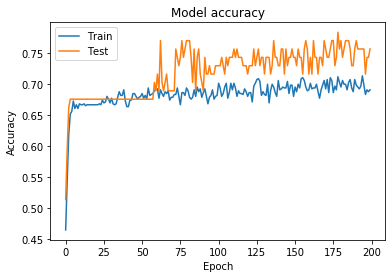

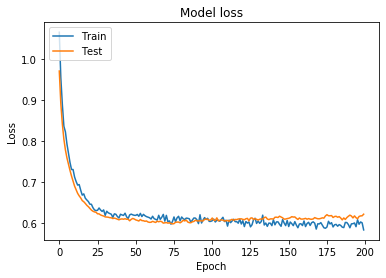

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# z = data.sample()
# print(z.OS)
# print(z[prediction_var].values)
# # print(encoder_pd.transform(z._primary_disease))
# # z._primary_disease = encoder_pd.transform(z._primary_disease)
# # print(z[prediction_var].values)

# # encoder_pd.transform
# int(classifier.predict(z[prediction_var].values)[0])>0.5

In [31]:
#model
y_pred=classifier.predict(X_test)<!DOCTYPE html>
<!-- saved from url=(0067)http://localhost:8888/nbconvert/html/daria2/os.ipynb?download=false -->
<html><link type="text/css" id="dark-mode" rel="stylesheet" href="http://localhost:8888/nbconvert/html/daria2/os.ipynb?download=false"><style type="text/css" id="dark-mode-custom-style"></style><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">

<title>os</title>

<script src="./os_files/require.min.js.download"></script>
<script src="./os_files/jquery.min.js.download"></script>



<style type="text/css">
    /*!
*
* Twitter Bootstrap
*
*/
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 */
/*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */
html {
  font-family: sans-serif;
  -ms-text-size-adjust: 100%;
  -webkit-text-size-adjust: 100%;
}
body {
  margin: 0;
}
article,
aside,
details,
figcaption,
figure,
footer,
header,
hgroup,
main,
menu,
nav,
section,
summary {
  display: block;
}
audio,
canvas,
progress,
video {
  display: inline-block;
  vertical-align: baseline;
}
audio:not([controls]) {
  display: none;
  height: 0;
}
[hidden],
template {
  display: none;
}
a {
  background-color: transparent;
}
a:active,
a:hover {
  outline: 0;
}
abbr[title] {
  border-bottom: 1px dotted;
}
b,
strong {
  font-weight: bold;
}
dfn {
  font-style: italic;
}
h1 {
  font-size: 2em;
  margin: 0.67em 0;
}
mark {
  background: #ff0;
  color: #000;
}
small {
  font-size: 80%;
}
sub,
sup {
  font-size: 75%;
  line-height: 0;
  position: relative;
  vertical-align: baseline;
}
sup {
  top: -0.5em;
}
sub {
  bottom: -0.25em;
}
img {
  border: 0;
}
svg:not(:root) {
  overflow: hidden;
}
figure {
  margin: 1em 40px;
}
hr {
  box-sizing: content-box;
  height: 0;
}
pre {
  overflow: auto;
}
code,
kbd,
pre,
samp {
  font-family: monospace, monospace;
  font-size: 1em;
}
button,
input,
optgroup,
select,
textarea {
  color: inherit;
  font: inherit;
  margin: 0;
}
button {
  overflow: visible;
}
button,
select {
  text-transform: none;
}
button,
html input[type="button"],
input[type="reset"],
input[type="submit"] {
  -webkit-appearance: button;
  cursor: pointer;
}
button[disabled],
html input[disabled] {
  cursor: default;
}
button::-moz-focus-inner,
input::-moz-focus-inner {
  border: 0;
  padding: 0;
}
input {
  line-height: normal;
}
input[type="checkbox"],
input[type="radio"] {
  box-sizing: border-box;
  padding: 0;
}
input[type="number"]::-webkit-inner-spin-button,
input[type="number"]::-webkit-outer-spin-button {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: textfield;
  box-sizing: content-box;
}
input[type="search"]::-webkit-search-cancel-button,
input[type="search"]::-webkit-search-decoration {
  -webkit-appearance: none;
}
fieldset {
  border: 1px solid #c0c0c0;
  margin: 0 2px;
  padding: 0.35em 0.625em 0.75em;
}
legend {
  border: 0;
  padding: 0;
}
textarea {
  overflow: auto;
}
optgroup {
  font-weight: bold;
}
table {
  border-collapse: collapse;
  border-spacing: 0;
}
td,
th {
  padding: 0;
}
/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */
@media print {
  *,
  *:before,
  *:after {
    background: transparent !important;
    box-shadow: none !important;
    text-shadow: none !important;
  }
  a,
  a:visited {
    text-decoration: underline;
  }
  a[href]:after {
    content: " (" attr(href) ")";
  }
  abbr[title]:after {
    content: " (" attr(title) ")";
  }
  a[href^="#"]:after,
  a[href^="javascript:"]:after {
    content: "";
  }
  pre,
  blockquote {
    border: 1px solid #999;
    page-break-inside: avoid;
  }
  thead {
    display: table-header-group;
  }
  tr,
  img {
    page-break-inside: avoid;
  }
  img {
    max-width: 100% !important;
  }
  p,
  h2,
  h3 {
    orphans: 3;
    widows: 3;
  }
  h2,
  h3 {
    page-break-after: avoid;
  }
  .navbar {
    display: none;
  }
  .btn > .caret,
  .dropup > .btn > .caret {
    border-top-color: #000 !important;
  }
  .label {
    border: 1px solid #000;
  }
  .table {
    border-collapse: collapse !important;
  }
  .table td,
  .table th {
    background-color: #fff !important;
  }
  .table-bordered th,
  .table-bordered td {
    border: 1px solid #ddd !important;
  }
}
@font-face {
  font-family: 'Glyphicons Halflings';
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot');
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot?#iefix') format('embedded-opentype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff2') format('woff2'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff') format('woff'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.ttf') format('truetype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.svg#glyphicons_halflingsregular') format('svg');
}
.glyphicon {
  position: relative;
  top: 1px;
  display: inline-block;
  font-family: 'Glyphicons Halflings';
  font-style: normal;
  font-weight: normal;
  line-height: 1;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
.glyphicon-asterisk:before {
  content: "\002a";
}
.glyphicon-plus:before {
  content: "\002b";
}
.glyphicon-euro:before,
.glyphicon-eur:before {
  content: "\20ac";
}
.glyphicon-minus:before {
  content: "\2212";
}
.glyphicon-cloud:before {
  content: "\2601";
}
.glyphicon-envelope:before {
  content: "\2709";
}
.glyphicon-pencil:before {
  content: "\270f";
}
.glyphicon-glass:before {
  content: "\e001";
}
.glyphicon-music:before {
  content: "\e002";
}
.glyphicon-search:before {
  content: "\e003";
}
.glyphicon-heart:before {
  content: "\e005";
}
.glyphicon-star:before {
  content: "\e006";
}
.glyphicon-star-empty:before {
  content: "\e007";
}
.glyphicon-user:before {
  content: "\e008";
}
.glyphicon-film:before {
  content: "\e009";
}
.glyphicon-th-large:before {
  content: "\e010";
}
.glyphicon-th:before {
  content: "\e011";
}
.glyphicon-th-list:before {
  content: "\e012";
}
.glyphicon-ok:before {
  content: "\e013";
}
.glyphicon-remove:before {
  content: "\e014";
}
.glyphicon-zoom-in:before {
  content: "\e015";
}
.glyphicon-zoom-out:before {
  content: "\e016";
}
.glyphicon-off:before {
  content: "\e017";
}
.glyphicon-signal:before {
  content: "\e018";
}
.glyphicon-cog:before {
  content: "\e019";
}
.glyphicon-trash:before {
  content: "\e020";
}
.glyphicon-home:before {
  content: "\e021";
}
.glyphicon-file:before {
  content: "\e022";
}
.glyphicon-time:before {
  content: "\e023";
}
.glyphicon-road:before {
  content: "\e024";
}
.glyphicon-download-alt:before {
  content: "\e025";
}
.glyphicon-download:before {
  content: "\e026";
}
.glyphicon-upload:before {
  content: "\e027";
}
.glyphicon-inbox:before {
  content: "\e028";
}
.glyphicon-play-circle:before {
  content: "\e029";
}
.glyphicon-repeat:before {
  content: "\e030";
}
.glyphicon-refresh:before {
  content: "\e031";
}
.glyphicon-list-alt:before {
  content: "\e032";
}
.glyphicon-lock:before {
  content: "\e033";
}
.glyphicon-flag:before {
  content: "\e034";
}
.glyphicon-headphones:before {
  content: "\e035";
}
.glyphicon-volume-off:before {
  content: "\e036";
}
.glyphicon-volume-down:before {
  content: "\e037";
}
.glyphicon-volume-up:before {
  content: "\e038";
}
.glyphicon-qrcode:before {
  content: "\e039";
}
.glyphicon-barcode:before {
  content: "\e040";
}
.glyphicon-tag:before {
  content: "\e041";
}
.glyphicon-tags:before {
  content: "\e042";
}
.glyphicon-book:before {
  content: "\e043";
}
.glyphicon-bookmark:before {
  content: "\e044";
}
.glyphicon-print:before {
  content: "\e045";
}
.glyphicon-camera:before {
  content: "\e046";
}
.glyphicon-font:before {
  content: "\e047";
}
.glyphicon-bold:before {
  content: "\e048";
}
.glyphicon-italic:before {
  content: "\e049";
}
.glyphicon-text-height:before {
  content: "\e050";
}
.glyphicon-text-width:before {
  content: "\e051";
}
.glyphicon-align-left:before {
  content: "\e052";
}
.glyphicon-align-center:before {
  content: "\e053";
}
.glyphicon-align-right:before {
  content: "\e054";
}
.glyphicon-align-justify:before {
  content: "\e055";
}
.glyphicon-list:before {
  content: "\e056";
}
.glyphicon-indent-left:before {
  content: "\e057";
}
.glyphicon-indent-right:before {
  content: "\e058";
}
.glyphicon-facetime-video:before {
  content: "\e059";
}
.glyphicon-picture:before {
  content: "\e060";
}
.glyphicon-map-marker:before {
  content: "\e062";
}
.glyphicon-adjust:before {
  content: "\e063";
}
.glyphicon-tint:before {
  content: "\e064";
}
.glyphicon-edit:before {
  content: "\e065";
}
.glyphicon-share:before {
  content: "\e066";
}
.glyphicon-check:before {
  content: "\e067";
}
.glyphicon-move:before {
  content: "\e068";
}
.glyphicon-step-backward:before {
  content: "\e069";
}
.glyphicon-fast-backward:before {
  content: "\e070";
}
.glyphicon-backward:before {
  content: "\e071";
}
.glyphicon-play:before {
  content: "\e072";
}
.glyphicon-pause:before {
  content: "\e073";
}
.glyphicon-stop:before {
  content: "\e074";
}
.glyphicon-forward:before {
  content: "\e075";
}
.glyphicon-fast-forward:before {
  content: "\e076";
}
.glyphicon-step-forward:before {
  content: "\e077";
}
.glyphicon-eject:before {
  content: "\e078";
}
.glyphicon-chevron-left:before {
  content: "\e079";
}
.glyphicon-chevron-right:before {
  content: "\e080";
}
.glyphicon-plus-sign:before {
  content: "\e081";
}
.glyphicon-minus-sign:before {
  content: "\e082";
}
.glyphicon-remove-sign:before {
  content: "\e083";
}
.glyphicon-ok-sign:before {
  content: "\e084";
}
.glyphicon-question-sign:before {
  content: "\e085";
}
.glyphicon-info-sign:before {
  content: "\e086";
}
.glyphicon-screenshot:before {
  content: "\e087";
}
.glyphicon-remove-circle:before {
  content: "\e088";
}
.glyphicon-ok-circle:before {
  content: "\e089";
}
.glyphicon-ban-circle:before {
  content: "\e090";
}
.glyphicon-arrow-left:before {
  content: "\e091";
}
.glyphicon-arrow-right:before {
  content: "\e092";
}
.glyphicon-arrow-up:before {
  content: "\e093";
}
.glyphicon-arrow-down:before {
  content: "\e094";
}
.glyphicon-share-alt:before {
  content: "\e095";
}
.glyphicon-resize-full:before {
  content: "\e096";
}
.glyphicon-resize-small:before {
  content: "\e097";
}
.glyphicon-exclamation-sign:before {
  content: "\e101";
}
.glyphicon-gift:before {
  content: "\e102";
}
.glyphicon-leaf:before {
  content: "\e103";
}
.glyphicon-fire:before {
  content: "\e104";
}
.glyphicon-eye-open:before {
  content: "\e105";
}
.glyphicon-eye-close:before {
  content: "\e106";
}
.glyphicon-warning-sign:before {
  content: "\e107";
}
.glyphicon-plane:before {
  content: "\e108";
}
.glyphicon-calendar:before {
  content: "\e109";
}
.glyphicon-random:before {
  content: "\e110";
}
.glyphicon-comment:before {
  content: "\e111";
}
.glyphicon-magnet:before {
  content: "\e112";
}
.glyphicon-chevron-up:before {
  content: "\e113";
}
.glyphicon-chevron-down:before {
  content: "\e114";
}
.glyphicon-retweet:before {
  content: "\e115";
}
.glyphicon-shopping-cart:before {
  content: "\e116";
}
.glyphicon-folder-close:before {
  content: "\e117";
}
.glyphicon-folder-open:before {
  content: "\e118";
}
.glyphicon-resize-vertical:before {
  content: "\e119";
}
.glyphicon-resize-horizontal:before {
  content: "\e120";
}
.glyphicon-hdd:before {
  content: "\e121";
}
.glyphicon-bullhorn:before {
  content: "\e122";
}
.glyphicon-bell:before {
  content: "\e123";
}
.glyphicon-certificate:before {
  content: "\e124";
}
.glyphicon-thumbs-up:before {
  content: "\e125";
}
.glyphicon-thumbs-down:before {
  content: "\e126";
}
.glyphicon-hand-right:before {
  content: "\e127";
}
.glyphicon-hand-left:before {
  content: "\e128";
}
.glyphicon-hand-up:before {
  content: "\e129";
}
.glyphicon-hand-down:before {
  content: "\e130";
}
.glyphicon-circle-arrow-right:before {
  content: "\e131";
}
.glyphicon-circle-arrow-left:before {
  content: "\e132";
}
.glyphicon-circle-arrow-up:before {
  content: "\e133";
}
.glyphicon-circle-arrow-down:before {
  content: "\e134";
}
.glyphicon-globe:before {
  content: "\e135";
}
.glyphicon-wrench:before {
  content: "\e136";
}
.glyphicon-tasks:before {
  content: "\e137";
}
.glyphicon-filter:before {
  content: "\e138";
}
.glyphicon-briefcase:before {
  content: "\e139";
}
.glyphicon-fullscreen:before {
  content: "\e140";
}
.glyphicon-dashboard:before {
  content: "\e141";
}
.glyphicon-paperclip:before {
  content: "\e142";
}
.glyphicon-heart-empty:before {
  content: "\e143";
}
.glyphicon-link:before {
  content: "\e144";
}
.glyphicon-phone:before {
  content: "\e145";
}
.glyphicon-pushpin:before {
  content: "\e146";
}
.glyphicon-usd:before {
  content: "\e148";
}
.glyphicon-gbp:before {
  content: "\e149";
}
.glyphicon-sort:before {
  content: "\e150";
}
.glyphicon-sort-by-alphabet:before {
  content: "\e151";
}
.glyphicon-sort-by-alphabet-alt:before {
  content: "\e152";
}
.glyphicon-sort-by-order:before {
  content: "\e153";
}
.glyphicon-sort-by-order-alt:before {
  content: "\e154";
}
.glyphicon-sort-by-attributes:before {
  content: "\e155";
}
.glyphicon-sort-by-attributes-alt:before {
  content: "\e156";
}
.glyphicon-unchecked:before {
  content: "\e157";
}
.glyphicon-expand:before {
  content: "\e158";
}
.glyphicon-collapse-down:before {
  content: "\e159";
}
.glyphicon-collapse-up:before {
  content: "\e160";
}
.glyphicon-log-in:before {
  content: "\e161";
}
.glyphicon-flash:before {
  content: "\e162";
}
.glyphicon-log-out:before {
  content: "\e163";
}
.glyphicon-new-window:before {
  content: "\e164";
}
.glyphicon-record:before {
  content: "\e165";
}
.glyphicon-save:before {
  content: "\e166";
}
.glyphicon-open:before {
  content: "\e167";
}
.glyphicon-saved:before {
  content: "\e168";
}
.glyphicon-import:before {
  content: "\e169";
}
.glyphicon-export:before {
  content: "\e170";
}
.glyphicon-send:before {
  content: "\e171";
}
.glyphicon-floppy-disk:before {
  content: "\e172";
}
.glyphicon-floppy-saved:before {
  content: "\e173";
}
.glyphicon-floppy-remove:before {
  content: "\e174";
}
.glyphicon-floppy-save:before {
  content: "\e175";
}
.glyphicon-floppy-open:before {
  content: "\e176";
}
.glyphicon-credit-card:before {
  content: "\e177";
}
.glyphicon-transfer:before {
  content: "\e178";
}
.glyphicon-cutlery:before {
  content: "\e179";
}
.glyphicon-header:before {
  content: "\e180";
}
.glyphicon-compressed:before {
  content: "\e181";
}
.glyphicon-earphone:before {
  content: "\e182";
}
.glyphicon-phone-alt:before {
  content: "\e183";
}
.glyphicon-tower:before {
  content: "\e184";
}
.glyphicon-stats:before {
  content: "\e185";
}
.glyphicon-sd-video:before {
  content: "\e186";
}
.glyphicon-hd-video:before {
  content: "\e187";
}
.glyphicon-subtitles:before {
  content: "\e188";
}
.glyphicon-sound-stereo:before {
  content: "\e189";
}
.glyphicon-sound-dolby:before {
  content: "\e190";
}
.glyphicon-sound-5-1:before {
  content: "\e191";
}
.glyphicon-sound-6-1:before {
  content: "\e192";
}
.glyphicon-sound-7-1:before {
  content: "\e193";
}
.glyphicon-copyright-mark:before {
  content: "\e194";
}
.glyphicon-registration-mark:before {
  content: "\e195";
}
.glyphicon-cloud-download:before {
  content: "\e197";
}
.glyphicon-cloud-upload:before {
  content: "\e198";
}
.glyphicon-tree-conifer:before {
  content: "\e199";
}
.glyphicon-tree-deciduous:before {
  content: "\e200";
}
.glyphicon-cd:before {
  content: "\e201";
}
.glyphicon-save-file:before {
  content: "\e202";
}
.glyphicon-open-file:before {
  content: "\e203";
}
.glyphicon-level-up:before {
  content: "\e204";
}
.glyphicon-copy:before {
  content: "\e205";
}
.glyphicon-paste:before {
  content: "\e206";
}
.glyphicon-alert:before {
  content: "\e209";
}
.glyphicon-equalizer:before {
  content: "\e210";
}
.glyphicon-king:before {
  content: "\e211";
}
.glyphicon-queen:before {
  content: "\e212";
}
.glyphicon-pawn:before {
  content: "\e213";
}
.glyphicon-bishop:before {
  content: "\e214";
}
.glyphicon-knight:before {
  content: "\e215";
}
.glyphicon-baby-formula:before {
  content: "\e216";
}
.glyphicon-tent:before {
  content: "\26fa";
}
.glyphicon-blackboard:before {
  content: "\e218";
}
.glyphicon-bed:before {
  content: "\e219";
}
.glyphicon-apple:before {
  content: "\f8ff";
}
.glyphicon-erase:before {
  content: "\e221";
}
.glyphicon-hourglass:before {
  content: "\231b";
}
.glyphicon-lamp:before {
  content: "\e223";
}
.glyphicon-duplicate:before {
  content: "\e224";
}
.glyphicon-piggy-bank:before {
  content: "\e225";
}
.glyphicon-scissors:before {
  content: "\e226";
}
.glyphicon-bitcoin:before {
  content: "\e227";
}
.glyphicon-btc:before {
  content: "\e227";
}
.glyphicon-xbt:before {
  content: "\e227";
}
.glyphicon-yen:before {
  content: "\00a5";
}
.glyphicon-jpy:before {
  content: "\00a5";
}
.glyphicon-ruble:before {
  content: "\20bd";
}
.glyphicon-rub:before {
  content: "\20bd";
}
.glyphicon-scale:before {
  content: "\e230";
}
.glyphicon-ice-lolly:before {
  content: "\e231";
}
.glyphicon-ice-lolly-tasted:before {
  content: "\e232";
}
.glyphicon-education:before {
  content: "\e233";
}
.glyphicon-option-horizontal:before {
  content: "\e234";
}
.glyphicon-option-vertical:before {
  content: "\e235";
}
.glyphicon-menu-hamburger:before {
  content: "\e236";
}
.glyphicon-modal-window:before {
  content: "\e237";
}
.glyphicon-oil:before {
  content: "\e238";
}
.glyphicon-grain:before {
  content: "\e239";
}
.glyphicon-sunglasses:before {
  content: "\e240";
}
.glyphicon-text-size:before {
  content: "\e241";
}
.glyphicon-text-color:before {
  content: "\e242";
}
.glyphicon-text-background:before {
  content: "\e243";
}
.glyphicon-object-align-top:before {
  content: "\e244";
}
.glyphicon-object-align-bottom:before {
  content: "\e245";
}
.glyphicon-object-align-horizontal:before {
  content: "\e246";
}
.glyphicon-object-align-left:before {
  content: "\e247";
}
.glyphicon-object-align-vertical:before {
  content: "\e248";
}
.glyphicon-object-align-right:before {
  content: "\e249";
}
.glyphicon-triangle-right:before {
  content: "\e250";
}
.glyphicon-triangle-left:before {
  content: "\e251";
}
.glyphicon-triangle-bottom:before {
  content: "\e252";
}
.glyphicon-triangle-top:before {
  content: "\e253";
}
.glyphicon-console:before {
  content: "\e254";
}
.glyphicon-superscript:before {
  content: "\e255";
}
.glyphicon-subscript:before {
  content: "\e256";
}
.glyphicon-menu-left:before {
  content: "\e257";
}
.glyphicon-menu-right:before {
  content: "\e258";
}
.glyphicon-menu-down:before {
  content: "\e259";
}
.glyphicon-menu-up:before {
  content: "\e260";
}
* {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
*:before,
*:after {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
html {
  font-size: 10px;
  -webkit-tap-highlight-color: rgba(0, 0, 0, 0);
}
body {
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-size: 13px;
  line-height: 1.42857143;
  color: #000;
  background-color: #fff;
}
input,
button,
select,
textarea {
  font-family: inherit;
  font-size: inherit;
  line-height: inherit;
}
a {
  color: #337ab7;
  text-decoration: none;
}
a:hover,
a:focus {
  color: #23527c;
  text-decoration: underline;
}
a:focus {
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
figure {
  margin: 0;
}
img {
  vertical-align: middle;
}
.img-responsive,
.thumbnail > img,
.thumbnail a > img,
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  display: block;
  max-width: 100%;
  height: auto;
}
.img-rounded {
  border-radius: 3px;
}
.img-thumbnail {
  padding: 4px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: all 0.2s ease-in-out;
  -o-transition: all 0.2s ease-in-out;
  transition: all 0.2s ease-in-out;
  display: inline-block;
  max-width: 100%;
  height: auto;
}
.img-circle {
  border-radius: 50%;
}
hr {
  margin-top: 18px;
  margin-bottom: 18px;
  border: 0;
  border-top: 1px solid #eeeeee;
}
.sr-only {
  position: absolute;
  width: 1px;
  height: 1px;
  margin: -1px;
  padding: 0;
  overflow: hidden;
  clip: rect(0, 0, 0, 0);
  border: 0;
}
.sr-only-focusable:active,
.sr-only-focusable:focus {
  position: static;
  width: auto;
  height: auto;
  margin: 0;
  overflow: visible;
  clip: auto;
}
[role="button"] {
  cursor: pointer;
}
h1,
h2,
h3,
h4,
h5,
h6,
.h1,
.h2,
.h3,
.h4,
.h5,
.h6 {
  font-family: inherit;
  font-weight: 500;
  line-height: 1.1;
  color: inherit;
}
h1 small,
h2 small,
h3 small,
h4 small,
h5 small,
h6 small,
.h1 small,
.h2 small,
.h3 small,
.h4 small,
.h5 small,
.h6 small,
h1 .small,
h2 .small,
h3 .small,
h4 .small,
h5 .small,
h6 .small,
.h1 .small,
.h2 .small,
.h3 .small,
.h4 .small,
.h5 .small,
.h6 .small {
  font-weight: normal;
  line-height: 1;
  color: #777777;
}
h1,
.h1,
h2,
.h2,
h3,
.h3 {
  margin-top: 18px;
  margin-bottom: 9px;
}
h1 small,
.h1 small,
h2 small,
.h2 small,
h3 small,
.h3 small,
h1 .small,
.h1 .small,
h2 .small,
.h2 .small,
h3 .small,
.h3 .small {
  font-size: 65%;
}
h4,
.h4,
h5,
.h5,
h6,
.h6 {
  margin-top: 9px;
  margin-bottom: 9px;
}
h4 small,
.h4 small,
h5 small,
.h5 small,
h6 small,
.h6 small,
h4 .small,
.h4 .small,
h5 .small,
.h5 .small,
h6 .small,
.h6 .small {
  font-size: 75%;
}
h1,
.h1 {
  font-size: 33px;
}
h2,
.h2 {
  font-size: 27px;
}
h3,
.h3 {
  font-size: 23px;
}
h4,
.h4 {
  font-size: 17px;
}
h5,
.h5 {
  font-size: 13px;
}
h6,
.h6 {
  font-size: 12px;
}
p {
  margin: 0 0 9px;
}
.lead {
  margin-bottom: 18px;
  font-size: 14px;
  font-weight: 300;
  line-height: 1.4;
}
@media (min-width: 768px) {
  .lead {
    font-size: 19.5px;
  }
}
small,
.small {
  font-size: 92%;
}
mark,
.mark {
  background-color: #fcf8e3;
  padding: .2em;
}
.text-left {
  text-align: left;
}
.text-right {
  text-align: right;
}
.text-center {
  text-align: center;
}
.text-justify {
  text-align: justify;
}
.text-nowrap {
  white-space: nowrap;
}
.text-lowercase {
  text-transform: lowercase;
}
.text-uppercase {
  text-transform: uppercase;
}
.text-capitalize {
  text-transform: capitalize;
}
.text-muted {
  color: #777777;
}
.text-primary {
  color: #337ab7;
}
a.text-primary:hover,
a.text-primary:focus {
  color: #286090;
}
.text-success {
  color: #3c763d;
}
a.text-success:hover,
a.text-success:focus {
  color: #2b542c;
}
.text-info {
  color: #31708f;
}
a.text-info:hover,
a.text-info:focus {
  color: #245269;
}
.text-warning {
  color: #8a6d3b;
}
a.text-warning:hover,
a.text-warning:focus {
  color: #66512c;
}
.text-danger {
  color: #a94442;
}
a.text-danger:hover,
a.text-danger:focus {
  color: #843534;
}
.bg-primary {
  color: #fff;
  background-color: #337ab7;
}
a.bg-primary:hover,
a.bg-primary:focus {
  background-color: #286090;
}
.bg-success {
  background-color: #dff0d8;
}
a.bg-success:hover,
a.bg-success:focus {
  background-color: #c1e2b3;
}
.bg-info {
  background-color: #d9edf7;
}
a.bg-info:hover,
a.bg-info:focus {
  background-color: #afd9ee;
}
.bg-warning {
  background-color: #fcf8e3;
}
a.bg-warning:hover,
a.bg-warning:focus {
  background-color: #f7ecb5;
}
.bg-danger {
  background-color: #f2dede;
}
a.bg-danger:hover,
a.bg-danger:focus {
  background-color: #e4b9b9;
}
.page-header {
  padding-bottom: 8px;
  margin: 36px 0 18px;
  border-bottom: 1px solid #eeeeee;
}
ul,
ol {
  margin-top: 0;
  margin-bottom: 9px;
}
ul ul,
ol ul,
ul ol,
ol ol {
  margin-bottom: 0;
}
.list-unstyled {
  padding-left: 0;
  list-style: none;
}
.list-inline {
  padding-left: 0;
  list-style: none;
  margin-left: -5px;
}
.list-inline > li {
  display: inline-block;
  padding-left: 5px;
  padding-right: 5px;
}
dl {
  margin-top: 0;
  margin-bottom: 18px;
}
dt,
dd {
  line-height: 1.42857143;
}
dt {
  font-weight: bold;
}
dd {
  margin-left: 0;
}
@media (min-width: 541px) {
  .dl-horizontal dt {
    float: left;
    width: 160px;
    clear: left;
    text-align: right;
    overflow: hidden;
    text-overflow: ellipsis;
    white-space: nowrap;
  }
  .dl-horizontal dd {
    margin-left: 180px;
  }
}
abbr[title],
abbr[data-original-title] {
  cursor: help;
  border-bottom: 1px dotted #777777;
}
.initialism {
  font-size: 90%;
  text-transform: uppercase;
}
blockquote {
  padding: 9px 18px;
  margin: 0 0 18px;
  font-size: inherit;
  border-left: 5px solid #eeeeee;
}
blockquote p:last-child,
blockquote ul:last-child,
blockquote ol:last-child {
  margin-bottom: 0;
}
blockquote footer,
blockquote small,
blockquote .small {
  display: block;
  font-size: 80%;
  line-height: 1.42857143;
  color: #777777;
}
blockquote footer:before,
blockquote small:before,
blockquote .small:before {
  content: '\2014 \00A0';
}
.blockquote-reverse,
blockquote.pull-right {
  padding-right: 15px;
  padding-left: 0;
  border-right: 5px solid #eeeeee;
  border-left: 0;
  text-align: right;
}
.blockquote-reverse footer:before,
blockquote.pull-right footer:before,
.blockquote-reverse small:before,
blockquote.pull-right small:before,
.blockquote-reverse .small:before,
blockquote.pull-right .small:before {
  content: '';
}
.blockquote-reverse footer:after,
blockquote.pull-right footer:after,
.blockquote-reverse small:after,
blockquote.pull-right small:after,
.blockquote-reverse .small:after,
blockquote.pull-right .small:after {
  content: '\00A0 \2014';
}
address {
  margin-bottom: 18px;
  font-style: normal;
  line-height: 1.42857143;
}
code,
kbd,
pre,
samp {
  font-family: monospace;
}
code {
  padding: 2px 4px;
  font-size: 90%;
  color: #c7254e;
  background-color: #f9f2f4;
  border-radius: 2px;
}
kbd {
  padding: 2px 4px;
  font-size: 90%;
  color: #888;
  background-color: transparent;
  border-radius: 1px;
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.25);
}
kbd kbd {
  padding: 0;
  font-size: 100%;
  font-weight: bold;
  box-shadow: none;
}
pre {
  display: block;
  padding: 8.5px;
  margin: 0 0 9px;
  font-size: 12px;
  line-height: 1.42857143;
  word-break: break-all;
  word-wrap: break-word;
  color: #333333;
  background-color: #f5f5f5;
  border: 1px solid #ccc;
  border-radius: 2px;
}
pre code {
  padding: 0;
  font-size: inherit;
  color: inherit;
  white-space: pre-wrap;
  background-color: transparent;
  border-radius: 0;
}
.pre-scrollable {
  max-height: 340px;
  overflow-y: scroll;
}
.container {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
@media (min-width: 768px) {
  .container {
    width: 768px;
  }
}
@media (min-width: 992px) {
  .container {
    width: 940px;
  }
}
@media (min-width: 1200px) {
  .container {
    width: 1140px;
  }
}
.container-fluid {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
.row {
  margin-left: 0px;
  margin-right: 0px;
}
.col-xs-1, .col-sm-1, .col-md-1, .col-lg-1, .col-xs-2, .col-sm-2, .col-md-2, .col-lg-2, .col-xs-3, .col-sm-3, .col-md-3, .col-lg-3, .col-xs-4, .col-sm-4, .col-md-4, .col-lg-4, .col-xs-5, .col-sm-5, .col-md-5, .col-lg-5, .col-xs-6, .col-sm-6, .col-md-6, .col-lg-6, .col-xs-7, .col-sm-7, .col-md-7, .col-lg-7, .col-xs-8, .col-sm-8, .col-md-8, .col-lg-8, .col-xs-9, .col-sm-9, .col-md-9, .col-lg-9, .col-xs-10, .col-sm-10, .col-md-10, .col-lg-10, .col-xs-11, .col-sm-11, .col-md-11, .col-lg-11, .col-xs-12, .col-sm-12, .col-md-12, .col-lg-12 {
  position: relative;
  min-height: 1px;
  padding-left: 0px;
  padding-right: 0px;
}
.col-xs-1, .col-xs-2, .col-xs-3, .col-xs-4, .col-xs-5, .col-xs-6, .col-xs-7, .col-xs-8, .col-xs-9, .col-xs-10, .col-xs-11, .col-xs-12 {
  float: left;
}
.col-xs-12 {
  width: 100%;
}
.col-xs-11 {
  width: 91.66666667%;
}
.col-xs-10 {
  width: 83.33333333%;
}
.col-xs-9 {
  width: 75%;
}
.col-xs-8 {
  width: 66.66666667%;
}
.col-xs-7 {
  width: 58.33333333%;
}
.col-xs-6 {
  width: 50%;
}
.col-xs-5 {
  width: 41.66666667%;
}
.col-xs-4 {
  width: 33.33333333%;
}
.col-xs-3 {
  width: 25%;
}
.col-xs-2 {
  width: 16.66666667%;
}
.col-xs-1 {
  width: 8.33333333%;
}
.col-xs-pull-12 {
  right: 100%;
}
.col-xs-pull-11 {
  right: 91.66666667%;
}
.col-xs-pull-10 {
  right: 83.33333333%;
}
.col-xs-pull-9 {
  right: 75%;
}
.col-xs-pull-8 {
  right: 66.66666667%;
}
.col-xs-pull-7 {
  right: 58.33333333%;
}
.col-xs-pull-6 {
  right: 50%;
}
.col-xs-pull-5 {
  right: 41.66666667%;
}
.col-xs-pull-4 {
  right: 33.33333333%;
}
.col-xs-pull-3 {
  right: 25%;
}
.col-xs-pull-2 {
  right: 16.66666667%;
}
.col-xs-pull-1 {
  right: 8.33333333%;
}
.col-xs-pull-0 {
  right: auto;
}
.col-xs-push-12 {
  left: 100%;
}
.col-xs-push-11 {
  left: 91.66666667%;
}
.col-xs-push-10 {
  left: 83.33333333%;
}
.col-xs-push-9 {
  left: 75%;
}
.col-xs-push-8 {
  left: 66.66666667%;
}
.col-xs-push-7 {
  left: 58.33333333%;
}
.col-xs-push-6 {
  left: 50%;
}
.col-xs-push-5 {
  left: 41.66666667%;
}
.col-xs-push-4 {
  left: 33.33333333%;
}
.col-xs-push-3 {
  left: 25%;
}
.col-xs-push-2 {
  left: 16.66666667%;
}
.col-xs-push-1 {
  left: 8.33333333%;
}
.col-xs-push-0 {
  left: auto;
}
.col-xs-offset-12 {
  margin-left: 100%;
}
.col-xs-offset-11 {
  margin-left: 91.66666667%;
}
.col-xs-offset-10 {
  margin-left: 83.33333333%;
}
.col-xs-offset-9 {
  margin-left: 75%;
}
.col-xs-offset-8 {
  margin-left: 66.66666667%;
}
.col-xs-offset-7 {
  margin-left: 58.33333333%;
}
.col-xs-offset-6 {
  margin-left: 50%;
}
.col-xs-offset-5 {
  margin-left: 41.66666667%;
}
.col-xs-offset-4 {
  margin-left: 33.33333333%;
}
.col-xs-offset-3 {
  margin-left: 25%;
}
.col-xs-offset-2 {
  margin-left: 16.66666667%;
}
.col-xs-offset-1 {
  margin-left: 8.33333333%;
}
.col-xs-offset-0 {
  margin-left: 0%;
}
@media (min-width: 768px) {
  .col-sm-1, .col-sm-2, .col-sm-3, .col-sm-4, .col-sm-5, .col-sm-6, .col-sm-7, .col-sm-8, .col-sm-9, .col-sm-10, .col-sm-11, .col-sm-12 {
    float: left;
  }
  .col-sm-12 {
    width: 100%;
  }
  .col-sm-11 {
    width: 91.66666667%;
  }
  .col-sm-10 {
    width: 83.33333333%;
  }
  .col-sm-9 {
    width: 75%;
  }
  .col-sm-8 {
    width: 66.66666667%;
  }
  .col-sm-7 {
    width: 58.33333333%;
  }
  .col-sm-6 {
    width: 50%;
  }
  .col-sm-5 {
    width: 41.66666667%;
  }
  .col-sm-4 {
    width: 33.33333333%;
  }
  .col-sm-3 {
    width: 25%;
  }
  .col-sm-2 {
    width: 16.66666667%;
  }
  .col-sm-1 {
    width: 8.33333333%;
  }
  .col-sm-pull-12 {
    right: 100%;
  }
  .col-sm-pull-11 {
    right: 91.66666667%;
  }
  .col-sm-pull-10 {
    right: 83.33333333%;
  }
  .col-sm-pull-9 {
    right: 75%;
  }
  .col-sm-pull-8 {
    right: 66.66666667%;
  }
  .col-sm-pull-7 {
    right: 58.33333333%;
  }
  .col-sm-pull-6 {
    right: 50%;
  }
  .col-sm-pull-5 {
    right: 41.66666667%;
  }
  .col-sm-pull-4 {
    right: 33.33333333%;
  }
  .col-sm-pull-3 {
    right: 25%;
  }
  .col-sm-pull-2 {
    right: 16.66666667%;
  }
  .col-sm-pull-1 {
    right: 8.33333333%;
  }
  .col-sm-pull-0 {
    right: auto;
  }
  .col-sm-push-12 {
    left: 100%;
  }
  .col-sm-push-11 {
    left: 91.66666667%;
  }
  .col-sm-push-10 {
    left: 83.33333333%;
  }
  .col-sm-push-9 {
    left: 75%;
  }
  .col-sm-push-8 {
    left: 66.66666667%;
  }
  .col-sm-push-7 {
    left: 58.33333333%;
  }
  .col-sm-push-6 {
    left: 50%;
  }
  .col-sm-push-5 {
    left: 41.66666667%;
  }
  .col-sm-push-4 {
    left: 33.33333333%;
  }
  .col-sm-push-3 {
    left: 25%;
  }
  .col-sm-push-2 {
    left: 16.66666667%;
  }
  .col-sm-push-1 {
    left: 8.33333333%;
  }
  .col-sm-push-0 {
    left: auto;
  }
  .col-sm-offset-12 {
    margin-left: 100%;
  }
  .col-sm-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-sm-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-sm-offset-9 {
    margin-left: 75%;
  }
  .col-sm-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-sm-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-sm-offset-6 {
    margin-left: 50%;
  }
  .col-sm-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-sm-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-sm-offset-3 {
    margin-left: 25%;
  }
  .col-sm-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-sm-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-sm-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 992px) {
  .col-md-1, .col-md-2, .col-md-3, .col-md-4, .col-md-5, .col-md-6, .col-md-7, .col-md-8, .col-md-9, .col-md-10, .col-md-11, .col-md-12 {
    float: left;
  }
  .col-md-12 {
    width: 100%;
  }
  .col-md-11 {
    width: 91.66666667%;
  }
  .col-md-10 {
    width: 83.33333333%;
  }
  .col-md-9 {
    width: 75%;
  }
  .col-md-8 {
    width: 66.66666667%;
  }
  .col-md-7 {
    width: 58.33333333%;
  }
  .col-md-6 {
    width: 50%;
  }
  .col-md-5 {
    width: 41.66666667%;
  }
  .col-md-4 {
    width: 33.33333333%;
  }
  .col-md-3 {
    width: 25%;
  }
  .col-md-2 {
    width: 16.66666667%;
  }
  .col-md-1 {
    width: 8.33333333%;
  }
  .col-md-pull-12 {
    right: 100%;
  }
  .col-md-pull-11 {
    right: 91.66666667%;
  }
  .col-md-pull-10 {
    right: 83.33333333%;
  }
  .col-md-pull-9 {
    right: 75%;
  }
  .col-md-pull-8 {
    right: 66.66666667%;
  }
  .col-md-pull-7 {
    right: 58.33333333%;
  }
  .col-md-pull-6 {
    right: 50%;
  }
  .col-md-pull-5 {
    right: 41.66666667%;
  }
  .col-md-pull-4 {
    right: 33.33333333%;
  }
  .col-md-pull-3 {
    right: 25%;
  }
  .col-md-pull-2 {
    right: 16.66666667%;
  }
  .col-md-pull-1 {
    right: 8.33333333%;
  }
  .col-md-pull-0 {
    right: auto;
  }
  .col-md-push-12 {
    left: 100%;
  }
  .col-md-push-11 {
    left: 91.66666667%;
  }
  .col-md-push-10 {
    left: 83.33333333%;
  }
  .col-md-push-9 {
    left: 75%;
  }
  .col-md-push-8 {
    left: 66.66666667%;
  }
  .col-md-push-7 {
    left: 58.33333333%;
  }
  .col-md-push-6 {
    left: 50%;
  }
  .col-md-push-5 {
    left: 41.66666667%;
  }
  .col-md-push-4 {
    left: 33.33333333%;
  }
  .col-md-push-3 {
    left: 25%;
  }
  .col-md-push-2 {
    left: 16.66666667%;
  }
  .col-md-push-1 {
    left: 8.33333333%;
  }
  .col-md-push-0 {
    left: auto;
  }
  .col-md-offset-12 {
    margin-left: 100%;
  }
  .col-md-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-md-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-md-offset-9 {
    margin-left: 75%;
  }
  .col-md-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-md-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-md-offset-6 {
    margin-left: 50%;
  }
  .col-md-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-md-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-md-offset-3 {
    margin-left: 25%;
  }
  .col-md-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-md-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-md-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 1200px) {
  .col-lg-1, .col-lg-2, .col-lg-3, .col-lg-4, .col-lg-5, .col-lg-6, .col-lg-7, .col-lg-8, .col-lg-9, .col-lg-10, .col-lg-11, .col-lg-12 {
    float: left;
  }
  .col-lg-12 {
    width: 100%;
  }
  .col-lg-11 {
    width: 91.66666667%;
  }
  .col-lg-10 {
    width: 83.33333333%;
  }
  .col-lg-9 {
    width: 75%;
  }
  .col-lg-8 {
    width: 66.66666667%;
  }
  .col-lg-7 {
    width: 58.33333333%;
  }
  .col-lg-6 {
    width: 50%;
  }
  .col-lg-5 {
    width: 41.66666667%;
  }
  .col-lg-4 {
    width: 33.33333333%;
  }
  .col-lg-3 {
    width: 25%;
  }
  .col-lg-2 {
    width: 16.66666667%;
  }
  .col-lg-1 {
    width: 8.33333333%;
  }
  .col-lg-pull-12 {
    right: 100%;
  }
  .col-lg-pull-11 {
    right: 91.66666667%;
  }
  .col-lg-pull-10 {
    right: 83.33333333%;
  }
  .col-lg-pull-9 {
    right: 75%;
  }
  .col-lg-pull-8 {
    right: 66.66666667%;
  }
  .col-lg-pull-7 {
    right: 58.33333333%;
  }
  .col-lg-pull-6 {
    right: 50%;
  }
  .col-lg-pull-5 {
    right: 41.66666667%;
  }
  .col-lg-pull-4 {
    right: 33.33333333%;
  }
  .col-lg-pull-3 {
    right: 25%;
  }
  .col-lg-pull-2 {
    right: 16.66666667%;
  }
  .col-lg-pull-1 {
    right: 8.33333333%;
  }
  .col-lg-pull-0 {
    right: auto;
  }
  .col-lg-push-12 {
    left: 100%;
  }
  .col-lg-push-11 {
    left: 91.66666667%;
  }
  .col-lg-push-10 {
    left: 83.33333333%;
  }
  .col-lg-push-9 {
    left: 75%;
  }
  .col-lg-push-8 {
    left: 66.66666667%;
  }
  .col-lg-push-7 {
    left: 58.33333333%;
  }
  .col-lg-push-6 {
    left: 50%;
  }
  .col-lg-push-5 {
    left: 41.66666667%;
  }
  .col-lg-push-4 {
    left: 33.33333333%;
  }
  .col-lg-push-3 {
    left: 25%;
  }
  .col-lg-push-2 {
    left: 16.66666667%;
  }
  .col-lg-push-1 {
    left: 8.33333333%;
  }
  .col-lg-push-0 {
    left: auto;
  }
  .col-lg-offset-12 {
    margin-left: 100%;
  }
  .col-lg-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-lg-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-lg-offset-9 {
    margin-left: 75%;
  }
  .col-lg-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-lg-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-lg-offset-6 {
    margin-left: 50%;
  }
  .col-lg-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-lg-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-lg-offset-3 {
    margin-left: 25%;
  }
  .col-lg-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-lg-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-lg-offset-0 {
    margin-left: 0%;
  }
}
table {
  background-color: transparent;
}
caption {
  padding-top: 8px;
  padding-bottom: 8px;
  color: #777777;
  text-align: left;
}
th {
  text-align: left;
}
.table {
  width: 100%;
  max-width: 100%;
  margin-bottom: 18px;
}
.table > thead > tr > th,
.table > tbody > tr > th,
.table > tfoot > tr > th,
.table > thead > tr > td,
.table > tbody > tr > td,
.table > tfoot > tr > td {
  padding: 8px;
  line-height: 1.42857143;
  vertical-align: top;
  border-top: 1px solid #ddd;
}
.table > thead > tr > th {
  vertical-align: bottom;
  border-bottom: 2px solid #ddd;
}
.table > caption + thead > tr:first-child > th,
.table > colgroup + thead > tr:first-child > th,
.table > thead:first-child > tr:first-child > th,
.table > caption + thead > tr:first-child > td,
.table > colgroup + thead > tr:first-child > td,
.table > thead:first-child > tr:first-child > td {
  border-top: 0;
}
.table > tbody + tbody {
  border-top: 2px solid #ddd;
}
.table .table {
  background-color: #fff;
}
.table-condensed > thead > tr > th,
.table-condensed > tbody > tr > th,
.table-condensed > tfoot > tr > th,
.table-condensed > thead > tr > td,
.table-condensed > tbody > tr > td,
.table-condensed > tfoot > tr > td {
  padding: 5px;
}
.table-bordered {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > tbody > tr > th,
.table-bordered > tfoot > tr > th,
.table-bordered > thead > tr > td,
.table-bordered > tbody > tr > td,
.table-bordered > tfoot > tr > td {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > thead > tr > td {
  border-bottom-width: 2px;
}
.table-striped > tbody > tr:nth-of-type(odd) {
  background-color: #f9f9f9;
}
.table-hover > tbody > tr:hover {
  background-color: #f5f5f5;
}
table col[class*="col-"] {
  position: static;
  float: none;
  display: table-column;
}
table td[class*="col-"],
table th[class*="col-"] {
  position: static;
  float: none;
  display: table-cell;
}
.table > thead > tr > td.active,
.table > tbody > tr > td.active,
.table > tfoot > tr > td.active,
.table > thead > tr > th.active,
.table > tbody > tr > th.active,
.table > tfoot > tr > th.active,
.table > thead > tr.active > td,
.table > tbody > tr.active > td,
.table > tfoot > tr.active > td,
.table > thead > tr.active > th,
.table > tbody > tr.active > th,
.table > tfoot > tr.active > th {
  background-color: #f5f5f5;
}
.table-hover > tbody > tr > td.active:hover,
.table-hover > tbody > tr > th.active:hover,
.table-hover > tbody > tr.active:hover > td,
.table-hover > tbody > tr:hover > .active,
.table-hover > tbody > tr.active:hover > th {
  background-color: #e8e8e8;
}
.table > thead > tr > td.success,
.table > tbody > tr > td.success,
.table > tfoot > tr > td.success,
.table > thead > tr > th.success,
.table > tbody > tr > th.success,
.table > tfoot > tr > th.success,
.table > thead > tr.success > td,
.table > tbody > tr.success > td,
.table > tfoot > tr.success > td,
.table > thead > tr.success > th,
.table > tbody > tr.success > th,
.table > tfoot > tr.success > th {
  background-color: #dff0d8;
}
.table-hover > tbody > tr > td.success:hover,
.table-hover > tbody > tr > th.success:hover,
.table-hover > tbody > tr.success:hover > td,
.table-hover > tbody > tr:hover > .success,
.table-hover > tbody > tr.success:hover > th {
  background-color: #d0e9c6;
}
.table > thead > tr > td.info,
.table > tbody > tr > td.info,
.table > tfoot > tr > td.info,
.table > thead > tr > th.info,
.table > tbody > tr > th.info,
.table > tfoot > tr > th.info,
.table > thead > tr.info > td,
.table > tbody > tr.info > td,
.table > tfoot > tr.info > td,
.table > thead > tr.info > th,
.table > tbody > tr.info > th,
.table > tfoot > tr.info > th {
  background-color: #d9edf7;
}
.table-hover > tbody > tr > td.info:hover,
.table-hover > tbody > tr > th.info:hover,
.table-hover > tbody > tr.info:hover > td,
.table-hover > tbody > tr:hover > .info,
.table-hover > tbody > tr.info:hover > th {
  background-color: #c4e3f3;
}
.table > thead > tr > td.warning,
.table > tbody > tr > td.warning,
.table > tfoot > tr > td.warning,
.table > thead > tr > th.warning,
.table > tbody > tr > th.warning,
.table > tfoot > tr > th.warning,
.table > thead > tr.warning > td,
.table > tbody > tr.warning > td,
.table > tfoot > tr.warning > td,
.table > thead > tr.warning > th,
.table > tbody > tr.warning > th,
.table > tfoot > tr.warning > th {
  background-color: #fcf8e3;
}
.table-hover > tbody > tr > td.warning:hover,
.table-hover > tbody > tr > th.warning:hover,
.table-hover > tbody > tr.warning:hover > td,
.table-hover > tbody > tr:hover > .warning,
.table-hover > tbody > tr.warning:hover > th {
  background-color: #faf2cc;
}
.table > thead > tr > td.danger,
.table > tbody > tr > td.danger,
.table > tfoot > tr > td.danger,
.table > thead > tr > th.danger,
.table > tbody > tr > th.danger,
.table > tfoot > tr > th.danger,
.table > thead > tr.danger > td,
.table > tbody > tr.danger > td,
.table > tfoot > tr.danger > td,
.table > thead > tr.danger > th,
.table > tbody > tr.danger > th,
.table > tfoot > tr.danger > th {
  background-color: #f2dede;
}
.table-hover > tbody > tr > td.danger:hover,
.table-hover > tbody > tr > th.danger:hover,
.table-hover > tbody > tr.danger:hover > td,
.table-hover > tbody > tr:hover > .danger,
.table-hover > tbody > tr.danger:hover > th {
  background-color: #ebcccc;
}
.table-responsive {
  overflow-x: auto;
  min-height: 0.01%;
}
@media screen and (max-width: 767px) {
  .table-responsive {
    width: 100%;
    margin-bottom: 13.5px;
    overflow-y: hidden;
    -ms-overflow-style: -ms-autohiding-scrollbar;
    border: 1px solid #ddd;
  }
  .table-responsive > .table {
    margin-bottom: 0;
  }
  .table-responsive > .table > thead > tr > th,
  .table-responsive > .table > tbody > tr > th,
  .table-responsive > .table > tfoot > tr > th,
  .table-responsive > .table > thead > tr > td,
  .table-responsive > .table > tbody > tr > td,
  .table-responsive > .table > tfoot > tr > td {
    white-space: nowrap;
  }
  .table-responsive > .table-bordered {
    border: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:first-child,
  .table-responsive > .table-bordered > tbody > tr > th:first-child,
  .table-responsive > .table-bordered > tfoot > tr > th:first-child,
  .table-responsive > .table-bordered > thead > tr > td:first-child,
  .table-responsive > .table-bordered > tbody > tr > td:first-child,
  .table-responsive > .table-bordered > tfoot > tr > td:first-child {
    border-left: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:last-child,
  .table-responsive > .table-bordered > tbody > tr > th:last-child,
  .table-responsive > .table-bordered > tfoot > tr > th:last-child,
  .table-responsive > .table-bordered > thead > tr > td:last-child,
  .table-responsive > .table-bordered > tbody > tr > td:last-child,
  .table-responsive > .table-bordered > tfoot > tr > td:last-child {
    border-right: 0;
  }
  .table-responsive > .table-bordered > tbody > tr:last-child > th,
  .table-responsive > .table-bordered > tfoot > tr:last-child > th,
  .table-responsive > .table-bordered > tbody > tr:last-child > td,
  .table-responsive > .table-bordered > tfoot > tr:last-child > td {
    border-bottom: 0;
  }
}
fieldset {
  padding: 0;
  margin: 0;
  border: 0;
  min-width: 0;
}
legend {
  display: block;
  width: 100%;
  padding: 0;
  margin-bottom: 18px;
  font-size: 19.5px;
  line-height: inherit;
  color: #333333;
  border: 0;
  border-bottom: 1px solid #e5e5e5;
}
label {
  display: inline-block;
  max-width: 100%;
  margin-bottom: 5px;
  font-weight: bold;
}
input[type="search"] {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
input[type="radio"],
input[type="checkbox"] {
  margin: 4px 0 0;
  margin-top: 1px \9;
  line-height: normal;
}
input[type="file"] {
  display: block;
}
input[type="range"] {
  display: block;
  width: 100%;
}
select[multiple],
select[size] {
  height: auto;
}
input[type="file"]:focus,
input[type="radio"]:focus,
input[type="checkbox"]:focus {
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
output {
  display: block;
  padding-top: 7px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
}
.form-control {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
}
.form-control:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.form-control::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.form-control:-ms-input-placeholder {
  color: #999;
}
.form-control::-webkit-input-placeholder {
  color: #999;
}
.form-control::-ms-expand {
  border: 0;
  background-color: transparent;
}
.form-control[disabled],
.form-control[readonly],
fieldset[disabled] .form-control {
  background-color: #eeeeee;
  opacity: 1;
}
.form-control[disabled],
fieldset[disabled] .form-control {
  cursor: not-allowed;
}
textarea.form-control {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: none;
}
@media screen and (-webkit-min-device-pixel-ratio: 0) {
  input[type="date"].form-control,
  input[type="time"].form-control,
  input[type="datetime-local"].form-control,
  input[type="month"].form-control {
    line-height: 32px;
  }
  input[type="date"].input-sm,
  input[type="time"].input-sm,
  input[type="datetime-local"].input-sm,
  input[type="month"].input-sm,
  .input-group-sm input[type="date"],
  .input-group-sm input[type="time"],
  .input-group-sm input[type="datetime-local"],
  .input-group-sm input[type="month"] {
    line-height: 30px;
  }
  input[type="date"].input-lg,
  input[type="time"].input-lg,
  input[type="datetime-local"].input-lg,
  input[type="month"].input-lg,
  .input-group-lg input[type="date"],
  .input-group-lg input[type="time"],
  .input-group-lg input[type="datetime-local"],
  .input-group-lg input[type="month"] {
    line-height: 45px;
  }
}
.form-group {
  margin-bottom: 15px;
}
.radio,
.checkbox {
  position: relative;
  display: block;
  margin-top: 10px;
  margin-bottom: 10px;
}
.radio label,
.checkbox label {
  min-height: 18px;
  padding-left: 20px;
  margin-bottom: 0;
  font-weight: normal;
  cursor: pointer;
}
.radio input[type="radio"],
.radio-inline input[type="radio"],
.checkbox input[type="checkbox"],
.checkbox-inline input[type="checkbox"] {
  position: absolute;
  margin-left: -20px;
  margin-top: 4px \9;
}
.radio + .radio,
.checkbox + .checkbox {
  margin-top: -5px;
}
.radio-inline,
.checkbox-inline {
  position: relative;
  display: inline-block;
  padding-left: 20px;
  margin-bottom: 0;
  vertical-align: middle;
  font-weight: normal;
  cursor: pointer;
}
.radio-inline + .radio-inline,
.checkbox-inline + .checkbox-inline {
  margin-top: 0;
  margin-left: 10px;
}
input[type="radio"][disabled],
input[type="checkbox"][disabled],
input[type="radio"].disabled,
input[type="checkbox"].disabled,
fieldset[disabled] input[type="radio"],
fieldset[disabled] input[type="checkbox"] {
  cursor: not-allowed;
}
.radio-inline.disabled,
.checkbox-inline.disabled,
fieldset[disabled] .radio-inline,
fieldset[disabled] .checkbox-inline {
  cursor: not-allowed;
}
.radio.disabled label,
.checkbox.disabled label,
fieldset[disabled] .radio label,
fieldset[disabled] .checkbox label {
  cursor: not-allowed;
}
.form-control-static {
  padding-top: 7px;
  padding-bottom: 7px;
  margin-bottom: 0;
  min-height: 31px;
}
.form-control-static.input-lg,
.form-control-static.input-sm {
  padding-left: 0;
  padding-right: 0;
}
.input-sm {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-sm {
  height: 30px;
  line-height: 30px;
}
textarea.input-sm,
select[multiple].input-sm {
  height: auto;
}
.form-group-sm .form-control {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.form-group-sm select.form-control {
  height: 30px;
  line-height: 30px;
}
.form-group-sm textarea.form-control,
.form-group-sm select[multiple].form-control {
  height: auto;
}
.form-group-sm .form-control-static {
  height: 30px;
  min-height: 30px;
  padding: 6px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.input-lg {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-lg {
  height: 45px;
  line-height: 45px;
}
textarea.input-lg,
select[multiple].input-lg {
  height: auto;
}
.form-group-lg .form-control {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.form-group-lg select.form-control {
  height: 45px;
  line-height: 45px;
}
.form-group-lg textarea.form-control,
.form-group-lg select[multiple].form-control {
  height: auto;
}
.form-group-lg .form-control-static {
  height: 45px;
  min-height: 35px;
  padding: 11px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.has-feedback {
  position: relative;
}
.has-feedback .form-control {
  padding-right: 40px;
}
.form-control-feedback {
  position: absolute;
  top: 0;
  right: 0;
  z-index: 2;
  display: block;
  width: 32px;
  height: 32px;
  line-height: 32px;
  text-align: center;
  pointer-events: none;
}
.input-lg + .form-control-feedback,
.input-group-lg + .form-control-feedback,
.form-group-lg .form-control + .form-control-feedback {
  width: 45px;
  height: 45px;
  line-height: 45px;
}
.input-sm + .form-control-feedback,
.input-group-sm + .form-control-feedback,
.form-group-sm .form-control + .form-control-feedback {
  width: 30px;
  height: 30px;
  line-height: 30px;
}
.has-success .help-block,
.has-success .control-label,
.has-success .radio,
.has-success .checkbox,
.has-success .radio-inline,
.has-success .checkbox-inline,
.has-success.radio label,
.has-success.checkbox label,
.has-success.radio-inline label,
.has-success.checkbox-inline label {
  color: #3c763d;
}
.has-success .form-control {
  border-color: #3c763d;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-success .form-control:focus {
  border-color: #2b542c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
}
.has-success .input-group-addon {
  color: #3c763d;
  border-color: #3c763d;
  background-color: #dff0d8;
}
.has-success .form-control-feedback {
  color: #3c763d;
}
.has-warning .help-block,
.has-warning .control-label,
.has-warning .radio,
.has-warning .checkbox,
.has-warning .radio-inline,
.has-warning .checkbox-inline,
.has-warning.radio label,
.has-warning.checkbox label,
.has-warning.radio-inline label,
.has-warning.checkbox-inline label {
  color: #8a6d3b;
}
.has-warning .form-control {
  border-color: #8a6d3b;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-warning .form-control:focus {
  border-color: #66512c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
}
.has-warning .input-group-addon {
  color: #8a6d3b;
  border-color: #8a6d3b;
  background-color: #fcf8e3;
}
.has-warning .form-control-feedback {
  color: #8a6d3b;
}
.has-error .help-block,
.has-error .control-label,
.has-error .radio,
.has-error .checkbox,
.has-error .radio-inline,
.has-error .checkbox-inline,
.has-error.radio label,
.has-error.checkbox label,
.has-error.radio-inline label,
.has-error.checkbox-inline label {
  color: #a94442;
}
.has-error .form-control {
  border-color: #a94442;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-error .form-control:focus {
  border-color: #843534;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
}
.has-error .input-group-addon {
  color: #a94442;
  border-color: #a94442;
  background-color: #f2dede;
}
.has-error .form-control-feedback {
  color: #a94442;
}
.has-feedback label ~ .form-control-feedback {
  top: 23px;
}
.has-feedback label.sr-only ~ .form-control-feedback {
  top: 0;
}
.help-block {
  display: block;
  margin-top: 5px;
  margin-bottom: 10px;
  color: #404040;
}
@media (min-width: 768px) {
  .form-inline .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .form-inline .form-control-static {
    display: inline-block;
  }
  .form-inline .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .form-inline .input-group .input-group-addon,
  .form-inline .input-group .input-group-btn,
  .form-inline .input-group .form-control {
    width: auto;
  }
  .form-inline .input-group > .form-control {
    width: 100%;
  }
  .form-inline .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio,
  .form-inline .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio label,
  .form-inline .checkbox label {
    padding-left: 0;
  }
  .form-inline .radio input[type="radio"],
  .form-inline .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .form-inline .has-feedback .form-control-feedback {
    top: 0;
  }
}
.form-horizontal .radio,
.form-horizontal .checkbox,
.form-horizontal .radio-inline,
.form-horizontal .checkbox-inline {
  margin-top: 0;
  margin-bottom: 0;
  padding-top: 7px;
}
.form-horizontal .radio,
.form-horizontal .checkbox {
  min-height: 25px;
}
.form-horizontal .form-group {
  margin-left: 0px;
  margin-right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .control-label {
    text-align: right;
    margin-bottom: 0;
    padding-top: 7px;
  }
}
.form-horizontal .has-feedback .form-control-feedback {
  right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .form-group-lg .control-label {
    padding-top: 11px;
    font-size: 17px;
  }
}
@media (min-width: 768px) {
  .form-horizontal .form-group-sm .control-label {
    padding-top: 6px;
    font-size: 12px;
  }
}
.btn {
  display: inline-block;
  margin-bottom: 0;
  font-weight: normal;
  text-align: center;
  vertical-align: middle;
  touch-action: manipulation;
  cursor: pointer;
  background-image: none;
  border: 1px solid transparent;
  white-space: nowrap;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  border-radius: 2px;
  -webkit-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
}
.btn:focus,
.btn:active:focus,
.btn.active:focus,
.btn.focus,
.btn:active.focus,
.btn.active.focus {
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
.btn:hover,
.btn:focus,
.btn.focus {
  color: #333;
  text-decoration: none;
}
.btn:active,
.btn.active {
  outline: 0;
  background-image: none;
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn.disabled,
.btn[disabled],
fieldset[disabled] .btn {
  cursor: not-allowed;
  opacity: 0.65;
  filter: alpha(opacity=65);
  -webkit-box-shadow: none;
  box-shadow: none;
}
a.btn.disabled,
fieldset[disabled] a.btn {
  pointer-events: none;
}
.btn-default {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.btn-default:focus,
.btn-default.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.btn-default:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active:hover,
.btn-default.active:hover,
.open > .dropdown-toggle.btn-default:hover,
.btn-default:active:focus,
.btn-default.active:focus,
.open > .dropdown-toggle.btn-default:focus,
.btn-default:active.focus,
.btn-default.active.focus,
.open > .dropdown-toggle.btn-default.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  background-image: none;
}
.btn-default.disabled:hover,
.btn-default[disabled]:hover,
fieldset[disabled] .btn-default:hover,
.btn-default.disabled:focus,
.btn-default[disabled]:focus,
fieldset[disabled] .btn-default:focus,
.btn-default.disabled.focus,
.btn-default[disabled].focus,
fieldset[disabled] .btn-default.focus {
  background-color: #fff;
  border-color: #ccc;
}
.btn-default .badge {
  color: #fff;
  background-color: #333;
}
.btn-primary {
  color: #fff;
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary:focus,
.btn-primary.focus {
  color: #fff;
  background-color: #286090;
  border-color: #122b40;
}
.btn-primary:hover {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active:hover,
.btn-primary.active:hover,
.open > .dropdown-toggle.btn-primary:hover,
.btn-primary:active:focus,
.btn-primary.active:focus,
.open > .dropdown-toggle.btn-primary:focus,
.btn-primary:active.focus,
.btn-primary.active.focus,
.open > .dropdown-toggle.btn-primary.focus {
  color: #fff;
  background-color: #204d74;
  border-color: #122b40;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  background-image: none;
}
.btn-primary.disabled:hover,
.btn-primary[disabled]:hover,
fieldset[disabled] .btn-primary:hover,
.btn-primary.disabled:focus,
.btn-primary[disabled]:focus,
fieldset[disabled] .btn-primary:focus,
.btn-primary.disabled.focus,
.btn-primary[disabled].focus,
fieldset[disabled] .btn-primary.focus {
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary .badge {
  color: #337ab7;
  background-color: #fff;
}
.btn-success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success:focus,
.btn-success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.btn-success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active:hover,
.btn-success.active:hover,
.open > .dropdown-toggle.btn-success:hover,
.btn-success:active:focus,
.btn-success.active:focus,
.open > .dropdown-toggle.btn-success:focus,
.btn-success:active.focus,
.btn-success.active.focus,
.open > .dropdown-toggle.btn-success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  background-image: none;
}
.btn-success.disabled:hover,
.btn-success[disabled]:hover,
fieldset[disabled] .btn-success:hover,
.btn-success.disabled:focus,
.btn-success[disabled]:focus,
fieldset[disabled] .btn-success:focus,
.btn-success.disabled.focus,
.btn-success[disabled].focus,
fieldset[disabled] .btn-success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.btn-info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info:focus,
.btn-info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.btn-info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active:hover,
.btn-info.active:hover,
.open > .dropdown-toggle.btn-info:hover,
.btn-info:active:focus,
.btn-info.active:focus,
.open > .dropdown-toggle.btn-info:focus,
.btn-info:active.focus,
.btn-info.active.focus,
.open > .dropdown-toggle.btn-info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  background-image: none;
}
.btn-info.disabled:hover,
.btn-info[disabled]:hover,
fieldset[disabled] .btn-info:hover,
.btn-info.disabled:focus,
.btn-info[disabled]:focus,
fieldset[disabled] .btn-info:focus,
.btn-info.disabled.focus,
.btn-info[disabled].focus,
fieldset[disabled] .btn-info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.btn-warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning:focus,
.btn-warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.btn-warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active:hover,
.btn-warning.active:hover,
.open > .dropdown-toggle.btn-warning:hover,
.btn-warning:active:focus,
.btn-warning.active:focus,
.open > .dropdown-toggle.btn-warning:focus,
.btn-warning:active.focus,
.btn-warning.active.focus,
.open > .dropdown-toggle.btn-warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  background-image: none;
}
.btn-warning.disabled:hover,
.btn-warning[disabled]:hover,
fieldset[disabled] .btn-warning:hover,
.btn-warning.disabled:focus,
.btn-warning[disabled]:focus,
fieldset[disabled] .btn-warning:focus,
.btn-warning.disabled.focus,
.btn-warning[disabled].focus,
fieldset[disabled] .btn-warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.btn-danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger:focus,
.btn-danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.btn-danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active:hover,
.btn-danger.active:hover,
.open > .dropdown-toggle.btn-danger:hover,
.btn-danger:active:focus,
.btn-danger.active:focus,
.open > .dropdown-toggle.btn-danger:focus,
.btn-danger:active.focus,
.btn-danger.active.focus,
.open > .dropdown-toggle.btn-danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  background-image: none;
}
.btn-danger.disabled:hover,
.btn-danger[disabled]:hover,
fieldset[disabled] .btn-danger:hover,
.btn-danger.disabled:focus,
.btn-danger[disabled]:focus,
fieldset[disabled] .btn-danger:focus,
.btn-danger.disabled.focus,
.btn-danger[disabled].focus,
fieldset[disabled] .btn-danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger .badge {
  color: #d9534f;
  background-color: #fff;
}
.btn-link {
  color: #337ab7;
  font-weight: normal;
  border-radius: 0;
}
.btn-link,
.btn-link:active,
.btn-link.active,
.btn-link[disabled],
fieldset[disabled] .btn-link {
  background-color: transparent;
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn-link,
.btn-link:hover,
.btn-link:focus,
.btn-link:active {
  border-color: transparent;
}
.btn-link:hover,
.btn-link:focus {
  color: #23527c;
  text-decoration: underline;
  background-color: transparent;
}
.btn-link[disabled]:hover,
fieldset[disabled] .btn-link:hover,
.btn-link[disabled]:focus,
fieldset[disabled] .btn-link:focus {
  color: #777777;
  text-decoration: none;
}
.btn-lg,
.btn-group-lg > .btn {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.btn-sm,
.btn-group-sm > .btn {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-xs,
.btn-group-xs > .btn {
  padding: 1px 5px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-block {
  display: block;
  width: 100%;
}
.btn-block + .btn-block {
  margin-top: 5px;
}
input[type="submit"].btn-block,
input[type="reset"].btn-block,
input[type="button"].btn-block {
  width: 100%;
}
.fade {
  opacity: 0;
  -webkit-transition: opacity 0.15s linear;
  -o-transition: opacity 0.15s linear;
  transition: opacity 0.15s linear;
}
.fade.in {
  opacity: 1;
}
.collapse {
  display: none;
}
.collapse.in {
  display: block;
}
tr.collapse.in {
  display: table-row;
}
tbody.collapse.in {
  display: table-row-group;
}
.collapsing {
  position: relative;
  height: 0;
  overflow: hidden;
  -webkit-transition-property: height, visibility;
  transition-property: height, visibility;
  -webkit-transition-duration: 0.35s;
  transition-duration: 0.35s;
  -webkit-transition-timing-function: ease;
  transition-timing-function: ease;
}
.caret {
  display: inline-block;
  width: 0;
  height: 0;
  margin-left: 2px;
  vertical-align: middle;
  border-top: 4px dashed;
  border-top: 4px solid \9;
  border-right: 4px solid transparent;
  border-left: 4px solid transparent;
}
.dropup,
.dropdown {
  position: relative;
}
.dropdown-toggle:focus {
  outline: 0;
}
.dropdown-menu {
  position: absolute;
  top: 100%;
  left: 0;
  z-index: 1000;
  display: none;
  float: left;
  min-width: 160px;
  padding: 5px 0;
  margin: 2px 0 0;
  list-style: none;
  font-size: 13px;
  text-align: left;
  background-color: #fff;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.15);
  border-radius: 2px;
  -webkit-box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  background-clip: padding-box;
}
.dropdown-menu.pull-right {
  right: 0;
  left: auto;
}
.dropdown-menu .divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.dropdown-menu > li > a {
  display: block;
  padding: 3px 20px;
  clear: both;
  font-weight: normal;
  line-height: 1.42857143;
  color: #333333;
  white-space: nowrap;
}
.dropdown-menu > li > a:hover,
.dropdown-menu > li > a:focus {
  text-decoration: none;
  color: #262626;
  background-color: #f5f5f5;
}
.dropdown-menu > .active > a,
.dropdown-menu > .active > a:hover,
.dropdown-menu > .active > a:focus {
  color: #fff;
  text-decoration: none;
  outline: 0;
  background-color: #337ab7;
}
.dropdown-menu > .disabled > a,
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  color: #777777;
}
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  text-decoration: none;
  background-color: transparent;
  background-image: none;
  filter: progid:DXImageTransform.Microsoft.gradient(enabled = false);
  cursor: not-allowed;
}
.open > .dropdown-menu {
  display: block;
}
.open > a {
  outline: 0;
}
.dropdown-menu-right {
  left: auto;
  right: 0;
}
.dropdown-menu-left {
  left: 0;
  right: auto;
}
.dropdown-header {
  display: block;
  padding: 3px 20px;
  font-size: 12px;
  line-height: 1.42857143;
  color: #777777;
  white-space: nowrap;
}
.dropdown-backdrop {
  position: fixed;
  left: 0;
  right: 0;
  bottom: 0;
  top: 0;
  z-index: 990;
}
.pull-right > .dropdown-menu {
  right: 0;
  left: auto;
}
.dropup .caret,
.navbar-fixed-bottom .dropdown .caret {
  border-top: 0;
  border-bottom: 4px dashed;
  border-bottom: 4px solid \9;
  content: "";
}
.dropup .dropdown-menu,
.navbar-fixed-bottom .dropdown .dropdown-menu {
  top: auto;
  bottom: 100%;
  margin-bottom: 2px;
}
@media (min-width: 541px) {
  .navbar-right .dropdown-menu {
    left: auto;
    right: 0;
  }
  .navbar-right .dropdown-menu-left {
    left: 0;
    right: auto;
  }
}
.btn-group,
.btn-group-vertical {
  position: relative;
  display: inline-block;
  vertical-align: middle;
}
.btn-group > .btn,
.btn-group-vertical > .btn {
  position: relative;
  float: left;
}
.btn-group > .btn:hover,
.btn-group-vertical > .btn:hover,
.btn-group > .btn:focus,
.btn-group-vertical > .btn:focus,
.btn-group > .btn:active,
.btn-group-vertical > .btn:active,
.btn-group > .btn.active,
.btn-group-vertical > .btn.active {
  z-index: 2;
}
.btn-group .btn + .btn,
.btn-group .btn + .btn-group,
.btn-group .btn-group + .btn,
.btn-group .btn-group + .btn-group {
  margin-left: -1px;
}
.btn-toolbar {
  margin-left: -5px;
}
.btn-toolbar .btn,
.btn-toolbar .btn-group,
.btn-toolbar .input-group {
  float: left;
}
.btn-toolbar > .btn,
.btn-toolbar > .btn-group,
.btn-toolbar > .input-group {
  margin-left: 5px;
}
.btn-group > .btn:not(:first-child):not(:last-child):not(.dropdown-toggle) {
  border-radius: 0;
}
.btn-group > .btn:first-child {
  margin-left: 0;
}
.btn-group > .btn:first-child:not(:last-child):not(.dropdown-toggle) {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn:last-child:not(:first-child),
.btn-group > .dropdown-toggle:not(:first-child) {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group > .btn-group {
  float: left;
}
.btn-group > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group .dropdown-toggle:active,
.btn-group.open .dropdown-toggle {
  outline: 0;
}
.btn-group > .btn + .dropdown-toggle {
  padding-left: 8px;
  padding-right: 8px;
}
.btn-group > .btn-lg + .dropdown-toggle {
  padding-left: 12px;
  padding-right: 12px;
}
.btn-group.open .dropdown-toggle {
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn-group.open .dropdown-toggle.btn-link {
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn .caret {
  margin-left: 0;
}
.btn-lg .caret {
  border-width: 5px 5px 0;
  border-bottom-width: 0;
}
.dropup .btn-lg .caret {
  border-width: 0 5px 5px;
}
.btn-group-vertical > .btn,
.btn-group-vertical > .btn-group,
.btn-group-vertical > .btn-group > .btn {
  display: block;
  float: none;
  width: 100%;
  max-width: 100%;
}
.btn-group-vertical > .btn-group > .btn {
  float: none;
}
.btn-group-vertical > .btn + .btn,
.btn-group-vertical > .btn + .btn-group,
.btn-group-vertical > .btn-group + .btn,
.btn-group-vertical > .btn-group + .btn-group {
  margin-top: -1px;
  margin-left: 0;
}
.btn-group-vertical > .btn:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.btn-group-vertical > .btn:first-child:not(:last-child) {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn:last-child:not(:first-child) {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
.btn-group-vertical > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.btn-group-justified {
  display: table;
  width: 100%;
  table-layout: fixed;
  border-collapse: separate;
}
.btn-group-justified > .btn,
.btn-group-justified > .btn-group {
  float: none;
  display: table-cell;
  width: 1%;
}
.btn-group-justified > .btn-group .btn {
  width: 100%;
}
.btn-group-justified > .btn-group .dropdown-menu {
  left: auto;
}
[data-toggle="buttons"] > .btn input[type="radio"],
[data-toggle="buttons"] > .btn-group > .btn input[type="radio"],
[data-toggle="buttons"] > .btn input[type="checkbox"],
[data-toggle="buttons"] > .btn-group > .btn input[type="checkbox"] {
  position: absolute;
  clip: rect(0, 0, 0, 0);
  pointer-events: none;
}
.input-group {
  position: relative;
  display: table;
  border-collapse: separate;
}
.input-group[class*="col-"] {
  float: none;
  padding-left: 0;
  padding-right: 0;
}
.input-group .form-control {
  position: relative;
  z-index: 2;
  float: left;
  width: 100%;
  margin-bottom: 0;
}
.input-group .form-control:focus {
  z-index: 3;
}
.input-group-lg > .form-control,
.input-group-lg > .input-group-addon,
.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-group-lg > .form-control,
select.input-group-lg > .input-group-addon,
select.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  line-height: 45px;
}
textarea.input-group-lg > .form-control,
textarea.input-group-lg > .input-group-addon,
textarea.input-group-lg > .input-group-btn > .btn,
select[multiple].input-group-lg > .form-control,
select[multiple].input-group-lg > .input-group-addon,
select[multiple].input-group-lg > .input-group-btn > .btn {
  height: auto;
}
.input-group-sm > .form-control,
.input-group-sm > .input-group-addon,
.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-group-sm > .form-control,
select.input-group-sm > .input-group-addon,
select.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  line-height: 30px;
}
textarea.input-group-sm > .form-control,
textarea.input-group-sm > .input-group-addon,
textarea.input-group-sm > .input-group-btn > .btn,
select[multiple].input-group-sm > .form-control,
select[multiple].input-group-sm > .input-group-addon,
select[multiple].input-group-sm > .input-group-btn > .btn {
  height: auto;
}
.input-group-addon,
.input-group-btn,
.input-group .form-control {
  display: table-cell;
}
.input-group-addon:not(:first-child):not(:last-child),
.input-group-btn:not(:first-child):not(:last-child),
.input-group .form-control:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.input-group-addon,
.input-group-btn {
  width: 1%;
  white-space: nowrap;
  vertical-align: middle;
}
.input-group-addon {
  padding: 6px 12px;
  font-size: 13px;
  font-weight: normal;
  line-height: 1;
  color: #555555;
  text-align: center;
  background-color: #eeeeee;
  border: 1px solid #ccc;
  border-radius: 2px;
}
.input-group-addon.input-sm {
  padding: 5px 10px;
  font-size: 12px;
  border-radius: 1px;
}
.input-group-addon.input-lg {
  padding: 10px 16px;
  font-size: 17px;
  border-radius: 3px;
}
.input-group-addon input[type="radio"],
.input-group-addon input[type="checkbox"] {
  margin-top: 0;
}
.input-group .form-control:first-child,
.input-group-addon:first-child,
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group > .btn,
.input-group-btn:first-child > .dropdown-toggle,
.input-group-btn:last-child > .btn:not(:last-child):not(.dropdown-toggle),
.input-group-btn:last-child > .btn-group:not(:last-child) > .btn {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.input-group-addon:first-child {
  border-right: 0;
}
.input-group .form-control:last-child,
.input-group-addon:last-child,
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group > .btn,
.input-group-btn:last-child > .dropdown-toggle,
.input-group-btn:first-child > .btn:not(:first-child),
.input-group-btn:first-child > .btn-group:not(:first-child) > .btn {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.input-group-addon:last-child {
  border-left: 0;
}
.input-group-btn {
  position: relative;
  font-size: 0;
  white-space: nowrap;
}
.input-group-btn > .btn {
  position: relative;
}
.input-group-btn > .btn + .btn {
  margin-left: -1px;
}
.input-group-btn > .btn:hover,
.input-group-btn > .btn:focus,
.input-group-btn > .btn:active {
  z-index: 2;
}
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group {
  margin-right: -1px;
}
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group {
  z-index: 2;
  margin-left: -1px;
}
.nav {
  margin-bottom: 0;
  padding-left: 0;
  list-style: none;
}
.nav > li {
  position: relative;
  display: block;
}
.nav > li > a {
  position: relative;
  display: block;
  padding: 10px 15px;
}
.nav > li > a:hover,
.nav > li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.nav > li.disabled > a {
  color: #777777;
}
.nav > li.disabled > a:hover,
.nav > li.disabled > a:focus {
  color: #777777;
  text-decoration: none;
  background-color: transparent;
  cursor: not-allowed;
}
.nav .open > a,
.nav .open > a:hover,
.nav .open > a:focus {
  background-color: #eeeeee;
  border-color: #337ab7;
}
.nav .nav-divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.nav > li > a > img {
  max-width: none;
}
.nav-tabs {
  border-bottom: 1px solid #ddd;
}
.nav-tabs > li {
  float: left;
  margin-bottom: -1px;
}
.nav-tabs > li > a {
  margin-right: 2px;
  line-height: 1.42857143;
  border: 1px solid transparent;
  border-radius: 2px 2px 0 0;
}
.nav-tabs > li > a:hover {
  border-color: #eeeeee #eeeeee #ddd;
}
.nav-tabs > li.active > a,
.nav-tabs > li.active > a:hover,
.nav-tabs > li.active > a:focus {
  color: #555555;
  background-color: #fff;
  border: 1px solid #ddd;
  border-bottom-color: transparent;
  cursor: default;
}
.nav-tabs.nav-justified {
  width: 100%;
  border-bottom: 0;
}
.nav-tabs.nav-justified > li {
  float: none;
}
.nav-tabs.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-tabs.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-tabs.nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs.nav-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs.nav-justified > .active > a,
.nav-tabs.nav-justified > .active > a:hover,
.nav-tabs.nav-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs.nav-justified > .active > a,
  .nav-tabs.nav-justified > .active > a:hover,
  .nav-tabs.nav-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.nav-pills > li {
  float: left;
}
.nav-pills > li > a {
  border-radius: 2px;
}
.nav-pills > li + li {
  margin-left: 2px;
}
.nav-pills > li.active > a,
.nav-pills > li.active > a:hover,
.nav-pills > li.active > a:focus {
  color: #fff;
  background-color: #337ab7;
}
.nav-stacked > li {
  float: none;
}
.nav-stacked > li + li {
  margin-top: 2px;
  margin-left: 0;
}
.nav-justified {
  width: 100%;
}
.nav-justified > li {
  float: none;
}
.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs-justified {
  border-bottom: 0;
}
.nav-tabs-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs-justified > .active > a,
.nav-tabs-justified > .active > a:hover,
.nav-tabs-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs-justified > .active > a,
  .nav-tabs-justified > .active > a:hover,
  .nav-tabs-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.tab-content > .tab-pane {
  display: none;
}
.tab-content > .active {
  display: block;
}
.nav-tabs .dropdown-menu {
  margin-top: -1px;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar {
  position: relative;
  min-height: 30px;
  margin-bottom: 18px;
  border: 1px solid transparent;
}
@media (min-width: 541px) {
  .navbar {
    border-radius: 2px;
  }
}
@media (min-width: 541px) {
  .navbar-header {
    float: left;
  }
}
.navbar-collapse {
  overflow-x: visible;
  padding-right: 0px;
  padding-left: 0px;
  border-top: 1px solid transparent;
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1);
  -webkit-overflow-scrolling: touch;
}
.navbar-collapse.in {
  overflow-y: auto;
}
@media (min-width: 541px) {
  .navbar-collapse {
    width: auto;
    border-top: 0;
    box-shadow: none;
  }
  .navbar-collapse.collapse {
    display: block !important;
    height: auto !important;
    padding-bottom: 0;
    overflow: visible !important;
  }
  .navbar-collapse.in {
    overflow-y: visible;
  }
  .navbar-fixed-top .navbar-collapse,
  .navbar-static-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    padding-left: 0;
    padding-right: 0;
  }
}
.navbar-fixed-top .navbar-collapse,
.navbar-fixed-bottom .navbar-collapse {
  max-height: 340px;
}
@media (max-device-width: 540px) and (orientation: landscape) {
  .navbar-fixed-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    max-height: 200px;
  }
}
.container > .navbar-header,
.container-fluid > .navbar-header,
.container > .navbar-collapse,
.container-fluid > .navbar-collapse {
  margin-right: 0px;
  margin-left: 0px;
}
@media (min-width: 541px) {
  .container > .navbar-header,
  .container-fluid > .navbar-header,
  .container > .navbar-collapse,
  .container-fluid > .navbar-collapse {
    margin-right: 0;
    margin-left: 0;
  }
}
.navbar-static-top {
  z-index: 1000;
  border-width: 0 0 1px;
}
@media (min-width: 541px) {
  .navbar-static-top {
    border-radius: 0;
  }
}
.navbar-fixed-top,
.navbar-fixed-bottom {
  position: fixed;
  right: 0;
  left: 0;
  z-index: 1030;
}
@media (min-width: 541px) {
  .navbar-fixed-top,
  .navbar-fixed-bottom {
    border-radius: 0;
  }
}
.navbar-fixed-top {
  top: 0;
  border-width: 0 0 1px;
}
.navbar-fixed-bottom {
  bottom: 0;
  margin-bottom: 0;
  border-width: 1px 0 0;
}
.navbar-brand {
  float: left;
  padding: 6px 0px;
  font-size: 17px;
  line-height: 18px;
  height: 30px;
}
.navbar-brand:hover,
.navbar-brand:focus {
  text-decoration: none;
}
.navbar-brand > img {
  display: block;
}
@media (min-width: 541px) {
  .navbar > .container .navbar-brand,
  .navbar > .container-fluid .navbar-brand {
    margin-left: 0px;
  }
}
.navbar-toggle {
  position: relative;
  float: right;
  margin-right: 0px;
  padding: 9px 10px;
  margin-top: -2px;
  margin-bottom: -2px;
  background-color: transparent;
  background-image: none;
  border: 1px solid transparent;
  border-radius: 2px;
}
.navbar-toggle:focus {
  outline: 0;
}
.navbar-toggle .icon-bar {
  display: block;
  width: 22px;
  height: 2px;
  border-radius: 1px;
}
.navbar-toggle .icon-bar + .icon-bar {
  margin-top: 4px;
}
@media (min-width: 541px) {
  .navbar-toggle {
    display: none;
  }
}
.navbar-nav {
  margin: 3px 0px;
}
.navbar-nav > li > a {
  padding-top: 10px;
  padding-bottom: 10px;
  line-height: 18px;
}
@media (max-width: 540px) {
  .navbar-nav .open .dropdown-menu {
    position: static;
    float: none;
    width: auto;
    margin-top: 0;
    background-color: transparent;
    border: 0;
    box-shadow: none;
  }
  .navbar-nav .open .dropdown-menu > li > a,
  .navbar-nav .open .dropdown-menu .dropdown-header {
    padding: 5px 15px 5px 25px;
  }
  .navbar-nav .open .dropdown-menu > li > a {
    line-height: 18px;
  }
  .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-nav .open .dropdown-menu > li > a:focus {
    background-image: none;
  }
}
@media (min-width: 541px) {
  .navbar-nav {
    float: left;
    margin: 0;
  }
  .navbar-nav > li {
    float: left;
  }
  .navbar-nav > li > a {
    padding-top: 6px;
    padding-bottom: 6px;
  }
}
.navbar-form {
  margin-left: 0px;
  margin-right: 0px;
  padding: 10px 0px;
  border-top: 1px solid transparent;
  border-bottom: 1px solid transparent;
  -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  margin-top: -1px;
  margin-bottom: -1px;
}
@media (min-width: 768px) {
  .navbar-form .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .navbar-form .form-control-static {
    display: inline-block;
  }
  .navbar-form .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .navbar-form .input-group .input-group-addon,
  .navbar-form .input-group .input-group-btn,
  .navbar-form .input-group .form-control {
    width: auto;
  }
  .navbar-form .input-group > .form-control {
    width: 100%;
  }
  .navbar-form .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio,
  .navbar-form .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio label,
  .navbar-form .checkbox label {
    padding-left: 0;
  }
  .navbar-form .radio input[type="radio"],
  .navbar-form .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .navbar-form .has-feedback .form-control-feedback {
    top: 0;
  }
}
@media (max-width: 540px) {
  .navbar-form .form-group {
    margin-bottom: 5px;
  }
  .navbar-form .form-group:last-child {
    margin-bottom: 0;
  }
}
@media (min-width: 541px) {
  .navbar-form {
    width: auto;
    border: 0;
    margin-left: 0;
    margin-right: 0;
    padding-top: 0;
    padding-bottom: 0;
    -webkit-box-shadow: none;
    box-shadow: none;
  }
}
.navbar-nav > li > .dropdown-menu {
  margin-top: 0;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar-fixed-bottom .navbar-nav > li > .dropdown-menu {
  margin-bottom: 0;
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.navbar-btn {
  margin-top: -1px;
  margin-bottom: -1px;
}
.navbar-btn.btn-sm {
  margin-top: 0px;
  margin-bottom: 0px;
}
.navbar-btn.btn-xs {
  margin-top: 4px;
  margin-bottom: 4px;
}
.navbar-text {
  margin-top: 6px;
  margin-bottom: 6px;
}
@media (min-width: 541px) {
  .navbar-text {
    float: left;
    margin-left: 0px;
    margin-right: 0px;
  }
}
@media (min-width: 541px) {
  .navbar-left {
    float: left !important;
    float: left;
  }
  .navbar-right {
    float: right !important;
    float: right;
    margin-right: 0px;
  }
  .navbar-right ~ .navbar-right {
    margin-right: 0;
  }
}
.navbar-default {
  background-color: #f8f8f8;
  border-color: #e7e7e7;
}
.navbar-default .navbar-brand {
  color: #777;
}
.navbar-default .navbar-brand:hover,
.navbar-default .navbar-brand:focus {
  color: #5e5e5e;
  background-color: transparent;
}
.navbar-default .navbar-text {
  color: #777;
}
.navbar-default .navbar-nav > li > a {
  color: #777;
}
.navbar-default .navbar-nav > li > a:hover,
.navbar-default .navbar-nav > li > a:focus {
  color: #333;
  background-color: transparent;
}
.navbar-default .navbar-nav > .active > a,
.navbar-default .navbar-nav > .active > a:hover,
.navbar-default .navbar-nav > .active > a:focus {
  color: #555;
  background-color: #e7e7e7;
}
.navbar-default .navbar-nav > .disabled > a,
.navbar-default .navbar-nav > .disabled > a:hover,
.navbar-default .navbar-nav > .disabled > a:focus {
  color: #ccc;
  background-color: transparent;
}
.navbar-default .navbar-toggle {
  border-color: #ddd;
}
.navbar-default .navbar-toggle:hover,
.navbar-default .navbar-toggle:focus {
  background-color: #ddd;
}
.navbar-default .navbar-toggle .icon-bar {
  background-color: #888;
}
.navbar-default .navbar-collapse,
.navbar-default .navbar-form {
  border-color: #e7e7e7;
}
.navbar-default .navbar-nav > .open > a,
.navbar-default .navbar-nav > .open > a:hover,
.navbar-default .navbar-nav > .open > a:focus {
  background-color: #e7e7e7;
  color: #555;
}
@media (max-width: 540px) {
  .navbar-default .navbar-nav .open .dropdown-menu > li > a {
    color: #777;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #333;
    background-color: transparent;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #555;
    background-color: #e7e7e7;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #ccc;
    background-color: transparent;
  }
}
.navbar-default .navbar-link {
  color: #777;
}
.navbar-default .navbar-link:hover {
  color: #333;
}
.navbar-default .btn-link {
  color: #777;
}
.navbar-default .btn-link:hover,
.navbar-default .btn-link:focus {
  color: #333;
}
.navbar-default .btn-link[disabled]:hover,
fieldset[disabled] .navbar-default .btn-link:hover,
.navbar-default .btn-link[disabled]:focus,
fieldset[disabled] .navbar-default .btn-link:focus {
  color: #ccc;
}
.navbar-inverse {
  background-color: #222;
  border-color: #080808;
}
.navbar-inverse .navbar-brand {
  color: #9d9d9d;
}
.navbar-inverse .navbar-brand:hover,
.navbar-inverse .navbar-brand:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-text {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a:hover,
.navbar-inverse .navbar-nav > li > a:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-nav > .active > a,
.navbar-inverse .navbar-nav > .active > a:hover,
.navbar-inverse .navbar-nav > .active > a:focus {
  color: #fff;
  background-color: #080808;
}
.navbar-inverse .navbar-nav > .disabled > a,
.navbar-inverse .navbar-nav > .disabled > a:hover,
.navbar-inverse .navbar-nav > .disabled > a:focus {
  color: #444;
  background-color: transparent;
}
.navbar-inverse .navbar-toggle {
  border-color: #333;
}
.navbar-inverse .navbar-toggle:hover,
.navbar-inverse .navbar-toggle:focus {
  background-color: #333;
}
.navbar-inverse .navbar-toggle .icon-bar {
  background-color: #fff;
}
.navbar-inverse .navbar-collapse,
.navbar-inverse .navbar-form {
  border-color: #101010;
}
.navbar-inverse .navbar-nav > .open > a,
.navbar-inverse .navbar-nav > .open > a:hover,
.navbar-inverse .navbar-nav > .open > a:focus {
  background-color: #080808;
  color: #fff;
}
@media (max-width: 540px) {
  .navbar-inverse .navbar-nav .open .dropdown-menu > .dropdown-header {
    border-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu .divider {
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a {
    color: #9d9d9d;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #fff;
    background-color: transparent;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #fff;
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #444;
    background-color: transparent;
  }
}
.navbar-inverse .navbar-link {
  color: #9d9d9d;
}
.navbar-inverse .navbar-link:hover {
  color: #fff;
}
.navbar-inverse .btn-link {
  color: #9d9d9d;
}
.navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link:focus {
  color: #fff;
}
.navbar-inverse .btn-link[disabled]:hover,
fieldset[disabled] .navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link[disabled]:focus,
fieldset[disabled] .navbar-inverse .btn-link:focus {
  color: #444;
}
.breadcrumb {
  padding: 8px 15px;
  margin-bottom: 18px;
  list-style: none;
  background-color: #f5f5f5;
  border-radius: 2px;
}
.breadcrumb > li {
  display: inline-block;
}
.breadcrumb > li + li:before {
  content: "/\00a0";
  padding: 0 5px;
  color: #5e5e5e;
}
.breadcrumb > .active {
  color: #777777;
}
.pagination {
  display: inline-block;
  padding-left: 0;
  margin: 18px 0;
  border-radius: 2px;
}
.pagination > li {
  display: inline;
}
.pagination > li > a,
.pagination > li > span {
  position: relative;
  float: left;
  padding: 6px 12px;
  line-height: 1.42857143;
  text-decoration: none;
  color: #337ab7;
  background-color: #fff;
  border: 1px solid #ddd;
  margin-left: -1px;
}
.pagination > li:first-child > a,
.pagination > li:first-child > span {
  margin-left: 0;
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.pagination > li:last-child > a,
.pagination > li:last-child > span {
  border-bottom-right-radius: 2px;
  border-top-right-radius: 2px;
}
.pagination > li > a:hover,
.pagination > li > span:hover,
.pagination > li > a:focus,
.pagination > li > span:focus {
  z-index: 2;
  color: #23527c;
  background-color: #eeeeee;
  border-color: #ddd;
}
.pagination > .active > a,
.pagination > .active > span,
.pagination > .active > a:hover,
.pagination > .active > span:hover,
.pagination > .active > a:focus,
.pagination > .active > span:focus {
  z-index: 3;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
  cursor: default;
}
.pagination > .disabled > span,
.pagination > .disabled > span:hover,
.pagination > .disabled > span:focus,
.pagination > .disabled > a,
.pagination > .disabled > a:hover,
.pagination > .disabled > a:focus {
  color: #777777;
  background-color: #fff;
  border-color: #ddd;
  cursor: not-allowed;
}
.pagination-lg > li > a,
.pagination-lg > li > span {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.pagination-lg > li:first-child > a,
.pagination-lg > li:first-child > span {
  border-bottom-left-radius: 3px;
  border-top-left-radius: 3px;
}
.pagination-lg > li:last-child > a,
.pagination-lg > li:last-child > span {
  border-bottom-right-radius: 3px;
  border-top-right-radius: 3px;
}
.pagination-sm > li > a,
.pagination-sm > li > span {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.pagination-sm > li:first-child > a,
.pagination-sm > li:first-child > span {
  border-bottom-left-radius: 1px;
  border-top-left-radius: 1px;
}
.pagination-sm > li:last-child > a,
.pagination-sm > li:last-child > span {
  border-bottom-right-radius: 1px;
  border-top-right-radius: 1px;
}
.pager {
  padding-left: 0;
  margin: 18px 0;
  list-style: none;
  text-align: center;
}
.pager li {
  display: inline;
}
.pager li > a,
.pager li > span {
  display: inline-block;
  padding: 5px 14px;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 15px;
}
.pager li > a:hover,
.pager li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.pager .next > a,
.pager .next > span {
  float: right;
}
.pager .previous > a,
.pager .previous > span {
  float: left;
}
.pager .disabled > a,
.pager .disabled > a:hover,
.pager .disabled > a:focus,
.pager .disabled > span {
  color: #777777;
  background-color: #fff;
  cursor: not-allowed;
}
.label {
  display: inline;
  padding: .2em .6em .3em;
  font-size: 75%;
  font-weight: bold;
  line-height: 1;
  color: #fff;
  text-align: center;
  white-space: nowrap;
  vertical-align: baseline;
  border-radius: .25em;
}
a.label:hover,
a.label:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.label:empty {
  display: none;
}
.btn .label {
  position: relative;
  top: -1px;
}
.label-default {
  background-color: #777777;
}
.label-default[href]:hover,
.label-default[href]:focus {
  background-color: #5e5e5e;
}
.label-primary {
  background-color: #337ab7;
}
.label-primary[href]:hover,
.label-primary[href]:focus {
  background-color: #286090;
}
.label-success {
  background-color: #5cb85c;
}
.label-success[href]:hover,
.label-success[href]:focus {
  background-color: #449d44;
}
.label-info {
  background-color: #5bc0de;
}
.label-info[href]:hover,
.label-info[href]:focus {
  background-color: #31b0d5;
}
.label-warning {
  background-color: #f0ad4e;
}
.label-warning[href]:hover,
.label-warning[href]:focus {
  background-color: #ec971f;
}
.label-danger {
  background-color: #d9534f;
}
.label-danger[href]:hover,
.label-danger[href]:focus {
  background-color: #c9302c;
}
.badge {
  display: inline-block;
  min-width: 10px;
  padding: 3px 7px;
  font-size: 12px;
  font-weight: bold;
  color: #fff;
  line-height: 1;
  vertical-align: middle;
  white-space: nowrap;
  text-align: center;
  background-color: #777777;
  border-radius: 10px;
}
.badge:empty {
  display: none;
}
.btn .badge {
  position: relative;
  top: -1px;
}
.btn-xs .badge,
.btn-group-xs > .btn .badge {
  top: 0;
  padding: 1px 5px;
}
a.badge:hover,
a.badge:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.list-group-item.active > .badge,
.nav-pills > .active > a > .badge {
  color: #337ab7;
  background-color: #fff;
}
.list-group-item > .badge {
  float: right;
}
.list-group-item > .badge + .badge {
  margin-right: 5px;
}
.nav-pills > li > a > .badge {
  margin-left: 3px;
}
.jumbotron {
  padding-top: 30px;
  padding-bottom: 30px;
  margin-bottom: 30px;
  color: inherit;
  background-color: #eeeeee;
}
.jumbotron h1,
.jumbotron .h1 {
  color: inherit;
}
.jumbotron p {
  margin-bottom: 15px;
  font-size: 20px;
  font-weight: 200;
}
.jumbotron > hr {
  border-top-color: #d5d5d5;
}
.container .jumbotron,
.container-fluid .jumbotron {
  border-radius: 3px;
  padding-left: 0px;
  padding-right: 0px;
}
.jumbotron .container {
  max-width: 100%;
}
@media screen and (min-width: 768px) {
  .jumbotron {
    padding-top: 48px;
    padding-bottom: 48px;
  }
  .container .jumbotron,
  .container-fluid .jumbotron {
    padding-left: 60px;
    padding-right: 60px;
  }
  .jumbotron h1,
  .jumbotron .h1 {
    font-size: 59px;
  }
}
.thumbnail {
  display: block;
  padding: 4px;
  margin-bottom: 18px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: border 0.2s ease-in-out;
  -o-transition: border 0.2s ease-in-out;
  transition: border 0.2s ease-in-out;
}
.thumbnail > img,
.thumbnail a > img {
  margin-left: auto;
  margin-right: auto;
}
a.thumbnail:hover,
a.thumbnail:focus,
a.thumbnail.active {
  border-color: #337ab7;
}
.thumbnail .caption {
  padding: 9px;
  color: #000;
}
.alert {
  padding: 15px;
  margin-bottom: 18px;
  border: 1px solid transparent;
  border-radius: 2px;
}
.alert h4 {
  margin-top: 0;
  color: inherit;
}
.alert .alert-link {
  font-weight: bold;
}
.alert > p,
.alert > ul {
  margin-bottom: 0;
}
.alert > p + p {
  margin-top: 5px;
}
.alert-dismissable,
.alert-dismissible {
  padding-right: 35px;
}
.alert-dismissable .close,
.alert-dismissible .close {
  position: relative;
  top: -2px;
  right: -21px;
  color: inherit;
}
.alert-success {
  background-color: #dff0d8;
  border-color: #d6e9c6;
  color: #3c763d;
}
.alert-success hr {
  border-top-color: #c9e2b3;
}
.alert-success .alert-link {
  color: #2b542c;
}
.alert-info {
  background-color: #d9edf7;
  border-color: #bce8f1;
  color: #31708f;
}
.alert-info hr {
  border-top-color: #a6e1ec;
}
.alert-info .alert-link {
  color: #245269;
}
.alert-warning {
  background-color: #fcf8e3;
  border-color: #faebcc;
  color: #8a6d3b;
}
.alert-warning hr {
  border-top-color: #f7e1b5;
}
.alert-warning .alert-link {
  color: #66512c;
}
.alert-danger {
  background-color: #f2dede;
  border-color: #ebccd1;
  color: #a94442;
}
.alert-danger hr {
  border-top-color: #e4b9c0;
}
.alert-danger .alert-link {
  color: #843534;
}
@-webkit-keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
@keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
.progress {
  overflow: hidden;
  height: 18px;
  margin-bottom: 18px;
  background-color: #f5f5f5;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
  box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
}
.progress-bar {
  float: left;
  width: 0%;
  height: 100%;
  font-size: 12px;
  line-height: 18px;
  color: #fff;
  text-align: center;
  background-color: #337ab7;
  -webkit-box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  -webkit-transition: width 0.6s ease;
  -o-transition: width 0.6s ease;
  transition: width 0.6s ease;
}
.progress-striped .progress-bar,
.progress-bar-striped {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-size: 40px 40px;
}
.progress.active .progress-bar,
.progress-bar.active {
  -webkit-animation: progress-bar-stripes 2s linear infinite;
  -o-animation: progress-bar-stripes 2s linear infinite;
  animation: progress-bar-stripes 2s linear infinite;
}
.progress-bar-success {
  background-color: #5cb85c;
}
.progress-striped .progress-bar-success {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-info {
  background-color: #5bc0de;
}
.progress-striped .progress-bar-info {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-warning {
  background-color: #f0ad4e;
}
.progress-striped .progress-bar-warning {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-danger {
  background-color: #d9534f;
}
.progress-striped .progress-bar-danger {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.media {
  margin-top: 15px;
}
.media:first-child {
  margin-top: 0;
}
.media,
.media-body {
  zoom: 1;
  overflow: hidden;
}
.media-body {
  width: 10000px;
}
.media-object {
  display: block;
}
.media-object.img-thumbnail {
  max-width: none;
}
.media-right,
.media > .pull-right {
  padding-left: 10px;
}
.media-left,
.media > .pull-left {
  padding-right: 10px;
}
.media-left,
.media-right,
.media-body {
  display: table-cell;
  vertical-align: top;
}
.media-middle {
  vertical-align: middle;
}
.media-bottom {
  vertical-align: bottom;
}
.media-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.media-list {
  padding-left: 0;
  list-style: none;
}
.list-group {
  margin-bottom: 20px;
  padding-left: 0;
}
.list-group-item {
  position: relative;
  display: block;
  padding: 10px 15px;
  margin-bottom: -1px;
  background-color: #fff;
  border: 1px solid #ddd;
}
.list-group-item:first-child {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
}
.list-group-item:last-child {
  margin-bottom: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
a.list-group-item,
button.list-group-item {
  color: #555;
}
a.list-group-item .list-group-item-heading,
button.list-group-item .list-group-item-heading {
  color: #333;
}
a.list-group-item:hover,
button.list-group-item:hover,
a.list-group-item:focus,
button.list-group-item:focus {
  text-decoration: none;
  color: #555;
  background-color: #f5f5f5;
}
button.list-group-item {
  width: 100%;
  text-align: left;
}
.list-group-item.disabled,
.list-group-item.disabled:hover,
.list-group-item.disabled:focus {
  background-color: #eeeeee;
  color: #777777;
  cursor: not-allowed;
}
.list-group-item.disabled .list-group-item-heading,
.list-group-item.disabled:hover .list-group-item-heading,
.list-group-item.disabled:focus .list-group-item-heading {
  color: inherit;
}
.list-group-item.disabled .list-group-item-text,
.list-group-item.disabled:hover .list-group-item-text,
.list-group-item.disabled:focus .list-group-item-text {
  color: #777777;
}
.list-group-item.active,
.list-group-item.active:hover,
.list-group-item.active:focus {
  z-index: 2;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.list-group-item.active .list-group-item-heading,
.list-group-item.active:hover .list-group-item-heading,
.list-group-item.active:focus .list-group-item-heading,
.list-group-item.active .list-group-item-heading > small,
.list-group-item.active:hover .list-group-item-heading > small,
.list-group-item.active:focus .list-group-item-heading > small,
.list-group-item.active .list-group-item-heading > .small,
.list-group-item.active:hover .list-group-item-heading > .small,
.list-group-item.active:focus .list-group-item-heading > .small {
  color: inherit;
}
.list-group-item.active .list-group-item-text,
.list-group-item.active:hover .list-group-item-text,
.list-group-item.active:focus .list-group-item-text {
  color: #c7ddef;
}
.list-group-item-success {
  color: #3c763d;
  background-color: #dff0d8;
}
a.list-group-item-success,
button.list-group-item-success {
  color: #3c763d;
}
a.list-group-item-success .list-group-item-heading,
button.list-group-item-success .list-group-item-heading {
  color: inherit;
}
a.list-group-item-success:hover,
button.list-group-item-success:hover,
a.list-group-item-success:focus,
button.list-group-item-success:focus {
  color: #3c763d;
  background-color: #d0e9c6;
}
a.list-group-item-success.active,
button.list-group-item-success.active,
a.list-group-item-success.active:hover,
button.list-group-item-success.active:hover,
a.list-group-item-success.active:focus,
button.list-group-item-success.active:focus {
  color: #fff;
  background-color: #3c763d;
  border-color: #3c763d;
}
.list-group-item-info {
  color: #31708f;
  background-color: #d9edf7;
}
a.list-group-item-info,
button.list-group-item-info {
  color: #31708f;
}
a.list-group-item-info .list-group-item-heading,
button.list-group-item-info .list-group-item-heading {
  color: inherit;
}
a.list-group-item-info:hover,
button.list-group-item-info:hover,
a.list-group-item-info:focus,
button.list-group-item-info:focus {
  color: #31708f;
  background-color: #c4e3f3;
}
a.list-group-item-info.active,
button.list-group-item-info.active,
a.list-group-item-info.active:hover,
button.list-group-item-info.active:hover,
a.list-group-item-info.active:focus,
button.list-group-item-info.active:focus {
  color: #fff;
  background-color: #31708f;
  border-color: #31708f;
}
.list-group-item-warning {
  color: #8a6d3b;
  background-color: #fcf8e3;
}
a.list-group-item-warning,
button.list-group-item-warning {
  color: #8a6d3b;
}
a.list-group-item-warning .list-group-item-heading,
button.list-group-item-warning .list-group-item-heading {
  color: inherit;
}
a.list-group-item-warning:hover,
button.list-group-item-warning:hover,
a.list-group-item-warning:focus,
button.list-group-item-warning:focus {
  color: #8a6d3b;
  background-color: #faf2cc;
}
a.list-group-item-warning.active,
button.list-group-item-warning.active,
a.list-group-item-warning.active:hover,
button.list-group-item-warning.active:hover,
a.list-group-item-warning.active:focus,
button.list-group-item-warning.active:focus {
  color: #fff;
  background-color: #8a6d3b;
  border-color: #8a6d3b;
}
.list-group-item-danger {
  color: #a94442;
  background-color: #f2dede;
}
a.list-group-item-danger,
button.list-group-item-danger {
  color: #a94442;
}
a.list-group-item-danger .list-group-item-heading,
button.list-group-item-danger .list-group-item-heading {
  color: inherit;
}
a.list-group-item-danger:hover,
button.list-group-item-danger:hover,
a.list-group-item-danger:focus,
button.list-group-item-danger:focus {
  color: #a94442;
  background-color: #ebcccc;
}
a.list-group-item-danger.active,
button.list-group-item-danger.active,
a.list-group-item-danger.active:hover,
button.list-group-item-danger.active:hover,
a.list-group-item-danger.active:focus,
button.list-group-item-danger.active:focus {
  color: #fff;
  background-color: #a94442;
  border-color: #a94442;
}
.list-group-item-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.list-group-item-text {
  margin-bottom: 0;
  line-height: 1.3;
}
.panel {
  margin-bottom: 18px;
  background-color: #fff;
  border: 1px solid transparent;
  border-radius: 2px;
  -webkit-box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
}
.panel-body {
  padding: 15px;
}
.panel-heading {
  padding: 10px 15px;
  border-bottom: 1px solid transparent;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel-heading > .dropdown .dropdown-toggle {
  color: inherit;
}
.panel-title {
  margin-top: 0;
  margin-bottom: 0;
  font-size: 15px;
  color: inherit;
}
.panel-title > a,
.panel-title > small,
.panel-title > .small,
.panel-title > small > a,
.panel-title > .small > a {
  color: inherit;
}
.panel-footer {
  padding: 10px 15px;
  background-color: #f5f5f5;
  border-top: 1px solid #ddd;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .list-group,
.panel > .panel-collapse > .list-group {
  margin-bottom: 0;
}
.panel > .list-group .list-group-item,
.panel > .panel-collapse > .list-group .list-group-item {
  border-width: 1px 0;
  border-radius: 0;
}
.panel > .list-group:first-child .list-group-item:first-child,
.panel > .panel-collapse > .list-group:first-child .list-group-item:first-child {
  border-top: 0;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .list-group:last-child .list-group-item:last-child,
.panel > .panel-collapse > .list-group:last-child .list-group-item:last-child {
  border-bottom: 0;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .panel-heading + .panel-collapse > .list-group .list-group-item:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.panel-heading + .list-group .list-group-item:first-child {
  border-top-width: 0;
}
.list-group + .panel-footer {
  border-top-width: 0;
}
.panel > .table,
.panel > .table-responsive > .table,
.panel > .panel-collapse > .table {
  margin-bottom: 0;
}
.panel > .table caption,
.panel > .table-responsive > .table caption,
.panel > .panel-collapse > .table caption {
  padding-left: 15px;
  padding-right: 15px;
}
.panel > .table:first-child,
.panel > .table-responsive:first-child > .table:first-child {
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child {
  border-top-left-radius: 1px;
  border-top-right-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:first-child {
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:last-child {
  border-top-right-radius: 1px;
}
.panel > .table:last-child,
.panel > .table-responsive:last-child > .table:last-child {
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child {
  border-bottom-left-radius: 1px;
  border-bottom-right-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:first-child {
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:last-child {
  border-bottom-right-radius: 1px;
}
.panel > .panel-body + .table,
.panel > .panel-body + .table-responsive,
.panel > .table + .panel-body,
.panel > .table-responsive + .panel-body {
  border-top: 1px solid #ddd;
}
.panel > .table > tbody:first-child > tr:first-child th,
.panel > .table > tbody:first-child > tr:first-child td {
  border-top: 0;
}
.panel > .table-bordered,
.panel > .table-responsive > .table-bordered {
  border: 0;
}
.panel > .table-bordered > thead > tr > th:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:first-child,
.panel > .table-bordered > tbody > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:first-child,
.panel > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-bordered > thead > tr > td:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:first-child,
.panel > .table-bordered > tbody > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:first-child,
.panel > .table-bordered > tfoot > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:first-child {
  border-left: 0;
}
.panel > .table-bordered > thead > tr > th:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:last-child,
.panel > .table-bordered > tbody > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:last-child,
.panel > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-bordered > thead > tr > td:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:last-child,
.panel > .table-bordered > tbody > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:last-child,
.panel > .table-bordered > tfoot > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:last-child {
  border-right: 0;
}
.panel > .table-bordered > thead > tr:first-child > td,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > td,
.panel > .table-bordered > tbody > tr:first-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > td,
.panel > .table-bordered > thead > tr:first-child > th,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > th,
.panel > .table-bordered > tbody > tr:first-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > th {
  border-bottom: 0;
}
.panel > .table-bordered > tbody > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > td,
.panel > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-bordered > tbody > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > th,
.panel > .table-bordered > tfoot > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > th {
  border-bottom: 0;
}
.panel > .table-responsive {
  border: 0;
  margin-bottom: 0;
}
.panel-group {
  margin-bottom: 18px;
}
.panel-group .panel {
  margin-bottom: 0;
  border-radius: 2px;
}
.panel-group .panel + .panel {
  margin-top: 5px;
}
.panel-group .panel-heading {
  border-bottom: 0;
}
.panel-group .panel-heading + .panel-collapse > .panel-body,
.panel-group .panel-heading + .panel-collapse > .list-group {
  border-top: 1px solid #ddd;
}
.panel-group .panel-footer {
  border-top: 0;
}
.panel-group .panel-footer + .panel-collapse .panel-body {
  border-bottom: 1px solid #ddd;
}
.panel-default {
  border-color: #ddd;
}
.panel-default > .panel-heading {
  color: #333333;
  background-color: #f5f5f5;
  border-color: #ddd;
}
.panel-default > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ddd;
}
.panel-default > .panel-heading .badge {
  color: #f5f5f5;
  background-color: #333333;
}
.panel-default > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ddd;
}
.panel-primary {
  border-color: #337ab7;
}
.panel-primary > .panel-heading {
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.panel-primary > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #337ab7;
}
.panel-primary > .panel-heading .badge {
  color: #337ab7;
  background-color: #fff;
}
.panel-primary > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #337ab7;
}
.panel-success {
  border-color: #d6e9c6;
}
.panel-success > .panel-heading {
  color: #3c763d;
  background-color: #dff0d8;
  border-color: #d6e9c6;
}
.panel-success > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #d6e9c6;
}
.panel-success > .panel-heading .badge {
  color: #dff0d8;
  background-color: #3c763d;
}
.panel-success > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #d6e9c6;
}
.panel-info {
  border-color: #bce8f1;
}
.panel-info > .panel-heading {
  color: #31708f;
  background-color: #d9edf7;
  border-color: #bce8f1;
}
.panel-info > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #bce8f1;
}
.panel-info > .panel-heading .badge {
  color: #d9edf7;
  background-color: #31708f;
}
.panel-info > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #bce8f1;
}
.panel-warning {
  border-color: #faebcc;
}
.panel-warning > .panel-heading {
  color: #8a6d3b;
  background-color: #fcf8e3;
  border-color: #faebcc;
}
.panel-warning > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #faebcc;
}
.panel-warning > .panel-heading .badge {
  color: #fcf8e3;
  background-color: #8a6d3b;
}
.panel-warning > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #faebcc;
}
.panel-danger {
  border-color: #ebccd1;
}
.panel-danger > .panel-heading {
  color: #a94442;
  background-color: #f2dede;
  border-color: #ebccd1;
}
.panel-danger > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ebccd1;
}
.panel-danger > .panel-heading .badge {
  color: #f2dede;
  background-color: #a94442;
}
.panel-danger > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ebccd1;
}
.embed-responsive {
  position: relative;
  display: block;
  height: 0;
  padding: 0;
  overflow: hidden;
}
.embed-responsive .embed-responsive-item,
.embed-responsive iframe,
.embed-responsive embed,
.embed-responsive object,
.embed-responsive video {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  height: 100%;
  width: 100%;
  border: 0;
}
.embed-responsive-16by9 {
  padding-bottom: 56.25%;
}
.embed-responsive-4by3 {
  padding-bottom: 75%;
}
.well {
  min-height: 20px;
  padding: 19px;
  margin-bottom: 20px;
  background-color: #f5f5f5;
  border: 1px solid #e3e3e3;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
}
.well blockquote {
  border-color: #ddd;
  border-color: rgba(0, 0, 0, 0.15);
}
.well-lg {
  padding: 24px;
  border-radius: 3px;
}
.well-sm {
  padding: 9px;
  border-radius: 1px;
}
.close {
  float: right;
  font-size: 19.5px;
  font-weight: bold;
  line-height: 1;
  color: #000;
  text-shadow: 0 1px 0 #fff;
  opacity: 0.2;
  filter: alpha(opacity=20);
}
.close:hover,
.close:focus {
  color: #000;
  text-decoration: none;
  cursor: pointer;
  opacity: 0.5;
  filter: alpha(opacity=50);
}
button.close {
  padding: 0;
  cursor: pointer;
  background: transparent;
  border: 0;
  -webkit-appearance: none;
}
.modal-open {
  overflow: hidden;
}
.modal {
  display: none;
  overflow: hidden;
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1050;
  -webkit-overflow-scrolling: touch;
  outline: 0;
}
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, -25%);
  -ms-transform: translate(0, -25%);
  -o-transform: translate(0, -25%);
  transform: translate(0, -25%);
  -webkit-transition: -webkit-transform 0.3s ease-out;
  -moz-transition: -moz-transform 0.3s ease-out;
  -o-transition: -o-transform 0.3s ease-out;
  transition: transform 0.3s ease-out;
}
.modal.in .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
.modal-open .modal {
  overflow-x: hidden;
  overflow-y: auto;
}
.modal-dialog {
  position: relative;
  width: auto;
  margin: 10px;
}
.modal-content {
  position: relative;
  background-color: #fff;
  border: 1px solid #999;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  background-clip: padding-box;
  outline: 0;
}
.modal-backdrop {
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1040;
  background-color: #000;
}
.modal-backdrop.fade {
  opacity: 0;
  filter: alpha(opacity=0);
}
.modal-backdrop.in {
  opacity: 0.5;
  filter: alpha(opacity=50);
}
.modal-header {
  padding: 15px;
  border-bottom: 1px solid #e5e5e5;
}
.modal-header .close {
  margin-top: -2px;
}
.modal-title {
  margin: 0;
  line-height: 1.42857143;
}
.modal-body {
  position: relative;
  padding: 15px;
}
.modal-footer {
  padding: 15px;
  text-align: right;
  border-top: 1px solid #e5e5e5;
}
.modal-footer .btn + .btn {
  margin-left: 5px;
  margin-bottom: 0;
}
.modal-footer .btn-group .btn + .btn {
  margin-left: -1px;
}
.modal-footer .btn-block + .btn-block {
  margin-left: 0;
}
.modal-scrollbar-measure {
  position: absolute;
  top: -9999px;
  width: 50px;
  height: 50px;
  overflow: scroll;
}
@media (min-width: 768px) {
  .modal-dialog {
    width: 600px;
    margin: 30px auto;
  }
  .modal-content {
    -webkit-box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
    box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
  }
  .modal-sm {
    width: 300px;
  }
}
@media (min-width: 992px) {
  .modal-lg {
    width: 900px;
  }
}
.tooltip {
  position: absolute;
  z-index: 1070;
  display: block;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 12px;
  opacity: 0;
  filter: alpha(opacity=0);
}
.tooltip.in {
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.tooltip.top {
  margin-top: -3px;
  padding: 5px 0;
}
.tooltip.right {
  margin-left: 3px;
  padding: 0 5px;
}
.tooltip.bottom {
  margin-top: 3px;
  padding: 5px 0;
}
.tooltip.left {
  margin-left: -3px;
  padding: 0 5px;
}
.tooltip-inner {
  max-width: 200px;
  padding: 3px 8px;
  color: #fff;
  text-align: center;
  background-color: #000;
  border-radius: 2px;
}
.tooltip-arrow {
  position: absolute;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.tooltip.top .tooltip-arrow {
  bottom: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-left .tooltip-arrow {
  bottom: 0;
  right: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-right .tooltip-arrow {
  bottom: 0;
  left: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.right .tooltip-arrow {
  top: 50%;
  left: 0;
  margin-top: -5px;
  border-width: 5px 5px 5px 0;
  border-right-color: #000;
}
.tooltip.left .tooltip-arrow {
  top: 50%;
  right: 0;
  margin-top: -5px;
  border-width: 5px 0 5px 5px;
  border-left-color: #000;
}
.tooltip.bottom .tooltip-arrow {
  top: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-left .tooltip-arrow {
  top: 0;
  right: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-right .tooltip-arrow {
  top: 0;
  left: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.popover {
  position: absolute;
  top: 0;
  left: 0;
  z-index: 1060;
  display: none;
  max-width: 276px;
  padding: 1px;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 13px;
  background-color: #fff;
  background-clip: padding-box;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
  box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
}
.popover.top {
  margin-top: -10px;
}
.popover.right {
  margin-left: 10px;
}
.popover.bottom {
  margin-top: 10px;
}
.popover.left {
  margin-left: -10px;
}
.popover-title {
  margin: 0;
  padding: 8px 14px;
  font-size: 13px;
  background-color: #f7f7f7;
  border-bottom: 1px solid #ebebeb;
  border-radius: 2px 2px 0 0;
}
.popover-content {
  padding: 9px 14px;
}
.popover > .arrow,
.popover > .arrow:after {
  position: absolute;
  display: block;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.popover > .arrow {
  border-width: 11px;
}
.popover > .arrow:after {
  border-width: 10px;
  content: "";
}
.popover.top > .arrow {
  left: 50%;
  margin-left: -11px;
  border-bottom-width: 0;
  border-top-color: #999999;
  border-top-color: rgba(0, 0, 0, 0.25);
  bottom: -11px;
}
.popover.top > .arrow:after {
  content: " ";
  bottom: 1px;
  margin-left: -10px;
  border-bottom-width: 0;
  border-top-color: #fff;
}
.popover.right > .arrow {
  top: 50%;
  left: -11px;
  margin-top: -11px;
  border-left-width: 0;
  border-right-color: #999999;
  border-right-color: rgba(0, 0, 0, 0.25);
}
.popover.right > .arrow:after {
  content: " ";
  left: 1px;
  bottom: -10px;
  border-left-width: 0;
  border-right-color: #fff;
}
.popover.bottom > .arrow {
  left: 50%;
  margin-left: -11px;
  border-top-width: 0;
  border-bottom-color: #999999;
  border-bottom-color: rgba(0, 0, 0, 0.25);
  top: -11px;
}
.popover.bottom > .arrow:after {
  content: " ";
  top: 1px;
  margin-left: -10px;
  border-top-width: 0;
  border-bottom-color: #fff;
}
.popover.left > .arrow {
  top: 50%;
  right: -11px;
  margin-top: -11px;
  border-right-width: 0;
  border-left-color: #999999;
  border-left-color: rgba(0, 0, 0, 0.25);
}
.popover.left > .arrow:after {
  content: " ";
  right: 1px;
  border-right-width: 0;
  border-left-color: #fff;
  bottom: -10px;
}
.carousel {
  position: relative;
}
.carousel-inner {
  position: relative;
  overflow: hidden;
  width: 100%;
}
.carousel-inner > .item {
  display: none;
  position: relative;
  -webkit-transition: 0.6s ease-in-out left;
  -o-transition: 0.6s ease-in-out left;
  transition: 0.6s ease-in-out left;
}
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  line-height: 1;
}
@media all and (transform-3d), (-webkit-transform-3d) {
  .carousel-inner > .item {
    -webkit-transition: -webkit-transform 0.6s ease-in-out;
    -moz-transition: -moz-transform 0.6s ease-in-out;
    -o-transition: -o-transform 0.6s ease-in-out;
    transition: transform 0.6s ease-in-out;
    -webkit-backface-visibility: hidden;
    -moz-backface-visibility: hidden;
    backface-visibility: hidden;
    -webkit-perspective: 1000px;
    -moz-perspective: 1000px;
    perspective: 1000px;
  }
  .carousel-inner > .item.next,
  .carousel-inner > .item.active.right {
    -webkit-transform: translate3d(100%, 0, 0);
    transform: translate3d(100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.prev,
  .carousel-inner > .item.active.left {
    -webkit-transform: translate3d(-100%, 0, 0);
    transform: translate3d(-100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.next.left,
  .carousel-inner > .item.prev.right,
  .carousel-inner > .item.active {
    -webkit-transform: translate3d(0, 0, 0);
    transform: translate3d(0, 0, 0);
    left: 0;
  }
}
.carousel-inner > .active,
.carousel-inner > .next,
.carousel-inner > .prev {
  display: block;
}
.carousel-inner > .active {
  left: 0;
}
.carousel-inner > .next,
.carousel-inner > .prev {
  position: absolute;
  top: 0;
  width: 100%;
}
.carousel-inner > .next {
  left: 100%;
}
.carousel-inner > .prev {
  left: -100%;
}
.carousel-inner > .next.left,
.carousel-inner > .prev.right {
  left: 0;
}
.carousel-inner > .active.left {
  left: -100%;
}
.carousel-inner > .active.right {
  left: 100%;
}
.carousel-control {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  width: 15%;
  opacity: 0.5;
  filter: alpha(opacity=50);
  font-size: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
  background-color: rgba(0, 0, 0, 0);
}
.carousel-control.left {
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#80000000', endColorstr='#00000000', GradientType=1);
}
.carousel-control.right {
  left: auto;
  right: 0;
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#00000000', endColorstr='#80000000', GradientType=1);
}
.carousel-control:hover,
.carousel-control:focus {
  outline: 0;
  color: #fff;
  text-decoration: none;
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.carousel-control .icon-prev,
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-left,
.carousel-control .glyphicon-chevron-right {
  position: absolute;
  top: 50%;
  margin-top: -10px;
  z-index: 5;
  display: inline-block;
}
.carousel-control .icon-prev,
.carousel-control .glyphicon-chevron-left {
  left: 50%;
  margin-left: -10px;
}
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-right {
  right: 50%;
  margin-right: -10px;
}
.carousel-control .icon-prev,
.carousel-control .icon-next {
  width: 20px;
  height: 20px;
  line-height: 1;
  font-family: serif;
}
.carousel-control .icon-prev:before {
  content: '\2039';
}
.carousel-control .icon-next:before {
  content: '\203a';
}
.carousel-indicators {
  position: absolute;
  bottom: 10px;
  left: 50%;
  z-index: 15;
  width: 60%;
  margin-left: -30%;
  padding-left: 0;
  list-style: none;
  text-align: center;
}
.carousel-indicators li {
  display: inline-block;
  width: 10px;
  height: 10px;
  margin: 1px;
  text-indent: -999px;
  border: 1px solid #fff;
  border-radius: 10px;
  cursor: pointer;
  background-color: #000 \9;
  background-color: rgba(0, 0, 0, 0);
}
.carousel-indicators .active {
  margin: 0;
  width: 12px;
  height: 12px;
  background-color: #fff;
}
.carousel-caption {
  position: absolute;
  left: 15%;
  right: 15%;
  bottom: 20px;
  z-index: 10;
  padding-top: 20px;
  padding-bottom: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
}
.carousel-caption .btn {
  text-shadow: none;
}
@media screen and (min-width: 768px) {
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-prev,
  .carousel-control .icon-next {
    width: 30px;
    height: 30px;
    margin-top: -10px;
    font-size: 30px;
  }
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .icon-prev {
    margin-left: -10px;
  }
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-next {
    margin-right: -10px;
  }
  .carousel-caption {
    left: 20%;
    right: 20%;
    padding-bottom: 30px;
  }
  .carousel-indicators {
    bottom: 20px;
  }
}
.clearfix:before,
.clearfix:after,
.dl-horizontal dd:before,
.dl-horizontal dd:after,
.container:before,
.container:after,
.container-fluid:before,
.container-fluid:after,
.row:before,
.row:after,
.form-horizontal .form-group:before,
.form-horizontal .form-group:after,
.btn-toolbar:before,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:before,
.btn-group-vertical > .btn-group:after,
.nav:before,
.nav:after,
.navbar:before,
.navbar:after,
.navbar-header:before,
.navbar-header:after,
.navbar-collapse:before,
.navbar-collapse:after,
.pager:before,
.pager:after,
.panel-body:before,
.panel-body:after,
.modal-header:before,
.modal-header:after,
.modal-footer:before,
.modal-footer:after,
.item_buttons:before,
.item_buttons:after {
  content: " ";
  display: table;
}
.clearfix:after,
.dl-horizontal dd:after,
.container:after,
.container-fluid:after,
.row:after,
.form-horizontal .form-group:after,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:after,
.nav:after,
.navbar:after,
.navbar-header:after,
.navbar-collapse:after,
.pager:after,
.panel-body:after,
.modal-header:after,
.modal-footer:after,
.item_buttons:after {
  clear: both;
}
.center-block {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.pull-right {
  float: right !important;
}
.pull-left {
  float: left !important;
}
.hide {
  display: none !important;
}
.show {
  display: block !important;
}
.invisible {
  visibility: hidden;
}
.text-hide {
  font: 0/0 a;
  color: transparent;
  text-shadow: none;
  background-color: transparent;
  border: 0;
}
.hidden {
  display: none !important;
}
.affix {
  position: fixed;
}
@-ms-viewport {
  width: device-width;
}
.visible-xs,
.visible-sm,
.visible-md,
.visible-lg {
  display: none !important;
}
.visible-xs-block,
.visible-xs-inline,
.visible-xs-inline-block,
.visible-sm-block,
.visible-sm-inline,
.visible-sm-inline-block,
.visible-md-block,
.visible-md-inline,
.visible-md-inline-block,
.visible-lg-block,
.visible-lg-inline,
.visible-lg-inline-block {
  display: none !important;
}
@media (max-width: 767px) {
  .visible-xs {
    display: block !important;
  }
  table.visible-xs {
    display: table !important;
  }
  tr.visible-xs {
    display: table-row !important;
  }
  th.visible-xs,
  td.visible-xs {
    display: table-cell !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-block {
    display: block !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline {
    display: inline !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm {
    display: block !important;
  }
  table.visible-sm {
    display: table !important;
  }
  tr.visible-sm {
    display: table-row !important;
  }
  th.visible-sm,
  td.visible-sm {
    display: table-cell !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-block {
    display: block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline {
    display: inline !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md {
    display: block !important;
  }
  table.visible-md {
    display: table !important;
  }
  tr.visible-md {
    display: table-row !important;
  }
  th.visible-md,
  td.visible-md {
    display: table-cell !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-block {
    display: block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline {
    display: inline !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg {
    display: block !important;
  }
  table.visible-lg {
    display: table !important;
  }
  tr.visible-lg {
    display: table-row !important;
  }
  th.visible-lg,
  td.visible-lg {
    display: table-cell !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-block {
    display: block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline {
    display: inline !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline-block {
    display: inline-block !important;
  }
}
@media (max-width: 767px) {
  .hidden-xs {
    display: none !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .hidden-sm {
    display: none !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .hidden-md {
    display: none !important;
  }
}
@media (min-width: 1200px) {
  .hidden-lg {
    display: none !important;
  }
}
.visible-print {
  display: none !important;
}
@media print {
  .visible-print {
    display: block !important;
  }
  table.visible-print {
    display: table !important;
  }
  tr.visible-print {
    display: table-row !important;
  }
  th.visible-print,
  td.visible-print {
    display: table-cell !important;
  }
}
.visible-print-block {
  display: none !important;
}
@media print {
  .visible-print-block {
    display: block !important;
  }
}
.visible-print-inline {
  display: none !important;
}
@media print {
  .visible-print-inline {
    display: inline !important;
  }
}
.visible-print-inline-block {
  display: none !important;
}
@media print {
  .visible-print-inline-block {
    display: inline-block !important;
  }
}
@media print {
  .hidden-print {
    display: none !important;
  }
}
/*!
*
* Font Awesome
*
*/
/*!
 *  Font Awesome 4.7.0 by @davegandy - http://fontawesome.io - @fontawesome
 *  License - http://fontawesome.io/license (Font: SIL OFL 1.1, CSS: MIT License)
 */
/* FONT PATH
 * -------------------------- */
@font-face {
  font-family: 'FontAwesome';
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?v=4.7.0');
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?#iefix&v=4.7.0') format('embedded-opentype'), url('../components/font-awesome/fonts/fontawesome-webfont.woff2?v=4.7.0') format('woff2'), url('../components/font-awesome/fonts/fontawesome-webfont.woff?v=4.7.0') format('woff'), url('../components/font-awesome/fonts/fontawesome-webfont.ttf?v=4.7.0') format('truetype'), url('../components/font-awesome/fonts/fontawesome-webfont.svg?v=4.7.0#fontawesomeregular') format('svg');
  font-weight: normal;
  font-style: normal;
}
.fa {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
/* makes the font 33% larger relative to the icon container */
.fa-lg {
  font-size: 1.33333333em;
  line-height: 0.75em;
  vertical-align: -15%;
}
.fa-2x {
  font-size: 2em;
}
.fa-3x {
  font-size: 3em;
}
.fa-4x {
  font-size: 4em;
}
.fa-5x {
  font-size: 5em;
}
.fa-fw {
  width: 1.28571429em;
  text-align: center;
}
.fa-ul {
  padding-left: 0;
  margin-left: 2.14285714em;
  list-style-type: none;
}
.fa-ul > li {
  position: relative;
}
.fa-li {
  position: absolute;
  left: -2.14285714em;
  width: 2.14285714em;
  top: 0.14285714em;
  text-align: center;
}
.fa-li.fa-lg {
  left: -1.85714286em;
}
.fa-border {
  padding: .2em .25em .15em;
  border: solid 0.08em #eee;
  border-radius: .1em;
}
.fa-pull-left {
  float: left;
}
.fa-pull-right {
  float: right;
}
.fa.fa-pull-left {
  margin-right: .3em;
}
.fa.fa-pull-right {
  margin-left: .3em;
}
/* Deprecated as of 4.4.0 */
.pull-right {
  float: right;
}
.pull-left {
  float: left;
}
.fa.pull-left {
  margin-right: .3em;
}
.fa.pull-right {
  margin-left: .3em;
}
.fa-spin {
  -webkit-animation: fa-spin 2s infinite linear;
  animation: fa-spin 2s infinite linear;
}
.fa-pulse {
  -webkit-animation: fa-spin 1s infinite steps(8);
  animation: fa-spin 1s infinite steps(8);
}
@-webkit-keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
@keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
.fa-rotate-90 {
  -ms-filter: "progid:DXImageTransform.Microsoft.BasicImage(rotation=1)";
  -webkit-transform: rotate(90deg);
  -ms-transform: rotate(90deg);
  transform: rotate(90deg);
}
.fa-rotate-180 {
  -ms-filter: "progid:DXImageTransform.Microsoft.BasicImage(rotation=2)";
  -webkit-transform: rotate(180deg);
  -ms-transform: rotate(180deg);
  transform: rotate(180deg);
}
.fa-rotate-270 {
  -ms-filter: "progid:DXImageTransform.Microsoft.BasicImage(rotation=3)";
  -webkit-transform: rotate(270deg);
  -ms-transform: rotate(270deg);
  transform: rotate(270deg);
}
.fa-flip-horizontal {
  -ms-filter: "progid:DXImageTransform.Microsoft.BasicImage(rotation=0, mirror=1)";
  -webkit-transform: scale(-1, 1);
  -ms-transform: scale(-1, 1);
  transform: scale(-1, 1);
}
.fa-flip-vertical {
  -ms-filter: "progid:DXImageTransform.Microsoft.BasicImage(rotation=2, mirror=1)";
  -webkit-transform: scale(1, -1);
  -ms-transform: scale(1, -1);
  transform: scale(1, -1);
}
:root .fa-rotate-90,
:root .fa-rotate-180,
:root .fa-rotate-270,
:root .fa-flip-horizontal,
:root .fa-flip-vertical {
  filter: none;
}
.fa-stack {
  position: relative;
  display: inline-block;
  width: 2em;
  height: 2em;
  line-height: 2em;
  vertical-align: middle;
}
.fa-stack-1x,
.fa-stack-2x {
  position: absolute;
  left: 0;
  width: 100%;
  text-align: center;
}
.fa-stack-1x {
  line-height: inherit;
}
.fa-stack-2x {
  font-size: 2em;
}
.fa-inverse {
  color: #fff;
}
/* Font Awesome uses the Unicode Private Use Area (PUA) to ensure screen
   readers do not read off random characters that represent icons */
.fa-glass:before {
  content: "\f000";
}
.fa-music:before {
  content: "\f001";
}
.fa-search:before {
  content: "\f002";
}
.fa-envelope-o:before {
  content: "\f003";
}
.fa-heart:before {
  content: "\f004";
}
.fa-star:before {
  content: "\f005";
}
.fa-star-o:before {
  content: "\f006";
}
.fa-user:before {
  content: "\f007";
}
.fa-film:before {
  content: "\f008";
}
.fa-th-large:before {
  content: "\f009";
}
.fa-th:before {
  content: "\f00a";
}
.fa-th-list:before {
  content: "\f00b";
}
.fa-check:before {
  content: "\f00c";
}
.fa-remove:before,
.fa-close:before,
.fa-times:before {
  content: "\f00d";
}
.fa-search-plus:before {
  content: "\f00e";
}
.fa-search-minus:before {
  content: "\f010";
}
.fa-power-off:before {
  content: "\f011";
}
.fa-signal:before {
  content: "\f012";
}
.fa-gear:before,
.fa-cog:before {
  content: "\f013";
}
.fa-trash-o:before {
  content: "\f014";
}
.fa-home:before {
  content: "\f015";
}
.fa-file-o:before {
  content: "\f016";
}
.fa-clock-o:before {
  content: "\f017";
}
.fa-road:before {
  content: "\f018";
}
.fa-download:before {
  content: "\f019";
}
.fa-arrow-circle-o-down:before {
  content: "\f01a";
}
.fa-arrow-circle-o-up:before {
  content: "\f01b";
}
.fa-inbox:before {
  content: "\f01c";
}
.fa-play-circle-o:before {
  content: "\f01d";
}
.fa-rotate-right:before,
.fa-repeat:before {
  content: "\f01e";
}
.fa-refresh:before {
  content: "\f021";
}
.fa-list-alt:before {
  content: "\f022";
}
.fa-lock:before {
  content: "\f023";
}
.fa-flag:before {
  content: "\f024";
}
.fa-headphones:before {
  content: "\f025";
}
.fa-volume-off:before {
  content: "\f026";
}
.fa-volume-down:before {
  content: "\f027";
}
.fa-volume-up:before {
  content: "\f028";
}
.fa-qrcode:before {
  content: "\f029";
}
.fa-barcode:before {
  content: "\f02a";
}
.fa-tag:before {
  content: "\f02b";
}
.fa-tags:before {
  content: "\f02c";
}
.fa-book:before {
  content: "\f02d";
}
.fa-bookmark:before {
  content: "\f02e";
}
.fa-print:before {
  content: "\f02f";
}
.fa-camera:before {
  content: "\f030";
}
.fa-font:before {
  content: "\f031";
}
.fa-bold:before {
  content: "\f032";
}
.fa-italic:before {
  content: "\f033";
}
.fa-text-height:before {
  content: "\f034";
}
.fa-text-width:before {
  content: "\f035";
}
.fa-align-left:before {
  content: "\f036";
}
.fa-align-center:before {
  content: "\f037";
}
.fa-align-right:before {
  content: "\f038";
}
.fa-align-justify:before {
  content: "\f039";
}
.fa-list:before {
  content: "\f03a";
}
.fa-dedent:before,
.fa-outdent:before {
  content: "\f03b";
}
.fa-indent:before {
  content: "\f03c";
}
.fa-video-camera:before {
  content: "\f03d";
}
.fa-photo:before,
.fa-image:before,
.fa-picture-o:before {
  content: "\f03e";
}
.fa-pencil:before {
  content: "\f040";
}
.fa-map-marker:before {
  content: "\f041";
}
.fa-adjust:before {
  content: "\f042";
}
.fa-tint:before {
  content: "\f043";
}
.fa-edit:before,
.fa-pencil-square-o:before {
  content: "\f044";
}
.fa-share-square-o:before {
  content: "\f045";
}
.fa-check-square-o:before {
  content: "\f046";
}
.fa-arrows:before {
  content: "\f047";
}
.fa-step-backward:before {
  content: "\f048";
}
.fa-fast-backward:before {
  content: "\f049";
}
.fa-backward:before {
  content: "\f04a";
}
.fa-play:before {
  content: "\f04b";
}
.fa-pause:before {
  content: "\f04c";
}
.fa-stop:before {
  content: "\f04d";
}
.fa-forward:before {
  content: "\f04e";
}
.fa-fast-forward:before {
  content: "\f050";
}
.fa-step-forward:before {
  content: "\f051";
}
.fa-eject:before {
  content: "\f052";
}
.fa-chevron-left:before {
  content: "\f053";
}
.fa-chevron-right:before {
  content: "\f054";
}
.fa-plus-circle:before {
  content: "\f055";
}
.fa-minus-circle:before {
  content: "\f056";
}
.fa-times-circle:before {
  content: "\f057";
}
.fa-check-circle:before {
  content: "\f058";
}
.fa-question-circle:before {
  content: "\f059";
}
.fa-info-circle:before {
  content: "\f05a";
}
.fa-crosshairs:before {
  content: "\f05b";
}
.fa-times-circle-o:before {
  content: "\f05c";
}
.fa-check-circle-o:before {
  content: "\f05d";
}
.fa-ban:before {
  content: "\f05e";
}
.fa-arrow-left:before {
  content: "\f060";
}
.fa-arrow-right:before {
  content: "\f061";
}
.fa-arrow-up:before {
  content: "\f062";
}
.fa-arrow-down:before {
  content: "\f063";
}
.fa-mail-forward:before,
.fa-share:before {
  content: "\f064";
}
.fa-expand:before {
  content: "\f065";
}
.fa-compress:before {
  content: "\f066";
}
.fa-plus:before {
  content: "\f067";
}
.fa-minus:before {
  content: "\f068";
}
.fa-asterisk:before {
  content: "\f069";
}
.fa-exclamation-circle:before {
  content: "\f06a";
}
.fa-gift:before {
  content: "\f06b";
}
.fa-leaf:before {
  content: "\f06c";
}
.fa-fire:before {
  content: "\f06d";
}
.fa-eye:before {
  content: "\f06e";
}
.fa-eye-slash:before {
  content: "\f070";
}
.fa-warning:before,
.fa-exclamation-triangle:before {
  content: "\f071";
}
.fa-plane:before {
  content: "\f072";
}
.fa-calendar:before {
  content: "\f073";
}
.fa-random:before {
  content: "\f074";
}
.fa-comment:before {
  content: "\f075";
}
.fa-magnet:before {
  content: "\f076";
}
.fa-chevron-up:before {
  content: "\f077";
}
.fa-chevron-down:before {
  content: "\f078";
}
.fa-retweet:before {
  content: "\f079";
}
.fa-shopping-cart:before {
  content: "\f07a";
}
.fa-folder:before {
  content: "\f07b";
}
.fa-folder-open:before {
  content: "\f07c";
}
.fa-arrows-v:before {
  content: "\f07d";
}
.fa-arrows-h:before {
  content: "\f07e";
}
.fa-bar-chart-o:before,
.fa-bar-chart:before {
  content: "\f080";
}
.fa-twitter-square:before {
  content: "\f081";
}
.fa-facebook-square:before {
  content: "\f082";
}
.fa-camera-retro:before {
  content: "\f083";
}
.fa-key:before {
  content: "\f084";
}
.fa-gears:before,
.fa-cogs:before {
  content: "\f085";
}
.fa-comments:before {
  content: "\f086";
}
.fa-thumbs-o-up:before {
  content: "\f087";
}
.fa-thumbs-o-down:before {
  content: "\f088";
}
.fa-star-half:before {
  content: "\f089";
}
.fa-heart-o:before {
  content: "\f08a";
}
.fa-sign-out:before {
  content: "\f08b";
}
.fa-linkedin-square:before {
  content: "\f08c";
}
.fa-thumb-tack:before {
  content: "\f08d";
}
.fa-external-link:before {
  content: "\f08e";
}
.fa-sign-in:before {
  content: "\f090";
}
.fa-trophy:before {
  content: "\f091";
}
.fa-github-square:before {
  content: "\f092";
}
.fa-upload:before {
  content: "\f093";
}
.fa-lemon-o:before {
  content: "\f094";
}
.fa-phone:before {
  content: "\f095";
}
.fa-square-o:before {
  content: "\f096";
}
.fa-bookmark-o:before {
  content: "\f097";
}
.fa-phone-square:before {
  content: "\f098";
}
.fa-twitter:before {
  content: "\f099";
}
.fa-facebook-f:before,
.fa-facebook:before {
  content: "\f09a";
}
.fa-github:before {
  content: "\f09b";
}
.fa-unlock:before {
  content: "\f09c";
}
.fa-credit-card:before {
  content: "\f09d";
}
.fa-feed:before,
.fa-rss:before {
  content: "\f09e";
}
.fa-hdd-o:before {
  content: "\f0a0";
}
.fa-bullhorn:before {
  content: "\f0a1";
}
.fa-bell:before {
  content: "\f0f3";
}
.fa-certificate:before {
  content: "\f0a3";
}
.fa-hand-o-right:before {
  content: "\f0a4";
}
.fa-hand-o-left:before {
  content: "\f0a5";
}
.fa-hand-o-up:before {
  content: "\f0a6";
}
.fa-hand-o-down:before {
  content: "\f0a7";
}
.fa-arrow-circle-left:before {
  content: "\f0a8";
}
.fa-arrow-circle-right:before {
  content: "\f0a9";
}
.fa-arrow-circle-up:before {
  content: "\f0aa";
}
.fa-arrow-circle-down:before {
  content: "\f0ab";
}
.fa-globe:before {
  content: "\f0ac";
}
.fa-wrench:before {
  content: "\f0ad";
}
.fa-tasks:before {
  content: "\f0ae";
}
.fa-filter:before {
  content: "\f0b0";
}
.fa-briefcase:before {
  content: "\f0b1";
}
.fa-arrows-alt:before {
  content: "\f0b2";
}
.fa-group:before,
.fa-users:before {
  content: "\f0c0";
}
.fa-chain:before,
.fa-link:before {
  content: "\f0c1";
}
.fa-cloud:before {
  content: "\f0c2";
}
.fa-flask:before {
  content: "\f0c3";
}
.fa-cut:before,
.fa-scissors:before {
  content: "\f0c4";
}
.fa-copy:before,
.fa-files-o:before {
  content: "\f0c5";
}
.fa-paperclip:before {
  content: "\f0c6";
}
.fa-save:before,
.fa-floppy-o:before {
  content: "\f0c7";
}
.fa-square:before {
  content: "\f0c8";
}
.fa-navicon:before,
.fa-reorder:before,
.fa-bars:before {
  content: "\f0c9";
}
.fa-list-ul:before {
  content: "\f0ca";
}
.fa-list-ol:before {
  content: "\f0cb";
}
.fa-strikethrough:before {
  content: "\f0cc";
}
.fa-underline:before {
  content: "\f0cd";
}
.fa-table:before {
  content: "\f0ce";
}
.fa-magic:before {
  content: "\f0d0";
}
.fa-truck:before {
  content: "\f0d1";
}
.fa-pinterest:before {
  content: "\f0d2";
}
.fa-pinterest-square:before {
  content: "\f0d3";
}
.fa-google-plus-square:before {
  content: "\f0d4";
}
.fa-google-plus:before {
  content: "\f0d5";
}
.fa-money:before {
  content: "\f0d6";
}
.fa-caret-down:before {
  content: "\f0d7";
}
.fa-caret-up:before {
  content: "\f0d8";
}
.fa-caret-left:before {
  content: "\f0d9";
}
.fa-caret-right:before {
  content: "\f0da";
}
.fa-columns:before {
  content: "\f0db";
}
.fa-unsorted:before,
.fa-sort:before {
  content: "\f0dc";
}
.fa-sort-down:before,
.fa-sort-desc:before {
  content: "\f0dd";
}
.fa-sort-up:before,
.fa-sort-asc:before {
  content: "\f0de";
}
.fa-envelope:before {
  content: "\f0e0";
}
.fa-linkedin:before {
  content: "\f0e1";
}
.fa-rotate-left:before,
.fa-undo:before {
  content: "\f0e2";
}
.fa-legal:before,
.fa-gavel:before {
  content: "\f0e3";
}
.fa-dashboard:before,
.fa-tachometer:before {
  content: "\f0e4";
}
.fa-comment-o:before {
  content: "\f0e5";
}
.fa-comments-o:before {
  content: "\f0e6";
}
.fa-flash:before,
.fa-bolt:before {
  content: "\f0e7";
}
.fa-sitemap:before {
  content: "\f0e8";
}
.fa-umbrella:before {
  content: "\f0e9";
}
.fa-paste:before,
.fa-clipboard:before {
  content: "\f0ea";
}
.fa-lightbulb-o:before {
  content: "\f0eb";
}
.fa-exchange:before {
  content: "\f0ec";
}
.fa-cloud-download:before {
  content: "\f0ed";
}
.fa-cloud-upload:before {
  content: "\f0ee";
}
.fa-user-md:before {
  content: "\f0f0";
}
.fa-stethoscope:before {
  content: "\f0f1";
}
.fa-suitcase:before {
  content: "\f0f2";
}
.fa-bell-o:before {
  content: "\f0a2";
}
.fa-coffee:before {
  content: "\f0f4";
}
.fa-cutlery:before {
  content: "\f0f5";
}
.fa-file-text-o:before {
  content: "\f0f6";
}
.fa-building-o:before {
  content: "\f0f7";
}
.fa-hospital-o:before {
  content: "\f0f8";
}
.fa-ambulance:before {
  content: "\f0f9";
}
.fa-medkit:before {
  content: "\f0fa";
}
.fa-fighter-jet:before {
  content: "\f0fb";
}
.fa-beer:before {
  content: "\f0fc";
}
.fa-h-square:before {
  content: "\f0fd";
}
.fa-plus-square:before {
  content: "\f0fe";
}
.fa-angle-double-left:before {
  content: "\f100";
}
.fa-angle-double-right:before {
  content: "\f101";
}
.fa-angle-double-up:before {
  content: "\f102";
}
.fa-angle-double-down:before {
  content: "\f103";
}
.fa-angle-left:before {
  content: "\f104";
}
.fa-angle-right:before {
  content: "\f105";
}
.fa-angle-up:before {
  content: "\f106";
}
.fa-angle-down:before {
  content: "\f107";
}
.fa-desktop:before {
  content: "\f108";
}
.fa-laptop:before {
  content: "\f109";
}
.fa-tablet:before {
  content: "\f10a";
}
.fa-mobile-phone:before,
.fa-mobile:before {
  content: "\f10b";
}
.fa-circle-o:before {
  content: "\f10c";
}
.fa-quote-left:before {
  content: "\f10d";
}
.fa-quote-right:before {
  content: "\f10e";
}
.fa-spinner:before {
  content: "\f110";
}
.fa-circle:before {
  content: "\f111";
}
.fa-mail-reply:before,
.fa-reply:before {
  content: "\f112";
}
.fa-github-alt:before {
  content: "\f113";
}
.fa-folder-o:before {
  content: "\f114";
}
.fa-folder-open-o:before {
  content: "\f115";
}
.fa-smile-o:before {
  content: "\f118";
}
.fa-frown-o:before {
  content: "\f119";
}
.fa-meh-o:before {
  content: "\f11a";
}
.fa-gamepad:before {
  content: "\f11b";
}
.fa-keyboard-o:before {
  content: "\f11c";
}
.fa-flag-o:before {
  content: "\f11d";
}
.fa-flag-checkered:before {
  content: "\f11e";
}
.fa-terminal:before {
  content: "\f120";
}
.fa-code:before {
  content: "\f121";
}
.fa-mail-reply-all:before,
.fa-reply-all:before {
  content: "\f122";
}
.fa-star-half-empty:before,
.fa-star-half-full:before,
.fa-star-half-o:before {
  content: "\f123";
}
.fa-location-arrow:before {
  content: "\f124";
}
.fa-crop:before {
  content: "\f125";
}
.fa-code-fork:before {
  content: "\f126";
}
.fa-unlink:before,
.fa-chain-broken:before {
  content: "\f127";
}
.fa-question:before {
  content: "\f128";
}
.fa-info:before {
  content: "\f129";
}
.fa-exclamation:before {
  content: "\f12a";
}
.fa-superscript:before {
  content: "\f12b";
}
.fa-subscript:before {
  content: "\f12c";
}
.fa-eraser:before {
  content: "\f12d";
}
.fa-puzzle-piece:before {
  content: "\f12e";
}
.fa-microphone:before {
  content: "\f130";
}
.fa-microphone-slash:before {
  content: "\f131";
}
.fa-shield:before {
  content: "\f132";
}
.fa-calendar-o:before {
  content: "\f133";
}
.fa-fire-extinguisher:before {
  content: "\f134";
}
.fa-rocket:before {
  content: "\f135";
}
.fa-maxcdn:before {
  content: "\f136";
}
.fa-chevron-circle-left:before {
  content: "\f137";
}
.fa-chevron-circle-right:before {
  content: "\f138";
}
.fa-chevron-circle-up:before {
  content: "\f139";
}
.fa-chevron-circle-down:before {
  content: "\f13a";
}
.fa-html5:before {
  content: "\f13b";
}
.fa-css3:before {
  content: "\f13c";
}
.fa-anchor:before {
  content: "\f13d";
}
.fa-unlock-alt:before {
  content: "\f13e";
}
.fa-bullseye:before {
  content: "\f140";
}
.fa-ellipsis-h:before {
  content: "\f141";
}
.fa-ellipsis-v:before {
  content: "\f142";
}
.fa-rss-square:before {
  content: "\f143";
}
.fa-play-circle:before {
  content: "\f144";
}
.fa-ticket:before {
  content: "\f145";
}
.fa-minus-square:before {
  content: "\f146";
}
.fa-minus-square-o:before {
  content: "\f147";
}
.fa-level-up:before {
  content: "\f148";
}
.fa-level-down:before {
  content: "\f149";
}
.fa-check-square:before {
  content: "\f14a";
}
.fa-pencil-square:before {
  content: "\f14b";
}
.fa-external-link-square:before {
  content: "\f14c";
}
.fa-share-square:before {
  content: "\f14d";
}
.fa-compass:before {
  content: "\f14e";
}
.fa-toggle-down:before,
.fa-caret-square-o-down:before {
  content: "\f150";
}
.fa-toggle-up:before,
.fa-caret-square-o-up:before {
  content: "\f151";
}
.fa-toggle-right:before,
.fa-caret-square-o-right:before {
  content: "\f152";
}
.fa-euro:before,
.fa-eur:before {
  content: "\f153";
}
.fa-gbp:before {
  content: "\f154";
}
.fa-dollar:before,
.fa-usd:before {
  content: "\f155";
}
.fa-rupee:before,
.fa-inr:before {
  content: "\f156";
}
.fa-cny:before,
.fa-rmb:before,
.fa-yen:before,
.fa-jpy:before {
  content: "\f157";
}
.fa-ruble:before,
.fa-rouble:before,
.fa-rub:before {
  content: "\f158";
}
.fa-won:before,
.fa-krw:before {
  content: "\f159";
}
.fa-bitcoin:before,
.fa-btc:before {
  content: "\f15a";
}
.fa-file:before {
  content: "\f15b";
}
.fa-file-text:before {
  content: "\f15c";
}
.fa-sort-alpha-asc:before {
  content: "\f15d";
}
.fa-sort-alpha-desc:before {
  content: "\f15e";
}
.fa-sort-amount-asc:before {
  content: "\f160";
}
.fa-sort-amount-desc:before {
  content: "\f161";
}
.fa-sort-numeric-asc:before {
  content: "\f162";
}
.fa-sort-numeric-desc:before {
  content: "\f163";
}
.fa-thumbs-up:before {
  content: "\f164";
}
.fa-thumbs-down:before {
  content: "\f165";
}
.fa-youtube-square:before {
  content: "\f166";
}
.fa-youtube:before {
  content: "\f167";
}
.fa-xing:before {
  content: "\f168";
}
.fa-xing-square:before {
  content: "\f169";
}
.fa-youtube-play:before {
  content: "\f16a";
}
.fa-dropbox:before {
  content: "\f16b";
}
.fa-stack-overflow:before {
  content: "\f16c";
}
.fa-instagram:before {
  content: "\f16d";
}
.fa-flickr:before {
  content: "\f16e";
}
.fa-adn:before {
  content: "\f170";
}
.fa-bitbucket:before {
  content: "\f171";
}
.fa-bitbucket-square:before {
  content: "\f172";
}
.fa-tumblr:before {
  content: "\f173";
}
.fa-tumblr-square:before {
  content: "\f174";
}
.fa-long-arrow-down:before {
  content: "\f175";
}
.fa-long-arrow-up:before {
  content: "\f176";
}
.fa-long-arrow-left:before {
  content: "\f177";
}
.fa-long-arrow-right:before {
  content: "\f178";
}
.fa-apple:before {
  content: "\f179";
}
.fa-windows:before {
  content: "\f17a";
}
.fa-android:before {
  content: "\f17b";
}
.fa-linux:before {
  content: "\f17c";
}
.fa-dribbble:before {
  content: "\f17d";
}
.fa-skype:before {
  content: "\f17e";
}
.fa-foursquare:before {
  content: "\f180";
}
.fa-trello:before {
  content: "\f181";
}
.fa-female:before {
  content: "\f182";
}
.fa-male:before {
  content: "\f183";
}
.fa-gittip:before,
.fa-gratipay:before {
  content: "\f184";
}
.fa-sun-o:before {
  content: "\f185";
}
.fa-moon-o:before {
  content: "\f186";
}
.fa-archive:before {
  content: "\f187";
}
.fa-bug:before {
  content: "\f188";
}
.fa-vk:before {
  content: "\f189";
}
.fa-weibo:before {
  content: "\f18a";
}
.fa-renren:before {
  content: "\f18b";
}
.fa-pagelines:before {
  content: "\f18c";
}
.fa-stack-exchange:before {
  content: "\f18d";
}
.fa-arrow-circle-o-right:before {
  content: "\f18e";
}
.fa-arrow-circle-o-left:before {
  content: "\f190";
}
.fa-toggle-left:before,
.fa-caret-square-o-left:before {
  content: "\f191";
}
.fa-dot-circle-o:before {
  content: "\f192";
}
.fa-wheelchair:before {
  content: "\f193";
}
.fa-vimeo-square:before {
  content: "\f194";
}
.fa-turkish-lira:before,
.fa-try:before {
  content: "\f195";
}
.fa-plus-square-o:before {
  content: "\f196";
}
.fa-space-shuttle:before {
  content: "\f197";
}
.fa-slack:before {
  content: "\f198";
}
.fa-envelope-square:before {
  content: "\f199";
}
.fa-wordpress:before {
  content: "\f19a";
}
.fa-openid:before {
  content: "\f19b";
}
.fa-institution:before,
.fa-bank:before,
.fa-university:before {
  content: "\f19c";
}
.fa-mortar-board:before,
.fa-graduation-cap:before {
  content: "\f19d";
}
.fa-yahoo:before {
  content: "\f19e";
}
.fa-google:before {
  content: "\f1a0";
}
.fa-reddit:before {
  content: "\f1a1";
}
.fa-reddit-square:before {
  content: "\f1a2";
}
.fa-stumbleupon-circle:before {
  content: "\f1a3";
}
.fa-stumbleupon:before {
  content: "\f1a4";
}
.fa-delicious:before {
  content: "\f1a5";
}
.fa-digg:before {
  content: "\f1a6";
}
.fa-pied-piper-pp:before {
  content: "\f1a7";
}
.fa-pied-piper-alt:before {
  content: "\f1a8";
}
.fa-drupal:before {
  content: "\f1a9";
}
.fa-joomla:before {
  content: "\f1aa";
}
.fa-language:before {
  content: "\f1ab";
}
.fa-fax:before {
  content: "\f1ac";
}
.fa-building:before {
  content: "\f1ad";
}
.fa-child:before {
  content: "\f1ae";
}
.fa-paw:before {
  content: "\f1b0";
}
.fa-spoon:before {
  content: "\f1b1";
}
.fa-cube:before {
  content: "\f1b2";
}
.fa-cubes:before {
  content: "\f1b3";
}
.fa-behance:before {
  content: "\f1b4";
}
.fa-behance-square:before {
  content: "\f1b5";
}
.fa-steam:before {
  content: "\f1b6";
}
.fa-steam-square:before {
  content: "\f1b7";
}
.fa-recycle:before {
  content: "\f1b8";
}
.fa-automobile:before,
.fa-car:before {
  content: "\f1b9";
}
.fa-cab:before,
.fa-taxi:before {
  content: "\f1ba";
}
.fa-tree:before {
  content: "\f1bb";
}
.fa-spotify:before {
  content: "\f1bc";
}
.fa-deviantart:before {
  content: "\f1bd";
}
.fa-soundcloud:before {
  content: "\f1be";
}
.fa-database:before {
  content: "\f1c0";
}
.fa-file-pdf-o:before {
  content: "\f1c1";
}
.fa-file-word-o:before {
  content: "\f1c2";
}
.fa-file-excel-o:before {
  content: "\f1c3";
}
.fa-file-powerpoint-o:before {
  content: "\f1c4";
}
.fa-file-photo-o:before,
.fa-file-picture-o:before,
.fa-file-image-o:before {
  content: "\f1c5";
}
.fa-file-zip-o:before,
.fa-file-archive-o:before {
  content: "\f1c6";
}
.fa-file-sound-o:before,
.fa-file-audio-o:before {
  content: "\f1c7";
}
.fa-file-movie-o:before,
.fa-file-video-o:before {
  content: "\f1c8";
}
.fa-file-code-o:before {
  content: "\f1c9";
}
.fa-vine:before {
  content: "\f1ca";
}
.fa-codepen:before {
  content: "\f1cb";
}
.fa-jsfiddle:before {
  content: "\f1cc";
}
.fa-life-bouy:before,
.fa-life-buoy:before,
.fa-life-saver:before,
.fa-support:before,
.fa-life-ring:before {
  content: "\f1cd";
}
.fa-circle-o-notch:before {
  content: "\f1ce";
}
.fa-ra:before,
.fa-resistance:before,
.fa-rebel:before {
  content: "\f1d0";
}
.fa-ge:before,
.fa-empire:before {
  content: "\f1d1";
}
.fa-git-square:before {
  content: "\f1d2";
}
.fa-git:before {
  content: "\f1d3";
}
.fa-y-combinator-square:before,
.fa-yc-square:before,
.fa-hacker-news:before {
  content: "\f1d4";
}
.fa-tencent-weibo:before {
  content: "\f1d5";
}
.fa-qq:before {
  content: "\f1d6";
}
.fa-wechat:before,
.fa-weixin:before {
  content: "\f1d7";
}
.fa-send:before,
.fa-paper-plane:before {
  content: "\f1d8";
}
.fa-send-o:before,
.fa-paper-plane-o:before {
  content: "\f1d9";
}
.fa-history:before {
  content: "\f1da";
}
.fa-circle-thin:before {
  content: "\f1db";
}
.fa-header:before {
  content: "\f1dc";
}
.fa-paragraph:before {
  content: "\f1dd";
}
.fa-sliders:before {
  content: "\f1de";
}
.fa-share-alt:before {
  content: "\f1e0";
}
.fa-share-alt-square:before {
  content: "\f1e1";
}
.fa-bomb:before {
  content: "\f1e2";
}
.fa-soccer-ball-o:before,
.fa-futbol-o:before {
  content: "\f1e3";
}
.fa-tty:before {
  content: "\f1e4";
}
.fa-binoculars:before {
  content: "\f1e5";
}
.fa-plug:before {
  content: "\f1e6";
}
.fa-slideshare:before {
  content: "\f1e7";
}
.fa-twitch:before {
  content: "\f1e8";
}
.fa-yelp:before {
  content: "\f1e9";
}
.fa-newspaper-o:before {
  content: "\f1ea";
}
.fa-wifi:before {
  content: "\f1eb";
}
.fa-calculator:before {
  content: "\f1ec";
}
.fa-paypal:before {
  content: "\f1ed";
}
.fa-google-wallet:before {
  content: "\f1ee";
}
.fa-cc-visa:before {
  content: "\f1f0";
}
.fa-cc-mastercard:before {
  content: "\f1f1";
}
.fa-cc-discover:before {
  content: "\f1f2";
}
.fa-cc-amex:before {
  content: "\f1f3";
}
.fa-cc-paypal:before {
  content: "\f1f4";
}
.fa-cc-stripe:before {
  content: "\f1f5";
}
.fa-bell-slash:before {
  content: "\f1f6";
}
.fa-bell-slash-o:before {
  content: "\f1f7";
}
.fa-trash:before {
  content: "\f1f8";
}
.fa-copyright:before {
  content: "\f1f9";
}
.fa-at:before {
  content: "\f1fa";
}
.fa-eyedropper:before {
  content: "\f1fb";
}
.fa-paint-brush:before {
  content: "\f1fc";
}
.fa-birthday-cake:before {
  content: "\f1fd";
}
.fa-area-chart:before {
  content: "\f1fe";
}
.fa-pie-chart:before {
  content: "\f200";
}
.fa-line-chart:before {
  content: "\f201";
}
.fa-lastfm:before {
  content: "\f202";
}
.fa-lastfm-square:before {
  content: "\f203";
}
.fa-toggle-off:before {
  content: "\f204";
}
.fa-toggle-on:before {
  content: "\f205";
}
.fa-bicycle:before {
  content: "\f206";
}
.fa-bus:before {
  content: "\f207";
}
.fa-ioxhost:before {
  content: "\f208";
}
.fa-angellist:before {
  content: "\f209";
}
.fa-cc:before {
  content: "\f20a";
}
.fa-shekel:before,
.fa-sheqel:before,
.fa-ils:before {
  content: "\f20b";
}
.fa-meanpath:before {
  content: "\f20c";
}
.fa-buysellads:before {
  content: "\f20d";
}
.fa-connectdevelop:before {
  content: "\f20e";
}
.fa-dashcube:before {
  content: "\f210";
}
.fa-forumbee:before {
  content: "\f211";
}
.fa-leanpub:before {
  content: "\f212";
}
.fa-sellsy:before {
  content: "\f213";
}
.fa-shirtsinbulk:before {
  content: "\f214";
}
.fa-simplybuilt:before {
  content: "\f215";
}
.fa-skyatlas:before {
  content: "\f216";
}
.fa-cart-plus:before {
  content: "\f217";
}
.fa-cart-arrow-down:before {
  content: "\f218";
}
.fa-diamond:before {
  content: "\f219";
}
.fa-ship:before {
  content: "\f21a";
}
.fa-user-secret:before {
  content: "\f21b";
}
.fa-motorcycle:before {
  content: "\f21c";
}
.fa-street-view:before {
  content: "\f21d";
}
.fa-heartbeat:before {
  content: "\f21e";
}
.fa-venus:before {
  content: "\f221";
}
.fa-mars:before {
  content: "\f222";
}
.fa-mercury:before {
  content: "\f223";
}
.fa-intersex:before,
.fa-transgender:before {
  content: "\f224";
}
.fa-transgender-alt:before {
  content: "\f225";
}
.fa-venus-double:before {
  content: "\f226";
}
.fa-mars-double:before {
  content: "\f227";
}
.fa-venus-mars:before {
  content: "\f228";
}
.fa-mars-stroke:before {
  content: "\f229";
}
.fa-mars-stroke-v:before {
  content: "\f22a";
}
.fa-mars-stroke-h:before {
  content: "\f22b";
}
.fa-neuter:before {
  content: "\f22c";
}
.fa-genderless:before {
  content: "\f22d";
}
.fa-facebook-official:before {
  content: "\f230";
}
.fa-pinterest-p:before {
  content: "\f231";
}
.fa-whatsapp:before {
  content: "\f232";
}
.fa-server:before {
  content: "\f233";
}
.fa-user-plus:before {
  content: "\f234";
}
.fa-user-times:before {
  content: "\f235";
}
.fa-hotel:before,
.fa-bed:before {
  content: "\f236";
}
.fa-viacoin:before {
  content: "\f237";
}
.fa-train:before {
  content: "\f238";
}
.fa-subway:before {
  content: "\f239";
}
.fa-medium:before {
  content: "\f23a";
}
.fa-yc:before,
.fa-y-combinator:before {
  content: "\f23b";
}
.fa-optin-monster:before {
  content: "\f23c";
}
.fa-opencart:before {
  content: "\f23d";
}
.fa-expeditedssl:before {
  content: "\f23e";
}
.fa-battery-4:before,
.fa-battery:before,
.fa-battery-full:before {
  content: "\f240";
}
.fa-battery-3:before,
.fa-battery-three-quarters:before {
  content: "\f241";
}
.fa-battery-2:before,
.fa-battery-half:before {
  content: "\f242";
}
.fa-battery-1:before,
.fa-battery-quarter:before {
  content: "\f243";
}
.fa-battery-0:before,
.fa-battery-empty:before {
  content: "\f244";
}
.fa-mouse-pointer:before {
  content: "\f245";
}
.fa-i-cursor:before {
  content: "\f246";
}
.fa-object-group:before {
  content: "\f247";
}
.fa-object-ungroup:before {
  content: "\f248";
}
.fa-sticky-note:before {
  content: "\f249";
}
.fa-sticky-note-o:before {
  content: "\f24a";
}
.fa-cc-jcb:before {
  content: "\f24b";
}
.fa-cc-diners-club:before {
  content: "\f24c";
}
.fa-clone:before {
  content: "\f24d";
}
.fa-balance-scale:before {
  content: "\f24e";
}
.fa-hourglass-o:before {
  content: "\f250";
}
.fa-hourglass-1:before,
.fa-hourglass-start:before {
  content: "\f251";
}
.fa-hourglass-2:before,
.fa-hourglass-half:before {
  content: "\f252";
}
.fa-hourglass-3:before,
.fa-hourglass-end:before {
  content: "\f253";
}
.fa-hourglass:before {
  content: "\f254";
}
.fa-hand-grab-o:before,
.fa-hand-rock-o:before {
  content: "\f255";
}
.fa-hand-stop-o:before,
.fa-hand-paper-o:before {
  content: "\f256";
}
.fa-hand-scissors-o:before {
  content: "\f257";
}
.fa-hand-lizard-o:before {
  content: "\f258";
}
.fa-hand-spock-o:before {
  content: "\f259";
}
.fa-hand-pointer-o:before {
  content: "\f25a";
}
.fa-hand-peace-o:before {
  content: "\f25b";
}
.fa-trademark:before {
  content: "\f25c";
}
.fa-registered:before {
  content: "\f25d";
}
.fa-creative-commons:before {
  content: "\f25e";
}
.fa-gg:before {
  content: "\f260";
}
.fa-gg-circle:before {
  content: "\f261";
}
.fa-tripadvisor:before {
  content: "\f262";
}
.fa-odnoklassniki:before {
  content: "\f263";
}
.fa-odnoklassniki-square:before {
  content: "\f264";
}
.fa-get-pocket:before {
  content: "\f265";
}
.fa-wikipedia-w:before {
  content: "\f266";
}
.fa-safari:before {
  content: "\f267";
}
.fa-chrome:before {
  content: "\f268";
}
.fa-firefox:before {
  content: "\f269";
}
.fa-opera:before {
  content: "\f26a";
}
.fa-internet-explorer:before {
  content: "\f26b";
}
.fa-tv:before,
.fa-television:before {
  content: "\f26c";
}
.fa-contao:before {
  content: "\f26d";
}
.fa-500px:before {
  content: "\f26e";
}
.fa-amazon:before {
  content: "\f270";
}
.fa-calendar-plus-o:before {
  content: "\f271";
}
.fa-calendar-minus-o:before {
  content: "\f272";
}
.fa-calendar-times-o:before {
  content: "\f273";
}
.fa-calendar-check-o:before {
  content: "\f274";
}
.fa-industry:before {
  content: "\f275";
}
.fa-map-pin:before {
  content: "\f276";
}
.fa-map-signs:before {
  content: "\f277";
}
.fa-map-o:before {
  content: "\f278";
}
.fa-map:before {
  content: "\f279";
}
.fa-commenting:before {
  content: "\f27a";
}
.fa-commenting-o:before {
  content: "\f27b";
}
.fa-houzz:before {
  content: "\f27c";
}
.fa-vimeo:before {
  content: "\f27d";
}
.fa-black-tie:before {
  content: "\f27e";
}
.fa-fonticons:before {
  content: "\f280";
}
.fa-reddit-alien:before {
  content: "\f281";
}
.fa-edge:before {
  content: "\f282";
}
.fa-credit-card-alt:before {
  content: "\f283";
}
.fa-codiepie:before {
  content: "\f284";
}
.fa-modx:before {
  content: "\f285";
}
.fa-fort-awesome:before {
  content: "\f286";
}
.fa-usb:before {
  content: "\f287";
}
.fa-product-hunt:before {
  content: "\f288";
}
.fa-mixcloud:before {
  content: "\f289";
}
.fa-scribd:before {
  content: "\f28a";
}
.fa-pause-circle:before {
  content: "\f28b";
}
.fa-pause-circle-o:before {
  content: "\f28c";
}
.fa-stop-circle:before {
  content: "\f28d";
}
.fa-stop-circle-o:before {
  content: "\f28e";
}
.fa-shopping-bag:before {
  content: "\f290";
}
.fa-shopping-basket:before {
  content: "\f291";
}
.fa-hashtag:before {
  content: "\f292";
}
.fa-bluetooth:before {
  content: "\f293";
}
.fa-bluetooth-b:before {
  content: "\f294";
}
.fa-percent:before {
  content: "\f295";
}
.fa-gitlab:before {
  content: "\f296";
}
.fa-wpbeginner:before {
  content: "\f297";
}
.fa-wpforms:before {
  content: "\f298";
}
.fa-envira:before {
  content: "\f299";
}
.fa-universal-access:before {
  content: "\f29a";
}
.fa-wheelchair-alt:before {
  content: "\f29b";
}
.fa-question-circle-o:before {
  content: "\f29c";
}
.fa-blind:before {
  content: "\f29d";
}
.fa-audio-description:before {
  content: "\f29e";
}
.fa-volume-control-phone:before {
  content: "\f2a0";
}
.fa-braille:before {
  content: "\f2a1";
}
.fa-assistive-listening-systems:before {
  content: "\f2a2";
}
.fa-asl-interpreting:before,
.fa-american-sign-language-interpreting:before {
  content: "\f2a3";
}
.fa-deafness:before,
.fa-hard-of-hearing:before,
.fa-deaf:before {
  content: "\f2a4";
}
.fa-glide:before {
  content: "\f2a5";
}
.fa-glide-g:before {
  content: "\f2a6";
}
.fa-signing:before,
.fa-sign-language:before {
  content: "\f2a7";
}
.fa-low-vision:before {
  content: "\f2a8";
}
.fa-viadeo:before {
  content: "\f2a9";
}
.fa-viadeo-square:before {
  content: "\f2aa";
}
.fa-snapchat:before {
  content: "\f2ab";
}
.fa-snapchat-ghost:before {
  content: "\f2ac";
}
.fa-snapchat-square:before {
  content: "\f2ad";
}
.fa-pied-piper:before {
  content: "\f2ae";
}
.fa-first-order:before {
  content: "\f2b0";
}
.fa-yoast:before {
  content: "\f2b1";
}
.fa-themeisle:before {
  content: "\f2b2";
}
.fa-google-plus-circle:before,
.fa-google-plus-official:before {
  content: "\f2b3";
}
.fa-fa:before,
.fa-font-awesome:before {
  content: "\f2b4";
}
.fa-handshake-o:before {
  content: "\f2b5";
}
.fa-envelope-open:before {
  content: "\f2b6";
}
.fa-envelope-open-o:before {
  content: "\f2b7";
}
.fa-linode:before {
  content: "\f2b8";
}
.fa-address-book:before {
  content: "\f2b9";
}
.fa-address-book-o:before {
  content: "\f2ba";
}
.fa-vcard:before,
.fa-address-card:before {
  content: "\f2bb";
}
.fa-vcard-o:before,
.fa-address-card-o:before {
  content: "\f2bc";
}
.fa-user-circle:before {
  content: "\f2bd";
}
.fa-user-circle-o:before {
  content: "\f2be";
}
.fa-user-o:before {
  content: "\f2c0";
}
.fa-id-badge:before {
  content: "\f2c1";
}
.fa-drivers-license:before,
.fa-id-card:before {
  content: "\f2c2";
}
.fa-drivers-license-o:before,
.fa-id-card-o:before {
  content: "\f2c3";
}
.fa-quora:before {
  content: "\f2c4";
}
.fa-free-code-camp:before {
  content: "\f2c5";
}
.fa-telegram:before {
  content: "\f2c6";
}
.fa-thermometer-4:before,
.fa-thermometer:before,
.fa-thermometer-full:before {
  content: "\f2c7";
}
.fa-thermometer-3:before,
.fa-thermometer-three-quarters:before {
  content: "\f2c8";
}
.fa-thermometer-2:before,
.fa-thermometer-half:before {
  content: "\f2c9";
}
.fa-thermometer-1:before,
.fa-thermometer-quarter:before {
  content: "\f2ca";
}
.fa-thermometer-0:before,
.fa-thermometer-empty:before {
  content: "\f2cb";
}
.fa-shower:before {
  content: "\f2cc";
}
.fa-bathtub:before,
.fa-s15:before,
.fa-bath:before {
  content: "\f2cd";
}
.fa-podcast:before {
  content: "\f2ce";
}
.fa-window-maximize:before {
  content: "\f2d0";
}
.fa-window-minimize:before {
  content: "\f2d1";
}
.fa-window-restore:before {
  content: "\f2d2";
}
.fa-times-rectangle:before,
.fa-window-close:before {
  content: "\f2d3";
}
.fa-times-rectangle-o:before,
.fa-window-close-o:before {
  content: "\f2d4";
}
.fa-bandcamp:before {
  content: "\f2d5";
}
.fa-grav:before {
  content: "\f2d6";
}
.fa-etsy:before {
  content: "\f2d7";
}
.fa-imdb:before {
  content: "\f2d8";
}
.fa-ravelry:before {
  content: "\f2d9";
}
.fa-eercast:before {
  content: "\f2da";
}
.fa-microchip:before {
  content: "\f2db";
}
.fa-snowflake-o:before {
  content: "\f2dc";
}
.fa-superpowers:before {
  content: "\f2dd";
}
.fa-wpexplorer:before {
  content: "\f2de";
}
.fa-meetup:before {
  content: "\f2e0";
}
.sr-only {
  position: absolute;
  width: 1px;
  height: 1px;
  padding: 0;
  margin: -1px;
  overflow: hidden;
  clip: rect(0, 0, 0, 0);
  border: 0;
}
.sr-only-focusable:active,
.sr-only-focusable:focus {
  position: static;
  width: auto;
  height: auto;
  margin: 0;
  overflow: visible;
  clip: auto;
}
.sr-only-focusable:active,
.sr-only-focusable:focus {
  position: static;
  width: auto;
  height: auto;
  margin: 0;
  overflow: visible;
  clip: auto;
}
/*!
*
* IPython base
*
*/
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
code {
  color: #000;
}
pre {
  font-size: inherit;
  line-height: inherit;
}
label {
  font-weight: normal;
}
/* Make the page background atleast 100% the height of the view port */
/* Make the page itself atleast 70% the height of the view port */
.border-box-sizing {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.corner-all {
  border-radius: 2px;
}
.no-padding {
  padding: 0px;
}
/* Flexible box model classes */
/* Taken from Alex Russell http://infrequently.org/2009/08/css-3-progress/ */
/* This file is a compatability layer.  It allows the usage of flexible box 
model layouts accross multiple browsers, including older browsers.  The newest,
universal implementation of the flexible box model is used when available (see
`Modern browsers` comments below).  Browsers that are known to implement this 
new spec completely include:

    Firefox 28.0+
    Chrome 29.0+
    Internet Explorer 11+ 
    Opera 17.0+

Browsers not listed, including Safari, are supported via the styling under the
`Old browsers` comments below.
*/
.hbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
.hbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.vbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
.vbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.hbox.reverse,
.vbox.reverse,
.reverse {
  /* Old browsers */
  -webkit-box-direction: reverse;
  -moz-box-direction: reverse;
  box-direction: reverse;
  /* Modern browsers */
  flex-direction: row-reverse;
}
.hbox.box-flex0,
.vbox.box-flex0,
.box-flex0 {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
  width: auto;
}
.hbox.box-flex1,
.vbox.box-flex1,
.box-flex1 {
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex,
.vbox.box-flex,
.box-flex {
  /* Old browsers */
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex2,
.vbox.box-flex2,
.box-flex2 {
  /* Old browsers */
  -webkit-box-flex: 2;
  -moz-box-flex: 2;
  box-flex: 2;
  /* Modern browsers */
  flex: 2;
}
.box-group1 {
  /*  Deprecated */
  -webkit-box-flex-group: 1;
  -moz-box-flex-group: 1;
  box-flex-group: 1;
}
.box-group2 {
  /* Deprecated */
  -webkit-box-flex-group: 2;
  -moz-box-flex-group: 2;
  box-flex-group: 2;
}
.hbox.start,
.vbox.start,
.start {
  /* Old browsers */
  -webkit-box-pack: start;
  -moz-box-pack: start;
  box-pack: start;
  /* Modern browsers */
  justify-content: flex-start;
}
.hbox.end,
.vbox.end,
.end {
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
}
.hbox.center,
.vbox.center,
.center {
  /* Old browsers */
  -webkit-box-pack: center;
  -moz-box-pack: center;
  box-pack: center;
  /* Modern browsers */
  justify-content: center;
}
.hbox.baseline,
.vbox.baseline,
.baseline {
  /* Old browsers */
  -webkit-box-pack: baseline;
  -moz-box-pack: baseline;
  box-pack: baseline;
  /* Modern browsers */
  justify-content: baseline;
}
.hbox.stretch,
.vbox.stretch,
.stretch {
  /* Old browsers */
  -webkit-box-pack: stretch;
  -moz-box-pack: stretch;
  box-pack: stretch;
  /* Modern browsers */
  justify-content: stretch;
}
.hbox.align-start,
.vbox.align-start,
.align-start {
  /* Old browsers */
  -webkit-box-align: start;
  -moz-box-align: start;
  box-align: start;
  /* Modern browsers */
  align-items: flex-start;
}
.hbox.align-end,
.vbox.align-end,
.align-end {
  /* Old browsers */
  -webkit-box-align: end;
  -moz-box-align: end;
  box-align: end;
  /* Modern browsers */
  align-items: flex-end;
}
.hbox.align-center,
.vbox.align-center,
.align-center {
  /* Old browsers */
  -webkit-box-align: center;
  -moz-box-align: center;
  box-align: center;
  /* Modern browsers */
  align-items: center;
}
.hbox.align-baseline,
.vbox.align-baseline,
.align-baseline {
  /* Old browsers */
  -webkit-box-align: baseline;
  -moz-box-align: baseline;
  box-align: baseline;
  /* Modern browsers */
  align-items: baseline;
}
.hbox.align-stretch,
.vbox.align-stretch,
.align-stretch {
  /* Old browsers */
  -webkit-box-align: stretch;
  -moz-box-align: stretch;
  box-align: stretch;
  /* Modern browsers */
  align-items: stretch;
}
div.error {
  margin: 2em;
  text-align: center;
}
div.error > h1 {
  font-size: 500%;
  line-height: normal;
}
div.error > p {
  font-size: 200%;
  line-height: normal;
}
div.traceback-wrapper {
  text-align: left;
  max-width: 800px;
  margin: auto;
}
div.traceback-wrapper pre.traceback {
  max-height: 600px;
  overflow: auto;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
body {
  background-color: #fff;
  /* This makes sure that the body covers the entire window and needs to
       be in a different element than the display: box in wrapper below */
  position: absolute;
  left: 0px;
  right: 0px;
  top: 0px;
  bottom: 0px;
  overflow: visible;
}
body > #header {
  /* Initially hidden to prevent FLOUC */
  display: none;
  background-color: #fff;
  /* Display over codemirror */
  position: relative;
  z-index: 100;
}
body > #header #header-container {
  display: flex;
  flex-direction: row;
  justify-content: space-between;
  padding: 5px;
  padding-bottom: 5px;
  padding-top: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
body > #header .header-bar {
  width: 100%;
  height: 1px;
  background: #e7e7e7;
  margin-bottom: -1px;
}
@media print {
  body > #header {
    display: none !important;
  }
}
#header-spacer {
  width: 100%;
  visibility: hidden;
}
@media print {
  #header-spacer {
    display: none;
  }
}
#ipython_notebook {
  padding-left: 0px;
  padding-top: 1px;
  padding-bottom: 1px;
}
[dir="rtl"] #ipython_notebook {
  margin-right: 10px;
  margin-left: 0;
}
[dir="rtl"] #ipython_notebook.pull-left {
  float: right !important;
  float: right;
}
.flex-spacer {
  flex: 1;
}
#noscript {
  width: auto;
  padding-top: 16px;
  padding-bottom: 16px;
  text-align: center;
  font-size: 22px;
  color: red;
  font-weight: bold;
}
#ipython_notebook img {
  height: 28px;
}
#site {
  width: 100%;
  display: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  overflow: auto;
}
@media print {
  #site {
    height: auto !important;
  }
}
/* Smaller buttons */
.ui-button .ui-button-text {
  padding: 0.2em 0.8em;
  font-size: 77%;
}
input.ui-button {
  padding: 0.3em 0.9em;
}
span#kernel_logo_widget {
  margin: 0 10px;
}
span#login_widget {
  float: right;
}
[dir="rtl"] span#login_widget {
  float: left;
}
span#login_widget > .button,
#logout {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button:focus,
#logout:focus,
span#login_widget > .button.focus,
#logout.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
span#login_widget > .button:hover,
#logout:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active:hover,
#logout:active:hover,
span#login_widget > .button.active:hover,
#logout.active:hover,
.open > .dropdown-togglespan#login_widget > .button:hover,
.open > .dropdown-toggle#logout:hover,
span#login_widget > .button:active:focus,
#logout:active:focus,
span#login_widget > .button.active:focus,
#logout.active:focus,
.open > .dropdown-togglespan#login_widget > .button:focus,
.open > .dropdown-toggle#logout:focus,
span#login_widget > .button:active.focus,
#logout:active.focus,
span#login_widget > .button.active.focus,
#logout.active.focus,
.open > .dropdown-togglespan#login_widget > .button.focus,
.open > .dropdown-toggle#logout.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  background-image: none;
}
span#login_widget > .button.disabled:hover,
#logout.disabled:hover,
span#login_widget > .button[disabled]:hover,
#logout[disabled]:hover,
fieldset[disabled] span#login_widget > .button:hover,
fieldset[disabled] #logout:hover,
span#login_widget > .button.disabled:focus,
#logout.disabled:focus,
span#login_widget > .button[disabled]:focus,
#logout[disabled]:focus,
fieldset[disabled] span#login_widget > .button:focus,
fieldset[disabled] #logout:focus,
span#login_widget > .button.disabled.focus,
#logout.disabled.focus,
span#login_widget > .button[disabled].focus,
#logout[disabled].focus,
fieldset[disabled] span#login_widget > .button.focus,
fieldset[disabled] #logout.focus {
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button .badge,
#logout .badge {
  color: #fff;
  background-color: #333;
}
.nav-header {
  text-transform: none;
}
#header > span {
  margin-top: 10px;
}
.modal_stretch .modal-dialog {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  min-height: 80vh;
}
.modal_stretch .modal-dialog .modal-body {
  max-height: calc(100vh - 200px);
  overflow: auto;
  flex: 1;
}
.modal-header {
  cursor: move;
}
@media (min-width: 768px) {
  .modal .modal-dialog {
    width: 700px;
  }
}
@media (min-width: 768px) {
  select.form-control {
    margin-left: 12px;
    margin-right: 12px;
  }
}
/*!
*
* IPython auth
*
*/
.center-nav {
  display: inline-block;
  margin-bottom: -4px;
}
[dir="rtl"] .center-nav form.pull-left {
  float: right !important;
  float: right;
}
[dir="rtl"] .center-nav .navbar-text {
  float: right;
}
[dir="rtl"] .navbar-inner {
  text-align: right;
}
[dir="rtl"] div.text-left {
  text-align: right;
}
/*!
*
* IPython tree view
*
*/
/* We need an invisible input field on top of the sentense*/
/* "Drag file onto the list ..." */
.alternate_upload {
  background-color: none;
  display: inline;
}
.alternate_upload.form {
  padding: 0;
  margin: 0;
}
.alternate_upload input.fileinput {
  position: absolute;
  display: block;
  width: 100%;
  height: 100%;
  overflow: hidden;
  cursor: pointer;
  opacity: 0;
  z-index: 2;
}
.alternate_upload .btn-xs > input.fileinput {
  margin: -1px -5px;
}
.alternate_upload .btn-upload {
  position: relative;
  height: 22px;
}
::-webkit-file-upload-button {
  cursor: pointer;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
ul#tabs {
  margin-bottom: 4px;
}
ul#tabs a {
  padding-top: 6px;
  padding-bottom: 4px;
}
[dir="rtl"] ul#tabs.nav-tabs > li {
  float: right;
}
[dir="rtl"] ul#tabs.nav.nav-tabs {
  padding-right: 0;
}
ul.breadcrumb a:focus,
ul.breadcrumb a:hover {
  text-decoration: none;
}
ul.breadcrumb i.icon-home {
  font-size: 16px;
  margin-right: 4px;
}
ul.breadcrumb span {
  color: #5e5e5e;
}
.list_toolbar {
  padding: 4px 0 4px 0;
  vertical-align: middle;
}
.list_toolbar .tree-buttons {
  padding-top: 1px;
}
[dir="rtl"] .list_toolbar .tree-buttons .pull-right {
  float: left !important;
  float: left;
}
[dir="rtl"] .list_toolbar .col-sm-4,
[dir="rtl"] .list_toolbar .col-sm-8 {
  float: right;
}
.dynamic-buttons {
  padding-top: 3px;
  display: inline-block;
}
.list_toolbar [class*="span"] {
  min-height: 24px;
}
.list_header {
  font-weight: bold;
  background-color: #EEE;
}
.list_placeholder {
  font-weight: bold;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
}
.list_container {
  margin-top: 4px;
  margin-bottom: 20px;
  border: 1px solid #ddd;
  border-radius: 2px;
}
.list_container > div {
  border-bottom: 1px solid #ddd;
}
.list_container > div:hover .list-item {
  background-color: red;
}
.list_container > div:last-child {
  border: none;
}
.list_item:hover .list_item {
  background-color: #ddd;
}
.list_item a {
  text-decoration: none;
}
.list_item:hover {
  background-color: #fafafa;
}
.list_header > div,
.list_item > div {
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
.list_header > div input,
.list_item > div input {
  margin-right: 7px;
  margin-left: 14px;
  vertical-align: text-bottom;
  line-height: 22px;
  position: relative;
  top: -1px;
}
.list_header > div .item_link,
.list_item > div .item_link {
  margin-left: -1px;
  vertical-align: baseline;
  line-height: 22px;
}
[dir="rtl"] .list_item > div input {
  margin-right: 0;
}
.new-file input[type=checkbox] {
  visibility: hidden;
}
.item_name {
  line-height: 22px;
  height: 24px;
}
.item_icon {
  font-size: 14px;
  color: #5e5e5e;
  margin-right: 7px;
  margin-left: 7px;
  line-height: 22px;
  vertical-align: baseline;
}
.item_modified {
  margin-right: 7px;
  margin-left: 7px;
}
[dir="rtl"] .item_modified.pull-right {
  float: left !important;
  float: left;
}
.item_buttons {
  line-height: 1em;
  margin-left: -5px;
}
.item_buttons .btn,
.item_buttons .btn-group,
.item_buttons .input-group {
  float: left;
}
.item_buttons > .btn,
.item_buttons > .btn-group,
.item_buttons > .input-group {
  margin-left: 5px;
}
.item_buttons .btn {
  min-width: 13ex;
}
.item_buttons .running-indicator {
  padding-top: 4px;
  color: #5cb85c;
}
.item_buttons .kernel-name {
  padding-top: 4px;
  color: #5bc0de;
  margin-right: 7px;
  float: left;
}
[dir="rtl"] .item_buttons.pull-right {
  float: left !important;
  float: left;
}
[dir="rtl"] .item_buttons .kernel-name {
  margin-left: 7px;
  float: right;
}
.toolbar_info {
  height: 24px;
  line-height: 24px;
}
.list_item input:not([type=checkbox]) {
  padding-top: 3px;
  padding-bottom: 3px;
  height: 22px;
  line-height: 14px;
  margin: 0px;
}
.highlight_text {
  color: blue;
}
#project_name {
  display: inline-block;
  padding-left: 7px;
  margin-left: -2px;
}
#project_name > .breadcrumb {
  padding: 0px;
  margin-bottom: 0px;
  background-color: transparent;
  font-weight: bold;
}
.sort_button {
  display: inline-block;
  padding-left: 7px;
}
[dir="rtl"] .sort_button.pull-right {
  float: left !important;
  float: left;
}
#tree-selector {
  padding-right: 0px;
}
#button-select-all {
  min-width: 50px;
}
[dir="rtl"] #button-select-all.btn {
  float: right ;
}
#select-all {
  margin-left: 7px;
  margin-right: 2px;
  margin-top: 2px;
  height: 16px;
}
[dir="rtl"] #select-all.pull-left {
  float: right !important;
  float: right;
}
.menu_icon {
  margin-right: 2px;
}
.tab-content .row {
  margin-left: 0px;
  margin-right: 0px;
}
.folder_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f114";
}
.folder_icon:before.fa-pull-left {
  margin-right: .3em;
}
.folder_icon:before.fa-pull-right {
  margin-left: .3em;
}
.folder_icon:before.pull-left {
  margin-right: .3em;
}
.folder_icon:before.pull-right {
  margin-left: .3em;
}
.notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
}
.notebook_icon:before.fa-pull-left {
  margin-right: .3em;
}
.notebook_icon:before.fa-pull-right {
  margin-left: .3em;
}
.notebook_icon:before.pull-left {
  margin-right: .3em;
}
.notebook_icon:before.pull-right {
  margin-left: .3em;
}
.running_notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
  color: #5cb85c;
}
.running_notebook_icon:before.fa-pull-left {
  margin-right: .3em;
}
.running_notebook_icon:before.fa-pull-right {
  margin-left: .3em;
}
.running_notebook_icon:before.pull-left {
  margin-right: .3em;
}
.running_notebook_icon:before.pull-right {
  margin-left: .3em;
}
.file_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f016";
  position: relative;
  top: -2px;
}
.file_icon:before.fa-pull-left {
  margin-right: .3em;
}
.file_icon:before.fa-pull-right {
  margin-left: .3em;
}
.file_icon:before.pull-left {
  margin-right: .3em;
}
.file_icon:before.pull-right {
  margin-left: .3em;
}
#notebook_toolbar .pull-right {
  padding-top: 0px;
  margin-right: -1px;
}
ul#new-menu {
  left: auto;
  right: 0;
}
#new-menu .dropdown-header {
  font-size: 10px;
  border-bottom: 1px solid #e5e5e5;
  padding: 0 0 3px;
  margin: -3px 20px 0;
}
.kernel-menu-icon {
  padding-right: 12px;
  width: 24px;
  content: "\f096";
}
.kernel-menu-icon:before {
  content: "\f096";
}
.kernel-menu-icon-current:before {
  content: "\f00c";
}
#tab_content {
  padding-top: 20px;
}
#running .panel-group .panel {
  margin-top: 3px;
  margin-bottom: 1em;
}
#running .panel-group .panel .panel-heading {
  background-color: #EEE;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
#running .panel-group .panel .panel-heading a:focus,
#running .panel-group .panel .panel-heading a:hover {
  text-decoration: none;
}
#running .panel-group .panel .panel-body {
  padding: 0px;
}
#running .panel-group .panel .panel-body .list_container {
  margin-top: 0px;
  margin-bottom: 0px;
  border: 0px;
  border-radius: 0px;
}
#running .panel-group .panel .panel-body .list_container .list_item {
  border-bottom: 1px solid #ddd;
}
#running .panel-group .panel .panel-body .list_container .list_item:last-child {
  border-bottom: 0px;
}
.delete-button {
  display: none;
}
.duplicate-button {
  display: none;
}
.rename-button {
  display: none;
}
.move-button {
  display: none;
}
.download-button {
  display: none;
}
.shutdown-button {
  display: none;
}
.dynamic-instructions {
  display: inline-block;
  padding-top: 4px;
}
/*!
*
* IPython text editor webapp
*
*/
.selected-keymap i.fa {
  padding: 0px 5px;
}
.selected-keymap i.fa:before {
  content: "\f00c";
}
#mode-menu {
  overflow: auto;
  max-height: 20em;
}
.edit_app #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.edit_app #menubar .navbar {
  /* Use a negative 1 bottom margin, so the border overlaps the border of the
    header */
  margin-bottom: -1px;
}
.dirty-indicator {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator.fa-pull-left {
  margin-right: .3em;
}
.dirty-indicator.fa-pull-right {
  margin-left: .3em;
}
.dirty-indicator.pull-left {
  margin-right: .3em;
}
.dirty-indicator.pull-right {
  margin-left: .3em;
}
.dirty-indicator-dirty {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-dirty.fa-pull-left {
  margin-right: .3em;
}
.dirty-indicator-dirty.fa-pull-right {
  margin-left: .3em;
}
.dirty-indicator-dirty.pull-left {
  margin-right: .3em;
}
.dirty-indicator-dirty.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-clean.fa-pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean.fa-pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f00c";
}
.dirty-indicator-clean:before.fa-pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean:before.fa-pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean:before.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean:before.pull-right {
  margin-left: .3em;
}
#filename {
  font-size: 16pt;
  display: table;
  padding: 0px 5px;
}
#current-mode {
  padding-left: 5px;
  padding-right: 5px;
}
#texteditor-backdrop {
  padding-top: 20px;
  padding-bottom: 20px;
}
@media not print {
  #texteditor-backdrop {
    background-color: #EEE;
  }
}
@media print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container {
    padding: 0px;
    background-color: #fff;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
.CodeMirror-dialog {
  background-color: #fff;
}
/*!
*
* IPython notebook
*
*/
/* CSS font colors for translated ANSI escape sequences */
/* The color values are a mix of
   http://www.xcolors.net/dl/baskerville-ivorylight and
   http://www.xcolors.net/dl/euphrasia */
.ansi-black-fg {
  color: #3E424D;
}
.ansi-black-bg {
  background-color: #3E424D;
}
.ansi-black-intense-fg {
  color: #282C36;
}
.ansi-black-intense-bg {
  background-color: #282C36;
}
.ansi-red-fg {
  color: #E75C58;
}
.ansi-red-bg {
  background-color: #E75C58;
}
.ansi-red-intense-fg {
  color: #B22B31;
}
.ansi-red-intense-bg {
  background-color: #B22B31;
}
.ansi-green-fg {
  color: #00A250;
}
.ansi-green-bg {
  background-color: #00A250;
}
.ansi-green-intense-fg {
  color: #007427;
}
.ansi-green-intense-bg {
  background-color: #007427;
}
.ansi-yellow-fg {
  color: #DDB62B;
}
.ansi-yellow-bg {
  background-color: #DDB62B;
}
.ansi-yellow-intense-fg {
  color: #B27D12;
}
.ansi-yellow-intense-bg {
  background-color: #B27D12;
}
.ansi-blue-fg {
  color: #208FFB;
}
.ansi-blue-bg {
  background-color: #208FFB;
}
.ansi-blue-intense-fg {
  color: #0065CA;
}
.ansi-blue-intense-bg {
  background-color: #0065CA;
}
.ansi-magenta-fg {
  color: #D160C4;
}
.ansi-magenta-bg {
  background-color: #D160C4;
}
.ansi-magenta-intense-fg {
  color: #A03196;
}
.ansi-magenta-intense-bg {
  background-color: #A03196;
}
.ansi-cyan-fg {
  color: #60C6C8;
}
.ansi-cyan-bg {
  background-color: #60C6C8;
}
.ansi-cyan-intense-fg {
  color: #258F8F;
}
.ansi-cyan-intense-bg {
  background-color: #258F8F;
}
.ansi-white-fg {
  color: #C5C1B4;
}
.ansi-white-bg {
  background-color: #C5C1B4;
}
.ansi-white-intense-fg {
  color: #A1A6B2;
}
.ansi-white-intense-bg {
  background-color: #A1A6B2;
}
.ansi-default-inverse-fg {
  color: #FFFFFF;
}
.ansi-default-inverse-bg {
  background-color: #000000;
}
.ansi-bold {
  font-weight: bold;
}
.ansi-underline {
  text-decoration: underline;
}
/* The following styles are deprecated an will be removed in a future version */
.ansibold {
  font-weight: bold;
}
.ansi-inverse {
  outline: 0.5px dotted;
}
/* use dark versions for foreground, to improve visibility */
.ansiblack {
  color: black;
}
.ansired {
  color: darkred;
}
.ansigreen {
  color: darkgreen;
}
.ansiyellow {
  color: #c4a000;
}
.ansiblue {
  color: darkblue;
}
.ansipurple {
  color: darkviolet;
}
.ansicyan {
  color: steelblue;
}
.ansigray {
  color: gray;
}
/* and light for background, for the same reason */
.ansibgblack {
  background-color: black;
}
.ansibgred {
  background-color: red;
}
.ansibggreen {
  background-color: green;
}
.ansibgyellow {
  background-color: yellow;
}
.ansibgblue {
  background-color: blue;
}
.ansibgpurple {
  background-color: magenta;
}
.ansibgcyan {
  background-color: cyan;
}
.ansibggray {
  background-color: gray;
}
div.cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  border-radius: 2px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  border-width: 1px;
  border-style: solid;
  border-color: transparent;
  width: 100%;
  padding: 5px;
  /* This acts as a spacer between cells, that is outside the border */
  margin: 0px;
  outline: none;
  position: relative;
  overflow: visible;
}
div.cell:before {
  position: absolute;
  display: block;
  top: -1px;
  left: -1px;
  width: 5px;
  height: calc(100% +  2px);
  content: '';
  background: transparent;
}
div.cell.jupyter-soft-selected {
  border-left-color: #E3F2FD;
  border-left-width: 1px;
  padding-left: 5px;
  border-right-color: #E3F2FD;
  border-right-width: 1px;
  background: #E3F2FD;
}
@media print {
  div.cell.jupyter-soft-selected {
    border-color: transparent;
  }
}
div.cell.selected,
div.cell.selected.jupyter-soft-selected {
  border-color: #ababab;
}
div.cell.selected:before,
div.cell.selected.jupyter-soft-selected:before {
  position: absolute;
  display: block;
  top: -1px;
  left: -1px;
  width: 5px;
  height: calc(100% +  2px);
  content: '';
  background: #42A5F5;
}
@media print {
  div.cell.selected,
  div.cell.selected.jupyter-soft-selected {
    border-color: transparent;
  }
}
.edit_mode div.cell.selected {
  border-color: #66BB6A;
}
.edit_mode div.cell.selected:before {
  position: absolute;
  display: block;
  top: -1px;
  left: -1px;
  width: 5px;
  height: calc(100% +  2px);
  content: '';
  background: #66BB6A;
}
@media print {
  .edit_mode div.cell.selected {
    border-color: transparent;
  }
}
.prompt {
  /* This needs to be wide enough for 3 digit prompt numbers: In[100]: */
  min-width: 14ex;
  /* This padding is tuned to match the padding on the CodeMirror editor. */
  padding: 0.4em;
  margin: 0px;
  font-family: monospace;
  text-align: right;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
  /* Don't highlight prompt number selection */
  -webkit-touch-callout: none;
  -webkit-user-select: none;
  -khtml-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
  /* Use default cursor */
  cursor: default;
}
@media (max-width: 540px) {
  .prompt {
    text-align: left;
  }
}
div.inner_cell {
  min-width: 0;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_area {
  border: 1px solid #cfcfcf;
  border-radius: 2px;
  background: #f7f7f7;
  line-height: 1.21429em;
}
/* This is needed so that empty prompt areas can collapse to zero height when there
   is no content in the output_subarea and the prompt. The main purpose of this is
   to make sure that empty JavaScript output_subareas have no height. */
div.prompt:empty {
  padding-top: 0;
  padding-bottom: 0;
}
div.unrecognized_cell {
  padding: 5px 5px 5px 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.unrecognized_cell .inner_cell {
  border-radius: 2px;
  padding: 5px;
  font-weight: bold;
  color: red;
  border: 1px solid #cfcfcf;
  background: #eaeaea;
}
div.unrecognized_cell .inner_cell a {
  color: inherit;
  text-decoration: none;
}
div.unrecognized_cell .inner_cell a:hover {
  color: inherit;
  text-decoration: none;
}
@media (max-width: 540px) {
  div.unrecognized_cell > div.prompt {
    display: none;
  }
}
div.code_cell {
  /* avoid page breaking on code cells when printing */
}
@media print {
  div.code_cell {
    page-break-inside: avoid;
  }
}
/* any special styling for code cells that are currently running goes here */
div.input {
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.input {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_prompt {
  color: #303F9F;
  border-top: 1px solid transparent;
}
div.input_area > div.highlight {
  margin: 0.4em;
  border: none;
  padding: 0px;
  background-color: transparent;
}
div.input_area > div.highlight > pre {
  margin: 0px;
  border: none;
  padding: 0px;
  background-color: transparent;
}
/* The following gets added to the <head> if it is detected that the user has a
 * monospace font with inconsistent normal/bold/italic height.  See
 * notebookmain.js.  Such fonts will have keywords vertically offset with
 * respect to the rest of the text.  The user should select a better font.
 * See: https://github.com/ipython/ipython/issues/1503
 *
 * .CodeMirror span {
 *      vertical-align: bottom;
 * }
 */
.CodeMirror {
  line-height: 1.21429em;
  /* Changed from 1em to our global default */
  font-size: 14px;
  height: auto;
  /* Changed to auto to autogrow */
  background: none;
  /* Changed from white to allow our bg to show through */
}
.CodeMirror-scroll {
  /*  The CodeMirror docs are a bit fuzzy on if overflow-y should be hidden or visible.*/
  /*  We have found that if it is visible, vertical scrollbars appear with font size changes.*/
  overflow-y: hidden;
  overflow-x: auto;
}
.CodeMirror-lines {
  /* In CM2, this used to be 0.4em, but in CM3 it went to 4px. We need the em value because */
  /* we have set a different line-height and want this to scale with that. */
  /* Note that this should set vertical padding only, since CodeMirror assumes
       that horizontal padding will be set on CodeMirror pre */
  padding: 0.4em 0;
}
.CodeMirror-linenumber {
  padding: 0 8px 0 4px;
}
.CodeMirror-gutters {
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.CodeMirror pre {
  /* In CM3 this went to 4px from 0 in CM2. This sets horizontal padding only,
    use .CodeMirror-lines for vertical */
  padding: 0 0.4em;
  border: 0;
  border-radius: 0;
}
.CodeMirror-cursor {
  border-left: 1.4px solid black;
}
@media screen and (min-width: 2138px) and (max-width: 4319px) {
  .CodeMirror-cursor {
    border-left: 2px solid black;
  }
}
@media screen and (min-width: 4320px) {
  .CodeMirror-cursor {
    border-left: 4px solid black;
  }
}
/*

Original style from softwaremaniacs.org (c) Ivan Sagalaev <Maniac@SoftwareManiacs.Org>
Adapted from GitHub theme

*/
.highlight-base {
  color: #000;
}
.highlight-variable {
  color: #000;
}
.highlight-variable-2 {
  color: #1a1a1a;
}
.highlight-variable-3 {
  color: #333333;
}
.highlight-string {
  color: #BA2121;
}
.highlight-comment {
  color: #408080;
  font-style: italic;
}
.highlight-number {
  color: #080;
}
.highlight-atom {
  color: #88F;
}
.highlight-keyword {
  color: #008000;
  font-weight: bold;
}
.highlight-builtin {
  color: #008000;
}
.highlight-error {
  color: #f00;
}
.highlight-operator {
  color: #AA22FF;
  font-weight: bold;
}
.highlight-meta {
  color: #AA22FF;
}
/* previously not defined, copying from default codemirror */
.highlight-def {
  color: #00f;
}
.highlight-string-2 {
  color: #f50;
}
.highlight-qualifier {
  color: #555;
}
.highlight-bracket {
  color: #997;
}
.highlight-tag {
  color: #170;
}
.highlight-attribute {
  color: #00c;
}
.highlight-header {
  color: blue;
}
.highlight-quote {
  color: #090;
}
.highlight-link {
  color: #00c;
}
/* apply the same style to codemirror */
.cm-s-ipython span.cm-keyword {
  color: #008000;
  font-weight: bold;
}
.cm-s-ipython span.cm-atom {
  color: #88F;
}
.cm-s-ipython span.cm-number {
  color: #080;
}
.cm-s-ipython span.cm-def {
  color: #00f;
}
.cm-s-ipython span.cm-variable {
  color: #000;
}
.cm-s-ipython span.cm-operator {
  color: #AA22FF;
  font-weight: bold;
}
.cm-s-ipython span.cm-variable-2 {
  color: #1a1a1a;
}
.cm-s-ipython span.cm-variable-3 {
  color: #333333;
}
.cm-s-ipython span.cm-comment {
  color: #408080;
  font-style: italic;
}
.cm-s-ipython span.cm-string {
  color: #BA2121;
}
.cm-s-ipython span.cm-string-2 {
  color: #f50;
}
.cm-s-ipython span.cm-meta {
  color: #AA22FF;
}
.cm-s-ipython span.cm-qualifier {
  color: #555;
}
.cm-s-ipython span.cm-builtin {
  color: #008000;
}
.cm-s-ipython span.cm-bracket {
  color: #997;
}
.cm-s-ipython span.cm-tag {
  color: #170;
}
.cm-s-ipython span.cm-attribute {
  color: #00c;
}
.cm-s-ipython span.cm-header {
  color: blue;
}
.cm-s-ipython span.cm-quote {
  color: #090;
}
.cm-s-ipython span.cm-link {
  color: #00c;
}
.cm-s-ipython span.cm-error {
  color: #f00;
}
.cm-s-ipython span.cm-tab {
  background: url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAADAAAAAMCAYAAAAkuj5RAAAAAXNSR0IArs4c6QAAAGFJREFUSMft1LsRQFAQheHPowAKoACx3IgEKtaEHujDjORSgWTH/ZOdnZOcM/sgk/kFFWY0qV8foQwS4MKBCS3qR6ixBJvElOobYAtivseIE120FaowJPN75GMu8j/LfMwNjh4HUpwg4LUAAAAASUVORK5CYII=);
  background-position: right;
  background-repeat: no-repeat;
}
div.output_wrapper {
  /* this position must be relative to enable descendents to be absolute within it */
  position: relative;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  z-index: 1;
}
/* class for the output area when it should be height-limited */
div.output_scroll {
  /* ideally, this would be max-height, but FF barfs all over that */
  height: 24em;
  /* FF needs this *and the wrapper* to specify full width, or it will shrinkwrap */
  width: 100%;
  overflow: auto;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  display: block;
}
/* output div while it is collapsed */
div.output_collapsed {
  margin: 0px;
  padding: 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
div.out_prompt_overlay {
  height: 100%;
  padding: 0px 0.4em;
  position: absolute;
  border-radius: 2px;
}
div.out_prompt_overlay:hover {
  /* use inner shadow to get border that is computed the same on WebKit/FF */
  -webkit-box-shadow: inset 0 0 1px #000;
  box-shadow: inset 0 0 1px #000;
  background: rgba(240, 240, 240, 0.5);
}
div.output_prompt {
  color: #D84315;
}
/* This class is the outer container of all output sections. */
div.output_area {
  padding: 0px;
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.output_area .MathJax_Display {
  text-align: left !important;
}
div.output_area .rendered_html table {
  margin-left: 0;
  margin-right: 0;
}
div.output_area .rendered_html img {
  margin-left: 0;
  margin-right: 0;
}
div.output_area img,
div.output_area svg {
  max-width: 100%;
  height: auto;
}
div.output_area img.unconfined,
div.output_area svg.unconfined {
  max-width: none;
}
div.output_area .mglyph > img {
  max-width: none;
}
/* This is needed to protect the pre formating from global settings such
   as that of bootstrap */
.output {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.output_area {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
div.output_area pre {
  margin: 0;
  padding: 1px 0 1px 0;
  border: 0;
  vertical-align: baseline;
  color: black;
  background-color: transparent;
  border-radius: 0;
}
/* This class is for the output subarea inside the output_area and after
   the prompt div. */
div.output_subarea {
  overflow-x: auto;
  padding: 0.4em;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
  max-width: calc(100% - 14ex);
}
div.output_scroll div.output_subarea {
  overflow-x: visible;
}
/* The rest of the output_* classes are for special styling of the different
   output types */
/* all text output has this class: */
div.output_text {
  text-align: left;
  color: #000;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
}
/* stdout/stderr are 'text' as well as 'stream', but execute_result/error are *not* streams */
div.output_stderr {
  background: #fdd;
  /* very light red background for stderr */
}
div.output_latex {
  text-align: left;
}
/* Empty output_javascript divs should have no height */
div.output_javascript:empty {
  padding: 0;
}
.js-error {
  color: darkred;
}
/* raw_input styles */
div.raw_input_container {
  line-height: 1.21429em;
  padding-top: 5px;
}
pre.raw_input_prompt {
  /* nothing needed here. */
}
input.raw_input {
  font-family: monospace;
  font-size: inherit;
  color: inherit;
  width: auto;
  /* make sure input baseline aligns with prompt */
  vertical-align: baseline;
  /* padding + margin = 0.5em between prompt and cursor */
  padding: 0em 0.25em;
  margin: 0em 0.25em;
}
input.raw_input:focus {
  box-shadow: none;
}
p.p-space {
  margin-bottom: 10px;
}
div.output_unrecognized {
  padding: 5px;
  font-weight: bold;
  color: red;
}
div.output_unrecognized a {
  color: inherit;
  text-decoration: none;
}
div.output_unrecognized a:hover {
  color: inherit;
  text-decoration: none;
}
.rendered_html {
  color: #000;
  /* any extras will just be numbers: */
}
.rendered_html em {
  font-style: italic;
}
.rendered_html strong {
  font-weight: bold;
}
.rendered_html u {
  text-decoration: underline;
}
.rendered_html :link {
  text-decoration: underline;
}
.rendered_html :visited {
  text-decoration: underline;
}
.rendered_html h1 {
  font-size: 185.7%;
  margin: 1.08em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h2 {
  font-size: 157.1%;
  margin: 1.27em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h3 {
  font-size: 128.6%;
  margin: 1.55em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h4 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h5 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h6 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h1:first-child {
  margin-top: 0.538em;
}
.rendered_html h2:first-child {
  margin-top: 0.636em;
}
.rendered_html h3:first-child {
  margin-top: 0.777em;
}
.rendered_html h4:first-child {
  margin-top: 1em;
}
.rendered_html h5:first-child {
  margin-top: 1em;
}
.rendered_html h6:first-child {
  margin-top: 1em;
}
.rendered_html ul:not(.list-inline),
.rendered_html ol:not(.list-inline) {
  padding-left: 2em;
}
.rendered_html ul {
  list-style: disc;
}
.rendered_html ul ul {
  list-style: square;
  margin-top: 0;
}
.rendered_html ul ul ul {
  list-style: circle;
}
.rendered_html ol {
  list-style: decimal;
}
.rendered_html ol ol {
  list-style: upper-alpha;
  margin-top: 0;
}
.rendered_html ol ol ol {
  list-style: lower-alpha;
}
.rendered_html ol ol ol ol {
  list-style: lower-roman;
}
.rendered_html ol ol ol ol ol {
  list-style: decimal;
}
.rendered_html * + ul {
  margin-top: 1em;
}
.rendered_html * + ol {
  margin-top: 1em;
}
.rendered_html hr {
  color: black;
  background-color: black;
}
.rendered_html pre {
  margin: 1em 2em;
  padding: 0px;
  background-color: #fff;
}
.rendered_html code {
  background-color: #eff0f1;
}
.rendered_html p code {
  padding: 1px 5px;
}
.rendered_html pre code {
  background-color: #fff;
}
.rendered_html pre,
.rendered_html code {
  border: 0;
  color: #000;
  font-size: 100%;
}
.rendered_html blockquote {
  margin: 1em 2em;
}
.rendered_html table {
  margin-left: auto;
  margin-right: auto;
  border: none;
  border-collapse: collapse;
  border-spacing: 0;
  color: black;
  font-size: 12px;
  table-layout: fixed;
}
.rendered_html thead {
  border-bottom: 1px solid black;
  vertical-align: bottom;
}
.rendered_html tr,
.rendered_html th,
.rendered_html td {
  text-align: right;
  vertical-align: middle;
  padding: 0.5em 0.5em;
  line-height: normal;
  white-space: normal;
  max-width: none;
  border: none;
}
.rendered_html th {
  font-weight: bold;
}
.rendered_html tbody tr:nth-child(odd) {
  background: #f5f5f5;
}
.rendered_html tbody tr:hover {
  background: rgba(66, 165, 245, 0.2);
}
.rendered_html * + table {
  margin-top: 1em;
}
.rendered_html p {
  text-align: left;
}
.rendered_html * + p {
  margin-top: 1em;
}
.rendered_html img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.rendered_html * + img {
  margin-top: 1em;
}
.rendered_html img,
.rendered_html svg {
  max-width: 100%;
  height: auto;
}
.rendered_html img.unconfined,
.rendered_html svg.unconfined {
  max-width: none;
}
.rendered_html .alert {
  margin-bottom: initial;
}
.rendered_html * + .alert {
  margin-top: 1em;
}
[dir="rtl"] .rendered_html p {
  text-align: right;
}
div.text_cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.text_cell > div.prompt {
    display: none;
  }
}
div.text_cell_render {
  /*font-family: "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;*/
  outline: none;
  resize: none;
  width: inherit;
  border-style: none;
  padding: 0.5em 0.5em 0.5em 0.4em;
  color: #000;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
a.anchor-link:link {
  text-decoration: none;
  padding: 0px 20px;
  visibility: hidden;
}
h1:hover .anchor-link,
h2:hover .anchor-link,
h3:hover .anchor-link,
h4:hover .anchor-link,
h5:hover .anchor-link,
h6:hover .anchor-link {
  visibility: visible;
}
.text_cell.rendered .input_area {
  display: none;
}
.text_cell.rendered .rendered_html {
  overflow-x: auto;
  overflow-y: hidden;
}
.text_cell.rendered .rendered_html tr,
.text_cell.rendered .rendered_html th,
.text_cell.rendered .rendered_html td {
  max-width: none;
}
.text_cell.unrendered .text_cell_render {
  display: none;
}
.text_cell .dropzone .input_area {
  border: 2px dashed #bababa;
  margin: -1px;
}
.cm-header-1,
.cm-header-2,
.cm-header-3,
.cm-header-4,
.cm-header-5,
.cm-header-6 {
  font-weight: bold;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
}
.cm-header-1 {
  font-size: 185.7%;
}
.cm-header-2 {
  font-size: 157.1%;
}
.cm-header-3 {
  font-size: 128.6%;
}
.cm-header-4 {
  font-size: 110%;
}
.cm-header-5 {
  font-size: 100%;
  font-style: italic;
}
.cm-header-6 {
  font-size: 100%;
  font-style: italic;
}
/*!
*
* IPython notebook webapp
*
*/
@media (max-width: 767px) {
  .notebook_app {
    padding-left: 0px;
    padding-right: 0px;
  }
}
#ipython-main-app {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook_panel {
  margin: 0px;
  padding: 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook {
  font-size: 14px;
  line-height: 20px;
  overflow-y: hidden;
  overflow-x: auto;
  width: 100%;
  /* This spaces the page away from the edge of the notebook area */
  padding-top: 20px;
  margin: 0px;
  outline: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  min-height: 100%;
}
@media not print {
  #notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
@media print {
  #notebook-container {
    width: 100%;
  }
}
div.ui-widget-content {
  border: 1px solid #ababab;
  outline: none;
}
pre.dialog {
  background-color: #f7f7f7;
  border: 1px solid #ddd;
  border-radius: 2px;
  padding: 0.4em;
  padding-left: 2em;
}
p.dialog {
  padding: 0.2em;
}
/* Word-wrap output correctly.  This is the CSS3 spelling, though Firefox seems
   to not honor it correctly.  Webkit browsers (Chrome, rekonq, Safari) do.
 */
pre,
code,
kbd,
samp {
  white-space: pre-wrap;
}
#fonttest {
  font-family: monospace;
}
p {
  margin-bottom: 0;
}
.end_space {
  min-height: 100px;
  transition: height .2s ease;
}
.notebook_app > #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
@media not print {
  .notebook_app {
    background-color: #EEE;
  }
}
kbd {
  border-style: solid;
  border-width: 1px;
  box-shadow: none;
  margin: 2px;
  padding-left: 2px;
  padding-right: 2px;
  padding-top: 1px;
  padding-bottom: 1px;
}
.jupyter-keybindings {
  padding: 1px;
  line-height: 24px;
  border-bottom: 1px solid gray;
}
.jupyter-keybindings input {
  margin: 0;
  padding: 0;
  border: none;
}
.jupyter-keybindings i {
  padding: 6px;
}
.well code {
  background-color: #ffffff;
  border-color: #ababab;
  border-width: 1px;
  border-style: solid;
  padding: 2px;
  padding-top: 1px;
  padding-bottom: 1px;
}
/* CSS for the cell toolbar */
.celltoolbar {
  border: thin solid #CFCFCF;
  border-bottom: none;
  background: #EEE;
  border-radius: 2px 2px 0px 0px;
  width: 100%;
  height: 29px;
  padding-right: 4px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
  display: -webkit-flex;
}
@media print {
  .celltoolbar {
    display: none;
  }
}
.ctb_hideshow {
  display: none;
  vertical-align: bottom;
}
/* ctb_show is added to the ctb_hideshow div to show the cell toolbar.
   Cell toolbars are only shown when the ctb_global_show class is also set.
*/
.ctb_global_show .ctb_show.ctb_hideshow {
  display: block;
}
.ctb_global_show .ctb_show + .input_area,
.ctb_global_show .ctb_show + div.text_cell_input,
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border-top-right-radius: 0px;
  border-top-left-radius: 0px;
}
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border: 1px solid #cfcfcf;
}
.celltoolbar {
  font-size: 87%;
  padding-top: 3px;
}
.celltoolbar select {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
  width: inherit;
  font-size: inherit;
  height: 22px;
  padding: 0px;
  display: inline-block;
}
.celltoolbar select:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.celltoolbar select::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.celltoolbar select:-ms-input-placeholder {
  color: #999;
}
.celltoolbar select::-webkit-input-placeholder {
  color: #999;
}
.celltoolbar select::-ms-expand {
  border: 0;
  background-color: transparent;
}
.celltoolbar select[disabled],
.celltoolbar select[readonly],
fieldset[disabled] .celltoolbar select {
  background-color: #eeeeee;
  opacity: 1;
}
.celltoolbar select[disabled],
fieldset[disabled] .celltoolbar select {
  cursor: not-allowed;
}
textarea.celltoolbar select {
  height: auto;
}
select.celltoolbar select {
  height: 30px;
  line-height: 30px;
}
textarea.celltoolbar select,
select[multiple].celltoolbar select {
  height: auto;
}
.celltoolbar label {
  margin-left: 5px;
  margin-right: 5px;
}
.tags_button_container {
  width: 100%;
  display: flex;
}
.tag-container {
  display: flex;
  flex-direction: row;
  flex-grow: 1;
  overflow: hidden;
  position: relative;
}
.tag-container > * {
  margin: 0 4px;
}
.remove-tag-btn {
  margin-left: 4px;
}
.tags-input {
  display: flex;
}
.cell-tag:last-child:after {
  content: "";
  position: absolute;
  right: 0;
  width: 40px;
  height: 100%;
  /* Fade to background color of cell toolbar */
  background: linear-gradient(to right, rgba(0, 0, 0, 0), #EEE);
}
.tags-input > * {
  margin-left: 4px;
}
.cell-tag,
.tags-input input,
.tags-input button {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
  box-shadow: none;
  width: inherit;
  font-size: inherit;
  height: 22px;
  line-height: 22px;
  padding: 0px 4px;
  display: inline-block;
}
.cell-tag:focus,
.tags-input input:focus,
.tags-input button:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.cell-tag::-moz-placeholder,
.tags-input input::-moz-placeholder,
.tags-input button::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.cell-tag:-ms-input-placeholder,
.tags-input input:-ms-input-placeholder,
.tags-input button:-ms-input-placeholder {
  color: #999;
}
.cell-tag::-webkit-input-placeholder,
.tags-input input::-webkit-input-placeholder,
.tags-input button::-webkit-input-placeholder {
  color: #999;
}
.cell-tag::-ms-expand,
.tags-input input::-ms-expand,
.tags-input button::-ms-expand {
  border: 0;
  background-color: transparent;
}
.cell-tag[disabled],
.tags-input input[disabled],
.tags-input button[disabled],
.cell-tag[readonly],
.tags-input input[readonly],
.tags-input button[readonly],
fieldset[disabled] .cell-tag,
fieldset[disabled] .tags-input input,
fieldset[disabled] .tags-input button {
  background-color: #eeeeee;
  opacity: 1;
}
.cell-tag[disabled],
.tags-input input[disabled],
.tags-input button[disabled],
fieldset[disabled] .cell-tag,
fieldset[disabled] .tags-input input,
fieldset[disabled] .tags-input button {
  cursor: not-allowed;
}
textarea.cell-tag,
textarea.tags-input input,
textarea.tags-input button {
  height: auto;
}
select.cell-tag,
select.tags-input input,
select.tags-input button {
  height: 30px;
  line-height: 30px;
}
textarea.cell-tag,
textarea.tags-input input,
textarea.tags-input button,
select[multiple].cell-tag,
select[multiple].tags-input input,
select[multiple].tags-input button {
  height: auto;
}
.cell-tag,
.tags-input button {
  padding: 0px 4px;
}
.cell-tag {
  background-color: #fff;
  white-space: nowrap;
}
.tags-input input[type=text]:focus {
  outline: none;
  box-shadow: none;
  border-color: #ccc;
}
.completions {
  position: absolute;
  z-index: 110;
  overflow: hidden;
  border: 1px solid #ababab;
  border-radius: 2px;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  line-height: 1;
}
.completions select {
  background: white;
  outline: none;
  border: none;
  padding: 0px;
  margin: 0px;
  overflow: auto;
  font-family: monospace;
  font-size: 110%;
  color: #000;
  width: auto;
}
.completions select option.context {
  color: #286090;
}
#kernel_logo_widget .current_kernel_logo {
  display: none;
  margin-top: -1px;
  margin-bottom: -1px;
  width: 32px;
  height: 32px;
}
[dir="rtl"] #kernel_logo_widget {
  float: left !important;
  float: left;
}
.modal .modal-body .move-path {
  display: flex;
  flex-direction: row;
  justify-content: space;
  align-items: center;
}
.modal .modal-body .move-path .server-root {
  padding-right: 20px;
}
.modal .modal-body .move-path .path-input {
  flex: 1;
}
#menubar {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  margin-top: 1px;
}
#menubar .navbar {
  border-top: 1px;
  border-radius: 0px 0px 2px 2px;
  margin-bottom: 0px;
}
#menubar .navbar-toggle {
  float: left;
  padding-top: 7px;
  padding-bottom: 7px;
  border: none;
}
#menubar .navbar-collapse {
  clear: left;
}
[dir="rtl"] #menubar .navbar-toggle {
  float: right;
}
[dir="rtl"] #menubar .navbar-collapse {
  clear: right;
}
[dir="rtl"] #menubar .navbar-nav {
  float: right;
}
[dir="rtl"] #menubar .nav {
  padding-right: 0px;
}
[dir="rtl"] #menubar .navbar-nav > li {
  float: right;
}
[dir="rtl"] #menubar .navbar-right {
  float: left !important;
}
[dir="rtl"] ul.dropdown-menu {
  text-align: right;
  left: auto;
}
[dir="rtl"] ul#new-menu.dropdown-menu {
  right: auto;
  left: 0;
}
.nav-wrapper {
  border-bottom: 1px solid #e7e7e7;
}
i.menu-icon {
  padding-top: 4px;
}
[dir="rtl"] i.menu-icon.pull-right {
  float: left !important;
  float: left;
}
ul#help_menu li a {
  overflow: hidden;
  padding-right: 2.2em;
}
ul#help_menu li a i {
  margin-right: -1.2em;
}
[dir="rtl"] ul#help_menu li a {
  padding-left: 2.2em;
}
[dir="rtl"] ul#help_menu li a i {
  margin-right: 0;
  margin-left: -1.2em;
}
[dir="rtl"] ul#help_menu li a i.pull-right {
  float: left !important;
  float: left;
}
.dropdown-submenu {
  position: relative;
}
.dropdown-submenu > .dropdown-menu {
  top: 0;
  left: 100%;
  margin-top: -6px;
  margin-left: -1px;
}
[dir="rtl"] .dropdown-submenu > .dropdown-menu {
  right: 100%;
  margin-right: -1px;
}
.dropdown-submenu:hover > .dropdown-menu {
  display: block;
}
.dropdown-submenu > a:after {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  display: block;
  content: "\f0da";
  float: right;
  color: #333333;
  margin-top: 2px;
  margin-right: -10px;
}
.dropdown-submenu > a:after.fa-pull-left {
  margin-right: .3em;
}
.dropdown-submenu > a:after.fa-pull-right {
  margin-left: .3em;
}
.dropdown-submenu > a:after.pull-left {
  margin-right: .3em;
}
.dropdown-submenu > a:after.pull-right {
  margin-left: .3em;
}
[dir="rtl"] .dropdown-submenu > a:after {
  float: left;
  content: "\f0d9";
  margin-right: 0;
  margin-left: -10px;
}
.dropdown-submenu:hover > a:after {
  color: #262626;
}
.dropdown-submenu.pull-left {
  float: none;
}
.dropdown-submenu.pull-left > .dropdown-menu {
  left: -100%;
  margin-left: 10px;
}
#notification_area {
  float: right !important;
  float: right;
  z-index: 10;
}
[dir="rtl"] #notification_area {
  float: left !important;
  float: left;
}
.indicator_area {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
[dir="rtl"] .indicator_area {
  float: left !important;
  float: left;
}
#kernel_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  border-left: 1px solid;
}
#kernel_indicator .kernel_indicator_name {
  padding-left: 5px;
  padding-right: 5px;
}
[dir="rtl"] #kernel_indicator {
  float: left !important;
  float: left;
  border-left: 0;
  border-right: 1px solid;
}
#modal_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
[dir="rtl"] #modal_indicator {
  float: left !important;
  float: left;
}
#readonly-indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  margin-top: 2px;
  margin-bottom: 0px;
  margin-left: 0px;
  margin-right: 0px;
  display: none;
}
.modal_indicator:before {
  width: 1.28571429em;
  text-align: center;
}
.edit_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f040";
}
.edit_mode .modal_indicator:before.fa-pull-left {
  margin-right: .3em;
}
.edit_mode .modal_indicator:before.fa-pull-right {
  margin-left: .3em;
}
.edit_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.edit_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.command_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: ' ';
}
.command_mode .modal_indicator:before.fa-pull-left {
  margin-right: .3em;
}
.command_mode .modal_indicator:before.fa-pull-right {
  margin-left: .3em;
}
.command_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.command_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.kernel_idle_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f10c";
}
.kernel_idle_icon:before.fa-pull-left {
  margin-right: .3em;
}
.kernel_idle_icon:before.fa-pull-right {
  margin-left: .3em;
}
.kernel_idle_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_idle_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_busy_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f111";
}
.kernel_busy_icon:before.fa-pull-left {
  margin-right: .3em;
}
.kernel_busy_icon:before.fa-pull-right {
  margin-left: .3em;
}
.kernel_busy_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_busy_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_dead_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f1e2";
}
.kernel_dead_icon:before.fa-pull-left {
  margin-right: .3em;
}
.kernel_dead_icon:before.fa-pull-right {
  margin-left: .3em;
}
.kernel_dead_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_dead_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_disconnected_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f127";
}
.kernel_disconnected_icon:before.fa-pull-left {
  margin-right: .3em;
}
.kernel_disconnected_icon:before.fa-pull-right {
  margin-left: .3em;
}
.kernel_disconnected_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_disconnected_icon:before.pull-right {
  margin-left: .3em;
}
.notification_widget {
  color: #777;
  z-index: 10;
  background: rgba(240, 240, 240, 0.5);
  margin-right: 4px;
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget:focus,
.notification_widget.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.notification_widget:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active:hover,
.notification_widget.active:hover,
.open > .dropdown-toggle.notification_widget:hover,
.notification_widget:active:focus,
.notification_widget.active:focus,
.open > .dropdown-toggle.notification_widget:focus,
.notification_widget:active.focus,
.notification_widget.active.focus,
.open > .dropdown-toggle.notification_widget.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  background-image: none;
}
.notification_widget.disabled:hover,
.notification_widget[disabled]:hover,
fieldset[disabled] .notification_widget:hover,
.notification_widget.disabled:focus,
.notification_widget[disabled]:focus,
fieldset[disabled] .notification_widget:focus,
.notification_widget.disabled.focus,
.notification_widget[disabled].focus,
fieldset[disabled] .notification_widget.focus {
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget .badge {
  color: #fff;
  background-color: #333;
}
.notification_widget.warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning:focus,
.notification_widget.warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.notification_widget.warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active:hover,
.notification_widget.warning.active:hover,
.open > .dropdown-toggle.notification_widget.warning:hover,
.notification_widget.warning:active:focus,
.notification_widget.warning.active:focus,
.open > .dropdown-toggle.notification_widget.warning:focus,
.notification_widget.warning:active.focus,
.notification_widget.warning.active.focus,
.open > .dropdown-toggle.notification_widget.warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  background-image: none;
}
.notification_widget.warning.disabled:hover,
.notification_widget.warning[disabled]:hover,
fieldset[disabled] .notification_widget.warning:hover,
.notification_widget.warning.disabled:focus,
.notification_widget.warning[disabled]:focus,
fieldset[disabled] .notification_widget.warning:focus,
.notification_widget.warning.disabled.focus,
.notification_widget.warning[disabled].focus,
fieldset[disabled] .notification_widget.warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.notification_widget.success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success:focus,
.notification_widget.success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.notification_widget.success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active:hover,
.notification_widget.success.active:hover,
.open > .dropdown-toggle.notification_widget.success:hover,
.notification_widget.success:active:focus,
.notification_widget.success.active:focus,
.open > .dropdown-toggle.notification_widget.success:focus,
.notification_widget.success:active.focus,
.notification_widget.success.active.focus,
.open > .dropdown-toggle.notification_widget.success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  background-image: none;
}
.notification_widget.success.disabled:hover,
.notification_widget.success[disabled]:hover,
fieldset[disabled] .notification_widget.success:hover,
.notification_widget.success.disabled:focus,
.notification_widget.success[disabled]:focus,
fieldset[disabled] .notification_widget.success:focus,
.notification_widget.success.disabled.focus,
.notification_widget.success[disabled].focus,
fieldset[disabled] .notification_widget.success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.notification_widget.info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info:focus,
.notification_widget.info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.notification_widget.info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active:hover,
.notification_widget.info.active:hover,
.open > .dropdown-toggle.notification_widget.info:hover,
.notification_widget.info:active:focus,
.notification_widget.info.active:focus,
.open > .dropdown-toggle.notification_widget.info:focus,
.notification_widget.info:active.focus,
.notification_widget.info.active.focus,
.open > .dropdown-toggle.notification_widget.info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  background-image: none;
}
.notification_widget.info.disabled:hover,
.notification_widget.info[disabled]:hover,
fieldset[disabled] .notification_widget.info:hover,
.notification_widget.info.disabled:focus,
.notification_widget.info[disabled]:focus,
fieldset[disabled] .notification_widget.info:focus,
.notification_widget.info.disabled.focus,
.notification_widget.info[disabled].focus,
fieldset[disabled] .notification_widget.info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.notification_widget.danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger:focus,
.notification_widget.danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.notification_widget.danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active:hover,
.notification_widget.danger.active:hover,
.open > .dropdown-toggle.notification_widget.danger:hover,
.notification_widget.danger:active:focus,
.notification_widget.danger.active:focus,
.open > .dropdown-toggle.notification_widget.danger:focus,
.notification_widget.danger:active.focus,
.notification_widget.danger.active.focus,
.open > .dropdown-toggle.notification_widget.danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  background-image: none;
}
.notification_widget.danger.disabled:hover,
.notification_widget.danger[disabled]:hover,
fieldset[disabled] .notification_widget.danger:hover,
.notification_widget.danger.disabled:focus,
.notification_widget.danger[disabled]:focus,
fieldset[disabled] .notification_widget.danger:focus,
.notification_widget.danger.disabled.focus,
.notification_widget.danger[disabled].focus,
fieldset[disabled] .notification_widget.danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger .badge {
  color: #d9534f;
  background-color: #fff;
}
div#pager {
  background-color: #fff;
  font-size: 14px;
  line-height: 20px;
  overflow: hidden;
  display: none;
  position: fixed;
  bottom: 0px;
  width: 100%;
  max-height: 50%;
  padding-top: 8px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  /* Display over codemirror */
  z-index: 100;
  /* Hack which prevents jquery ui resizable from changing top. */
  top: auto !important;
}
div#pager pre {
  line-height: 1.21429em;
  color: #000;
  background-color: #f7f7f7;
  padding: 0.4em;
}
div#pager #pager-button-area {
  position: absolute;
  top: 8px;
  right: 20px;
}
div#pager #pager-contents {
  position: relative;
  overflow: auto;
  width: 100%;
  height: 100%;
}
div#pager #pager-contents #pager-container {
  position: relative;
  padding: 15px 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
div#pager .ui-resizable-handle {
  top: 0px;
  height: 8px;
  background: #f7f7f7;
  border-top: 1px solid #cfcfcf;
  border-bottom: 1px solid #cfcfcf;
  /* This injects handle bars (a short, wide = symbol) for 
        the resize handle. */
}
div#pager .ui-resizable-handle::after {
  content: '';
  top: 2px;
  left: 50%;
  height: 3px;
  width: 30px;
  margin-left: -15px;
  position: absolute;
  border-top: 1px solid #cfcfcf;
}
.quickhelp {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  line-height: 1.8em;
}
.shortcut_key {
  display: inline-block;
  width: 21ex;
  text-align: right;
  font-family: monospace;
}
.shortcut_descr {
  display: inline-block;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
span.save_widget {
  height: 30px;
  margin-top: 4px;
  display: flex;
  justify-content: flex-start;
  align-items: baseline;
  width: 50%;
  flex: 1;
}
span.save_widget span.filename {
  height: 100%;
  line-height: 1em;
  margin-left: 16px;
  border: none;
  font-size: 146.5%;
  text-overflow: ellipsis;
  overflow: hidden;
  white-space: nowrap;
  border-radius: 2px;
}
span.save_widget span.filename:hover {
  background-color: #e6e6e6;
}
[dir="rtl"] span.save_widget.pull-left {
  float: right !important;
  float: right;
}
[dir="rtl"] span.save_widget span.filename {
  margin-left: 0;
  margin-right: 16px;
}
span.checkpoint_status,
span.autosave_status {
  font-size: small;
  white-space: nowrap;
  padding: 0 5px;
}
@media (max-width: 767px) {
  span.save_widget {
    font-size: small;
    padding: 0 0 0 5px;
  }
  span.checkpoint_status,
  span.autosave_status {
    display: none;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  span.checkpoint_status {
    display: none;
  }
  span.autosave_status {
    font-size: x-small;
  }
}
.toolbar {
  padding: 0px;
  margin-left: -5px;
  margin-top: 2px;
  margin-bottom: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.toolbar select,
.toolbar label {
  width: auto;
  vertical-align: middle;
  margin-right: 2px;
  margin-bottom: 0px;
  display: inline;
  font-size: 92%;
  margin-left: 0.3em;
  margin-right: 0.3em;
  padding: 0px;
  padding-top: 3px;
}
.toolbar .btn {
  padding: 2px 8px;
}
.toolbar .btn-group {
  margin-top: 0px;
  margin-left: 5px;
}
.toolbar-btn-label {
  margin-left: 6px;
}
#maintoolbar {
  margin-bottom: -3px;
  margin-top: -8px;
  border: 0px;
  min-height: 27px;
  margin-left: 0px;
  padding-top: 11px;
  padding-bottom: 3px;
}
#maintoolbar .navbar-text {
  float: none;
  vertical-align: middle;
  text-align: right;
  margin-left: 5px;
  margin-right: 0px;
  margin-top: 0px;
}
.select-xs {
  height: 24px;
}
[dir="rtl"] .btn-group > .btn,
.btn-group-vertical > .btn {
  float: right;
}
.pulse,
.dropdown-menu > li > a.pulse,
li.pulse > a.dropdown-toggle,
li.pulse.open > a.dropdown-toggle {
  background-color: #F37626;
  color: white;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
/** WARNING IF YOU ARE EDITTING THIS FILE, if this is a .css file, It has a lot
 * of chance of beeing generated from the ../less/[samename].less file, you can
 * try to get back the less file by reverting somme commit in history
 **/
/*
 * We'll try to get something pretty, so we
 * have some strange css to have the scroll bar on
 * the left with fix button on the top right of the tooltip
 */
@-moz-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-webkit-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-moz-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
@-webkit-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
/*properties of tooltip after "expand"*/
.bigtooltip {
  overflow: auto;
  height: 200px;
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
}
/*properties of tooltip before "expand"*/
.smalltooltip {
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
  text-overflow: ellipsis;
  overflow: hidden;
  height: 80px;
}
.tooltipbuttons {
  position: absolute;
  padding-right: 15px;
  top: 0px;
  right: 0px;
}
.tooltiptext {
  /*avoid the button to overlap on some docstring*/
  padding-right: 30px;
}
.ipython_tooltip {
  max-width: 700px;
  /*fade-in animation when inserted*/
  -webkit-animation: fadeOut 400ms;
  -moz-animation: fadeOut 400ms;
  animation: fadeOut 400ms;
  -webkit-animation: fadeIn 400ms;
  -moz-animation: fadeIn 400ms;
  animation: fadeIn 400ms;
  vertical-align: middle;
  background-color: #f7f7f7;
  overflow: visible;
  border: #ababab 1px solid;
  outline: none;
  padding: 3px;
  margin: 0px;
  padding-left: 7px;
  font-family: monospace;
  min-height: 50px;
  -moz-box-shadow: 0px 6px 10px -1px #adadad;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  border-radius: 2px;
  position: absolute;
  z-index: 1000;
}
.ipython_tooltip a {
  float: right;
}
.ipython_tooltip .tooltiptext pre {
  border: 0;
  border-radius: 0;
  font-size: 100%;
  background-color: #f7f7f7;
}
.pretooltiparrow {
  left: 0px;
  margin: 0px;
  top: -16px;
  width: 40px;
  height: 16px;
  overflow: hidden;
  position: absolute;
}
.pretooltiparrow:before {
  background-color: #f7f7f7;
  border: 1px #ababab solid;
  z-index: 11;
  content: "";
  position: absolute;
  left: 15px;
  top: 10px;
  width: 25px;
  height: 25px;
  -webkit-transform: rotate(45deg);
  -moz-transform: rotate(45deg);
  -ms-transform: rotate(45deg);
  -o-transform: rotate(45deg);
}
ul.typeahead-list i {
  margin-left: -10px;
  width: 18px;
}
[dir="rtl"] ul.typeahead-list i {
  margin-left: 0;
  margin-right: -10px;
}
ul.typeahead-list {
  max-height: 80vh;
  overflow: auto;
}
ul.typeahead-list > li > a {
  /** Firefox bug **/
  /* see https://github.com/jupyter/notebook/issues/559 */
  white-space: normal;
}
ul.typeahead-list  > li > a.pull-right {
  float: left !important;
  float: left;
}
[dir="rtl"] .typeahead-list {
  text-align: right;
}
.cmd-palette .modal-body {
  padding: 7px;
}
.cmd-palette form {
  background: white;
}
.cmd-palette input {
  outline: none;
}
.no-shortcut {
  min-width: 20px;
  color: transparent;
}
[dir="rtl"] .no-shortcut.pull-right {
  float: left !important;
  float: left;
}
[dir="rtl"] .command-shortcut.pull-right {
  float: left !important;
  float: left;
}
.command-shortcut:before {
  content: "(command mode)";
  padding-right: 3px;
  color: #777777;
}
.edit-shortcut:before {
  content: "(edit)";
  padding-right: 3px;
  color: #777777;
}
[dir="rtl"] .edit-shortcut.pull-right {
  float: left !important;
  float: left;
}
#find-and-replace #replace-preview .match,
#find-and-replace #replace-preview .insert {
  background-color: #BBDEFB;
  border-color: #90CAF9;
  border-style: solid;
  border-width: 1px;
  border-radius: 0px;
}
[dir="ltr"] #find-and-replace .input-group-btn + .form-control {
  border-left: none;
}
[dir="rtl"] #find-and-replace .input-group-btn + .form-control {
  border-right: none;
}
#find-and-replace #replace-preview .replace .match {
  background-color: #FFCDD2;
  border-color: #EF9A9A;
  border-radius: 0px;
}
#find-and-replace #replace-preview .replace .insert {
  background-color: #C8E6C9;
  border-color: #A5D6A7;
  border-radius: 0px;
}
#find-and-replace #replace-preview {
  max-height: 60vh;
  overflow: auto;
}
#find-and-replace #replace-preview pre {
  padding: 5px 10px;
}
.terminal-app {
  background: #EEE;
}
.terminal-app #header {
  background: #fff;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.terminal-app .terminal {
  width: 100%;
  float: left;
  font-family: monospace;
  color: white;
  background: black;
  padding: 0.4em;
  border-radius: 2px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
}
.terminal-app .terminal,
.terminal-app .terminal dummy-screen {
  line-height: 1em;
  font-size: 14px;
}
.terminal-app .terminal .xterm-rows {
  padding: 10px;
}
.terminal-app .terminal-cursor {
  color: black;
  background: white;
}
.terminal-app #terminado-container {
  margin-top: 20px;
}
/*# sourceMappingURL=style.min.css.map */
    </style>
<style type="text/css">
    .highlight .hll { background-color: #ffffcc }
.highlight  { background: #f8f8f8; }
.highlight .c { color: #408080; font-style: italic } /* Comment */
.highlight .err { border: 1px solid #FF0000 } /* Error */
.highlight .k { color: #008000; font-weight: bold } /* Keyword */
.highlight .o { color: #666666 } /* Operator */
.highlight .ch { color: #408080; font-style: italic } /* Comment.Hashbang */
.highlight .cm { color: #408080; font-style: italic } /* Comment.Multiline */
.highlight .cp { color: #BC7A00 } /* Comment.Preproc */
.highlight .cpf { color: #408080; font-style: italic } /* Comment.PreprocFile */
.highlight .c1 { color: #408080; font-style: italic } /* Comment.Single */
.highlight .cs { color: #408080; font-style: italic } /* Comment.Special */
.highlight .gd { color: #A00000 } /* Generic.Deleted */
.highlight .ge { font-style: italic } /* Generic.Emph */
.highlight .gr { color: #FF0000 } /* Generic.Error */
.highlight .gh { color: #000080; font-weight: bold } /* Generic.Heading */
.highlight .gi { color: #00A000 } /* Generic.Inserted */
.highlight .go { color: #888888 } /* Generic.Output */
.highlight .gp { color: #000080; font-weight: bold } /* Generic.Prompt */
.highlight .gs { font-weight: bold } /* Generic.Strong */
.highlight .gu { color: #800080; font-weight: bold } /* Generic.Subheading */
.highlight .gt { color: #0044DD } /* Generic.Traceback */
.highlight .kc { color: #008000; font-weight: bold } /* Keyword.Constant */
.highlight .kd { color: #008000; font-weight: bold } /* Keyword.Declaration */
.highlight .kn { color: #008000; font-weight: bold } /* Keyword.Namespace */
.highlight .kp { color: #008000 } /* Keyword.Pseudo */
.highlight .kr { color: #008000; font-weight: bold } /* Keyword.Reserved */
.highlight .kt { color: #B00040 } /* Keyword.Type */
.highlight .m { color: #666666 } /* Literal.Number */
.highlight .s { color: #BA2121 } /* Literal.String */
.highlight .na { color: #7D9029 } /* Name.Attribute */
.highlight .nb { color: #008000 } /* Name.Builtin */
.highlight .nc { color: #0000FF; font-weight: bold } /* Name.Class */
.highlight .no { color: #880000 } /* Name.Constant */
.highlight .nd { color: #AA22FF } /* Name.Decorator */
.highlight .ni { color: #999999; font-weight: bold } /* Name.Entity */
.highlight .ne { color: #D2413A; font-weight: bold } /* Name.Exception */
.highlight .nf { color: #0000FF } /* Name.Function */
.highlight .nl { color: #A0A000 } /* Name.Label */
.highlight .nn { color: #0000FF; font-weight: bold } /* Name.Namespace */
.highlight .nt { color: #008000; font-weight: bold } /* Name.Tag */
.highlight .nv { color: #19177C } /* Name.Variable */
.highlight .ow { color: #AA22FF; font-weight: bold } /* Operator.Word */
.highlight .w { color: #bbbbbb } /* Text.Whitespace */
.highlight .mb { color: #666666 } /* Literal.Number.Bin */
.highlight .mf { color: #666666 } /* Literal.Number.Float */
.highlight .mh { color: #666666 } /* Literal.Number.Hex */
.highlight .mi { color: #666666 } /* Literal.Number.Integer */
.highlight .mo { color: #666666 } /* Literal.Number.Oct */
.highlight .sa { color: #BA2121 } /* Literal.String.Affix */
.highlight .sb { color: #BA2121 } /* Literal.String.Backtick */
.highlight .sc { color: #BA2121 } /* Literal.String.Char */
.highlight .dl { color: #BA2121 } /* Literal.String.Delimiter */
.highlight .sd { color: #BA2121; font-style: italic } /* Literal.String.Doc */
.highlight .s2 { color: #BA2121 } /* Literal.String.Double */
.highlight .se { color: #BB6622; font-weight: bold } /* Literal.String.Escape */
.highlight .sh { color: #BA2121 } /* Literal.String.Heredoc */
.highlight .si { color: #BB6688; font-weight: bold } /* Literal.String.Interpol */
.highlight .sx { color: #008000 } /* Literal.String.Other */
.highlight .sr { color: #BB6688 } /* Literal.String.Regex */
.highlight .s1 { color: #BA2121 } /* Literal.String.Single */
.highlight .ss { color: #19177C } /* Literal.String.Symbol */
.highlight .bp { color: #008000 } /* Name.Builtin.Pseudo */
.highlight .fm { color: #0000FF } /* Name.Function.Magic */
.highlight .vc { color: #19177C } /* Name.Variable.Class */
.highlight .vg { color: #19177C } /* Name.Variable.Global */
.highlight .vi { color: #19177C } /* Name.Variable.Instance */
.highlight .vm { color: #19177C } /* Name.Variable.Magic */
.highlight .il { color: #666666 } /* Literal.Number.Integer.Long */
    </style>


<style type="text/css">
/* Overrides of notebook CSS for static HTML export */
body {
  overflow: visible;
  padding: 8px;
}

div#notebook {
  overflow: visible;
  border-top: none;
}@media print {
  div.cell {
    display: block;
    page-break-inside: avoid;
  } 
  div.output_wrapper { 
    display: block;
    page-break-inside: avoid; 
  }
  div.output { 
    display: block;
    page-break-inside: avoid; 
  }
}
</style>

<!-- Custom stylesheet, it must be in the same directory as the html file -->
<link rel="stylesheet" href="./os_files/custom.css">

<!-- Loading mathjax macro -->
<!-- Load mathjax -->
    <script src="./os_files/latest.js.download"></script>
    <!-- MathJax configuration -->
    <script type="text/x-mathjax-config;executed=true">
    MathJax.Hub.Config({
        tex2jax: {
            inlineMath: [ ['$','$'], ["\\(","\\)"] ],
            displayMath: [ ['$$','$$'], ["\\[","\\]"] ],
            processEscapes: true,
            processEnvironments: true
        },
        // Center justify equations in code and markdown cells. Elsewhere
        // we use CSS to left justify single line equations in code cells.
        displayAlign: 'center',
        "HTML-CSS": {
            styles: {'.MathJax_Display': {"margin": 0}},
            linebreaks: { automatic: true }
        }
    });
    </script>
    <!-- End of mathjax configuration --><script type="text/javascript" async="" src="./os_files/MathJax.js.download"></script><style type="text/css">.MathJax_Hover_Frame {border-radius: .25em; -webkit-border-radius: .25em; -moz-border-radius: .25em; -khtml-border-radius: .25em; box-shadow: 0px 0px 15px #83A; -webkit-box-shadow: 0px 0px 15px #83A; -moz-box-shadow: 0px 0px 15px #83A; -khtml-box-shadow: 0px 0px 15px #83A; border: 1px solid #A6D ! important; display: inline-block; position: absolute}
.MathJax_Menu_Button .MathJax_Hover_Arrow {position: absolute; cursor: pointer; display: inline-block; border: 2px solid #AAA; border-radius: 4px; -webkit-border-radius: 4px; -moz-border-radius: 4px; -khtml-border-radius: 4px; font-family: 'Courier New',Courier; font-size: 9px; color: #F0F0F0}
.MathJax_Menu_Button .MathJax_Hover_Arrow span {display: block; background-color: #AAA; border: 1px solid; border-radius: 3px; line-height: 0; padding: 4px}
.MathJax_Hover_Arrow:hover {color: white!important; border: 2px solid #CCC!important}
.MathJax_Hover_Arrow:hover span {background-color: #CCC!important}
</style><style type="text/css">#MathJax_About {position: fixed; left: 50%; width: auto; text-align: center; border: 3px outset; padding: 1em 2em; background-color: #DDDDDD; color: black; cursor: default; font-family: message-box; font-size: 120%; font-style: normal; text-indent: 0; text-transform: none; line-height: normal; letter-spacing: normal; word-spacing: normal; word-wrap: normal; white-space: nowrap; float: none; z-index: 201; border-radius: 15px; -webkit-border-radius: 15px; -moz-border-radius: 15px; -khtml-border-radius: 15px; box-shadow: 0px 10px 20px #808080; -webkit-box-shadow: 0px 10px 20px #808080; -moz-box-shadow: 0px 10px 20px #808080; -khtml-box-shadow: 0px 10px 20px #808080; filter: progid:DXImageTransform.Microsoft.dropshadow(OffX=2, OffY=2, Color='gray', Positive='true')}
#MathJax_About.MathJax_MousePost {outline: none}
.MathJax_Menu {position: absolute; background-color: white; color: black; width: auto; padding: 2px; border: 1px solid #CCCCCC; margin: 0; cursor: default; font: menu; text-align: left; text-indent: 0; text-transform: none; line-height: normal; letter-spacing: normal; word-spacing: normal; word-wrap: normal; white-space: nowrap; float: none; z-index: 201; box-shadow: 0px 10px 20px #808080; -webkit-box-shadow: 0px 10px 20px #808080; -moz-box-shadow: 0px 10px 20px #808080; -khtml-box-shadow: 0px 10px 20px #808080; filter: progid:DXImageTransform.Microsoft.dropshadow(OffX=2, OffY=2, Color='gray', Positive='true')}
.MathJax_MenuItem {padding: 2px 2em; background: transparent}
.MathJax_MenuArrow {position: absolute; right: .5em; padding-top: .25em; color: #666666; font-size: .75em}
.MathJax_MenuActive .MathJax_MenuArrow {color: white}
.MathJax_MenuArrow.RTL {left: .5em; right: auto}
.MathJax_MenuCheck {position: absolute; left: .7em}
.MathJax_MenuCheck.RTL {right: .7em; left: auto}
.MathJax_MenuRadioCheck {position: absolute; left: 1em}
.MathJax_MenuRadioCheck.RTL {right: 1em; left: auto}
.MathJax_MenuLabel {padding: 2px 2em 4px 1.33em; font-style: italic}
.MathJax_MenuRule {border-top: 1px solid #CCCCCC; margin: 4px 1px 0px}
.MathJax_MenuDisabled {color: GrayText}
.MathJax_MenuActive {background-color: Highlight; color: HighlightText}
.MathJax_MenuDisabled:focus, .MathJax_MenuLabel:focus {background-color: #E8E8E8}
.MathJax_ContextMenu:focus {outline: none}
.MathJax_ContextMenu .MathJax_MenuItem:focus {outline: none}
#MathJax_AboutClose {top: .2em; right: .2em}
.MathJax_Menu .MathJax_MenuClose {top: -10px; left: -10px}
.MathJax_MenuClose {position: absolute; cursor: pointer; display: inline-block; border: 2px solid #AAA; border-radius: 18px; -webkit-border-radius: 18px; -moz-border-radius: 18px; -khtml-border-radius: 18px; font-family: 'Courier New',Courier; font-size: 24px; color: #F0F0F0}
.MathJax_MenuClose span {display: block; background-color: #AAA; border: 1.5px solid; border-radius: 18px; -webkit-border-radius: 18px; -moz-border-radius: 18px; -khtml-border-radius: 18px; line-height: 0; padding: 8px 0 6px}
.MathJax_MenuClose:hover {color: white!important; border: 2px solid #CCC!important}
.MathJax_MenuClose:hover span {background-color: #CCC!important}
.MathJax_MenuClose:hover:focus {outline: none}
</style><style type="text/css">.MathJax_Preview .MJXf-math {color: inherit!important}
</style><style type="text/css">.MJX_Assistive_MathML {position: absolute!important; top: 0; left: 0; clip: rect(1px, 1px, 1px, 1px); padding: 1px 0 0 0!important; border: 0!important; height: 1px!important; width: 1px!important; overflow: hidden!important; display: block!important; -webkit-touch-callout: none; -webkit-user-select: none; -khtml-user-select: none; -moz-user-select: none; -ms-user-select: none; user-select: none}
.MJX_Assistive_MathML.MJX_Assistive_MathML_Block {width: 100%!important}
</style><style type="text/css">#MathJax_Zoom {position: absolute; background-color: #F0F0F0; overflow: auto; display: block; z-index: 301; padding: .5em; border: 1px solid black; margin: 0; font-weight: normal; font-style: normal; text-align: left; text-indent: 0; text-transform: none; line-height: normal; letter-spacing: normal; word-spacing: normal; word-wrap: normal; white-space: nowrap; float: none; -webkit-box-sizing: content-box; -moz-box-sizing: content-box; box-sizing: content-box; box-shadow: 5px 5px 15px #AAAAAA; -webkit-box-shadow: 5px 5px 15px #AAAAAA; -moz-box-shadow: 5px 5px 15px #AAAAAA; -khtml-box-shadow: 5px 5px 15px #AAAAAA; filter: progid:DXImageTransform.Microsoft.dropshadow(OffX=2, OffY=2, Color='gray', Positive='true')}
#MathJax_ZoomOverlay {position: absolute; left: 0; top: 0; z-index: 300; display: inline-block; width: 100%; height: 100%; border: 0; padding: 0; margin: 0; background-color: white; opacity: 0; filter: alpha(opacity=0)}
#MathJax_ZoomFrame {position: relative; display: inline-block; height: 0; width: 0}
#MathJax_ZoomEventTrap {position: absolute; left: 0; top: 0; z-index: 302; display: inline-block; border: 0; padding: 0; margin: 0; background-color: white; opacity: 0; filter: alpha(opacity=0)}
</style><style type="text/css">.MathJax_Preview {color: #888}
#MathJax_Message {position: fixed; left: 1em; bottom: 1.5em; background-color: #E6E6E6; border: 1px solid #959595; margin: 0px; padding: 2px 8px; z-index: 102; color: black; font-size: 80%; width: auto; white-space: nowrap}
#MathJax_MSIE_Frame {position: absolute; top: 0; left: 0; width: 0px; z-index: 101; border: 0px; margin: 0px; padding: 0px}
.MathJax_Error {color: #CC0000; font-style: italic}
</style><style type="text/css">.MJXp-script {font-size: .8em}
.MJXp-right {-webkit-transform-origin: right; -moz-transform-origin: right; -ms-transform-origin: right; -o-transform-origin: right; transform-origin: right}
.MJXp-bold {font-weight: bold}
.MJXp-italic {font-style: italic}
.MJXp-scr {font-family: MathJax_Script,'Times New Roman',Times,STIXGeneral,serif}
.MJXp-frak {font-family: MathJax_Fraktur,'Times New Roman',Times,STIXGeneral,serif}
.MJXp-sf {font-family: MathJax_SansSerif,'Times New Roman',Times,STIXGeneral,serif}
.MJXp-cal {font-family: MathJax_Caligraphic,'Times New Roman',Times,STIXGeneral,serif}
.MJXp-mono {font-family: MathJax_Typewriter,'Times New Roman',Times,STIXGeneral,serif}
.MJXp-largeop {font-size: 150%}
.MJXp-largeop.MJXp-int {vertical-align: -.2em}
.MJXp-math {display: inline-block; line-height: 1.2; text-indent: 0; font-family: 'Times New Roman',Times,STIXGeneral,serif; white-space: nowrap; border-collapse: collapse}
.MJXp-display {display: block; text-align: center; margin: 1em 0}
.MJXp-math span {display: inline-block}
.MJXp-box {display: block!important; text-align: center}
.MJXp-box:after {content: " "}
.MJXp-rule {display: block!important; margin-top: .1em}
.MJXp-char {display: block!important}
.MJXp-mo {margin: 0 .15em}
.MJXp-mfrac {margin: 0 .125em; vertical-align: .25em}
.MJXp-denom {display: inline-table!important; width: 100%}
.MJXp-denom > * {display: table-row!important}
.MJXp-surd {vertical-align: top}
.MJXp-surd > * {display: block!important}
.MJXp-script-box > *  {display: table!important; height: 50%}
.MJXp-script-box > * > * {display: table-cell!important; vertical-align: top}
.MJXp-script-box > *:last-child > * {vertical-align: bottom}
.MJXp-script-box > * > * > * {display: block!important}
.MJXp-mphantom {visibility: hidden}
.MJXp-munderover, .MJXp-munder {display: inline-table!important}
.MJXp-over {display: inline-block!important; text-align: center}
.MJXp-over > * {display: block!important}
.MJXp-munderover > *, .MJXp-munder > * {display: table-row!important}
.MJXp-mtable {vertical-align: .25em; margin: 0 .125em}
.MJXp-mtable > * {display: inline-table!important; vertical-align: middle}
.MJXp-mtr {display: table-row!important}
.MJXp-mtd {display: table-cell!important; text-align: center; padding: .5em 0 0 .5em}
.MJXp-mtr > .MJXp-mtd:first-child {padding-left: 0}
.MJXp-mtr:first-child > .MJXp-mtd {padding-top: 0}
.MJXp-mlabeledtr {display: table-row!important}
.MJXp-mlabeledtr > .MJXp-mtd:first-child {padding-left: 0}
.MJXp-mlabeledtr:first-child > .MJXp-mtd {padding-top: 0}
.MJXp-merror {background-color: #FFFF88; color: #CC0000; border: 1px solid #CC0000; padding: 1px 3px; font-style: normal; font-size: 90%}
.MJXp-scale0 {-webkit-transform: scaleX(.0); -moz-transform: scaleX(.0); -ms-transform: scaleX(.0); -o-transform: scaleX(.0); transform: scaleX(.0)}
.MJXp-scale1 {-webkit-transform: scaleX(.1); -moz-transform: scaleX(.1); -ms-transform: scaleX(.1); -o-transform: scaleX(.1); transform: scaleX(.1)}
.MJXp-scale2 {-webkit-transform: scaleX(.2); -moz-transform: scaleX(.2); -ms-transform: scaleX(.2); -o-transform: scaleX(.2); transform: scaleX(.2)}
.MJXp-scale3 {-webkit-transform: scaleX(.3); -moz-transform: scaleX(.3); -ms-transform: scaleX(.3); -o-transform: scaleX(.3); transform: scaleX(.3)}
.MJXp-scale4 {-webkit-transform: scaleX(.4); -moz-transform: scaleX(.4); -ms-transform: scaleX(.4); -o-transform: scaleX(.4); transform: scaleX(.4)}
.MJXp-scale5 {-webkit-transform: scaleX(.5); -moz-transform: scaleX(.5); -ms-transform: scaleX(.5); -o-transform: scaleX(.5); transform: scaleX(.5)}
.MJXp-scale6 {-webkit-transform: scaleX(.6); -moz-transform: scaleX(.6); -ms-transform: scaleX(.6); -o-transform: scaleX(.6); transform: scaleX(.6)}
.MJXp-scale7 {-webkit-transform: scaleX(.7); -moz-transform: scaleX(.7); -ms-transform: scaleX(.7); -o-transform: scaleX(.7); transform: scaleX(.7)}
.MJXp-scale8 {-webkit-transform: scaleX(.8); -moz-transform: scaleX(.8); -ms-transform: scaleX(.8); -o-transform: scaleX(.8); transform: scaleX(.8)}
.MJXp-scale9 {-webkit-transform: scaleX(.9); -moz-transform: scaleX(.9); -ms-transform: scaleX(.9); -o-transform: scaleX(.9); transform: scaleX(.9)}
.MathJax_PHTML .noError {vertical-align: ; font-size: 90%; text-align: left; color: black; padding: 1px 3px; border: 1px solid}
</style></head>
<body data-gr-c-s-loaded="true" style=""><div id="MathJax_Message" style="display: none;"></div>
  <div tabindex="-1" id="notebook" class="border-box-sizing">
    <div class="container" id="notebook-container">

<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[25]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="kn">from</span> <span class="nn">tensorflow.keras</span> <span class="kn">import</span> <span class="n">Sequential</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.layers</span> <span class="kn">import</span> <span class="n">Dense</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.layers</span> <span class="kn">import</span> <span class="n">Dropout</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.regularizers</span>  <span class="kn">import</span> <span class="n">l2</span> 
<span class="kn">from</span> <span class="nn">keras</span> <span class="kn">import</span> <span class="n">backend</span> <span class="k">as</span> <span class="n">K</span>
<span class="kn">from</span> <span class="nn">tensorflow.python.client</span> <span class="kn">import</span> <span class="n">device_lib</span>
<span class="c1"># print(device_lib.list_local_devices())</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt"></div>


<div class="output_subarea output_stream output_stderr output_text">
<pre>Using TensorFlow backend.
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[1]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="kn">import</span> <span class="nn">numpy</span> <span class="k">as</span> <span class="nn">np</span>
<span class="kn">import</span> <span class="nn">pandas</span> <span class="k">as</span> <span class="nn">pd</span>
<span class="kn">import</span> <span class="nn">seaborn</span> <span class="k">as</span> <span class="nn">sns</span>
<span class="kn">import</span> <span class="nn">matplotlib.pyplot</span> <span class="k">as</span> <span class="nn">plt</span>
<span class="o">%</span><span class="k">matplotlib</span> inline

<span class="c1"># Import libraries for data wrangling, preprocessing and visualization</span>
<span class="kn">import</span> <span class="nn">numpy</span> 
<span class="kn">import</span> <span class="nn">pandas</span> <span class="k">as</span> <span class="nn">pd</span>
<span class="kn">import</span> <span class="nn">matplotlib.pyplot</span> <span class="k">as</span> <span class="nn">plt</span>
<span class="kn">import</span> <span class="nn">seaborn</span> <span class="k">as</span> <span class="nn">sns</span>
<span class="o">%</span><span class="k">matplotlib</span> inline
<span class="kn">from</span> <span class="nn">sklearn.model_selection</span> <span class="kn">import</span> <span class="n">train_test_split</span>
<span class="kn">from</span> <span class="nn">sklearn.preprocessing</span> <span class="kn">import</span> <span class="n">LabelEncoder</span>
<span class="kn">from</span> <span class="nn">sklearn.preprocessing</span> <span class="kn">import</span> <span class="n">StandardScaler</span>
<span class="kn">from</span> <span class="nn">sklearn.pipeline</span> <span class="kn">import</span> <span class="n">Pipeline</span>
<span class="c1"># Importing libraries for building the neural network</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.models</span> <span class="kn">import</span> <span class="n">Sequential</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.layers</span> <span class="kn">import</span> <span class="n">Dense</span>
<span class="kn">from</span> <span class="nn">tensorflow.keras.wrappers.scikit_learn</span> <span class="kn">import</span> <span class="n">KerasClassifier</span>
<span class="kn">from</span> <span class="nn">sklearn.model_selection</span> <span class="kn">import</span> <span class="n">StratifiedKFold</span>
<span class="kn">from</span> <span class="nn">sklearn.model_selection</span> <span class="kn">import</span> <span class="n">cross_val_score</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[2]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">schema</span> <span class="o">=</span> <span class="p">{</span>
    <span class="s1">'sample'</span><span class="p">:</span>               <span class="nb">str</span><span class="p">,</span>
    <span class="s1">'tumor type'</span><span class="p">:</span>              <span class="nb">str</span><span class="p">,</span>
    <span class="s1">'PVR'</span>      <span class="p">:</span>           <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'IL10RB'</span>  <span class="p">:</span>             <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'IL22RA1'</span> <span class="p">:</span>             <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'IL22RA2'</span>  <span class="p">:</span>            <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'IL22'</span><span class="p">:</span>                 <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'OS.time'</span>   <span class="p">:</span>          <span class="n">np</span><span class="o">.</span><span class="n">float64</span><span class="p">,</span>
    <span class="s1">'OS'</span>       <span class="p">:</span>           <span class="nb">str</span><span class="p">,</span>
    <span class="s1">'pathologic_stage'</span>  <span class="p">:</span>   <span class="nb">str</span>
<span class="p">}</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[6]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">data</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">'ololo.csv'</span><span class="p">,</span> <span class="n">sep</span><span class="o">=</span><span class="s1">';'</span><span class="p">,</span> <span class="n">decimal</span><span class="o">=</span><span class="s2">","</span><span class="p">,</span> <span class="n">na_values</span><span class="o">=</span><span class="p">(</span><span class="s1">'na'</span><span class="p">,),</span> <span class="n">dtype</span><span class="o">=</span><span class="n">schema</span><span class="p">)</span>
<span class="n">data</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">dropna</span><span class="p">()</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[7]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">head</span><span class="p">(</span><span class="mi">2</span><span class="p">)</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[7]:</div>



<div class="output_html rendered_html output_subarea output_execute_result">
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sample</th>
      <th>tumor type</th>
      <th>PVR</th>
      <th>IL10RB</th>
      <th>IL22RA1</th>
      <th>IL22RA2</th>
      <th>IL22</th>
      <th>OS.time</th>
      <th>OS</th>
      <th>pathologic_stage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>7</th>
      <td>TCGA-S5-A6DX</td>
      <td>BLCA (BLADDER)</td>
      <td>11.91</td>
      <td>10.15</td>
      <td>6.001</td>
      <td>2.689</td>
      <td>0.8304</td>
      <td>56.0</td>
      <td>1</td>
      <td>Stage IV</td>
    </tr>
    <tr>
      <th>18</th>
      <td>TCGA-GU-A766</td>
      <td>BLCA (BLADDER)</td>
      <td>11.36</td>
      <td>10.45</td>
      <td>7.823</td>
      <td>2.742</td>
      <td>3.7750</td>
      <td>480.0</td>
      <td>0</td>
      <td>Stage II</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[8]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">describe</span><span class="p">(</span><span class="n">include</span><span class="o">=</span><span class="s1">'all'</span><span class="p">)</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[8]:</div>



<div class="output_html rendered_html output_subarea output_execute_result">
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sample</th>
      <th>tumor type</th>
      <th>PVR</th>
      <th>IL10RB</th>
      <th>IL22RA1</th>
      <th>IL22RA2</th>
      <th>IL22</th>
      <th>OS.time</th>
      <th>OS</th>
      <th>pathologic_stage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>737</td>
      <td>737</td>
      <td>737.000000</td>
      <td>737.000000</td>
      <td>737.000000</td>
      <td>737.000000</td>
      <td>737.000000</td>
      <td>737.000000</td>
      <td>737</td>
      <td>737</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>726</td>
      <td>13</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2</td>
      <td>20</td>
    </tr>
    <tr>
      <th>top</th>
      <td>TCGA-DI-A1BU</td>
      <td>HNSC (HEAD AND NECK)</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>Stage IVA</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>2</td>
      <td>147</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>492</td>
      <td>85</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>10.405282</td>
      <td>10.063114</td>
      <td>7.903316</td>
      <td>3.170843</td>
      <td>1.119251</td>
      <td>894.746269</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>std</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.786878</td>
      <td>0.522410</td>
      <td>2.203234</td>
      <td>1.737911</td>
      <td>0.966700</td>
      <td>815.515736</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>min</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.601000</td>
      <td>8.242000</td>
      <td>0.000000</td>
      <td>0.313500</td>
      <td>0.275400</td>
      <td>0.000000</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>9.948000</td>
      <td>9.736000</td>
      <td>6.645000</td>
      <td>1.858000</td>
      <td>0.512500</td>
      <td>358.000000</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>10.410000</td>
      <td>10.100000</td>
      <td>8.247000</td>
      <td>2.993000</td>
      <td>0.737800</td>
      <td>641.000000</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>10.910000</td>
      <td>10.380000</td>
      <td>9.607000</td>
      <td>4.287000</td>
      <td>1.315000</td>
      <td>1163.000000</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>max</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>14.210000</td>
      <td>11.860000</td>
      <td>11.870000</td>
      <td>9.643000</td>
      <td>6.221000</td>
      <td>4856.000000</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[9]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">info</span><span class="p">()</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt"></div>


<div class="output_subarea output_stream output_stdout output_text">
<pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
Int64Index: 737 entries, 7 to 4844
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sample            737 non-null    object 
 1   tumor type        737 non-null    object 
 2   PVR               737 non-null    float64
 3   IL10RB            737 non-null    float64
 4   IL22RA1           737 non-null    float64
 5   IL22RA2           737 non-null    float64
 6   IL22              737 non-null    float64
 7   OS.time           737 non-null    float64
 8   OS                737 non-null    object 
 9   pathologic_stage  737 non-null    object 
dtypes: float64(6), object(4)
memory usage: 63.3+ KB
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[11]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1"># Convert Pathologica stages into labels</span>
<span class="n">Z</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">pathologic_stage</span><span class="o">.</span><span class="n">values</span>
<span class="n">encoder_ps</span> <span class="o">=</span> <span class="n">LabelEncoder</span><span class="p">()</span>
<span class="n">encoder_ps</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">Z</span><span class="p">)</span>
<span class="n">encoded_ps</span> <span class="o">=</span> <span class="n">encoder_ps</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">Z</span><span class="p">)</span>
<span class="n">encoder_ps</span><span class="o">.</span><span class="n">classes_</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[11]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array(['G2', 'G3', 'Stage I', 'Stage IA', 'Stage IB', 'Stage IB1',
       'Stage IB2', 'Stage II', 'Stage IIA', 'Stage IIA1', 'Stage IIB',
       'Stage IIC', 'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC',
       'Stage IV', 'Stage IVA', 'Stage IVB', '[Discrepancy]'],
      dtype=object)</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[12]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1"># Convert tumor type into labels</span>
<span class="n">R</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="s1">'tumor type'</span><span class="p">]</span><span class="o">.</span><span class="n">values</span>
<span class="n">encoder_tt</span> <span class="o">=</span> <span class="n">LabelEncoder</span><span class="p">()</span>
<span class="n">encoder_tt</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">R</span><span class="p">)</span>
<span class="n">encoded_tt</span> <span class="o">=</span> <span class="n">encoder_tt</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">R</span><span class="p">)</span>
<span class="n">encoder_tt</span><span class="o">.</span><span class="n">classes_</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[12]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array(['BLCA (BLADDER)', 'CESC ( CERVICAL CANCER)',
       'COADREAD (COLON AND RECTAL)', 'GLIOMA (GBMLGG)',
       'HNSC (HEAD AND NECK)', 'KIRC (KIDNEY CLEAR CELL CARCINOMA)',
       'LIHC (LIVER CANCER)', 'LUAD (LUNG ADENOCARCINOMA)',
       'LUSC (LUNG SQUAMOUS)', 'PAAD (PANCREATIC)', 'STAD (STOMACH)',
       'TNBC (TRIPLE NEG. BREAST)', 'UCEC (ENDOMETRIOID)'], dtype=object)</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[14]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">columns</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[14]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>Index(['sample', 'tumor type', 'PVR', 'IL10RB', 'IL22RA1', 'IL22RA2', 'IL22',
       'OS.time', 'OS', 'pathologic_stage'],
      dtype='object')</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[15]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">prediction_var</span> <span class="o">=</span> <span class="p">[</span><span class="s1">'IL22'</span><span class="p">,</span> <span class="s1">'IL22RA1'</span><span class="p">,</span> <span class="s1">'IL10RB'</span><span class="p">,</span> <span class="s1">'IL22RA2'</span><span class="p">,</span> <span class="s1">'PVR'</span><span class="p">,</span> <span class="s1">'OS.time'</span><span class="p">,</span> <span class="s1">'tumor type'</span><span class="p">,</span> <span class="s1">'pathologic_stage'</span><span class="p">]</span>
<span class="n">data</span><span class="o">.</span><span class="n">pathologic_stage</span> <span class="o">=</span> <span class="n">encoded_ps</span>
<span class="n">data</span><span class="p">[</span><span class="s1">'tumor type'</span><span class="p">]</span> <span class="o">=</span> <span class="n">encoded_tt</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[17]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">X</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="n">prediction_var</span><span class="p">]</span><span class="o">.</span><span class="n">values</span>
<span class="n">X</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[17]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array([[8.304e-01, 6.001e+00, 1.015e+01, ..., 5.600e+01, 0.000e+00,
        1.600e+01],
       [3.775e+00, 7.823e+00, 1.045e+01, ..., 4.800e+02, 0.000e+00,
        7.000e+00],
       [1.398e+00, 7.556e+00, 9.648e+00, ..., 3.210e+02, 0.000e+00,
        1.200e+01],
       ...,
       [6.231e-01, 2.679e+00, 9.390e+00, ..., 6.660e+02, 1.200e+01,
        1.800e+01],
       [1.118e+00, 2.174e+00, 9.217e+00, ..., 2.185e+03, 1.200e+01,
        7.000e+00],
       [5.773e-01, 6.585e+00, 8.807e+00, ..., 1.014e+03, 1.200e+01,
        7.000e+00]])</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[18]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1">#Feature Scaling</span>
<span class="kn">from</span> <span class="nn">sklearn.preprocessing</span> <span class="kn">import</span> <span class="n">StandardScaler</span>
<span class="n">sc</span> <span class="o">=</span> <span class="n">StandardScaler</span><span class="p">()</span>
<span class="n">data_new</span> <span class="o">=</span> <span class="n">sc</span><span class="o">.</span><span class="n">fit_transform</span><span class="p">(</span><span class="n">data</span><span class="p">[</span><span class="n">prediction_var</span><span class="p">])</span>
<span class="n">X</span> <span class="o">=</span> <span class="n">data_new</span>
<span class="n">X</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[18]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array([[-2.99003872e-01, -8.64006345e-01,  1.66430677e-01, ...,
        -1.02918416e+00, -1.52516748e+00,  1.20450117e+00],
       [ 2.74909761e+00, -3.64785109e-02,  7.41082393e-01, ...,
        -5.08914680e-01, -1.52516748e+00, -5.34605549e-01],
       [ 2.88547036e-01, -1.57746311e-01, -7.95153195e-01, ...,
        -7.04015734e-01, -1.52516748e+00,  4.31564852e-01],
       ...,
       [-5.13590383e-01, -2.37281395e+00, -1.28935367e+00, ...,
        -2.80683259e-01,  1.88793504e+00,  1.59096933e+00],
       [-1.29484994e-03, -2.60217815e+00, -1.62073616e+00, ...,
         1.58320669e+00,  1.88793504e+00, -5.34605549e-01],
       [-5.61000234e-01, -5.98761419e-01, -2.40609351e+00, ...,
         1.46330369e-01,  1.88793504e+00, -5.34605549e-01]])</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[20]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">Y</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">OS</span><span class="o">.</span><span class="n">values</span>
<span class="n">encoder</span> <span class="o">=</span> <span class="n">LabelEncoder</span><span class="p">()</span>
<span class="n">encoder</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">Y</span><span class="p">)</span>
<span class="n">encoded_Y</span> <span class="o">=</span> <span class="n">encoder</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">Y</span><span class="p">)</span>
<span class="n">encoder</span><span class="o">.</span><span class="n">classes_</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[20]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array(['0', '1'], dtype=object)</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[21]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1">#standardizing the input feature</span>
<span class="kn">from</span> <span class="nn">sklearn.model_selection</span> <span class="kn">import</span> <span class="n">train_test_split</span>
<span class="n">X_train</span><span class="p">,</span> <span class="n">X_test</span><span class="p">,</span> <span class="n">y_train</span><span class="p">,</span> <span class="n">y_test</span> <span class="o">=</span> <span class="n">train_test_split</span><span class="p">(</span><span class="n">X</span><span class="p">,</span> <span class="n">encoded_Y</span><span class="p">,</span> <span class="n">test_size</span><span class="o">=</span><span class="mf">0.1</span><span class="p">,</span> <span class="n">shuffle</span><span class="o">=</span><span class="kc">True</span><span class="p">,</span> <span class="n">random_state</span><span class="o">=</span><span class="mi">543</span><span class="p">)</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[27]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="kn">import</span> <span class="nn">tensorflow_docs</span> <span class="k">as</span> <span class="nn">tfdocs</span>
<span class="kn">import</span> <span class="nn">tensorflow_docs.modeling</span>
<span class="kn">import</span> <span class="nn">tensorflow_docs.plots</span>

<span class="c1"># Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.</span>
<span class="k">def</span> <span class="nf">create_baseline</span><span class="p">():</span>
    <span class="c1"># create model</span>
    <span class="n">model</span> <span class="o">=</span> <span class="n">Sequential</span><span class="p">()</span>
    <span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dense</span><span class="p">(</span><span class="mi">24</span><span class="p">,</span> <span class="n">input_dim</span><span class="o">=</span><span class="mi">8</span><span class="p">,</span> <span class="n">kernel_regularizer</span><span class="o">=</span><span class="n">l2</span><span class="p">(</span><span class="mf">0.01</span><span class="p">),</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">))</span>
    <span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dropout</span><span class="p">(</span><span class="mf">0.3</span><span class="p">,</span> <span class="n">noise_shape</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">seed</span><span class="o">=</span><span class="kc">None</span><span class="p">))</span>
    <span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dense</span><span class="p">(</span><span class="mi">12</span><span class="p">,</span> <span class="n">kernel_regularizer</span><span class="o">=</span><span class="n">l2</span><span class="p">(</span><span class="mf">0.01</span><span class="p">),</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">))</span>
    <span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dropout</span><span class="p">(</span><span class="mf">0.3</span><span class="p">,</span> <span class="n">noise_shape</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">seed</span><span class="o">=</span><span class="kc">None</span><span class="p">))</span>
    <span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dense</span><span class="p">(</span><span class="mi">1</span><span class="p">,</span>  <span class="n">activation</span><span class="o">=</span><span class="s1">'sigmoid'</span><span class="p">))</span>
    <span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">loss</span><span class="o">=</span><span class="s1">'binary_crossentropy'</span><span class="p">,</span> <span class="n">optimizer</span><span class="o">=</span><span class="s1">'adam'</span><span class="p">,</span> <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'acc'</span><span class="p">])</span>
    <span class="k">return</span> <span class="n">model</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[23]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="kn">from</span> <span class="nn">sklearn.utils</span> <span class="kn">import</span> <span class="n">class_weight</span>
<span class="n">class_weights</span> <span class="o">=</span> <span class="n">class_weight</span><span class="o">.</span><span class="n">compute_class_weight</span><span class="p">(</span><span class="s1">'balanced'</span><span class="p">,</span>
                                                 <span class="n">np</span><span class="o">.</span><span class="n">unique</span><span class="p">(</span><span class="n">y_train</span><span class="p">),</span>
                                                 <span class="n">y_train</span><span class="p">)</span>
<span class="c1"># class_weights = np.array([0.001, 100.])</span>
<span class="n">class_weights</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt output_prompt">Out[23]:</div>




<div class="output_text output_subarea output_execute_result">
<pre>array([0.75, 1.5 ])</pre>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[28]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="n">classifier</span> <span class="o">=</span> <span class="n">create_baseline</span><span class="p">()</span>
<span class="n">history</span> <span class="o">=</span> <span class="n">classifier</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">,</span><span class="n">y_train</span><span class="p">,</span> <span class="n">batch_size</span><span class="o">=</span><span class="mi">10</span><span class="p">,</span> <span class="n">epochs</span><span class="o">=</span><span class="mi">200</span><span class="p">,</span> <span class="n">verbose</span><span class="o">=</span><span class="mi">0</span><span class="p">,</span> <span class="n">callbacks</span><span class="o">=</span><span class="p">[</span><span class="n">tfdocs</span><span class="o">.</span><span class="n">modeling</span><span class="o">.</span><span class="n">EpochDots</span><span class="p">()],</span> <span class="n">shuffle</span><span class="o">=</span><span class="kc">True</span><span class="p">,</span> <span class="n">validation_data</span><span class="o">=</span><span class="p">(</span><span class="n">X_test</span><span class="p">,</span><span class="n">y_test</span><span class="p">),</span>
                         <span class="n">class_weight</span><span class="o">=</span><span class="n">class_weights</span><span class="p">)</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt"></div>


<div class="output_subarea output_stream output_stdout output_text">
<pre>Epoch: 0, acc:0.4646,  loss:1.0650,  val_acc:0.5135,  val_loss:0.9704,  
....................................................................................................
Epoch: 100, acc:0.7014,  loss:0.6056,  val_acc:0.7297,  val_loss:0.6122,  
....................................................................................................</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[29]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="kn">import</span> <span class="nn">matplotlib.pyplot</span> <span class="k">as</span> <span class="nn">plt</span>

<span class="c1"># Plot training &amp; validation accuracy values</span>
<span class="n">plt</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">history</span><span class="o">.</span><span class="n">history</span><span class="p">[</span><span class="s1">'acc'</span><span class="p">])</span>
<span class="n">plt</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">history</span><span class="o">.</span><span class="n">history</span><span class="p">[</span><span class="s1">'val_acc'</span><span class="p">])</span>
<span class="n">plt</span><span class="o">.</span><span class="n">title</span><span class="p">(</span><span class="s1">'Model accuracy'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">ylabel</span><span class="p">(</span><span class="s1">'Accuracy'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">xlabel</span><span class="p">(</span><span class="s1">'Epoch'</span><span class="p">)</span>

<span class="n">plt</span><span class="o">.</span><span class="n">legend</span><span class="p">([</span><span class="s1">'Train'</span><span class="p">,</span> <span class="s1">'Test'</span><span class="p">],</span> <span class="n">loc</span><span class="o">=</span><span class="s1">'upper left'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">show</span><span class="p">()</span>

<span class="c1"># Plot training &amp; validation loss values</span>
<span class="n">plt</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">history</span><span class="o">.</span><span class="n">history</span><span class="p">[</span><span class="s1">'loss'</span><span class="p">])</span>
<span class="n">plt</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">history</span><span class="o">.</span><span class="n">history</span><span class="p">[</span><span class="s1">'val_loss'</span><span class="p">])</span>
<span class="n">plt</span><span class="o">.</span><span class="n">title</span><span class="p">(</span><span class="s1">'Model loss'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">ylabel</span><span class="p">(</span><span class="s1">'Loss'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">xlabel</span><span class="p">(</span><span class="s1">'Epoch'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">legend</span><span class="p">([</span><span class="s1">'Train'</span><span class="p">,</span> <span class="s1">'Test'</span><span class="p">],</span> <span class="n">loc</span><span class="o">=</span><span class="s1">'upper left'</span><span class="p">)</span>
<span class="n">plt</span><span class="o">.</span><span class="n">show</span><span class="p">()</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt"></div>




<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEWCAYAAAB8LwAVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydd3gcxd34P3NFd5JOvVuSLXfLlgu2TDEt9F4SSoAEAoHwI+VNXtKTlxCSkJBOCJAQkkBIQiCEEkLAgKk2YHDDRbbcLVmS1XvXlfn9MTt3e6dTlyzb7Od57rm73dnd2SvznW8dIaXEwsLCwsIiEttkd8DCwsLC4sjEEhAWFhYWFlGxBISFhYWFRVQsAWFhYWFhERVLQFhYWFhYRMUSEBYWFhYWUbEEhMVHHiFEgRBCCiEcw2h7oxDincPRLwuLycYSEBZHFUKIMiFEnxAiPWL7ZmOQL5icnllYHHtYAsLiaOQAcK1+I4RYCMROXneODIajAVlYjARLQFgcjfwNuMH0/jPAX80NhBBJQoi/CiHqhRDlQog7hBA2Y59dCPFLIUSDEGI/cFGUY/8shKgWQlQJIe4WQtiH0zEhxL+EEDVCiFYhxGohxALTvlghxK+M/rQKId4RQsQa+04RQrwnhGgRQlQIIW40tr8lhLjFdI4wE5ehNX1RCLEH2GNsu884R5sQYqMQ4lRTe7sQ4rtCiH1CiHZjf74Q4kEhxK8i7uUFIcT/Due+LY5NLAFhcTTyPpAohCg0Bu5PAn+PaHM/kATMAE5HCZSbjH2fAy4GjgOKgSsjjn0M8AGzjDbnArcwPFYCs4FMYBPwuGnfL4FlwAogFfgmEBBCTDWOux/IAJYAm4d5PYDLgROA+cb79cY5UoF/AP8SQriNfV9FaV8XAonAZ4Eu456vNQnRdOAs4IkR9MPiWENKaT2sx1HzAMqAs4E7gHuA84FVgAOQQAFgB3qB+abj/h/wlvH6DeA2075zjWMdQJZxbKxp/7XAm8brG4F3htnXZOO8SajJWDewOEq77wDPDXCOt4BbTO/Drm+c/8wh+tGsrwvsAi4boF0pcI7x+kvAS5P9fVuPyX1YNkuLo5W/AauB6USYl4B0IAYoN20rB3KN11OAioh9mmmAE6gWQuhttoj2UTG0mR8DV6E0gYCpPy7ADeyLcmj+ANuHS1jfhBBfQ2k8U1ACJNHow1DXegz4NErgfhq4bwx9sjgGsExMFkclUspylLP6QuDZiN0NgBc12GumAlXG62rUQGnep6lAaRDpUspk45EopVzA0FwHXIbScJJQ2gyAMPrUA8yMclzFANsBOoE40/vsKG2CJZkNf8O3gKuBFCllMtBq9GGoa/0duEwIsRgoBP49QDuLjwiWgLA4mrkZZV7pNG+UUvqBp4AfCyEShBDTULZ37ad4CviyECJPCJECfNt0bDXwKvArIUSiEMImhJgphDh9GP1JQAmXRtSg/hPTeQPAI8CvhRBTDGfxSUIIF8pPcbYQ4mohhEMIkSaEWGIcuhn4hBAiTggxy7jnofrgA+oBhxDiTpQGofkT8CMhxGyhWCSESDP6WInyX/wNeEZK2T2Me7Y4hrEEhMVRi5Ryn5RywwC7/wc1+94PvINy1j5i7Psj8AqwBeVIjtRAbkCZqHag7PdPAznD6NJfUeaqKuPY9yP2fx3YhhqEm4CfATYp5UGUJvQ1Y/tmYLFxzL1AH1CLMgE9zuC8gnJ47zb60kO4CerXKAH5KtAG/JnwEOHHgIUoIWHxEUdIaS0YZGFhoRBCnIbStAoMrcfiI4ylQVhYWAAghHACXwH+ZAkHC7AEhIWFBSCEKARaUKa030xydyyOECwTk4WFhYVFVCwNwsLCwsIiKsdMolx6erosKCiY7G5YWFhYHFVs3LixQUqZEW3fMSMgCgoK2LBhoIhHCwsLC4toCCHKB9pnmZgsLCwsLKJiCQgLCwsLi6hYAsLCwsLCIirHjA8iGl6vl8rKSnp6eia7K4cNt9tNXl4eTqdzsrtiYWFxlHNMC4jKykoSEhIoKCjAVLr5mEVKSWNjI5WVlUyfPn2yu2NhYXGUc0ybmHp6ekhLS/tICAcAIQRpaWkfKY3JwsJi4jimBQTwkREOmo/a/VpYWEwcx7yAsLCwsJhQyt6F2h2T3YsJwRIQE0hjYyNLlixhyZIlZGdnk5ubG3zf19c3rHPcdNNN7Nq1a4J7amFhMWpe+DK8+ePJ7sWEcEw7qSebtLQ0Nm/eDMBdd92Fx+Ph61//elgbvTi4zRZdVj/66KMT3k8LC4sx0N0M7TWT3YsJwdIgJoG9e/dSVFTEbbfdxtKlS6murubWW2+luLiYBQsW8MMf/jDY9pRTTmHz5s34fD6Sk5P59re/zeLFiznppJOoq6ubxLuwsLBASuhphc5j87/4kdEgfvDCdnYcahvXc86fksj3LxnOWvb92bFjB48++igPPfQQAD/96U9JTU3F5/NxxhlncOWVVzJ//vywY1pbWzn99NP56U9/yle/+lUeeeQRvv3tb0c7vYWFxeHA2w0BH3TUKWFxjAWJWBrEJDFz5kyWL18efP/EE0+wdOlSli5dSmlpKTt29Hd6xcbGcsEFFwCwbNkyysrKDld3LSwsotHTqp59PdDbPrl9mQA+MhrEaGf6E0V8fHzw9Z49e7jvvvtYt24dycnJfPrTn46ayxATExN8bbfb8fl8h6WvFhYWA9Brskp01oM7cfL6MgFYGsQRQFtbGwkJCSQmJlJdXc0rr7wy2V2ysLAYDlqDAOionbx+TBAfGQ3iSGbp0qXMnz+foqIiZsyYwcknnzzZXTp8eLvBGTu+5/T1grCD3fTzbq8Bb5d67YiFxJzxveZHGW83ONyTZ3/3doM9Bmz26Pv7uiAmbujzBPzg94LTHX1/Txt0NYA7GeJSjW1mAVFn/PZsYHeGb+/rUK/tMZCUN8D1A8pUNZy+HiaOmTWpi4uLZeSCQaWlpRQWFk5SjyaPo+a+63bC71fAF96HjDnjd95HL4SsIrjw5+p91Sb44xnhbW56GaadNH7X/KjS1wm/KoRL74MFHz/81w8E4DcLYfln4dSv9d9fuQEeOR++vAmSpw5+rjfuhp0vwhfWRr/OrwuhowaccfD1PeDywLan4ZmbVZsLfgF7V0FsCnziYbWtYS88UAyYxtlPPg6FF/e/xro/wlv3wFdLweEa1u2PB0KIjVLK4mj7LBOTxeTRWgHSD60Hx/e8tduhzuTkr/hAPV/0azj/Z+p1457xveZHlY466G2dvEziljJoq1TZzNFoOgABLzQM4/tu3Kt+N11NUa5TroRDRqHSRLsa1PYwDaJG9aOuNLStcj0g4dy74fKHwO6CivejX7/sHehqhPqdQ/f1MGEJCIvJw2c44r3d43jOXuhpUQ5DTU0JxKVD8Wdh2Y1q2zFoL54U9AA5WZ9n7XbjuST6fm3a6RhGnoK+l5ptUa5jnH/OeeFttZM6JkEJA29n+LVqS5RQOOHzsORayJirfo+D3ctA+ycBS0BYTB6+XvXsHcfqs1owmAes2hLILlI2cqcbXEnQUR/9eIuRoQfIzkn6PPVg2lEb/Tvt61TPw0lk6zHuRQ/U/a4jYOpJ4W17WsHmhJRpcNDQDDrrlUkK1G8vszDkD8teGF2Y9XVB076Brz9JWALCYvLQAsI3jhqEnr11NyuHo9+nVP6solAbT+Yxm/l62AlqEJP0edYaA3fwdQQ6MGEkGkS089SWQNpMSMgOb9vTqkJbPZngN+qrSb/6/UmpBEu26beXVaQESGR/6kpBBtS91EbRYCYJS0BYTB4TYWIy//E665Vd2d+rZm4aT+bkDWjHGpMtIGq2wfRT1euoM/NxNDFlFYE7KbxtT5vaFp8Z3r6jVj26GiDL9NvTwiLyGlooTD9VCZUjJHjIEhAWk0fQxDSOAsKsGXTUhgaNLFOiZHyGJSDGC21q6aw7/INaT5tyHk8/DRJyotvuR2Ji0uay+p1K+zRfp7lMDe5aQPSaTEzuJDXpAPBkh66n+xOpQUB/YVa7HWI8MPci6G6C9uqh+3sYsATEBDIe5b4BHnnkEWpqjsFqkROiQZh8Dx31aqZmc0L63NB2T5YlIMaLsFIT41vrbEh0pFrWQjUBGMi2D0N/375edQ/pc5WpqHFv9Ou4jExps5PalRgSEDPPCF1PawXmyUlcKiTm9hdmNSWqndZ0jxBHtSUgJhBd7nvz5s3cdttt3H777cH35rIZQ3HMCghtsx2tD+LV78H+t8O3mR2VnXVqZpYxFxymz9uToUIztXN89yvw9i9C+6WEF7+mYuiPBNb8WsXbA7z/EGz669jOt+pOOLA69L5xHzx7a0ijGwlmoRDNSXxoMzx6Efz5PCj9r9r27m9h+3P92276K3zwh/7bd62EN3/Sf3utaYaeVQT1u8AXMfEarolJa0LTVqhn8wBdYxro7Q410++J0CC0iWnmmaHr1W6HxDyVF2EmqyhcmEmp2mYVhYTJym/An8/t/9j6VP++v/xdeP5Lg9/fKLEExCTx2GOPcfzxx7NkyRK+8IUvEAgE8Pl8XH/99SxcuJCioiJ++9vf8s9//pPNmzfzyU9+csSaxxFPUIMYZRTT2gf7D5addWqGBiETk9lBDaE/s468KXkWPngotL+5DNb/SQ1Mk00gAGt+pZKoAN79Daz93ejP5/fCu/epe9Zsfxa2/hMado/8fEOVmtizCsrfgeotUPoftW3dH+HDx/u3Xfug6lskW/+pPoNIAdZapTLmE3MhpUDlO0RGU2kTU1ejClgY6j7yipXGaXYU15YoIaAzoF2J/Z3UM8+ApTfA3AtVtrQ2MWVH/PZAObtbTLk/PS1qwpI6A2KT4aQvqftxxoY/andAyTP9z7fvjQmLIpvQUhtCiPOB+wA78Ccp5U8j9t8L6BTXOCBTSpls7PMD+ls6KKW8dEydWfnt6M6nsZC9EC746dDtIigpKeG5557jvffew+FwcOutt/Lkk08yc+ZMGhoa2LZN9bOlpYXk5GTuv/9+HnjgAZYsWTK+/Z9sgj6IrpEf6/eqaJHIkMCOOvXn6mlTmdrt1f3/pJ6sUNvkfDXL9JmElD7n4TaZRKOlXPWvdjt0Nqj70SUdRpNt22kkeJkHFH2/ozG79bSqQVr6o9v5O+tUWHHK1NCsuzfK+gneHpXMJv0qUU2XsgClmQR8SoCZgw16DQexEBG+gVzTefVvSyqHsY5CiqTXGPDjMyBjXrgGUbtdmZd0KRF3Uqh9T5sqveHJhEvvN86RCS0Vqr/zLup/rfgM9Z3qEiBa89K/y/MGWJ3u0YtCn2Hw/noGvs44MGEahBDCDjwIXADMB64VQoQtcCClvF1KuURKuQS4HzBNa+jW+8YsHI4wXnvtNdavX09xcTFLlizh7bffZt++fcyaNYtdu3bxla98hVdeeYWkpKTJ7urEogdl3yg0CP3Hb9gdroF01Kk/oCcD9r+ptpltwKD2QWiQ6utU59NOVq3+m2fHk4XuS1+7KgMBahAdbbatvmezMNCD4WhmoT2tkDrdOGeU4zvq1ODpTlZtAwE1yEW2rd+p7gv6C33d50i7vJ69Q+g58jvr6yAYBjuYANTHuRLVhEL3IRBQM3fzJMOdpNr7vSoxzhVRwdWTCWVr1P1E0yC0IND3pZ89mf3bmtHXNaM/t2jXGQcmUoM4HtgrpdwPIIR4ErgMGCgn/1rg+xPWm1HM9CcKKSWf/exn+dGPftRv39atW1m5ciW//e1veeaZZ3j44YcnoYeHibFEMWmhoAfLKYZ21VGn1H1PFjTtV9vMYYZg0iAMk4i3S8Wg+73KV6E1zcjZ2mRgHhS3/jN8e87ikZ9PD5L63s0JWqPJhu5phZTp6rOOdrwWEK7EkDaEVINiIAB6qV2zTb62JBS6au5XpBNah5iCEkB6m5m+TkjKV+VchiMg3EnKJLnlCaVt9bQqIWA2U7oTVZ/0+g/uiImcJxMObVKvI397ej+EtF19f8MREJFarRZkkWbUcWIifRC5QIXpfSVhul8IIcQ0YDrwhmmzWwixQQjxvhDi8gGOu9Vos6G+/ujJjD377LN56qmnaGhQ6n5jYyMHDx6kvr4eKSVXXXUVP/jBD9i0Sf3IEhISaG8/9hYjGZOAMDu29cDh7VGqvydTaRGghIHWGDR6n57Faju1Pqf+0x0pGkRiHiCg/F3Vd0fswKUlhkIPkp31SmMKJmgxehNTbIrq10AmpviM0OxXf6YBn7K9a2pKVBG8uLRwoejrHTg/oac1NHuPjC7S9HVBakGoLwPehzHwuhPDcxX0NftpEG2h/kcTEKDuR2tXZoK/Py2sI0xMA+FO7H9/tSXq95A6Y/BjR8lEahDRav8OFCh9DfC0lFrHBGCqlPKQEGIG8IYQYpuUcl/YyaR8GHgYVDXX8ej04WDhwoV8//vf5+yzzyYQCOB0OnnooYew2+3cfPPNSCkRQvCzn6nCcjfddBO33HILsbGxrFu3bkQRUEc0YzIxmQWEMaDrASA+M/RnizazcrjUnzo4i+4InVPYoPmAen8kCIiabcpxWutWoZfZC6G7ZfT+NLPW1NcRcsbaXaMTEL2mRLFox3fUw8ws9bmaBYTui/Y11JZA5nxVIdXsINZmL7tLtTEv69nbFhoYgz6ISAHRqTScA6sH15AiNQjdp55W1feMeaG22kkdPCbCxKSDIDILo5cgj9RgO2rB5ghpQQPhTlJai1nzqtkGWfMHLnU+RiZSQFQC+ab3ecChAdpeA3zRvEFKech43i+EeAs4DtjX/9Cjg7vuuivs/XXXXcd1113Xr92HH37Yb9vVV1/N1VdfPVFdmzzGZGIyHaMHy+BMLDM0i4v0P2g8WSYfRFfonM3l6nVs6uQ7qXUi2NLr1fvGvWrw6mmB0hdGtway2c+gQzFjElS59ZGWH5HSMPMkKi0tUkAENboMZb7rbQ/XGjrq1CAqpfoOF1yuQkjX/VFFHNkdoUF02kmw/y21rodey6OnNTSoRmY46/71dajfgjN+8PpbvW1KEMR4wJWgEt5qDAGRNjt8zRJt6jELFTPB394AZp/4dPWsvwutZdmGMOi4EgGprh2bbITHlkDhxLloJ1JArAdmCyGmA1UoIdBvRBRCzAVSgLWmbSlAl5SyVwiRDpwM/HwC+2oxGYwlUU4fm1IQmlmanX36T5odxQYMxow30sTUE5q9TlsRniugqd6ihMtA0TDDYf/bSiuIMZad7W5WMfxTT1SDzo7nlQmmtVLtz1qodO8d/w5pEJv+qsJCY+LUYj1FVwwvqsk8i+6sNxK05qtqt81lSmiXPKM+i2mnKMFRv1uFqmpylkDuUvW5Sb+RSZylch42PgaFlyjNIPh9ZBn2eqlCU8Ouv00N/D0takB1JajSKO/eCzPPCn1HM89U7dY+AHPOVz4Ks5Pa6VbhpT2t6h7K31OfJ1J9zp4MVfZ961Ow4BNqxr39WdU+Z3HIXKUFbnYRHFyrfptmfwio+w34oN34LKM5qWHg357dqSYgQQ2ibmj/g74uqL62VcG+N9VvZ6DrjAMTJiCklD4hxJeAV1Bhro9IKbcLIX4IbJBSGkHRXAs8KcNXLioE/iCECKD8JD+VUk5SwXmLCWMsxfp0FFPectj2L2g7FBpQE3LUgOpwQ/7x0Y+PT1ez50BAOSH1ORv3K9tx5nwVNWRW5wGeuA5mnw2XRInXHw6tVfDXS9X6ACv+R21b9ye1UMy3DsCGR+C1u0LtHW41GMemwBrjfnraAAGv/l94u6JPDH39jjqlMfS1q9l47XZYeKUa6Cs+UJrJvz+v2s48C65/FlZ+MxQRBirb+EvrwmfQmYXKsfvCl1WM/1nfCw3u8ZkELc7mtT86auGde0MF96aeqAZzm0Mt3rPpr3DaN1TbWWerZMa1D6jP6NsVSjswz961b2D7c/Dc/4NbDJdmjEd9n7tegmc3qN+HKwGe/qzanzwVpq4IP9e0k2Hva8brFeGfoRZKOm8kLi18f+Z8JaymDbIypDmbv6Oufy2naJhDeV/4X6jaAAjIP2HoY0fJhOZBSClfAl6K2HZnxPu7ohz3HjAuYlHb8z8qHFUrBI4lUU4fowVEbYmajbqT1QCQOAW+e2hg26x2mpqFk7dHDZyuRKXCm9V5TXeTEkajpWareq7eEtrWVmnkdOyA6q2QNBVuWaX2xcQbJo9M+E5VqGz0t8rU5xfwwX1L1HmHIyA665XZreJ9qNqoTEDZRUpYdDXCoQ/V4FZwaqgeUHs1zD4PLv2tymjWWdDm0NCln4HF18Jjl4bu0Rydo7PmzQlirZUqAu3EL8Dp3wp9zt/cD+/dD6t/ERqEU2fC13YqAfHWPWqxKX1tjfYN6ImCPtYZB1f/Td3vI+eq+9F+p7kXwa4XVbKd2Zdwyu1w3KcB0T/IQQ/U5e+p14lTwvdnzIX/qxncL+DJMJmY6ocXhWQO5W2vVlrjRb8O/32OM8d0JrXb7aaxsfHoGjTHgJSSxsZG3O4B1tQ90tCDxlhMTLnL1HNtiZoNZ5sSmgb7g2o7sjYv6X70dRmDcpSomEBAaRljWRxHR+iYI3X0TLK2xFi7YqEyYSVkK+GgMa+xHZus9iflDb4ITSQdtZA5DxDKRAHKhBWfAUhl/sqYq9Y3MDtRk/PV9VKmqc/N2x3y0ehkNU8m5Cwy5VWYTH56cGsxBvb4TDiwRgm4vOXhg5w7KTQr3veWSrRzupUDWzulda2kSA2ity30eepgg5h49dllzgvdj763Oeeq56qN4U5ifT+RwsF8zaoNamCPNgEdymkcn6n6IKVhYopynYGu29NqJHlOnVDhABOsQUw2eXl5VFZWcjSFwI4Vt9tNXt4Ai6IfaQSjmMZgYvJkqT9K9VZVVG3pDcM73p2krm9eXtLXrQRGTFz/qp3ma45lsSHt49AJfk53aECrXK8GvvlRo7oHJqsIDrw9dDtfn7JZJ0wxTGzbAKHMQ+2HQv1bfJ0awLqalCDobg6ZQPRzR110J21WkcrX6GoK3Ve8abbcWqHCMpPyTLkCUWbPwUiibZA2K7Rdh4jqJUT7mZhMWdpNWkB41LMrMRStpTXQGUYhB39ff1/CQLiSQseMNv/Ak6V+R93NqkTIcExMun/N5cM/Zowc0wLC6XQyfXqUOGSLIwPtg/D3QcA/slA9/Qd3xqoZ8N7X1AA+3D+sHljMZZW9Pcr0EOOJHhUTLB1d3983MVxqjLh1X3cowU8PpDtfVDkJI82KzVoAW5+EzkaITxu4nR6kPRlqcOmsV3H6Lk94DH7WAiNqR4YqmQbLWZvKlPSYNAjzsaDMfR11alauw4pBaRCxKaHzOWJVbaJIErKVI7e7Kbxv+rVeU9xsFnInKuet3QgD14mSOhhAiJDt39ej+pY8VfkQuhr7RyMNhLndaDOYPRnK96W1nGE5qQ1tQd/7cI4ZI8e0icniCMec/zBSM5PWOhxu9SfVNuXh/mH1n9zsT/B2qUdMvMnea9YgDAER8IaHaw6Xvk41aBVeot7Xbg+PvtL3MNJZabZptj0YYXkiGeHXijeZOLKLQoOPNhcFBYSpTIn+DMwzbx1RU1ui2ujjgrPuXvXZ6usNlCsgROi+zH3T5xtQg4hmYoozHW8k9HXUqnMJEfoMIvMZBsLcbrQahJ796xyeYQkI7Ry3BITFRwFfr1L5YeTJclqgOGNDs1Zhh4zC4R2vB7V2k4Dw9ahB3Bk3uAYBo0sqqysFpBIQOhu6t11dVydiOeNVYtdI0OUchlrL2Jyxq2fiekAP0yAW9h/A4qNpEFFMTJ5M1bZ2u2FbN9qHzfSTTImMA+SpmO/L3LfYVPU9ax9ENCe1FoRdjepZm5j0fXTUqc9C31NQQIxQgxA2JeBGg76noAAeIosaVHisMy5074fBxGQJCIvJw9cbcrKNtKKrt1uZEmz20B88fbay6Q+HoAZhNjFpH4QnNOMdUEAMw1Ht96pz6schIwkyZ5HKPdBmGFAhpWBkxY7wb+nJUANM9ZbQtQIB0331qG1tlaH28REahMujBp+EHGWm0rPT2ggNwlwmordNCfjIzzy7SEUyddSG2uvBDcJXYBsshl9rEGYHrs2mzqlNg2EaRLLSLCMz4LWJSd9HR124dpM9QgHhMHIu0maFJ9CNBH1POuLLrCUNhjspdO+HQYM4pn0QFkcwfp8K7YxNUQPJSENdfT1qFg5qxh2TMLKEIT2jDTMxaQFhMjGZndTaBAQhe37VRnj8Kvh/q0PrBYByJD54Qn8HvCsJkqepgbn0PyFBM/1UWPfw6JOeshcq57Au6JdbDJ97Xa0d8cp3TA2Fmnnq0Ezz9RJyQv6AgUxMOsmrs075jqKZZbIXhtZ1mHN+aLs7SU0EXInqWpHX73eeRaF+mfFkQoexgJYrQjMJ3qYtVGPKGRd+bFeD6sess8OvE2sqMT4YQqi2Y0lQ0/d0cK0SspGLCg2EFhA25/CPGQOWgLCYHLRJSTveRhrJ5O0Kzd5sNrjuyfABeiiCGoQps9ccxaRnvGEahEnL0TP//W8pU8bB91XCmabiA3W+k78S/kfWYbhZRbDpsVA+RFI+fOqp8Jo/I+GcH0HBKer1wfdh98vKHr//TVXs7/hb1L6U6er+lnxKvU42VcP5+B9CfY2JV+au3lYlfM0zZY8RotlRr/ITIjnxCyozG6myljWuRDW4uZOU4LjyEZh60sD3lLUArnoMZp8bvl0LqxhPeOivWVilzYaGXaF70cRnKsHR12HSohbA1X8NCYzhcNWj/fMfRoInEz7xR/X7y5g3/JIpWiDGZ4y8zMoosASExeSgI5iCJqaRCoiecNOGHhyHS2QUk80JvR3Kiapt1pH196OZmPQMu7YkXEDUligzxJnfU8ImEm3W2Pe6evZkjq2mf9Z89QC1hOrul5UfoHa7yug95fbw9rHJMO/C8G35y8PfezKVozfSlBGfocpM1JXC4k/270tCNpz85f7bg6W5k1RZ9aIrBr8nIVR9pki07T3SJBQZXdSwS2mZZie4+V603V8ImH/Z4H2JJDK7ejQsGkV9NX2Ph8G8BJYPwmKyiNQgRhPFZDYdjJQYjzJDaFNRXKoyPUBoxtlPQBgmJrsrdFxtlMQ3/T5jbiRaVv8AACAASURBVHThACHnbNm7qh+R5RrGQvDca9QMddShmJnhz8HtWcp/0tc+siieoIAYZrTQUP2KzFtwRYkuMmsP5mMjXx8t6M/OEhAWxzT+CA1iNFFMjjFkjAsRGlCc8cqE0qmjXoxBxbz2MIQc6SnTjGSr7lBESWQEUW1J9MViNO4kFYPv61bmmPEs15yYqwTvlifV+1Encw0kIDJDJsHR+H2G6wweql+DaRBBARExiQjLqTgaBYSlQVh8FNAmJvdoo5h6Rh9BotEDVkyc0ka0BuE0aRBhTupOQCgnc0dtaLGdvONVuKzOyu6oV/uHmrlHC+McD4RQA7deKW60ztTI7GlNcHASIwvzjFz9bbQEQ2cHEBDupJA/yhziCuHRQochTHTc0fd4mPpuCQiLyUFrDNopOuIopu5xEBDGny0mXmkjnZEmpsT+PghnHCRkKROTNi8tvkY963Up9PbBYvwhehjneGFOgBvtbHMgDUIPTqkz+ptwBiNy9bfRogf5SFOVfh9vKvce2T9XQkjzHG5o6ZGEyzIxWXwUiHRSjziKaYwmJgjNZGM8Sth0GxpAmA8iIsw1Jj5UpqJmm9I25l2s9teWhD8PZmKC0CA+3hoEhITPWNYqHswHYb7GcDHP8MfCQBpETAKq+mpWKKEu0k+li/DFpihH+dGGZWKyOKbpaoJX7+i/4LvZSe33wqrvqxLUA+EdBw0i6IOIU+fScfORPghdDVhXevVkqSqkJc+qyKGELCU01v8JnroB1v85lHA2GFrDmIiZrD73WCKjBjQx6fDQEZqugj6ICXJS22xqmycjlFAXaWICdT9Ho3kJDruJyQpztTi87Fmlav3rEhvRTExVG+Hd3ygn7vKbo5/HNx4+iAgTk0YLiMQpqu6SXuZSZ1kXnKKSq/x9sMRYJLH4JrUSXP0uVZxuUZTwz0hSpsPCq2DOeWO7j2hkLlCazfyPj/4c+SfArHNUOW4z6XNUHoOuKTVcCk5T6y+MtJRIJLEpsOia6HkLS69Xq/WBquybGuVaiz4Zqqt1tJF/gsoLyVl0WC5nCQiLw4uuk6MXfInxKFOA2UmtTTTm9ZMj8XaFMqlHS9BJHR9uitACQs/Ca7cbAqJDObSzi+C2NeHnOuO76jESbDa44k+j6/tQOGLgmsfHdg5PBnz66f7bnbFw3T9Hfr6MOXDtP8bWJ1Bmok/8Ifq+834cen3m/0Vvc8KtY+/DYWRrZQvfeXYbT9x6IonJ+fCpfx22a1smJovDi04w0yuLOdxqwDGHueqcgsEK4o1LFJPWIDzhSXfOSAFhOJ91pVeLSScQOLyLgPkHud4XH9/Ez1/eOWHXXrOnge2H2iipah268ThjCQiLw4uuKKpXFnPEqIHe7IMIahADCIhAQOVRjJcPIiYuXBvRQiA2RZXA0AJL12k6xpBS0tHrm+xuDAuvP8AfV+9n4V2v8Ie39x2Waz61oYIT73mdxo7eqPvX7KnnmU2VE7Zy5f56ZQ7bW9cxRMvxxxIQFocXPejrMtsOtxqctYAIBNTazDCwBmFeC2IsmH0QWtgIu/IhaLIWhARWX0dIuzhGONDQyfV/XsfSH61ix6G2oQ+YZB5evZ8fv1RKjMPGb1/fQ3179EF7rPT5ArR0qSVxt1e1Ut/ey/1v7O3Xrr3HS1uPj9q2XvYMcwDv8fpp7uwL29bQ0YvPH4ja/kCDOu+eWktAWBzr6EFfRww5jHLRetBvPqAciDbHwAIiuJrcGEptQISJKTb02lwELatILdDi7TnmNIhen5+r/7CWLZUtuOw2fjpOZpIer5+KphEmPg6TjeXNzMny8MznV9DjC/Db1/eM27k7en1Ut6rf4e/e2su5965GSkltmxJCf3+/nLKGcOd2dWvINLp6d8hntqe2fcDrfPWpzVz24LvB970+P2f88i3+uOZA1PYHjGvuqRv4nBOFJSAsDi+Rg772QehBX8/W844fWoMY7toPA+E2hblqbSSyNEN2kSpLXr8zFOZ6jPBySQ317b08cN1SvnL2bFbvrmfNnrGv3/63teWce+9qerz+AdsEApJNB5tHfO49de3MyUpgRoaHa5bn88S6g7T3eMfS3SB3/ruEK373HlJKPjzYQl17Ly1dXmrbe5iXnYBNCJ5YdzDsmEMt6rfosAnW7FGJlu/ta+Cce1fz6vb+Ydobypp4aVsNB5u6aDBMVtUtPbT3+Fi1o3/75s4+mru82G3i2DMxCSHOF0LsEkLsFUJ8O8r+e4UQm43HbiFEi2nfZ4QQe4zHZyaynxYTjN+nzEYBf6ichcYeY5iYjBlnTYkqXjf9NKVJ9EUJRwyuJjdeGoQpiilSAOhY/+otSjAdQwLi7++XMy0tjlNnpXP9SdPISHDx5LqKMZ/3QGMn3V4/++oHHtBWltTwid+9R2n18M1aXX0+Kpu7mZ2ZAMD5Rdn4AmowHys9Xj+vbK/hUGsP9R29wcG4qqWb2tYeFkxJYlpaHGWN4b/HQy1qYnNWYSYfHGik1+dn7T5V0+tv75eHtZVS8pOXSrHblIa6s1ppBBXN6re/uaKF1u5wYbff0B6OL0iloaOPpgjT1EQzYQJCCGEHHgQuAOYD1woh5pvbSClvl1IukVIuAe4HnjWOTQW+D5wAHA98Xwgx8atjWEwMO/4Nv18BVZuUaUk7hO0uo2heQmh949oSVcs/eap6H02L8I6TDyJhiirznZQf0kYiBUDqdCU8KtdF3z8MpJS8sOUQXX3RHcENHb28tiN8hbq1+xqDZpoNZU3jPnvcVdPO+rJmPnXCVGw2gcthZ25WAlUtI8xoj4L2CwzW57X71URBO2CHw/76TqSE2Vkq+e24qSnYhPp8zHT1+Xhhy6EROY3X7Gmgs09pPJvKm4OfQ1VLN3XtvWQlushLiaWyOfzzOdTSjd0muHJZPj3eAGv3NbKhrDl4zgMmk9Su2nY2HWzhS2fMAggKR33OgIS1+8InUPr4cxeo7PHDrUVMpAZxPLBXSrlfStkHPAkMVnT9WuAJ4/V5wCopZZOUshlYBZw/4JEWRzbNZYCEPa+q93rdAj3AZ8yF+t1K06gpUWYdnS0bTUDokNixmpgSsuCrpTD7nJDQinRC2+yqIF3F6AXEvvoO/ueJD3n03bKo++/+7w4+97cNdBsDlJSSW/+2gXtWliKl5La/b+Rbz2wd8XUH44E39+J22rhyWWjBoOwkNzWt0WtiBQKSv79fHmY22lnTxssl1f3a1hkCYjCnqh5EK5uH9lXsqmnnle01QRv87EwlIDwuB/OnJLK+LNxU9cS6Cv7niQ/ZXBGuWfR4/fzl3QP0+vqbvlZuq8bjUmlhL2wN3dP2qlZ8AUlWopu8lLioAiI70c2ps9PxuBy8sKWaDyuauWhRDg6b4P+e28a9q3bT3uNli9Gfy5ZMITPBRWmNFhBd2G2C+Bg7q/dECogOHDbBGXPV/+Fw+yEmUkDkAmZ9tdLY1g8hxDRgOvDGSI4VQtwqhNgghNhQXz9226nFBKET3vTiOLo+kI4WyipSYauHPoTWg+q9FhDRQl21OWqsJiZQyWBCmJzUUQRAVhE07DauOXIBUd6o+rsyymDa2NHLS9tqkBJq29TgXN2qbNLry5rZ39BJQ0cfG8ubBxy8R8qWihZe2HKIz506g9T4UD2inCQ3de09UaNpNh5s5o5/l/DGztD38ctXdvOFxzexO8IhW2/cx0CDWWu3l13GMZXN3XT2+vjRf3fwnWe38XJJfzv8vat288XHN7F2XyMOm2BaWug7KJ6WyuaKFrymPq8/oDSKNRGD7RPrDnLXCzt4c2f4b6rX52dVaS3nF2WTk+Tm9dKQNvehMahrDaK120ubyedR1dJNbnIsbqedswoz+ffmKnq8AS5amMM1x+ezoayZ+17fw3MfVrG1spUEl4OCtHgKcxIprQ59BlOS3Zw0M53Vu+vDcjwONHQyNTWOqalxxMXYD3sk00QKiGjr4Q2k810DPC2l1KJ9WMdKKR+WUhZLKYszMo7CyowfFXRyXNUm9RwUEIYGoOsF6fWUs4pCtWY6wk0vQMihPVYTk5mBTEwQXi57FBqEnnWWVLVxsDF8xvyvjZX0GYObFhDajFDf3suzmyqDbV+J4vQcDT97eSdp8THcetqMsO3ZSW4CEuqjxPvr6B2dCxAISDaWNxGQ8LOVoegnKWXw+IHCPjcdbEZK5ditaO7i7d31/PmdAzy9sYJfvrqrX/utlS34ApKnN1ZSkB5PjCM0bBUXpNDt9QdDdKWUbCjXJp7QpFFKyeMfKAfzlsrwhLP39jbS3uPjwoXZFOYk0uMN4LQL8lJi2Wz4NzIT3eSnqglJZVM3f3n3AO/tbeBQqxrcAS4oyg4m1BVPS+Huyxey6+7zyU+NZc2eBrZWtrIwLwmbTTAvJ4G9de14/QEqm7vJS47j0iVTqGzu5lerQp/BvrpOpqfHY7MJZmV6jikTUyVgWvCWPODQAG2vIWReGumxFkc6OjlOy/jsCA0ifY4Kay15OrQ/Ph0QpmNNBKOYxpgoZ8YwMdX12vnFKxHhnuaKqKMSEF1Bx6RZi5BS8o8PDpKdqAaY2vb+A+tf15aTHOdkdqaHl7b110BGis8fYO3+Rq5enk+CO3y1u5wk1Y/qKJrKQcMf0mg4Sfc3dNDc5aUwJ5HXd9axzpi1t3R58folCW4H5Y1d9PkCBAKSe14q5eHV++jzBdhQ1oTDJlgxK53K5m5Kq9uw2wTXHj+ViqYuAgHJyyXV/GnNfurbeznU2oNNKBu9Ni9piqelAgSvX96oooOyE91sOtgSjHD64IDy49gEbIsQEC9tqybB5eDkWenMy1YO8Onp8UxNjaPdSCDMTnSTl6J+I3vq2rn7xVLu/M92alp7mJKstp8+J5NYp52pqXFkGt+pEIJTZmWwdl8jO2vaWJinAiPm5yTi9Uv21XdQ0dRFXkoslyzK4drjp/Lgm/v4z5ZDbChrYldtO8unq3uclek5pkxM64HZQojpQogYlBD4T2QjIcRcIAVYa9r8CnCuECLFcE6fa2yzOIJZd6CJbz29tb9z0GwmcsSGFrrXAsLhgvS50N2syjQn5KilOuNSB9AgQgJiW2UrX3nywzATQyR17T3c8tj6wR2whrDZ2RjgwTf3hUfgZJliK0YhICqauilIi2NhbhIrTSaU/Q2dHGzq4saTC1Q/gxpEOylxTpJinbT3+CielsqFC3NYV9Y05sSwxs4+pITc5P7CNTtRbYtmytJmMh1Fo+3+v7pqMXExdl7YouZv2v9w4ow0/AFJWWMn9762mz+s3s9PXtrJ6b94k7+tLWdBbhJzMj1UNndRWt3GjPR4Zmcl0OsLUNfeyyPvlvGzl3fynuG0/cwK9RnNihAQ2Ulu5mUn8O/NVUgpWW84rL945iz8Ack9K3dyxe/f48tPfEii28HlS3LZWtkS/I16/QFWldZy9vwsXA47hTkq9Hl2ZkJw4AfISHCRl6I0iBe3VuMLSPbWdeD1S3KMdrExdr527hw+/7GZYX08bXY6Hb0+vH7J4jxVYl5fZ1O5CqfNT41DCMEPLl3A8QWpfPPpLXzn2W1kJbr4zEkFwT7VtvX2i3SaSCZMQEgpfcCXUAN7KfCUlHK7EOKHQohLTU2vBZ6UplFFStkE/AglZNYDPzS2WRzB/HfrIf65oYKKpoiBuKMWaVTwrPYncOmjpUhEeMay1iqyi0KJanrdhUiCUUyxPLWhguc3HxpU9X5rZz2vldYNXi/HEBA1PWrpz5dLanhlew23PLaeQExiMKrqF29W8szGygFPE43Kli7yU+M4dXY6JVWtQSepjr45uzATt9MWNDHtqe1gdlYCy6apwL3lBSmcNicdKZW5ZSDaerxc8/BaNpYPnF+gBUxGgqvfvsE0iPIIDWJ9WRNp8TEU5iRw0oy0oDlHn3/FTFXq/O4XS7n/jb18sjifP3+mmIW5SRQXpPL502eQlxJLjzfAB/ubmJeTyDTDhFPe2BkcfO97fQ82Af979hw+e/J0LlsypV/fPnXCVLYfamNLZSsbyppJjnNydXEecTF2/vGBypMoyk3iexfP5/jpqbT1+IIC7/39jbR0ebmgKBuAwhylQczK9AQFRLonBqfdRkqck7gYO2/uUhOeBMOpnZscMnXecuoMrj1+alj/VsxMx1AgWZirNIgZ6fFkJbr405r9AEHtJMZh43efXkpavIs9dR3cfvYcYmPUb1JrT5G/9e4+/6ATpLEwoXkQUsqXpJRzpJQzpZQ/NrbdKaX8j6nNXVLKfjkSUspHpJSzjMejE9nPjwJSSm54ZB3Pb66asGvoP90W8yDm64WeVjbYlwDQ7khj66FOvK5UeqST83+zmv31HSEzjtmc48kcPMzVGRu0Nw8WT7+1SvXn+c2H+pkXQMWr37lS/VGruuxG2yrufL6E10rrVJy6kQ/xfGkrTw8gIMobOzn/N6v7ReZUNneTlxJLYU5icOYJKpInJc7JzAwPWYluatp6kVKyp66D2ZkeiguUgCguSGFuduKQ97lmdwPv72/i+/8pGbCYXV27GvwzowiI5DgnLkdIUJk5aMT/N3X0BfteXJCCEIJTZ6dT1tjFwcau4PlPnJGGTajs4ksXT+GHly/grMIsHr6hmEduXM75RTnBGXl7r4/CnASmpan3H1a0BDWV/fWdzMr0kBTr5M5L5jPLyIEwc/lxucTF2Pn5yzt5fWcty6am4HLY+fHHi/j5FYtY+ZXTeOTG5VxVnB808Ww1Ct+9XFJDfIyd0+YoH+aMdA9fP3cOVy7LCw78mQkhc1F+Shxev2RuVgJXFqtlTadE0cbMJMU5WZyfTGp8TFAQOOw2Prl8ajDPQX8WAOkeF3+5aXmwHxod3ru3rp0f/XcH//fcNvwBye3/3MyNj66bkAKGVrnvYxgpJcKYje+saWf17nrS4mO4bEnUYLIxo+3U26pauWSxMdMzNIBnqtOYH5vM9ILpsA3aHan09dnZWdPOo++W8aOFSjDIrAVg9HtHeyzzGtZg++m08AsZYa5tfgc7jVDBnTUD22a3VrayOC+JiuZufvPabv58Y/j6Bv/ZXMX+slZ+6IY2fwyzMz3sNkWLlFa3My27CHa9SJd0U1LVSiAgsdnCYyle3FbNzpp2PtjfRN4yY/Dr8dLS5SUvJS44Oy2tbmfBlCQ2lDdTXJCKEIKsRDe1bSpJq7Xby6xMD5cvySXGbuO4/BRsNsHU1DhKq9vZW9fOp/70AQ9fX8zi/ND6znoWX1LVxgtbD0X9nuuMshHaRm5GCEFOkpvq1h6klEgJNpugrcdLc5cyazR19lHf3svBpi6uP1F9L6cag+uavfW09yibfX5qHPd+cgnpHhcnz0qP+r1opy9AYXYiU5JjsdtEMIpodqaHPXUdLMwdfA3rBLeTy4/L5R8fHCQ3OZYvnzUbgI8fl9ev7ZysBFwOG1srWrh08RS2VLawdFoKbqeaGNhsgi+dqY6f0qgG8+yk0GeVlxLLrtp2igtS+NIZs5iSFMucKEIrku9dPJ/Gjr7g/xHg2uPzefDNvfgDMig4NLOzEpidFX7evJQ4XA4bG8ubee7DKrx+ybaqVrZWtnLHRYX9fo/jgVVq4xjlobf38bFfvkWfT6me7xghf+WNE7NQij8ggzPnLab4875W5Vh1JefgvuJ3OD/2DbISXfwr/Qu8mHI9AM99WEXnlBVw7t3cUz6XSx94l22VrXyn+jQe852Dr+hqtciLfiz9DFzwCzZVdiAlOO0ibGatawG1dPXR6/NTWt3GiTPTuGRRDmv3N4aFcfr8AUqq2mgkiWdzv8EL/hV86UyVyHTq7HSEULP21gXX833/zdg86bT3+vpl1IKawUO4k1lHMOWnxFGQFo/LYWNndRv17b0caOhkuaElZCW6qWvrYa8hmGZnJpASH8Mtp84I/vELcxIorWlj5bYaatt6+fGLpUFbupSSNXsaOHd+FvNzErl31W6klASM7+VQS7eKMDJMQOme6MttqlyIbm54ZB3/7+8bAYKRV6nxMTR29gWTt+YYDt0Z6fFMSXKzZncD9e29xDrtxMfYuWxJ7oDCASDXNCgW5iTitNvITY4Nmsj097Akf+glSr92zhx+8vGFrPrqaWFCMxKn3cb8KYlsqWzB5w+wu7Yj6A+IRGsGWYkhbUsP5MsLUknzuPjcaTOGNTAvnZrCOfPDl5bNSYrlrHmZxDhsZEUR2JHYbYKZGR7+/eEhvH5J8bQUtla2csXSPG4+ZYyLMA2ApUEco/x36yHKG7t4ZXsNlyyewmpjdnlwiCJqrd1eKpq6SIp1hs3wzPR4/fR4/STHhQaZQy3deP0Sj8sRNsN+e+MOzgEuO3kJ9kK1AtiszPdZ2TUXV6+NlLh2mru8/HtrLVcs/wL/uPs1Onp9XPHQe/T5C9hCAccvPYUFU/oPEhte2YXdJjh3fjYfHAi5qK774/tsOtiCy2HjuxcW4vVLFuUmE5CSx9aWU1rdHjQ17KtXZSEAvldRTCd+PjYnk0dvXM6ivCSuemgtO2vaeC7OyWPes7j3E4Xc/s8tbK1sZUZGyGHa1edjQ7nqw15TpIkWEHkpsTjsNuZmq0F+o9G2uEBFqGQluHitrZdSQxPS5gQz87ITWbWjlld31OK0C9aVNfHEugqWFygNo6qlmy+cMROnzcY3n9lKSVUb/912iD+8rcxnP7h0AXXtvYYpyR71u81JimVlSTU9XiVE1+ypp61baQXH5Sfz1u764G9ID5bKzJTBS9uqOXFmGpmJrrCZ8kB4XA5S4lQklR6Ep6XFcbCpi/gYO5cunoLbaee02UOHsKd5XFx3wtQh24EarP/+fjm7atvp8wWCkUuRTEmKNcJdQ/+DgvR4hCBo/hsrd19exN76jmCU21DMzvKwo7qNKUlu/n7LCby1q44z5mUO6/MeDZYGcQzS2NFLSZWaUevs13UHmnA5bDR09A1a+//mv6zn4vvf4bRfvMmqHVEiiFDVKC/67Tthi6joshDnLsiis89PaU0b967azZubVPG94+bPCbadnZnA3tp2SmvauHBhDvNzEnnknQO8tauejl4fFy/Koc8X4MKFynEY6ZTzByTrDjSxek89RVMSWTothYaOXurblQ1/R3UbZ8zNICnWyd0vqtLhi/KSgn/q9abSDNrpm5HgorPPT2aCi6Q4J2fMyyTN4womNL20rYZ52QlcsmgKbqeNrRG+jA8ONOH1S9I9MREaRPhgOi87gdLqdl7ZXovbaaPIEHxZiW66vX5eKamhIC0u6oyyMCeRgFQmvJtOns6MjHi++9w2zrl3Ndc+/D4Ap87K4Jz5Wdhtgmc2VfLEBwdZMTONdE8MWypaqGvviep/0GQnuenxBohx2JiS5Oael3YGtaUl+cn4AzKYc2COhLr8uFzae328sbNu0PNHMivTw6K85OAAN9WYlMzKSkAIwXkLsoNO2vFieUEKvb4A/9qgfEkDaRCxMXaevm0FN5wUMnFes3wqT9+2IkxojIXMRDcrZg6sZUWiHdUXLMzB7bRzflHOgMJ+PLAExDHIO3uVqeOCIjWzvnfVbnp9AS41/AKRyVqazl4fH1a0cPmSKczM8HDPS6X9oiN0Ncqqlm42ljerrNia9mCUyyWL1DWuemgt972+hxVZanYuTIusz8r00Nnnp73HR2FOIl8+azb76jv53vMlJMU6ufeTS3j5f0/l11cvwW4T/bJHv/d8CVf/YS1bK1s5cWaaybbfRmNnHz3eAKfPyeD2c+bg9UtS4pzkpcSSkxRLXkpscKYPyj/hcTn4+HHKXh85c5+XncDBpi7WlzdxQVEODruNBVOS2FYVHk20ZncDLoeNK5blcbCpK1iSoqKpm1inPZixXJiTSFNnH899WMUNJxUEk76yDDv3urImTh1gxqzvE+CMuZk8c9sKHr5+GXdcVEiP18/sTA9T0+JIiY9hxcw0/rq2jLYeH18+azbzpySxp66D+vbeqBFMGh3JdPGiHL51wTx2VLdx32t7SPfEBDXKrZUtZCa4gnZ7gBNnpDIzIx5/QAadusPhgeuW8surFgffawERme8wniwzciee2ViJ067MNgOxOD85LF8kNsYejC6bDBYaYbIXL8o5LNezBMRRwp7a9rDCX4OxZk8DyXFOfnhZEbFOO39YvR+Py8FVxSr38GBT9PNsrmjBH5B8fGke3z5/HvsbOvnn+lDFE68/wE9eKiUzwYXLYeOlbdV87anNXPrAO2ypaMFpF5w8K53MBBfZSW4ev+UELp7hAFdSWN0k85+/MCeR8xZksWxaCvXtvZwzPwun3ca87ETcTjvT0uLCNIg9te08ue4gVy7L41+3ncTtZ8+h0Ijw2VnTFtRk8lLiuGpZHvOyEzhhelpwhrq8IJX1Zc1B2/3WqlaKchM53jD1zIoYLPTsUkqCGs3C3CRKqtqCvozyxk6e2VTJiplpLMxNQkql9dz/+h4e/6Cc+VMSg9fX50uKdfLFj80KXifLNGifMnsAp25KHPExduJi7CydlkxKfAznLsjmllNn8M63z+Sf/++kYNsLinKCiWUnTE9lVobKwq1t6x10AJ+TlYDdJvjMSQVcungKv7xqMR63g4W5SUEhV3KotZ9TVQjBp05QM+3BBFAkWYnusPY6kmkiBURGgovp6fG09/qYmeEJy8w+0jltdjqrv3EGx009PELK8kEcJdz6t414/QFe/9rpg6qUyllZz8kz08lIcPH2Nz5GU1cfqfExwePKB9Ag1pc1YROwdGoyHpeD46en8pvXdnP5cbnsr+/g6//awu7aDn5x5SJe3VHLUxsq6DIKzD29sZKpqXHEOGy8/rXTcTvtOO022FQbqqtkYI7OmJutTAnfvbCQax5eyyeOC4+8mW1kj9a19fCfLYdYWVJDfIyD71wwjzSPGljcTjvZiW5Kq9vJSVIDV16qsvk/8/kVYfbd4oIUnvuwivLGLqYkx1JaxjGahwAAHsJJREFU3cZNKwpYXpBKgtsRzFrVzDNm7TMz4oP9XpyfxF/eK2NffSd5KbHc8tgGhIAfXFoU9Gf87OWdrNnTwIULs7nz4gXB882fkojH5eCr58whKS40M9UmJbtNcJKRQxCJzSY4cUYa8S5Hv99AYkRW9HkLsvjJS6XcfMp0hBDMzvLQ7fVT1dI9qAnohOmpbPi/s0kxhMGVy/K4eFEOUhJMHuzxBqKaWK5YlscDb+5l7gA2/eGwYEoSMXZb0DczURRPS+FAQ+eA5qUjFSEEU9PGx7w1HCwBcRRwsLErqD38/f2D3HzKdHz+AE+sO8iVy/LDbLT7GzqpbesNRo9kJrrDQhqT45xBc1AkG8qamZedGFSpv3PBPD7+u/f44QvbeXVHLbFOO3+8oZhz5mfhsAtW7aglJ0mdf0tFS/CHG1bCobO+n4BIjY8hLT4Gj9sRrKC5bFoK2+46L8xsAcpf8VppHbf+bSObK1qwCbjr0gVB4aCZl5NAaXUbc4xBXA9g8a7wn/jJM9Ox2wQ/fqmUGRnx9PkCnDgjjaQ4JxvvOAenPdzZl5scy5wsD1cXhyq/6LDLLZUtbKloYU9dB4999nimpsXR6/NjNxaPWZyfzIPXLQ1zICa6nWy44+x+96kFxHH5yf0GezMP31A8rDLWaR4XG+44G5cxOzbPyAeb4QshgsJBo/uaZop8itQgQGlF73/nrH6f4UjIT41j+w/PU5OLCWR5QSr/2lgZZraz6I8lIKLRuA/W/zm0LOYk01XTxp2ORpLjnHS/5qe3OZ9Drd14d9ZRtjMtaGIB8Ne2c6ejgQurcmFl/1DGH8YcImafDVZmh20PSMm5FeVqIFn5IgDHAY9k11G2uZNFDhuXzptCYvkqKIcL/QECCYdYmpdCQEredtRT2JUAK58Nv2BdKcw4vV8/zl2QTWJs+M8vctAE5RPwBySbK1r40eVFXLUsL2q7wpxE3t3bwIGGDlLinEHBE0lBejx3XFTID15QzuvrTpjKx+Yqm380U4MQgldvD+//jPR4PC4H2ypb6fH6SYlzcpphFnI5lFlsf30n371gXtTokmj9j42xc+KMVC4fIkdFaUPDG4DN15k1TAExGObKrwNFuI2HuWaihQPAaXMy1GJJw4iQ+ihjCYhorHsYPnhI2c4ngYCU9PkDuBw2BIKpXh+5DkkcDjqlD7bYyApIrrRLHBUCakJfY77Xz1WOAJ5dDqINJGd7ffh7JGwOzVL7/AF8/gCXI4ltscPm0B/0Y1LS7fTjcthw7AxtdwFX2IBKkEiynX5iWmxhx4LRhYJT+vXjnk8s7LctGnpgm5kRz7XL83EMMHgUGsXP3t5dP2SEyY0rCqhu7aGyuYu7Llkw4hBBm01QlJvI1qpW2rq9LJuWGnaOSxZNoaGjlxNmRDcVDcSTt540dKNRkhwXQ0aCi/r2wX0Qg+Fy2PG4HHT0+qJqEEcT2Ulu3v7GGZPdjSMeS0BEo6YEcovhc6+zp7adf6w7yB0XzR92rPJYuefFHfxxzQG+e+E8PnvydE780SouKMrhZ1cu4qbfvxcM6ez2+vG4HHz4zXOCA+cFv3iT2VkJ/PGG4qjn/t0ru/j92/vY+b3zcdpt+PwBjvvBq8Q4bEzNjOcvNy4PMzHYgKHK04lhtBktszMTOGNuBreeNnNA4QBQaNi9a9t6h4wy0T6PsbAoL5lH3jmALyC5Znl+2L7bz5kzwFGTy+xMz5BRTEORGh9jCIjDZwe3mDyOHvf94UJKqN0WLB73/OZDPPpu2WErsyul5KVtquLnA2/s5S/vqVDFU+coE8anTphKeWMXXX1+rlmeT3uPL1jfvr69l7LGrmB2bjQKcxLxB2Qwjn9nTTudfX5+cFkRz3/x5H7258kmxmHj0ZuOH9Bxq5luWifgcAxeC3OT8Ona/xPsUB0vtB8iM3H0AiIlPgYhCK6BYHFsYwmISForoac1WDROO4e3VvQv8jYRbKtqpaqlm5tPmU57r4+7XyxlSX5ycMnBCxfmkBLnJDnOyVfPmYsQoTIakdm50Th5VhpChOr26KSxwYTK0YDDbmOOkcNwOMwfumyzy2GjKPfoiIS5qjifL54xM1iFdDSkx8cYYc4Tl5xlceRgmZgiqd2uno1VxHS1xa1VLVxtMiXsONTGV5/azA0nFXDN8nzKGju5+8VSPC4H935yyYjMUR29Pn6zajer99STlejGYRP8z5mzmJnhwSbUH1ufz+20c88nFuL1SzISXCzKS+bpTRUsmZrMX94rUwNWlLIUmuS4GBblJvHOngb+9+w5bChrJjc5NhgeejRTmJ1ISVXbYREQ+amxJMc5mZOZcNQMlkW5SRTljs2vdvOp08e8JoXF0YMlICKp3aaeM+cTCMjgUotbK1t5e3c9d/x7G8/ctoIn1x9kZ007331uG3f8exsBCbFOO91eP26nTWXflg1cl99MwKicmZeiliY8dXY6yXExA9aWOb8olEX5zfPm8pUnP+Qzj6wjxmHjjosKh4wkOXV2Br9/ex9tPV7WlzUNab45Wpg/JRE2hrJxJxIhBD+7YhHpntGba45GRlIWwuLoxxIQkdSUQPI0cCdS29pNt9dPcpyT0uo2HnhjDxVN3TyxroKVJTWctyCLSxfnUlrdhttp4+rl+dz/+l7+9r5aJvLmU6YTM4yQPSHgzHmZLMxN4oWth4Ysb2zm5FnpvP61j/H0xkrOLswMW9B9IE6dnc4Db+7lsXfLqGvvPWps6ENx5bI84l2OQUsnjCfnLcgeupGFxVGMJSAiqS0JmZfqlfZw0cIcHv/gIOvLmnHaBb9/ey893gAXLszhokXqobnzkvksm5bCaXMywuLGh0u0GvZDkRTrHFG53+OmpuBxOfjVqt0AwTITRzsJbmdYQpuFhcXYsJzUZvxelSSXqUIgtf9BL7zitAvuvGRBsNrlmfMy+53Cabdx+XG5oxIOh4sYh42/3nw8P79iEX+6oXhMpREsLCyOXSwNwkxfJyDBrUw8B+o7iXXaKZ6WQnaimxNnpHLt8nweemsfC3OTwktKHGUsnZrC0sNU8MvCwuLoxBIQZoylLPUC9gcaOihIj8dmEzz/pZNJcDtw2G0898UVUcslWFhYWBxLWALCjNcoYhcUEJ3BlczMC7iMtlSBhYWFxdHEkD4IIcSXhBAfDVuE19AgHGph+rLGLhU6aWFhYfERZDhO6mxgvRDiKSHE+WIElc2M9ruEEHuFEN8eoM3VQogdQojtQoh/mLb7hRCbjcd/hnvNMeFT6wfjjONnL+8kOc7Jp0+cNvgxFhYWFscoQwoIKeUdwGzgz8CNwB4hxE+EEDMHO04IYQceBC4A5gPXCiHmR7SZDXwHOFlKuQD4X9PubinlEuNx6QjuafR4lYAoqetlzZ4G/ufM2STFHr2OaAsLC4uxMKwwV6lWKKkxHj4gBXhaCPHzQQ47HtgrpdwvpewDngQui2jzOeBBKWWzcZ26EfZ/fDFMTB/W9OGwCT59YvRMZgsLC4uPAsPxQXxZCLER+DnwLrBQSvl5YBlwxSCH5gIVpveVxjYzc4A5Qoh3hRDvCyHON+1zCyE2GNsvH6BvtxptNtTX1w91K0NjmJiaem0kx8UcNTV2LCwsLCaC4UQxpQOfkFKWmzdKKQNCiIsHOS6aryJyrUQHynz1MSAPWCOEKJJStgBTpZSHhBAzgDeEENuklPsi+vAw8DBAcXHx0OswDoVhYmrstZEab5mWLCwsPtoMx8T0EtCk3wghEoQQJwBIKUsHOa4SMNc9yAMORWnzvJTSK6X8/+3dfZBddX3H8fcnu9kNioVgos1AJEFD6xMFTKkj1fEJiKiJLR0FnTH4UKo1xYfREWpFJzodH2rrOGbU0KZFqwUfql07qRgZ0VqLZqEBSTASAsoKwpKogNm9u2f32z/O727O3pzdnE323LtmP6+ZO3vP755z7zdnb37f/T2c37kb2E2eMIiI+9LPvcCN5HfArFdKEIONLk58zNy9EtrMrB2qJIhPAY8Wtn+Tyg5nO7BK0kpJPcDFQOtspK8BLwCQtIS8y2mvpMWSegvl5wK7Knzm0UkXyg0OicWPcQvCzOa3KglCaZAayLuWqNA1FREZsAG4HrgD+GJE7JS0UVJzVtL1wD5Ju4BvA++KiH3AU4F+Sbem8g9FRP0JIl0o98CQWOwWhJnNc1XGIPZKupyDrYa/BPZWefOI2EreRVUsu6rwPIB3pEdxn+8D1e5qP5vSLKYHhnAXk5nNe1VaEG8CngP8nHzM4I+Ay+oMqmOyIaKrl5ExdzGZmVXpKnqQfPzg2Dc6xHh3vg6Tu5jMbL47bIKQtAh4A/B0YGKVuoh4fY1xdcboEONd+S0kT3QLwszmuSpdTJ8jX4/pAuA75NNVH6kzqI7JhskW5Ali8Ry+4Y+ZWTtUSRBPiYj3Ar+JiGuAl9KJAeR2GB1iZEHeSPIYhJnNd1USxGj6+StJzwBOAFbUFlEnjQ4xQt5y8CwmM5vvqkxz3ZzuB/E35Be6HQ+8t9aoOiUbZlhpDMKruJrZPDdtgpC0AHg4rbb6XeC0tkTVKaMHGI5FE7cWNTObz6atBdNV0xvaFEvnjQ5zYHyhp7iamVFtDGKbpHdKWi7ppOaj9sg6YfQAj4wv9AC1mRnVxiCa1zu8pVAWHIvdTdkwj451e4DazIxqV1KvbEcgc8LoMI9k3W5BmJlR7Urq15aVR8RnZz+cDhs9wK/HFroFYWZGtS6mPyw8XwS8CLgFOLYSxPgYjI/ycNbtZTbMzKjWxfRXxW1JJ5Avv3FsSXeTG6KHJ/RUyZtmZse2I5nsf4B0W9BjSkoQw/SwaKGvgTAzqzIG8XXyWUuQJ5SnAV+sM6iOyA4miN7urg4HY2bWeVX6Uv6u8DwDfhoRAzXF0znpbnLD0UOvWxBmZpUSxM+A+yNiGEDScZJWRMQ9tUbWbul+1G5BmJnlqvyp/CVgvLA9lsqOLVneghii12MQZmZUSxDdETHS3EjPj70LBZqD1LGQRQvdgjAzq5IgBiWtbW5IWgc8VF9IHTJaHKR2C8LMrEpN+CbgryX9TNLPgHcDf1HlzSWtkbRb0h5JV0yxzysl7ZK0U9IXCuXrJd2ZHuurfN5RyZrXQfS6BWFmRrUL5e4Cni3peEARUel+1JK6gE3AecAAsF1SX0TsKuyzCrgSODcifinpCan8JOB9wGryKbY3p2N/ObN/3gykWUwNtyDMzIAKLQhJfyvpxIh4NCIekbRY0gcrvPc5wJ6I2JvGLa4F1rXs8+fApmbFHxEPpvILgG0RsT+9tg1YU/UfdUSas5iixy0IMzOqdTG9JCJ+1dxIFfaFFY47Gbi3sD2QyopOB06X9D+SbpK0ZgbHIukySf2S+gcHByuENI2JWUxuQZiZQbUE0SWlGzWTXwcB9E6z/8SuJWXRst1NvmzH84FLgH+UdGLFY4mIzRGxOiJWL126tEJI02heKIdbEGZmUO1CuX8FbpD0z2n7dcA1FY4bAJYXtk8B7ivZ56aIGAXulrSbPGEMkCeN4rE3VvjMIzd6gDF1M0aXWxBmZlRoQUTER4APAk8lX4fpG8CpFd57O7BK0kpJPcDFQF/LPl8DXgAgaQl5l9Ne4Hrg/DTesRg4P5XVJxsmW9BD9wLR3eUEYWZWdV3rX5BfTf1K4G7gK4c7ICIySRvIK/YuYEtE7JS0EeiPiD4OJoJd5Fdovysi9gFI+gB5kgHYGBH7Z/Dvmrmswag8xdXMrGnKBCHpdPK/+i8B9gHXkU9zfUHVN4+IrcDWlrKrCs8DeEd6tB67BdhS9bOOWtZgVB6gNjNrmq4F8WPgv4GXR8QeAElvb0tUnZANk8nLbJiZNU335/JF5F1L35Z0taQXUT676NiQDTPiKa5mZhOmrA0j4qsR8Srg98lnEL0deKKkT0k6v03xtU/WYISF9LoFYWYGVJvF9JuI+HxEvIx8uukOoHRdpd9qYw0aWuilvs3MkhnVhmnpi89ExAvrCqhjsgaNcBeTmVmTa8OmbJhGdHuQ2swscYJoyhoMx0K3IMzMEteGTdkww25BmJlNcIJoyhoMuQVhZjbBtWFT1mBo3C0IM7MmJ4imrMGB8W63IMzMEteGSWTDHHALwsxsghMEwFiGYozh8FpMZmZNThAwcbvRBh6kNjNrcm0IMDYC4LWYzMwKnCDALQgzsxKuDeFggvAYhJnZBCcIgKwBuAVhZlbk2hAmdTG5BWFmlnOCAMgODlIvcgvCzAxwgsgVxiA8i8nMLOcEAZPGIHxHOTOzXK21oaQ1knZL2iPpkNuUSrpU0qCkHenxxsJrY4XyvjrjPDgG0UNvt1sQZmYA3XW9saQuYBNwHjAAbJfUFxG7Wna9LiI2lLzFUEScWVd8k7gFYWZ2iDprw3OAPRGxNyJGgGuBdTV+3pEbyxPESHS7BWFmltSZIE4G7i1sD6SyVhdJuk3SlyUtL5QvktQv6SZJryj7AEmXpX36BwcHjzzSQheTWxBmZrk6a0OVlEXL9teBFRFxBvAt4JrCa0+KiNXAq4GPS3ryIW8WsTkiVkfE6qVLlx55pJMulHMLwswM6k0QA0CxRXAKcF9xh4jYFxGNtHk18KzCa/eln3uBG4Gzaos0tSDGu3roWlCW18zM5p86E8R2YJWklZJ6gIuBSbORJC0rbK4F7kjliyX1pudLgHOB1sHt2ZNaEOrure0jzMx+29Q2iykiMkkbgOuBLmBLROyUtBHoj4g+4HJJa4EM2A9cmg5/KvAZSePkSexDJbOfZk82zKh6WOTuJTOzCbUlCICI2ApsbSm7qvD8SuDKkuO+DzyzztgmyUbI5GsgzMyKPGUHUgvCK7mamRW5RgTIGoyohx4nCDOzCa4RIW9B0OMWhJlZgWtEyFsQ+CpqM7MiJwiAsUZ+kZyvojYzm+AaESBrpJVcfTrMzJpcIwJkw/nNgtzFZGY2wQkCIBtmmG63IMzMClwjAmQNhse7PQZhZlbgGhEgazDkLiYzs0mcICBPEOO+ktrMrMg1IhDZMAfGPQZhZlbkGhHSNNduL7VhZlbgGjEin+bqu8mZmU3iBDE2igga0eNZTGZmBa4Rx4r3o/bpMDNrco2YFROEu5jMzJqcIHoey89f/Em+N/5MtyDMzApcIy48jodOfTl3xzKPQZiZFbhGBBrZOIC7mMzMCpwggEY2BuAuJjOzAteIwIhbEGZmh6g1QUhaI2m3pD2Srih5/VJJg5J2pMcbC6+tl3RneqyvM85mF5OvpDYzO6i7rjeW1AVsAs4DBoDtkvoiYlfLrtdFxIaWY08C3gesBgK4OR37yzpidReTmdmh6qwRzwH2RMTeiBgBrgXWVTz2AmBbROxPSWEbsKamOGmMpi4mz2IyM5tQZ414MnBvYXsglbW6SNJtkr4saflMjpV0maR+Sf2Dg4NHHKhnMZmZHarOBKGSsmjZ/jqwIiLOAL4FXDODY4mIzRGxOiJWL1269IgDdReTmdmh6qwRB4Dlhe1TgPuKO0TEvohopM2rgWdVPXY2TXQxOUGYmU2os0bcDqyStFJSD3Ax0FfcQdKywuZa4I70/HrgfEmLJS0Gzk9ltWhk43QtEN1dThBmZk21zWKKiEzSBvKKvQvYEhE7JW0E+iOiD7hc0logA/YDl6Zj90v6AHmSAdgYEfvrirWRjbn1YGbWorYEARARW4GtLWVXFZ5fCVw5xbFbgC11xtfUyMadIMzMWrhWJB+D8AwmM7PJnCDIu5h8FbWZ2WSuFXEXk5lZGdeK5Iv1+SpqM7PJXCvSbEF4DMLMrMgJAk9zNTMr41oRj0GYmZVxrYinuZqZlXGCIHUxeZDazGwS14q4i8nMrIxrRTyLycysjBME0Bj1ldRmZq1cK+IuJjOzMvO+VszGxsnGw11MZmYt5n2CGBlLd5PzLCYzs0nmfa04kvl2o2ZmZeZ9rSiJl56xjNOWHt/pUMzM5pRa7yj32+CE4xay6dVndzoMM7M5Z963IMzMrJwThJmZlXKCMDOzUk4QZmZWqtYEIWmNpN2S9ki6Ypr9/kxSSFqdtldIGpK0Iz0+XWecZmZ2qNpmMUnqAjYB5wEDwHZJfRGxq2W/xwGXAz9oeYu7IuLMuuIzM7Pp1dmCOAfYExF7I2IEuBZYV7LfB4CPAMM1xmJmZjNUZ4I4Gbi3sD2QyiZIOgtYHhH/WXL8Skn/J+k7kp5b9gGSLpPUL6l/cHBw1gI3M7N6L5RTSVlMvCgtAP4BuLRkv/uBJ0XEPknPAr4m6ekR8fCkN4vYDGxO7zco6adHEe8S4KGjOL4ujmtm5mpcMHdjc1wzM1fjgiOL7dSpXqgzQQwAywvbpwD3FbYfBzwDuFESwO8CfZLWRkQ/0ACIiJsl3QWcDvRP9WERsfRogpXUHxGrj+Y96uC4ZmauxgVzNzbHNTNzNS6Y/djq7GLaDqyStFJSD3Ax0Nd8MSJ+HRFLImJFRKwAbgLWRkS/pKVpkBtJpwGrgL01xmpmZi1qa0FERCZpA3A90AVsiYidkjYC/RHRN83hzwM2SsqAMeBNEbG/rljNzOxQtS7WFxFbga0tZVdNse/zC8+/AnylzthKbG7z51XluGZmrsYFczc2xzUzczUumOXYFBGH38vMzOYdL7VhZmalnCDMzKzUvE8QVdeLakMcyyV9W9IdknZKemsqf7+knxfWpbqwQ/HdI+lHKYb+VHaSpG2S7kw/F7c5pt8rnJcdkh6W9LZOnDNJWyQ9KOn2Qlnp+VHuE+k7d5uk2u5YNUVcH5X04/TZX5V0Yipv6xpoU8Q25e9O0pXpnO2WdEGb47quENM9knak8rads2nqiPq+ZxExbx/ks6vuAk4DeoBbgad1KJZlwNnp+eOAnwBPA94PvHMOnKt7gCUtZR8BrkjPrwA+3OHf5S/IL/pp+zkjn3l3NnD74c4PcCHwX+QXkz4b+EGb4zof6E7PP1yIa0Vxvw6ds9LfXfq/cCvQC6xM/2+72hVXy+sfA65q9zmbpo6o7Xs231sQVdeLql1E3B8Rt6TnjwB30LI0yRy0DrgmPb8GeEUHY3kR+QKPR3M1/RGLiO8CrVOxpzo/64DPRu4m4ERJy9oVV0R8MyKytHkT+UWsbTfFOZvKOuDaiGhExN3AHvL/v22NS5KAVwL/VsdnT2eaOqK279l8TxCHXS+qEyStAM7i4Aq3G1ITcUu7u3EKAvimpJslXZbKnhgR90P+5QWe0KHYIL8Qs/ifdi6cs6nOz1z63r2e/K/MppU6zBpobVD2u5sr5+y5wAMRcWehrO3nrKWOqO17Nt8TxLTrRXWCpOPJrwF5W+RrT30KeDJwJvkaVR/rUGjnRsTZwEuAt0h6XofiOITyK/XXAl9KRXPlnE1lTnzvJL0HyIDPp6LmGmhnAe8AviDpd9oc1lS/uzlxzoBLmPyHSNvPWUkdMeWuJWUzOmfzPUEcbr2otpK0kPwX//mI+HeAiHggIsYiYhy4mpqa1YcTEfelnw8CX01xPNBssqafD3YiNvKkdUtEPJBinBPnjKnPT8e/d5LWAy8DXhOpwzp13+xLz28m7+c/vZ1xTfO7mwvnrBv4U+C6Zlm7z1lZHUGN37P5niCmXS+qnVLf5j8Bd0TE3xfKi32GfwLc3npsG2J7rPIbOyHpseSDnLeTn6v1abf1wH+0O7Zk0l91c+GcJVOdnz7gtWmWybOBXze7CNpB0hrg3eRrnx0olHd8DbRpfnd9wMWSeiWtTLH9sJ2xAS8GfhwRA82Cdp6zqeoI6vyetWP0fS4/yEf6f0Ke+d/TwTj+mLz5dxuwIz0uBD4H/CiV9wHLOhDbaeQzSG4FdjbPE/B44AbgzvTzpA7E9hhgH3BCoazt54w8Qd0PjJL/5faGqc4PedN/U/rO/QhY3ea49pD3TTe/Z59O+16Ufr+3ArcAL+/AOZvydwe8J52z3cBL2hlXKv8X8nXhivu27ZxNU0fU9j3zUhtmZlZqvncxmZnZFJwgzMyslBOEmZmVcoIwM7NSThBmZlbKCcJsBiSNafIKsrO2AnBaGbRT12yYHaLWW46aHYOGIuLMTgdh1g5uQZjNgnSPgA9L+mF6PCWVnyrphrT43A2SnpTKn6j8Xgy3psdz0lt1Sbo6rff/TUnHdewfZfOeE4TZzBzX0sX0qsJrD0fEOcAngY+nsk+SL7l8BvmieJ9I5Z8AvhMRf0B+74GdqXwVsCking78ivxKXbOO8JXUZjMg6dGIOL6k/B7ghRGxNy2o9ouIeLykh8iXixhN5fdHxBJJg8ApEdEovMcKYFtErErb7wYWRsQH6/+XmR3KLQiz2RNTPJ9qnzKNwvMxPE5oHeQEYTZ7XlX4+b/p+ffJVwkGeA3wvfT8BuDNAJK6OnDfBbPD8l8nZjNznNIN65NvRERzqmuvpB+Q/+F1SSq7HNgi6V3AIPC6VP5WYLOkN5C3FN5MvoKo2ZzhMQizWZDGIFZHxEOdjsVstriLyczMSrkFYWZmpdyCMDOzUk4QZmZWygnCzMxKOUGYmVkpJwgzMyv1/xCyXtaTWsNjAAAAAElFTkSuQmCC">
</div>

</div>

<div class="output_area">

    <div class="prompt"></div>




<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEWCAYAAABrDZDcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3wUdfrA8c+zm957AgmQEGooIgSRJgqIgAXPjnoq4nF6ZztP7/CsZ7lTTz3rTw9PPMWCXVFRsKBI7x0CoSYkIQVSCKTs7vf3x2xCgAChbBbY5/165ZXdmdmdZ2dn55lvme+IMQallFK+y+btAJRSSnmXJgKllPJxmgiUUsrHaSJQSikfp4lAKaV8nCYCpZTycZoIlGoCEUkVESMifk1Y9iYRmXW876NUc9FEoE47IrJFRGpEJO6A6cvcB+FU70Sm1MlJE4E6XW0GRtc9EZFuQLD3wlHq5KWJQJ2uJgE3NHh+I/BOwwVEJFJE3hGRIhHZKiIPiojNPc8uIs+KSLGIbAIubOS1b4pIvohsF5EnRMR+tEGKSEsRmSIiO0UkW0R+12DeWSKySETKRWSHiDzvnh4kIu+KSImIlIrIQhFJPNp1K1VHE4E6Xc0DIkSks/sAfTXw7gHLvAxEAm2BQViJY4x73u+Ai4AzgUzgigNe+zbgANq5lxkG3HIMcX4A5AIt3ev4h4gMcc97EXjRGBMBpAMfuaff6I67FRAL3ArsPYZ1KwVoIlCnt7pSwfnAOmB73YwGyeF+Y0yFMWYL8BzwW/ciVwEvGGNyjDE7gX82eG0iMAK42xhTaYwpBP4NXHM0wYlIK2AA8FdjTJUxZhnw3wYx1ALtRCTOGLPbGDOvwfRYoJ0xxmmMWWyMKT+adSvVkCYCdTqbBFwL3MQB1UJAHBAAbG0wbSuQ7H7cEsg5YF6dNoA/kO+umikF/gMkHGV8LYGdxpiKQ8QwFugArHNX/1zU4HNNAyaLSJ6IPCMi/ke5bqXqaSJQpy1jzFasRuORwGcHzC7GOrNu02Baa/aVGvKxql4azquTA1QDccaYKPdfhDGmy1GGmAfEiEh4YzEYYzYYY0ZjJZingU9EJNQYU2uM+bsxJgPoh1WFdQNKHSNNBOp0NxYYbIypbDjRGOPEqnN/UkTCRaQNcA/72hE+Au4UkRQRiQbGN3htPjAdeE5EIkTEJiLpIjLoaAIzxuQAc4B/uhuAu7vjfQ9ARK4XkXhjjAsodb/MKSLniUg3d/VWOVZCcx7NupVqSBOBOq0ZYzYaYxYdYvYdQCWwCZgFvA9MdM97A6v6ZTmwhINLFDdgVS2tAXYBnwAtjiHE0UAqVungc+ARY8z37nnDgdUishur4fgaY0wVkOReXzmwFviFgxvClWoy0RvTKKWUb9MSgVJK+ThNBEop5eM0ESillI/TRKCUUj7ulBsKNy4uzqSmpno7DKWUOqUsXry42BgT39i8Uy4RpKamsmjRoXoDKqWUaoyIbD3UPK0aUkopH6eJQCmlfJwmAqWU8nGnXBtBY2pra8nNzaWqqsrboTSboKAgUlJS8PfXQSeVUsfntEgEubm5hIeHk5qaioh4OxyPM8ZQUlJCbm4uaWlp3g5HKXWKOy2qhqqqqoiNjfWJJAAgIsTGxvpUCUgp5TmnRSIAfCYJ1PG1z6uU8pzTJhEcSWW1g4KyKnS0VaWU2p/PJII9NU4KK6pweSAPlJSU0KNHD3r06EFSUhLJycn1z2tqapr0HmPGjCErK+vEB6eUUkdwWjQWN0VdTYpVIjix1SqxsbEsW7YMgEcffZSwsDDuvffe/ZYxxmCMwWZrPPe+9dZbJzQmpZRqKp8pEdjcmcATJYJDyc7OpmvXrtx666307NmT/Px8xo0bR2ZmJl26dOGxxx6rX3bAgAEsW7YMh8NBVFQU48eP54wzzqBv374UFhY2X9BKKZ9z2pUI/v7VatbklR803eEyVNc6CQmwH3VDa0bLCB65+GjvS25Zs2YNb731Fq+//joATz31FDExMTgcDs477zyuuOIKMjIy9ntNWVkZgwYN4qmnnuKee+5h4sSJjB8/vrG3V0qp4+YzJYK6Q39zNxWnp6fTu3fv+ucffPABPXv2pGfPnqxdu5Y1a9Yc9Jrg4GBGjBgBQK9evdiyZUtzhauU8kGnXYngUGfuFVW1bC6uJD0+jNDA5vvYoaGh9Y83bNjAiy++yIIFC4iKiuL6669v9FqAgICA+sd2ux2Hw9EssSqlfJMPlQisMoE3e4+Wl5cTHh5OREQE+fn5TJs2zXvBKKWU22lXIjgUm7tuyNXslUP79OzZk4yMDLp27Urbtm3p37+/12JRSqk6cqpdYJWZmWkOvDHN2rVr6dy582Fft7fGyYbCCtrEhhIZfHoM1NaUz62UUgAistgYk9nYPJ+pGrLtdx2BUkqpOj6TCKT+OgJNBEop1ZDPJIL6NgLNA0optR+fSQR1JQKtGlJKqf35TCLQEoFSSjXOZxKBiCCIlgiUUuoAPpMIwCoVnKzDUANMnDiRgoKCEx+gUkodhs9cUAZWqcATJYKmDEPdFBMnTqRnz54kJSWd6BCVUuqQfCoReKpEcDhvv/02r776KjU1NfTr149XXnkFl8vFmDFjWLZsGcYYxo0bR2JiIsuWLePqq68mODiYBQsW7DfmkFJKecrplwi+HQ8FKxud1brGgc0m4Gc/uvdM6gYjnjrqUFatWsXnn3/OnDlz8PPzY9y4cUyePJn09HSKi4tZudKKs7S0lKioKF5++WVeeeUVevTocdTrUkqpY3X6JYLDEZp1HOoffviBhQsXkplpXdW9d+9eWrVqxQUXXEBWVhZ33XUXI0eOZNiwYc0XlFJKHeD0SwSHOXPPK9yNTaBtfFizhGKM4eabb+bxxx8/aN6KFSv49ttveemll/j000+ZMGFCs8SklFIH8qleQyLNe2OaoUOH8tFHH1FcXAxYvYu2bdtGUVERxhiuvPJK/v73v7NkyRIAwsPDqaioaMYIlVLqdCwRHIZNBKfL1Wzr69atG4888ghDhw7F5XLh7+/P66+/jt1uZ+zYsRhjEBGefvppAMaMGcMtt9yijcVKqWblM8NQA2wtqaTa4aJDYrinwmtWOgy1UqqpvDIMtYhMFJFCEVl1iPkiIi+JSLaIrBCRnp6KpcE69cpipZQ6gCfbCP4HDD/M/BFAe/ffOOA1D8YCWB9WxxpSSqn9eSwRGGNmAjsPs8go4B1jmQdEiUiL41jfEZcR2+lTIjhdPodSyvu82WsoGchp8DzXPe0gIjJORBaJyKKioqKD5gcFBVFSUnLEg6M3riz2BGMMJSUlBAUFeTsUpdRpwJu9hqSRaY0epo0xE4AJYDUWHzg/JSWF3NxcGksSDZXvraWiyoG9PPgYwj25BAUFkZKS4u0wlFKnAW8mglygVYPnKUDesbyRv78/aWlpR1zu1RnZ/GtaFuufGEGAn09dQqGUUofkzaPhFOAGd++hs4EyY0y+J1cY6D74VzmcnlyNUkqdUjxWIhCRD4BzgTgRyQUeAfwBjDGvA1OBkUA2sAcY46lY6gT6W4PNVde6QKvXlVIK8GAiMMaMPsJ8A/zRU+tvTFBdiaBWSwRKKVXHpyrK60sEWjWklFL1fCoR7CsRNN94Q0opdbLzrUSgJQKllDqITyWCul5D1VoiUEqpej6VCOpKBNp9VCml9vGdRLDmS9Kn34gfDm0jUEqpBnwnEZRtJyznZ0Ko1jYCpZRqwHcSQUAoACFUaYlAKaUa8LlEECpVVOsFZUopVc+HEkEYACFUU+XQEoFSStXxoUSwr0SgQ0wopdQ+PpcIImzVVGuJQCml6vlQIrCqhiL9arREoJRSDfhQIrBKBNH2GiqrHV4ORimlTh4+lwii/GqoqNJEoJRSdXwyEezWEoFSStXznURg9wd7IBH2Gsq1RKCUUvV8JxEABIQSLtXsrqr1diRKKXXS8LFEEEaYVGkbgVJKNeBjiSCUEKnWNgKllGrA5xJBsKliT40Th1MvKlNKKfDJRLAXQEsFSinl5mOJIIwAdyLQdgKllLL4WCIIJcCpiUAppRryuUTg79wDaNWQUkrV8blEYHdYiaBCryVQSinA5xJBGHbHHgSXlgiUUsrNxxKBNd5QMDrMhFJK1fHJRBBKlVYNKaWUm48lAuvmNBG2anZriUAppQCfSwRWiSAusFa7jyqllJtPJoLYgFptLFZKKTePJgIRGS4iWSKSLSLjG5nfRkR+FJEVIvKziKR4Mp66qqFYf4e2ESillJvHEoGI2IFXgRFABjBaRDIOWOxZ4B1jTHfgMeCfnooH2HffYr1dpVJK1fNkieAsINsYs8kYUwNMBkYdsEwG8KP78YxG5p9Yet9ipZQ6iCcTQTKQ0+B5rntaQ8uBy92PfwOEi0jsgW8kIuNEZJGILCoqKjr2iNxVQ5H2GiqqtWpIKaXAs4lAGplmDnh+LzBIRJYCg4DtwEGn6saYCcaYTGNMZnx8/LFH5C4RhGv3UaWUqufnwffOBVo1eJ4C5DVcwBiTB1wGICJhwOXGmDKPReQXCGInzFZNRZUDYwwijeUrpZTyHZ4sESwE2otImogEANcAUxouICJxIlIXw/3ARA/GAyLWfYvZi8NlqHboXcqUUspjicAY4wBuB6YBa4GPjDGrReQxEbnEvdi5QJaIrAcSgSc9FU+94EhCzW4AyrULqVJKebRqCGPMVGDqAdMebvD4E+ATT8ZwkOAYwpzlAJTvrSUhPKhZV6+UUicb37qyGCAkhmCH1QxRukdLBEop5XuJIDiGwNpSAHZpIlBKKR9MBCEx+FdbiaB0T42Xg1FKKe/zwUQQi626DDtOyvZqiUAppXwvEQTHABBj26NtBEophS8mghArEbQO2kvpXq0aUkop30sEwdEAJAfu1RKBUkrhi4kgxBrTrkWAVg0ppRT4ZCKwqoYS/fZo1ZBSSuGLicDdWBxv360lAqWUwhcTQUAo2AOIkd2UaSJQSikfTAQiEBJLJLupqHZQ69QRSJVSvs33EgFAcAwRZt/Ac0op5ct8MxGExBDiHoG0VBOBUsrH+WYiCI4muFbHG1JKKfDVRBASQ0CNDkWtlFLgs4kgFr+aUsBoIlBK+bwmJQIRSReRQPfjc0XkThGJ8mxoHhQcg7gchLNX2wiUUj6vqSWCTwGniLQD3gTSgPc9FpWnhcYDEG8ro0zbCJRSPq6picDlvhn9b4AXjDF/Alp4LiwPC08CIC2wQksESimf19REUCsio4Ebga/d0/w9E1IzCLdyWPuQSjYVVXo5GKWU8q6mJoIxQF/gSWPMZhFJA971XFge5i4R9IquYsGWnVTVOr0ckFJKeU+TEoExZo0x5k5jzAciEg2EG2Oe8nBsnhMYDv6hdAqrpMbhYsHmnd6OSCmlvKapvYZ+FpEIEYkBlgNvicjzng3Ng0QgPJEWtlIC7DZ+3VDk7YiUUsprmlo1FGmMKQcuA94yxvQChnourGYQ3gK/yh30Tovm1w3F3o5GKaW8pqmJwE9EWgBXsa+x+NQWngQV+QxsH8+6ggoKK6q8HZFSSnlFUxPBY8A0YKMxZqGItAU2eC6sZhDeAioK6NoiAoCNhdp7SCnlm5raWPyxMaa7MeY29/NNxpjLPRuah4UnQe0eWoc5AMjZtcfLASmllHc0tbE4RUQ+F5FCEdkhIp+KSIqng/Mo97UESbZSRCB3114vB6SUUt7R1Kqht4ApQEsgGfjKPe3U5b6WIGDPDpIigsjVEoFSykc1NRHEG2PeMsY43H//A+I9GJfnuUsEVBTQKjpESwRKKZ/V1ERQLCLXi4jd/Xc9UOLJwDwuLNH6X5FPSnQwuTu1RKCU8k1NTQQ3Y3UdLQDygSuwhp04LBEZLiJZIpItIuMbmd9aRGaIyFIRWSEiI48m+OMSGAaBEVCxg5ToYArKq6hx6I3slVK+p6m9hrYZYy4xxsQbYxKMMZdiXVx2SCJiB14FRgAZwGgRyThgsQeBj4wxZwLXAP931J/geES0hNJtpESH4DJQUKbXEiilfM/x3KHsniPMPwvIdnc1rQEmA6MOWMYAEe7HkUDeccRz9GLaws5NpMQEA2iDsVLKJx1PIpAjzE8Gcho8z3VPa+hR4HoRyQWmAnc0uiKRcSKySEQWFRWdwHGBYtrCrs20igqyAtQGY6WUDzqeRGCOML+xRHHga0YD/zPGpAAjgUkiclBMxpgJxphMY0xmfPwJ7KwUmw6OKpJkJzbRi8qUUr7J73AzRaSCxg/4AgQf4b1zgVYNnqdwcNXPWGA4gDFmrogEAXFA4RHe+8SIaQuAf+lmWkQGk6M9h5RSPuiwJQJjTLgxJqKRv3BjzGGTCLAQaC8iaSISgNUYPOWAZbYBQwBEpDMQBDTfmNAx6db/nRtJjQthc7GON6SU8j3HUzV0WO57HN+ONVjdWqzeQatF5DERucS92J+B34nIcuAD4CZjzJGqnE6ciGSwB8LOTbRPCGdD4W6ac/VKKXUyONJZ/XExxkzFagRuOO3hBo/XAP09GcNh2WwQkwYlm2jfNow9NU7yyqpIjjpSrZdSSp0+PFYiOGXEpMPOjbRPCAdg/Y4KLweklFLNSxNBbFvYuZn28SEAZO/Y7eWAlFKqeWkiiGkLzmqiHYXEhQWyoVBLBEop36KJIL6z9X/HGtonhLFeSwRKKR+jiSCpKyBQsIL2iWFka88hpZSP0UQQGG5VD+Uvp31iOLurHRSU6+BzSinfoYkAoEV3KFhJ+4QwAK0eUkr5FE0EAEndoXQrHSKcAGzQLqRKKR+iiQCsRADEVGQRExpAdqGWCJRSvkMTAVhVQ2A1GCeE6UVlSimfookAICwBwpIg3+o5pGMOKaV8iSaCOimZkDOP9gnhVFQ5KKyo9nZESinVLDQR1GnTH3ZtoUuYVS2k1UNKKV+hiaBOm34AdKhaBcAG7UKqlPIRmgjqJHWDwAjCdywgKsSfDdpzSCnlIzQR1LHZofXZyNbZdEgIZ11BubcjUkqpZqGJoKE2/aA4i7MTnazOK6fG4fJ2REop5XGaCBpqY90sbVDQRmocLtbma6lAKXX600TQUIse4BdMx+oVACzLKfVyQEop5XmaCBryC4BWZxFaMJ+E8EBNBEopn6CJ4EBt+iMFq+iX7MfSbbu8HY1SSnmcJoIDtekHGIaFbWZLyR5mZBWyQ+9PoJQ6jWkiOFBKJtgD6MkaAMa8tZCxby/0clBKKeU5mggO5B8Myb1I3LmQT2/rx1WZKazJK2dPjcPbkSmllEdoImhM23ORvGX0ijcMy0jCZWBNnnYlVUqdnjQRNCZ9MGBg8y90S4kEYEVumXdjUkopD9FE0JiWPSEwEjb+RGJEEIkRgazcrolAKXV60kTQGLsfpA2EjTPAGLolR7EiV68pUEqdnjQRHEr6YCjLgZJsuqdEsqm4koqqWm9HpZRSJ5wmgkNpN8T6v2E63VIiMQZWbdcGY6XU6UcTwaFEp0JCBmR9S8/W0fjbhRlZhd6OSimlTjhNBIfTcQRsnUMkuxnYPp5vVuTrTe2VUqcdjyYCERkuIlkiki0i4xuZ/28RWeb+Wy8iJ1eLbIcRYJyw4QcuPqMF20v3smTbyRWiUkodL48lAhGxA68CI4AMYLSIZDRcxhjzJ2NMD2NMD+Bl4DNPxXNMkntBaDxkTWVo50QC/Gx8tTzP21EppdQJ5ckSwVlAtjFmkzGmBpgMjDrM8qOBDzwYz9Gz2aDDcMj+kXA/w+COCXy9Io9qh9PbkSml1AnjyUSQDOQ0eJ7rnnYQEWkDpAE/HWL+OBFZJCKLioqKTnigh9VxJFSXwbY5XNunNcW7a/h2ZUHzxqCUUh7kyUQgjUw7VEvrNcAnxphGT7WNMROMMZnGmMz4+PgTFmCTtD0X/IIg61sGtIujbXwob83ZQmW1g12VNc0bi1JKeYAnE0Eu0KrB8xTgUBXs13CyVQvVCQixkkHWVGwCN5zdhuU5pfR8/HuGvzgTp0t7ESmlTm2eTAQLgfYikiYiAVgH+ykHLiQiHYFoYK4HYzk+HUdA6TYoXMMVma0Y2D6OXm2i2VFezSodg0gpdYrzWCIwxjiA24FpwFrgI2PMahF5TEQuabDoaGCyOZk76HccCTY/WPY+YYF+TBrbh5dGnwnArOxiLwenlFLHx6PXERhjphpjOhhj0o0xT7qnPWyMmdJgmUeNMQddY3BSCUuAjFGwdBLUVAIQFxZIRosIZq5v5sZrpZQ6wfTK4qY6axxUlcGKD+snDewQx5Jtu6is1ruXKaVOXZoImqpVH0jqDvMngLsWa2C7eGqdhvmbS7wcnFJKHTtNBE0lAn1+D0VrYcuvAGSmRhPsb2fGOq0eUkqdujQRHI2ul0NwDMz/DwBB/nbO6RDH92t26GB0SqlTliaCo+EfDD1vgKypVndS4PyMJArKq/RWlkqpU5YmgqPV+xYQO/z8FABDOiVgE/jf7C389s35TF+tw08opU4tft4O4JQT1Qr63Q6z/g1nXk90m36clRbDZ0u3A1Be5WBYlyQvB6mUUk2nJYJjcc59ENkKvv4T1O7llgFtGdg+jhv6WsNPbC6u9HaESinVZJoIjkVAKFz8AhStg2l/Y2hGIpPG9uG2c9MRgS+Xbfd2hEop1WSaCI5Vu6HQ/y5YNBHWfg1Ai8hg+qTF8OWyPB2MTil1ytBEcDwGPwSJ3eC7+6F2LwDXn92GzcWV/GPqWi8Hp5RSTaOJ4HjY/WH4P6FsG8x5BYCLurdkTP9U3py1mbdmb/ZygEopdWTaa+h4pQ2EzpfAzGcgJBoyx/LghRls37WXv3+1hiB/O6PPau3tKJVS6pC0RHAiXPwipA2Cb/4M392PXeDla8/k3I7x/O3zlazILfV2hEopdUiaCE6EkBi49iPocxvMfw1+fY5APzsvjz6T2NAA/v7VGh2CQil10tJEcKLYbHDBP6D71fDT47D6c8KD/Lnvgo4s3rqL8Z+u5N15W3FpbyKl1ElG2whOJJsNLnkFdm2BL/4AMW25old3pq/ewSdLcvlwUQ4xoQGM7NbC25EqpVQ9LRGcaH4BcNUkCI6Gty/GnjOPN2/qzfonRtAmNoQJMzdpNZFS6qSiicATwhNhzLcQmgCTLoWtc7DbhFsGpLEsp5TFW3d5O0KllKqnicBTotvAzdOsMYk+GA1FWVzRqxVRIf48//36g0oFHyzYxgs/HDxdKaU8TROBJ4XGwvWfgD0A3r2c4KpC7h3WkTkbS3hv/rb6xVbklvLgF6t44YcNfLgwx4sBK6V8kSYCT4tOhes+hr274L0ruK6zHwPbx/HkN2t5/ZeN/LRuB/d+vJy4sAD6to3l4SmrWbx1J9tK9jD2fwtZnac3vFFKeZacalURmZmZZtGiRd4O4+hl/wgfXg9+gZQO/Dt/XNmW2ZvLAfC3CxN+m0m3lEiueG0OO8qriQj2Y0d5Ndf1ac0Tl3bl6xX5nNk6ipToEC9/EKXUqUhEFhtjMhudp4mgGRVvgM9+B3lLIbwlFUl9yGsziqSeFxEZ4g9AUUU1N05cQH7ZXlpGBVNeVctr1/Xiopdn0TIyiA9/35dWMZoMlFJHRxPBycTlgg3TYekkyFkAe0rgionQ5dL6RWqdLqpqnXy+dDsPf7mawZ0S+HVDEcH+doL87dx2bjpX925FSMDRXwayaMtOKqodnNcx4ahfW1XrZEVuGWelxRz1a5VS3nW4RKBtBM3NZoOOw+Ga9+DOpZDSGz6+CZ5Jh/evgfI8/O02woP8GdQhHoCf1hUypFMi7//ubFrHhPD3r9bQ76mfeO3njRhjmJNdzNDnf+H+z1aQXVhRv6qqWieT5m4hZ+ceAHJ27uHGiQv443tLKK+qrV/O6TJ8vjSXf3+/vn7ZOhVVtfXtFM9Oy+Kq/8xlweadVNU6mZFVeMLuu7CnxqHdatXJw+WCk+kk2Vlr3RFx5yaPvL1eWexNgWFWQ/LcV6EiD1Z+Aq/1g7P/AD2upU1sCm1iQ9hasofLeibTNTmST27rx6ItO3n5p2ye/m4dZ6RE8uKPG9hRVsWXy/KYub6Y7+4eSHiQP+/O28oT36zFJlapoqiiGofLUO1w8fGiXMYOSGNPjYOr/zOPldutg/3LP22gX3oc/dvFYRP476zNFFVU8/BFGbwzbysAr8zIJjkqmA8WbOOCLom8eM2ZBPnbj+qjT19dQGZqDDGhAQA8OmU1nyzOZd7fhhAR5M+ynFLObht7Yrf3UXroi1W4jOHJ33TzahzNzRjD/+ZsYWjnRN+shizZCJOvtXr7XfoaJHWF6t1QVQqRKcf33i4nLJgAwTHQ7UrrxLApr/nsd7D6c2jZE2LaHl8MjdCqoZNJcTZ8ex9s/Ml63rInXwZfylPbMvjlr0MI8Nu301TVOjnnmRmEBfmxqaiSv43sRGZqDFe8NofLe6bwzBXdGfL8L4QG+NGvXSxfLcsjr6yKZy7vzoeLcijeXc2MP5/Lh4tyuP+zlTx1WTcGdojn/flb+XZlAZvc913unhKJAMtzywiw27iqdwrvzrO6vvZOjWbR1l20Twjj0Uu60C89br+P43C6mLI8j6EZiUQE+ddP31S0m8HP/cL1Z7fmiUu7kV1YwbB/z8Rl4PXre5G7aw9PfLOWH/88iPT4sCNutlqni6kr87mgS9JRJ6TD6fvPH6l1GhY9OPSEveepYHNxJec9+zO3nZvOX4d3OrY32VsKi9+CThdBXPumvcblBKRpB0dPyV8Bb18EYgebH1QWWgnBWWPNH/YE9LsDti+GglXWgJOdLrJid+yFwPBDv3fFDvh0LGz51Xre8kxrsMrdO2D6Q9Z7J3W15u0uhEVvwbqvoGw77N0J5z8O/e885o92uKohLRGcTOLawW8/t4p/qz+HFR8zKu9hLo5sje39thCRbJ0NtD+foPhOjDunLU98s5ZgfztXZ7YmMsSfP5zbjldmZFPlcLGpqJLnrjyDy3ulMH54J3aUV5MUGURQgJ07P1jKZ0u3M2nuVjq3iODq3q0QEe67oBP3DuvI7moHe2udxIUGUlJZw7VvzOPC7i0YOyCNr5bn0yIyiHdv6cOcjSU89MUqrn1jPp2SwvnNmcmM6pFMUmQQHyzM4aEvVnHJGS15aYkHFqwAACAASURBVPSZ9R/zu9UFAHy1PJ+HLsrguenrCfa3U+syLNm2i7X5Vm+q+Zt2NpoI3pi5CYNh3DnpOJwu7pq8lKkrCxg/ohM39UvlkS9Xc0VmCr1Tj70to2xvLfllVQAUVlSREB4EQGW1g9DA4//ZLNm2i/BAP9onHubA4SWLtuwEYEthGWR9a/V463o5tOl76Bdt/hU2/wKOauvAP+dlKF4PPz4GPa6FQX+FqEPcl8MYWPYefPc3sPtBYheorrDW2fd2EDn+D7W3FAIjDp9kavZYB2r/ELj5OwgIt9ry9u6ySu85C+H7hyH7B9j0877XpZwFZTlQuwdGT4Y2/Q5+7x2r4f2rrTbBUf9nJZcpd8BHN0BFAezaDO9fBbf8YJUW3r4YirKgTX/I6AWtzoYeo49/OxyClghOZi4nrPwY1n0D5XlQkW/9x/rOXGFJvLJ3GOkt47mw5R5o0xdH2nnc88VGpizPIzLYn/l/G3LQWbLD6WL0G/NYuq0Uh8vw5G+6cl2fNtYPMm8pRLSE8KT9XmOMQdw/yJyde4gI9icy2DrLr6p18vGiHD5dsp1lOaXYbcI953fgrdmb2VvjpLLGycSbMhncKRGAS16ZxeaiSiqqHVx2ZjKfLd3OPed3YOb6IqocTrILd1NV6+LSHi154Zoz94ujqtZJr8e/xybCooeG8sx3Wbw5azPhQX6kxYVyU79U7vloOeFBfnx2Wz/aJ4Yzf1MJXy7Po0VEEL1So+mdGoO/3Vb/uZ76dh2r88ppExvCX4Z3IjLYn4VbdnLl63MBePvmsxjUIZ75m0q4/s35/On8Dowb2JbvVhcwqEM84XWlnY0/QdZ3cMGT1t3rnLXw0Y3Q4QLodWP9Z1ieU8qVr88lLS6UaX865wTsKAcwxjoIl+ZAuyFQVQYznoSc+dZZ6MjnWJxTSk2tk77tEw96+V8/WcGnizYzKexl+joWWhODouB3P0Fs+sHry/7ROoi5nO7PXWONtXXJy7B1Diz8r7XcyH9Br5usxzV7rH0tbyksnww7VkLrftYV+cUbwOWA/GXQ51YY9iTkLoDZL8Kgv0Byr33rLt0GuYsgfTAER1ln3aHx+x/wV35iDQIZmQyZYyHjEispVZVbZ+crP7beIyAMitbCb7+A9PMO/pzVFfDGECjdCueOhy6/sb7zmc9CQoY12GTpNhj9vnUA/+puaDvIShT/HQL+wVaiaNnDer8VH8Nnt1ilj5H/spJMSKz1+VZ/Btd+DB2GHfXXfyjaa+h0srvQ2vnKcmDLrH1nJnXF14BwXN2v4u3qc0kNreW86hlQuNYq5sakWa9x1lCVdj5frS5hjbMV997/D0Jriqwdd8M0a8fsOAKG/t0qpdRxOa0fwWHqKDcV7ebp79YxbfUOAD65tS9/+3wlubv2clO/VC7oksSoV2dz3wUdmTR3KwXlVXRPieSTW/vx3PQs/jPTagyLDQ0gwM/GnPGD6xMQwLTVBfx+0mIAXrn2TO77eAUjuibRISmcp75dR9v4UKprXVQ7XIDhysxWvDlrMzaBqloXACnRwUy9ayARQf68PWcLj0xZTaekcDYW7aZn62jeGXsWHy/K5cEvVgEwfkQnxvRPZcQLM2m1cy4j7fNpFVzN9Mr2+PW4hgev7G9t4zeGQG0li1PHETb8YTpungTT7ofASLh7BQRHsauyhotenkVBeRVOl+HbuwbSuUXEwRvSGMhZgLNmL1+WpTO4tR9R5esgIBTWT4OtcygpKSSCSvz9/SFjFLS/wDornfYAlGyw3ueSV6xqjCVvQ3Im5C4gP+k8HPmriJJKQvv9DtvZt1oHqSXvwKafWb95K+UOO5m29TiH/QN7h2Hw5jAIioQhD1lVImu+BEeVdfAsy7X2rTFTrefFGyAswao2ASjLpfrzOwjc8hN0GG7FmLPAej1AizOg9y3Q4/p9B3CXC6Y/APP+z4q7cI31OpsftHcfHIs37PucwTFWEslbapWc2w2xxvrasQrWf2cdjMFKKGC9j3FZf8Ex1p0GizdYdxs87/5D7t/sLbXiPuBECYDKEnjnEisZpA6ArKnW9NB4az23/Ghtp4YW/tdKml0vt7bJp2Ot1/e6ybrh1QmkieB0VrDK+hFHtbbO+Ja+C6s+A2e1NT8wElp0t5JESbb1g/ALgI0zcBkXtprd1lnXmilWY9g591lnPgv/a+3wnS+BzhdbP6zPfg9Z30CvMTDwz9aP3S/woJBcLsOrM7JxGbhraHtyd+3h6e+y+HpFXn1HjBn3nss3K/KYMHMTX94+wDo7dh/k7Tbhz8M68Mx3Wfz6l/P2a7C8a/JSfllfRK3DRXCAneLdNXz2h37EhwUy8JkZAPx1eCeGJ5bx1dSveK2oK7+LW8UfutRSO+gBvltTzH2frODBCzvTv10co16dTf/0WCZe3ooVP7zHPQsj6NenHyKwZMlCwgLsJLTtRrv4EMJ/fogxftOoJISdJoxWUkipCSUgYyQhOb9ijItVto5klM9icvA1XGu+oSKoJRFl68hKH0NaRibLf5xMTOVGwlt35x+b25HUbzRntY0nqrqAnn6bmGnOYHdJASM3PFJ/0JrjzKCH31ZCjNVug9jYk9CTmXlCeFQs/VuAyf4BcTms+THp0P8u60y7YCXU7Iazb4Ph/6Toy4eIX/oS2dKaLEcSI/0WIWIDv2CoqcAR15m5O+x08stnQs0FXPunZ0mLC4Wtc+Hz31snAgi0GwphCezaVcLSnFK6jH2NxOTGTxC2FFcy7Pmf+KbDVNqXzoKQOGqTz6Ks5QDi0ntZJdBDWT4Zvr7H2r+vegdmv2Ad7ME6IUnJtBLJnFegssjaV7cvts7w9xRb26LTSBj8kLWvlmy0um9XFlknT236WdUufgFN+70dSek2mHCete6Bf7aSy/ppcMOXh69ac8vJ38GbE17gshvupHvaiR2u3muJQESGAy8CduC/xpinGlnmKuBRrPqO5caYaw/3npoImmDPTqs4HBBinWn4Bze+nMtl/bhXfgRhiXD9Z/saqyp2wC9Pw5ovrHrNuhJHx5FWvTEGbP5WtUdovFVl1e92SGtQ1eGotkoviV0hqhUbi3bzy/dTaFWxjPOvvBVTuBZH0Ub8OwyBhAyKdtfQ+8kfyGwTzRO/6crwF35lcKcE9tQ4eOXanoQF+tHr8e+5pEdLKqocfL0inw6JYUy7+xxEhEtemcWavHIW3hxH9CdXQlUpLps/Npe7q2z/u+H8v3PV63PZXrqXkAA7eyp3M/USF5Hf/9lqtANyTTwuexCtXda4T1slGX9XNS2lGPrezu6BD1BRK9gKV5M16U/09NtMeXRXnnNezbSCML6IeJZ2NeuoFX8uqPon9/l9yAi7VcWSb2JwJnQlpXoTlOeSZ2JxIaRIMQBFEofNVU1kkJ3ZrX7PnLXbuMf/U2Y7Mwga8Ae6JAQSmd6Hx2fu4s1Zmwn2t7PggSHc+Mp33JRawiUdQihNHUFwSAiBpZutXmhBEXDHYgiK5PnpWfz08w+8fPf1DH1hNn/tE8yQ8s/ZU15M18vGM31nAr+ftJgHRnbmyalr+e8NmQzNcFcfuZxWO0BECsR3AODxr9fw5qzNPHJxBmP6H3C26zZ5wTbGf7aS9PhQvv/TIGw24cEvVvLNinwWPjAUP/vB9fa1Thd2EWw2gcpiqyR0wH783vytuAz89uw2h9i/nWA79s4DNQ4XX6/I46LuLffrqHFEectg0wzod5fVvlFVap31N8F787fywOeruK5P6xPeW80rjcUiYgdeBc4HcoGFIjLFGLOmwTLtgfuB/saYXSJy9Fc5qYOFxECfcUdezmaDS//PupahwwVW0bpOeCJc9LxVd7lphnVmlj7YavjLW2bV3xZlWQnHUQ3+QVYDV8eR1lmWs9YqnezcCAikDSQ9OZP07Jes+t+X/oMA/gA/PgRnjCb+kle4vGcKQ1L96BCwk+gQf35aVwjAm7M20zomhMoaJxd2a0l5+S5arf4Pl4ZWIR+9AQjPdxtBSetKoj++1arGuORlbNk/QOu+kDPPOpu0+fHHniO4+7Mt3Oz3JWMCfsD2ea11dnnj1+Svm8+iOT8S7drNipRLCQ30h40/spsQ7EPvJ3HQLYQBYQCRmbza6zVumLsV9kBqbAgPXZ5O217zuPyl6WwtKKFrx3YMGjmEbTNe4blt7QlJ788/LusGxrB42tvsnDMJh38471S34LoLz2fPd48QgD9/MA8yf1U0o3qMQH7zAs++vpA1M6xG9Ct7FfLTukJaRAaRX1bFXz5ZwZJiG1X+6Vx8+QAuffZn/O02Jt7Umx/Snyc5IZFhQZEA/JRVSFCrM0lLiKRX62gmZe3l+YoRVNW6eDYvhm9X5hDgZ2PUmS15cupaNhbtZijuRGCzW/tAA7OzrQT249pCBnWI5+4Pl1FcUc3Ibi148KIMgPrrQzYWVTIjq5DzOiYwbfUOdu2pre+2/OWyPMaP6ESQvx2H08XQ539hWEYiD1yYAaH790YD6yD99Lfr8LfbuO6s1thsQrXDybcrCxjWJZGQAD9ySqt5/vv1bN+1lxeu6UHLqINPiKpqnQTYbVbCOcDUlfnc89FyCiuquXVQOi6XaXS5g7TsUd8OUFXrZGGugyD/nZyREnXEhLJ0m3V/8+9WFXDnkPY8+MUqBndK4KrMVtibsu5j5LESgYj0BR41xlzgfn4/gDHmnw2WeQZYb4z5b1PfV0sEJ5m6/ad2L8x8BlZ+CmXukVXjOsC591vF4+UfWD0j2p5rNf5tmmHNT+wCC9+EWc9DQherSO0+M98b3QlnUDQVJXn8UN2FGX79qIg9k4+uT8d8MBpb/lJMWBISHG01iFbkWetN7gVX/m//XiqOaqv+de1X+0JHkDOvs7r/pZ1jnXViNWavyC3jkYszSIoI4rb3lnBZz2Sev6rHQR/f5TLkle3FGEiOCq4/UKzILWXywhweGNn5kL2MjDGs2l6On10Y8eKvDO2cwA9rd3BNr2QmL85jQLs4Jt7UmwA/G4XlVUxbXcD6HbuZ5L6e47XrevKXT1dQUeWof89JY8/it29aVUo2AZeBxIhA5o4fQmFFNWf/80f+Mrwjfzi3Ha/9vJGnv1tHSICdtvGhrM4rxxh46KIMxg5II/OJ7zmnQzwxIQEM75pEZmoM//11ExuLKkmPD+WSHi0568kfCQ/yo6rWSZ+0WJbllHJGq0hmZ5fw1pjenNcxgcHP/Uyr6BA27KggOTqYBy/MYNSrswGrGm/uphJmri/i3I7xTPhtJr9uKGLs24sI8rcxd/wQokMD9ttmIsKMrELGvGWVsr6+YwAJ4YHc+u5ilmwr5dZB6VzXpzXDX5iJw2XwswlhQX5MHtfXquZym7OxmNveXcKIrkk8dXn3g76fP3+0nE+X5BIW6Me4c9ry+i8beefms8g8it5or/y0gWenrwegb9tYJo09a78SULXDyaeLt/PTuh3847JujJ4wj8KKaiqqHLSND2VTkVUdeH5GIm/c0OjJfJN5q/toMtBwTOVcoM8By3QAEJHZWNVHjxpjvjvwjURkHDAOoHXrQ3RBU95R15AbEAJDH7X+KkusEoJ/yL75g/5i9aqIam2dWdZVQQEMfcS6UGfxW1aiSOoGYid47VfgrMHEt+Gq3On81jkV565w5PkKxC8IrvkA6TTSeg+nw+ppUbMbzrzB6obYkF8gXP2uda3GphlQsxtJGwTJPQ/6SNf1ac2K3JV0bhFB5xYRXNqjJfcO69jox7fZpNGBALunRNE9JeoIm07olhKJMYbY0AB+WFtISIAfj/3mDC7olsxZaTH1Z5AJEUH8tm8qxhjiwwOZlV3M0IxEzluVwJTledzQtw3vzN3KP6auQwReuLoH78/fRucWEfxvzhZWbC+r75Y7xN176/yMRP41bR33XdCRge3jueo/c7mxbypjB1hVPG3jw/hi6XZcBmZlF/PslWfwxDdrCQv0Y3e1o760dsfgdvxj6jpmZRdzz/kduHVQOiNenMnDX67iw3F92VRUyRW9UhjSOYGHv1zNI1NWYxNIigjiu1X5rMorp0vLCH7OKuKhL1ZRureG8EA/KqodvL9gG388rx1bSyq556PlrMsv59yOCQT62ayqvRonMzcU8fO6ItbmV9AtOZJJc7eQVVCOy8D0P53D3lonl746m7fnbOGhizK49NXZFJRXsauyBn+7jckLc7i81/7djY0xzMou4oyUSFbnlfP899bB/P0F28hMjaHa4WRlbhlB/na6JkfidBn21joJOyDpT1+zgy4tIxjVoyX/mLqOZ6evZ/yITqzMLWPcpEUUlFfVn0u1/CmbjUWV3DG4HRNnbWZTUSX3XdCRwvIqJs3byu5qx0Hvf6J4MhE0Vo45sPjhB7QHzgVSgF9FpKsxpnS/FxkzAZgAVongxIeqTqjQRq4IFjm4x0RDvcdafw31/QMA4cDDH86ld+18Lo7cbCWTDiMgMWPfsnY/6H7VkWOLa7d/T6hGXNGrFUmRwfRJi0FEDurCeqKJCGenx/LNinwyU62D/3mdGq8lFRHuHNKeO4dYF2mNHZBGsL+dv43szKeLc1mbX86ZraMY1cO6nqNsTy2T5m3lu1UFLNm2i+SoYDokWtdmtEsIY97fhtRfI7HogaH7VX2kx4exYPNOOiaGs66ggjs/WEpYoB+z/zqYOyYvZeb6IsIC/bixXyr/9/NGbCLcPCCNAD8bT1zajdFvzKs/a+/VOppebaKZNHcry3JKyWwTTUbLCN6Za5Vunr68O9+uyufVGRsRgd8NbMu6ggr+N2cLYwek8drPG1mdV8b5GUl8tdwq+V3WM5k1eeVMnLWF4t3VPD6qC73TYhj+wq/MyCrizsHtaBNrlQB6p8YwZ2Mxy3NLWbm9jHM6xNM2LpTbzk3nN6/O5qEvVvH1HQPqz9Y3Fu1mR3k1dw/tgMsYSvfUsqW4kqkr81nWt5Sb3lpA6Z5aAuw2/ndzb/7zyybmbSphTP80bh/cjrBAPwrLq1iRW8Z9F3Rk3DnpbCnZw+u/bOSi7i2YOHszFVUO7hjcnrNSY5g4e3N9Sa9v21j21DhZV1DO789py6zsYt6eu5UVuaUHXbR5ongyEeQCrRo8TwHyGllmnjGmFtgsIllYiWGhB+NSp6DHru4LHLnXxYlgt0n9OE/NpZ87EfQ9ymE1zmgVxRmtrJJHn7ax/LSukKGd910bEBniz9ltY3hz1iZqnYbHL+26X3fcuiQAHFT/fWmPloDhwQszGPzcz2wqruTWQelEhvjz5KVdOf/fv3B22xgC/ew8c3l3QgP96s9Y+6bHcvt51sWNfjahe0oUfnYbD12UwQ0TFzA0I5E2MSG8M3craXGhdGkZQaekcBZt2cX8zTu5slcKxbtrGP3GPF78cQNfLsvj0h7JPHV5d+LCAnhr9hYuPqMlcWGBTJi5iaSIIK7q3YpAPzsjuiaxZNsuxg3ad81D/3ZxPPXtOj5ZnItN4KVrehAVYlU5PXRRBre9t4R3523lJneD968brLaPAe3i6nutzd1YwseLc7n+v/MJ8rfx6rU9+de0dVz7xnwABraP4z8zN7IsZxdv33wWM7KsEtNgd1L/6/BOTFmWx7PTs5i7sYQrM1O453yr0b3G6eSndYXYBLq3iqJfu30H/B7u73dZzqmZCBYC7UUkDdgOXAMc2CPoC2A08D8RicOqKvLMqEpKncTOz0jky6V5XNjt2LsMDmgXd1AiALigSxKzs0sY2S2J6/s0vWq1T9tY+rgT062D0nn++/XcPCAVgFYxIXz8+37EhFkH02FdDu5X/6fzO7AmvxyHyxAcYPXeOadDPB/f2pduyZHsqbEaakf1aImI4GcX3rgxk/UFFbRPDKd9orVdXvt5I4B10SPw4IUZXNErhS4tIwm025gwcxO3nZtOoJ+1jn9f3YO9NftX0/RLtz7HhwtzOLN1dH0SABjeNYmB7eN4bvp6LuzekqgQf75dWUCb2JD9ui73SYupb6B/8ZpMhnROpFOLcH4/aTE39kvlt2e34Yul27n7w2Xc9u4SyvfW0jIyiE5J1tXjkcH+XNendf21Mtf03vddDOqQQHJUMOFBfgdV/0SFBJAWF8qybftVlJxQnu4+OhJ4Aav+f6Ix5kkReQxYZIyZItapyXPAcMAJPGmMmXy499TGYqUaV+1wsmp7Gb3a7N+YWVFVy5uzNnPzgLT9xnw6GsZYgxUe7VhOLpdBhP1KIQ1tKtpNSnTIIXvTbCmu5Px//0KnpAi+umNAo3Et3LKLzDbRh+3R43QZejw2nYoqB/cO68Dtg/cf/2hj0W6GvzCTllHBRIUEsDyntNEusd+syCe/bC+3DDz0RZVvztrMU9+updZpuKFvGx4bta89bEd5FQOfnkH7xDC+uXPgfq9bm2811me0PPgCwz99uIxZ2cUs+NuQQ27LI9ELypRSp6yZ64tIjAiiY9Lxjcv0u3cW8f2aHXx9xwC6JkceNP+HNTuY8OsmsgoqeOTiDC7reewjjVZWO1i6rZRuKZH1Q7E0XE9SZFCjMRzKO3O38PCXq5k9fjDJjXSDbQoddE4pdco65wS111zbpzWBfjYyGhvSAxiakbjv4rnjFBrox4D2jdfnH8s66tsJtpUecyI4HE0ESimfcF7HhGO6M9/JoFNSBIM7JRAWdOp1H1VKKXUCBPhZV4p7it6qUimlfJwmAqWU8nGaCJRSysdpIlBKKR+niUAppXycJgKllPJxmgiUUsrHaSJQSikfd8qNNSQiRcDWY3x5HFB8AsM5kU7W2DSuo6NxHb2TNbbTLa42xphGx+s45RLB8RCRRYcadMnbTtbYNK6jo3EdvZM1Nl+KS6uGlFLKx2kiUEopH+driWCCtwM4jJM1No3r6GhcR+9kjc1n4vKpNgKllFIH87USgVJKqQNoIlBKKR/nM4lARIaLSJaIZIvIeC/G0UpEZojIWhFZLSJ3uac/KiLbRWSZ+2+kF2LbIiIr3etf5J4WIyLfi8gG9//oZo6pY4NtskxEykXkbm9tLxGZKCKFIrKqwbRGt5FYXnLvcytEpGczx/UvEVnnXvfnIhLlnp4qInsbbLvXmzmuQ353InK/e3tlicgFnorrMLF92CCuLSKyzD29WbbZYY4Pnt3HjDGn/R9gBzYCbYEAYDmQ4aVYWgA93Y/DgfVABvAocK+Xt9MWIO6Aac8A492PxwNPe/l7LADaeGt7AecAPYFVR9pGwEjgW0CAs4H5zRzXMMDP/fjpBnGlNlzOC9ur0e/O/TtYDgQCae7frL05Yztg/nPAw825zQ5zfPDoPuYrJYKzgGxjzCZjTA0wGRjljUCMMfnGmCXuxxXAWiDZG7E00Sjgbffjt4FLvRjLEGCjMeZYryw/bsaYmcDOAyYfahuNAt4xlnlAlIi0aK64jDHTjTEO99N5QIon1n20cR3GKGCyMabaGLMZyMb67TZ7bCIiwFXAB55a/yFiOtTxwaP7mK8kgmQgp8HzXE6Cg6+IpAJnAvPdk253F+8mNncVjJsBpovIYhEZ556WaIzJB2snBbx59+9r2P+H6e3tVedQ2+hk2u9uxjpzrJMmIktF5BcRGeiFeBr77k6m7TUQ2GGM2dBgWrNuswOODx7dx3wlEUgj07zab1ZEwoBPgbuNMeXAa0A60APIxyqWNrf+xpiewAjgjyJyjhdiaJSIBACXAB+7J50M2+tITor9TkQeABzAe+5J+UBrY8yZwD3A+yIS0YwhHeq7Oym2l9to9j/paNZt1sjx4ZCLNjLtqLeZrySCXKBVg+cpQJ6XYkFE/LG+5PeMMZ8BGGN2GGOcxhgX8AYeLBIfijEmz/2/EPjcHcOOuqKm+39hc8flNgJYYozZ4Y7R69urgUNtI6/vdyJyI3ARcJ1xVyq7q15K3I8XY9XFd2iumA7z3Xl9ewGIiB9wGfBh3bTm3GaNHR/w8D7mK4lgIdBeRNLcZ5bXAFO8EYi77vFNYK0x5vkG0xvW6/0GWHXgaz0cV6iIhNc9xmpoXIW1nW50L3Yj8GVzxtXAfmdo3t5eBzjUNpoC3ODu2XE2UFZXvG8OIjIc+CtwiTFmT4Pp8SJidz9uC7QHNjVjXIf67qYA14hIoIikueNa0FxxNTAUWGeMya2b0Fzb7FDHBzy9j3m6Ffxk+cNqXV+Plckf8GIcA7CKbiuAZe6/kcAkYKV7+hSgRTPH1Rarx8ZyYHXdNuL/27tj1yiiIADj3xBFIoJgBBtRC1MJahEsLO0srCyCWEka02glFrY2dhISEAXxzxDlCkEUUwhBLEQRuwiJICJICGEs3guclzu5QHIb2O8Hy+3NLcvbt8vNvt3bOZgAOsDn+nqkgT47CPwADnfFGukvSjJaBtYpZ2Mzg/qIMmxfqMfcB2BqxO36Qrl+vHmcParLXq37eAl4D1wZcbsG7jvgXu2vT8DlUe/LGn8G3OxZdiR99p/vh109xiwxIUkt15ZLQ5KkAUwEktRyJgJJajkTgSS1nIlAklrORCD1iIiN+Lfi6Y5Vq61VLJt85kHaYl/TDZD2oD+Zeb7pRkij4ohAGlKtT/8gIhbrdLrGT0ZEpxZR60TEiRo/FuV/AJbqdLGuaiwintR68y8iYryxjZIwEUj9jPdcGpru+uxXZl4A5oGHNTZPKQV8llLYba7G54BXmXmOUvf+Y41PAguZeQb4SXlqVWqMTxZLPSLid2Ye6hP/BlzKzK+1MNj3zJyIiFVKmYT1Gl/OzKMRsQIcz8y1rnWcAl5m5mR9fxfYn5n3d3/LpP4cEUjbkwPmBy3Tz1rX/Abeq1PDTATS9kx3vb6t828oFW0BrgOv63wHmAWIiLER1/yXhuaZiLTVeNQ/La+eZ+bmT0gPRMQ7yknUtRq7BTyNiDvACnCjxm8DjyNihnLmP0updintKd4jkIZU7xFMZeZq022RdpKXhiSp5RwRSFLLOSKQpJYzEUhSy5kIHi4atAAAABJJREFUJKnlTASS1HImAklqub9gAirlNwZMsgAAAABJRU5ErkJggg==">
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[&nbsp;]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1"># z = data.sample()</span>
<span class="c1"># print(z.OS)</span>
<span class="c1"># print(z[prediction_var].values)</span>
<span class="c1"># # print(encoder_pd.transform(z._primary_disease))</span>
<span class="c1"># # z._primary_disease = encoder_pd.transform(z._primary_disease)</span>
<span class="c1"># # print(z[prediction_var].values)</span>

<span class="c1"># # encoder_pd.transform</span>
<span class="c1"># int(classifier.predict(z[prediction_var].values)[0])&gt;0.5</span>
</pre></div>

    </div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[31]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span><span class="c1">#model</span>
<span class="n">y_pred</span><span class="o">=</span><span class="n">classifier</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_test</span><span class="p">)</span>
<span class="n">y_pred</span> <span class="o">=</span> <span class="p">(</span><span class="n">y_pred</span><span class="o">&gt;</span><span class="mf">0.5</span><span class="p">)</span>

<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">confusion_matrix</span>
<span class="n">cm</span> <span class="o">=</span> <span class="n">confusion_matrix</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">y_pred</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="s2">"### Model ###"</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="n">cm</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="sa">f</span><span class="s1">'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%'</span><span class="p">)</span>

<span class="c1"># All Dead</span>
<span class="n">y_pred</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">zeros</span><span class="p">((</span><span class="nb">len</span><span class="p">(</span><span class="n">X_test</span><span class="p">),</span><span class="mi">1</span><span class="p">),</span><span class="n">dtype</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">ndarray</span><span class="p">)</span>
<span class="n">y_pred</span> <span class="o">=</span><span class="p">(</span><span class="n">y_pred</span><span class="o">&gt;</span><span class="mf">0.5</span><span class="p">)</span>

<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">confusion_matrix</span>
<span class="n">cm</span> <span class="o">=</span> <span class="n">confusion_matrix</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">y_pred</span><span class="p">)</span>
<span class="nb">print</span><span class="p">()</span>
<span class="nb">print</span><span class="p">(</span><span class="s2">"### All my friends are DEAD ###"</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="n">cm</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="sa">f</span><span class="s1">'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%'</span><span class="p">)</span>
      
<span class="c1"># All Random</span>
<span class="n">y_pred</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">rand</span><span class="p">(</span><span class="nb">len</span><span class="p">(</span><span class="n">X_test</span><span class="p">),</span><span class="mi">1</span><span class="p">)</span>
<span class="n">y_pred</span> <span class="o">=</span><span class="p">(</span><span class="n">y_pred</span><span class="o">&gt;</span><span class="mf">0.5</span><span class="p">)</span>

<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">confusion_matrix</span>
<span class="n">cm</span> <span class="o">=</span> <span class="n">confusion_matrix</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">y_pred</span><span class="p">)</span>
<span class="nb">print</span><span class="p">()</span>
<span class="nb">print</span><span class="p">(</span><span class="s2">"### All my friends are RANDOM ###"</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="n">cm</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="sa">f</span><span class="s1">'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%'</span><span class="p">)</span>
</pre></div>

    </div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area">

    <div class="prompt"></div>


<div class="output_subarea output_stream output_stdout output_text">
<pre>### Model ###
[[47  3]
 [15  9]]
Accuracy: 75.68%

### All my friends are DEAD ###
[[50  0]
 [24  0]]
Accuracy: 67.57%

### All my friends are RANDOM ###
[[24 26]
 [15  9]]
Accuracy: 44.59%
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[&nbsp;]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython3"><pre><span></span> 
</pre></div>

    </div>
</div>
</div>

</div>
    </div>
  </div>


 



</body></html>
y_pred = (y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("### Model ###")
print(cm)
print(f'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%')

# All Dead
y_pred=np.zeros((len(X_test),1),dtype=np.ndarray)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print()
print("### All my friends are DEAD ###")
print(cm)
print(f'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%')
      
# All Random
y_pred=np.random.rand(len(X_test),1)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print()
print("### All my friends are RANDOM ###")
print(cm)
print(f'Accuracy: {(cm[0][0]+cm[1][1])/len(X_test)*100:.2f}%')

### Model ###
[[47  3]
 [15  9]]
Accuracy: 75.68%

### All my friends are DEAD ###
[[50  0]
 [24  0]]
Accuracy: 67.57%

### All my friends are RANDOM ###
[[24 26]
 [15  9]]
Accuracy: 44.59%
